In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy

palette = sns.cubehelix_palette()
custom_params = {"axes.grid": False}
sns.set_theme(style="ticks", palette=palette, rc=custom_params)
sns.set_context("talk")
plt.rcParams.update({"figure.autolayout": True})

seed = 42
np.random.seed(seed=seed)

In [2]:
## Palette hcodes
pal = sns.cubehelix_palette(n_colors=8)
print(pal.as_hex()[:])
pal.as_hex()


['#edd1cb', '#e1b1b4', '#cf91a3', '#b77495', '#9a5b88', '#774576', '#52315f', '#2d1e3e']


['#edd1cb',
 '#e1b1b4',
 '#cf91a3',
 '#b77495',
 '#9a5b88',
 '#774576',
 '#52315f',
 '#2d1e3e']

In [3]:
pal = sns.cubehelix_palette(rot=0.2)
print(pal.as_hex()[:])
pal.as_hex()

['#eccde5', '#d0a2cf', '#ab7db6', '#825c98', '#543d71', '#28203f']


['#eccde5', '#d0a2cf', '#ab7db6', '#825c98', '#543d71', '#28203f']

### 2. Attention matrices

In [8]:
# Plot of attention matrices inspired from https://openreview.net/pdf?id=HxN8K1esES
# Useful utils for heatmaps https://copyprogramming.com/howto/multiple-heatmap-subplots-same-heatbar
# Useful to obtain a single colorbar https://stackoverflow.com/questions/28356359/one-colorbar-for-seaborn-heatmaps-in-subplot
def plot_batch_attention_matrix(
    dataset_name="ETTh1",
    horizon=96,
    types=["wo_sam", "wo_sam_spectrans", "sam_0.7", "sam_0.7_spectrans"],
    real_names_types={
        "wo_sam": "Transformer",
        "wo_sam_spectrans": "$\sigma$Reparam",
        "sam_0.7": "SAMformer",
        "sam_0.7_spectrans": "SAMformer + $\sigma$Reparam",
    },
    save=False,
):
    path = "figures/attention_matrix"
    dpi = 100
    format = "pdf"
    path_data = "results/attention_matrix/results/"
    indices = np.arange(32)
    N = len(indices)
    prefix = f"attention_matrix_{dataset_name}_{horizon}"
    for i, type in enumerate(types):
        figname = f"attention_matrix_{dataset_name}_batch_{horizon}_{real_names_types[type]}.{format}"
        filename = f"{prefix}_{type}_seed_0.npy"
        all_attention_matrices = np.load(os.path.join(path_data, filename))
        attention_matrix = all_attention_matrices[indices]
        c = 4
        figsize = (8 * c, 4 * c - 0.5)
        ratio = 10
        ratios = [ratio] * 8
        ratios.append(1)
        fig, axes = plt.subplots(
            nrows=4,
            ncols=8 + 1,
            sharex=False,
            sharey=False,
            figsize=figsize,
            gridspec_kw={"width_ratios": ratios},
        )
        cmap = sns.cubehelix_palette(rot=0.2, as_cmap=True)
        vmin = 0
        vmax = 1
        for i in range(4):
            for j in range(8):
                ax = axes[i, j]
                index = j + 8 * i
                # cbar_ax = axes[i, -1]
                cbar_ax = fig.add_axes([1, 0.1, 0.02, 0.8])
                s = sns.heatmap(
                    attention_matrix[index, 0],
                    ax=ax,
                    linewidths=0,
                    square=True,
                    cbar_ax=cbar_ax,
                    cbar_kws=dict(ticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]),
                    cmap=cmap,
                    xticklabels=False,
                    yticklabels=False,
                    robust=False,
                    vmin=vmin,
                    vmax=vmax,
                )
            ax = axes[i, 8]
            ax.axis("off")
        plt.tight_layout()
        if save:
            if filename is None:
                filename = f"missing_title.{format}"
            plt.savefig(
                os.path.join(path, figname), format=format, bbox_inches="tight", dpi=dpi
            )
        plt.show()


def plot_subset_attention_matrix(
    dataset_name="ETTh1",
    horizon=96,
    types=["wo_sam", "wo_sam_spectrans", "with_sam"],
    real_names_types={
        "wo_sam": "Transformer",
        "wo_sam_spectrans": "$\sigma$Reparam",
        "with_sam": "SAMformer",
    },
    save=False,
):
    path = "figures/attention_matrix"
    dpi = 100
    format = "pdf"
    path_data = "results/attention_matrix/results/"
    figname = f"attention_matrix_{dataset_name}_subset_{horizon}.{format}"
    indices = [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
    N = len(indices)
    c = 4
    figsize = ((len(indices) - 4) * c, 2 * c)
    ratio = 10
    wratios = [ratio] * N
    wratios.append(1)
    fig, axes = plt.subplots(
        nrows=len(types),
        ncols=N + 1,
        sharex=False,
        sharey=False,
        figsize=figsize,
        gridspec_kw={"width_ratios": wratios},
    )
    alone = False
    cmap = sns.cubehelix_palette(rot=0.2, as_cmap=True)
    vmin = 0
    vmax = 1
    prefix = f"attention_matrix_{dataset_name}_{horizon}"
    for i, type in enumerate(types):
        filename = f"{prefix}_{type}_seed_0.npy"
        all_attention_matrices = np.load(os.path.join(path_data, filename))
        attention_matrix = all_attention_matrices[indices]
        for j in range(N):
            ax = axes[i, j]
            # cbar_ax = axes[i, -1]
            cbar_ax = fig.add_axes([1, 0.1, 0.01, 0.8])
            s = sns.heatmap(
                attention_matrix[j, 0],
                ax=ax,
                linewidths=0,
                square=True,
                cbar_ax=cbar_ax,
                cbar_kws=dict(ticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]),
                cmap=cmap,
                xticklabels=False,
                yticklabels=False,
                robust=False,
                vmin=vmin,
                vmax=vmax,
            )
            if j == 0:
                s.set_ylabel(f"{real_names_types[type]} \n", fontsize=30)
            ax = axes[i, N]
            ax.axis("off")
    plt.tight_layout()
    if save:
        if filename is None:
            filename = f"missing_title.{format}"
        plt.savefig(
            os.path.join(path, figname), format=format, bbox_inches="tight", dpi=dpi
        )
    plt.show()

#### Whole batch

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

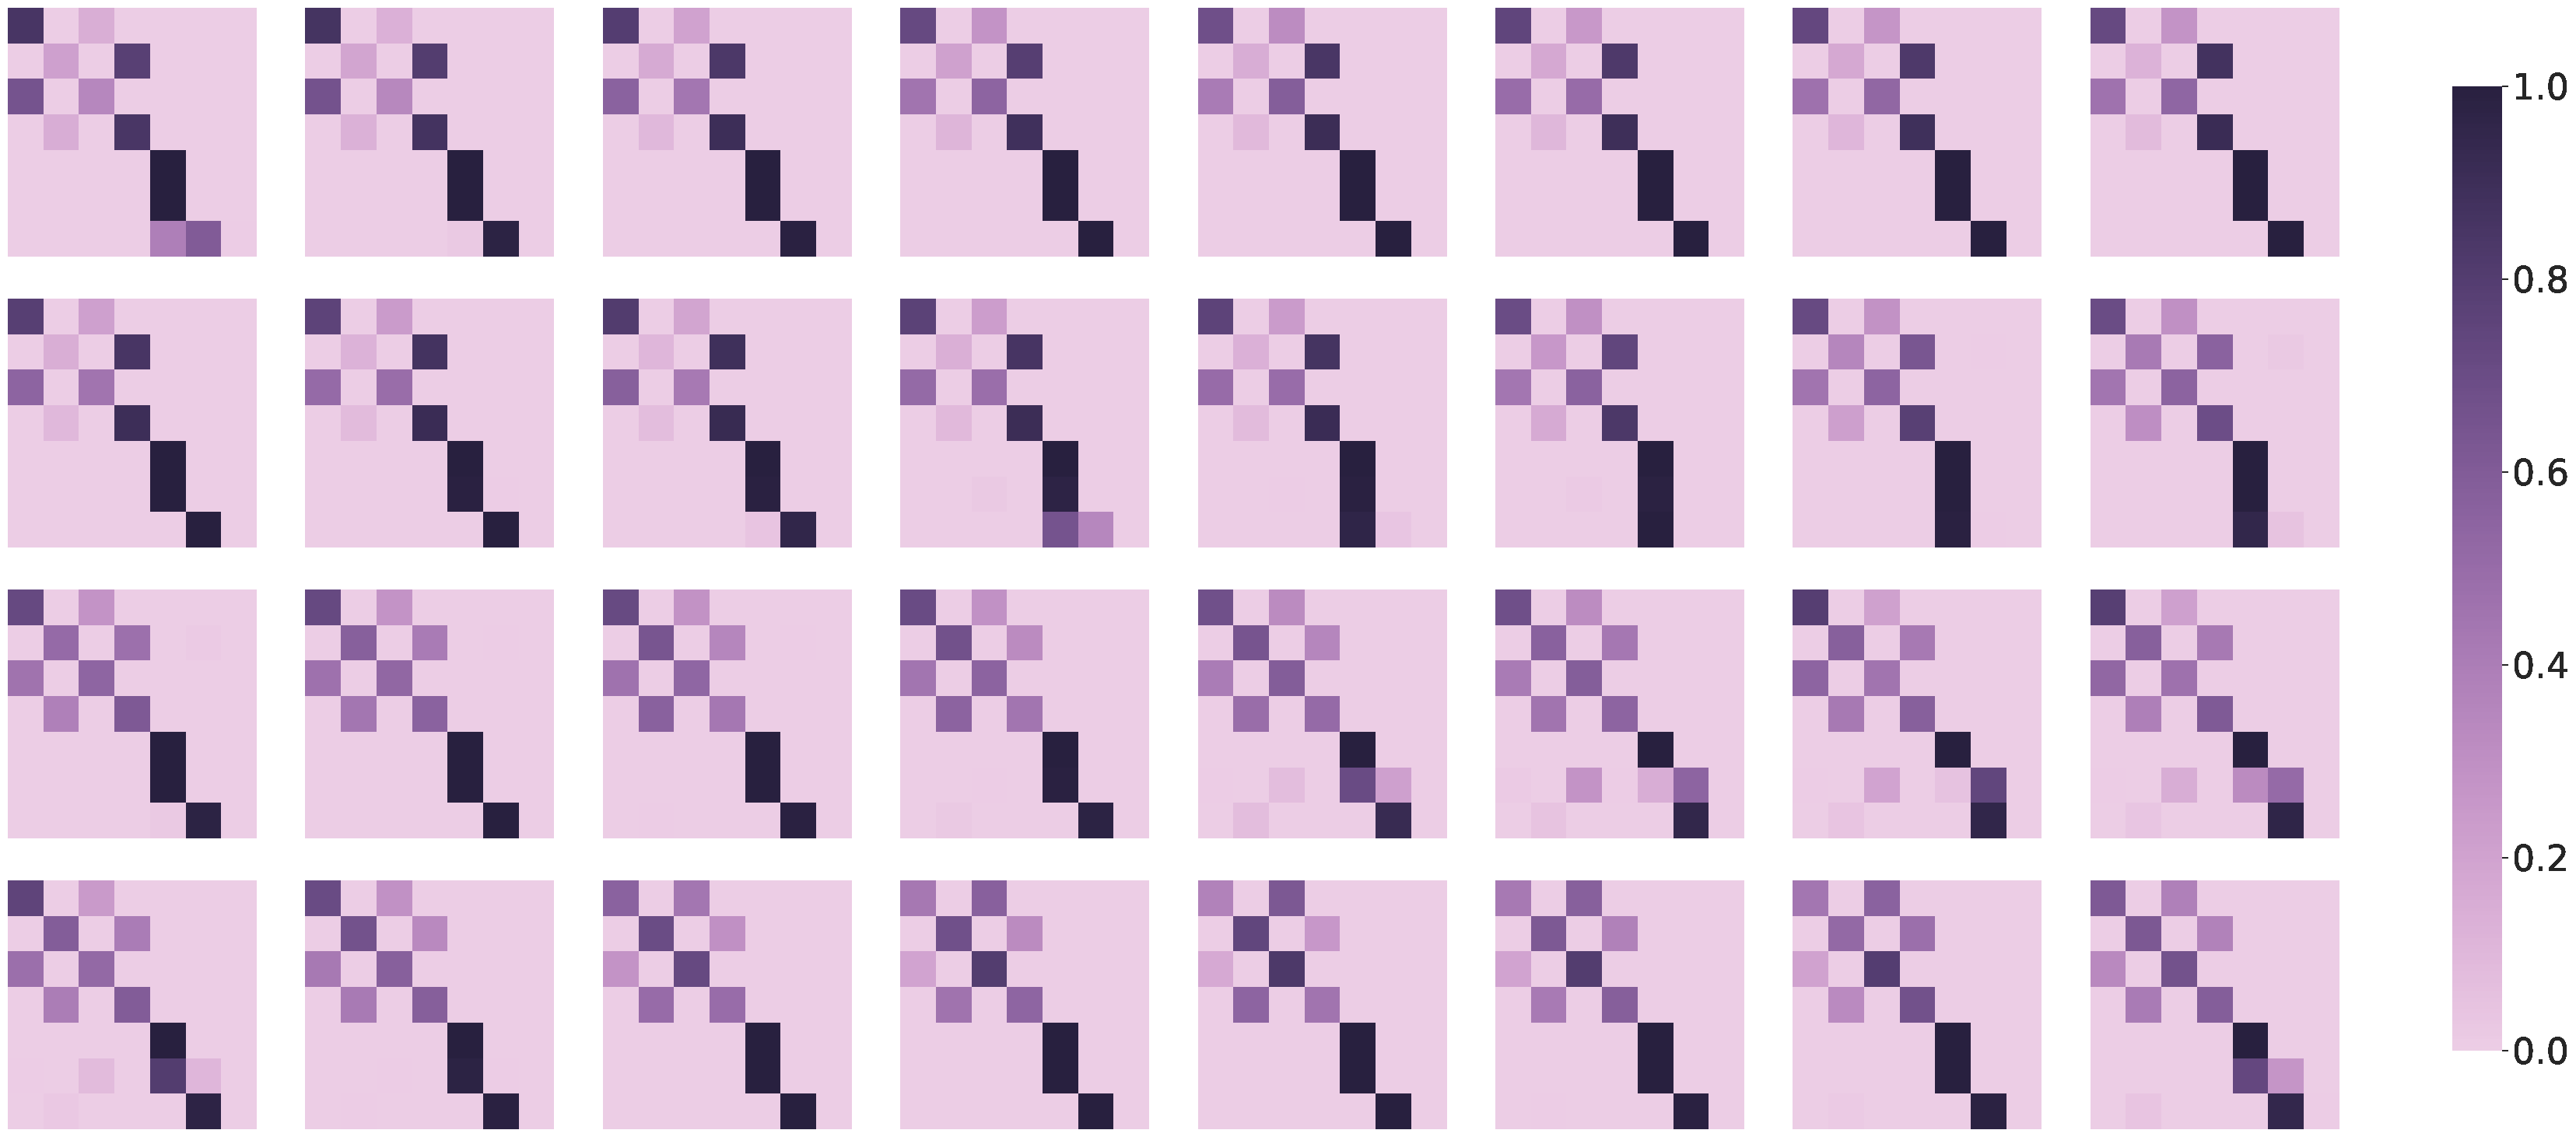

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

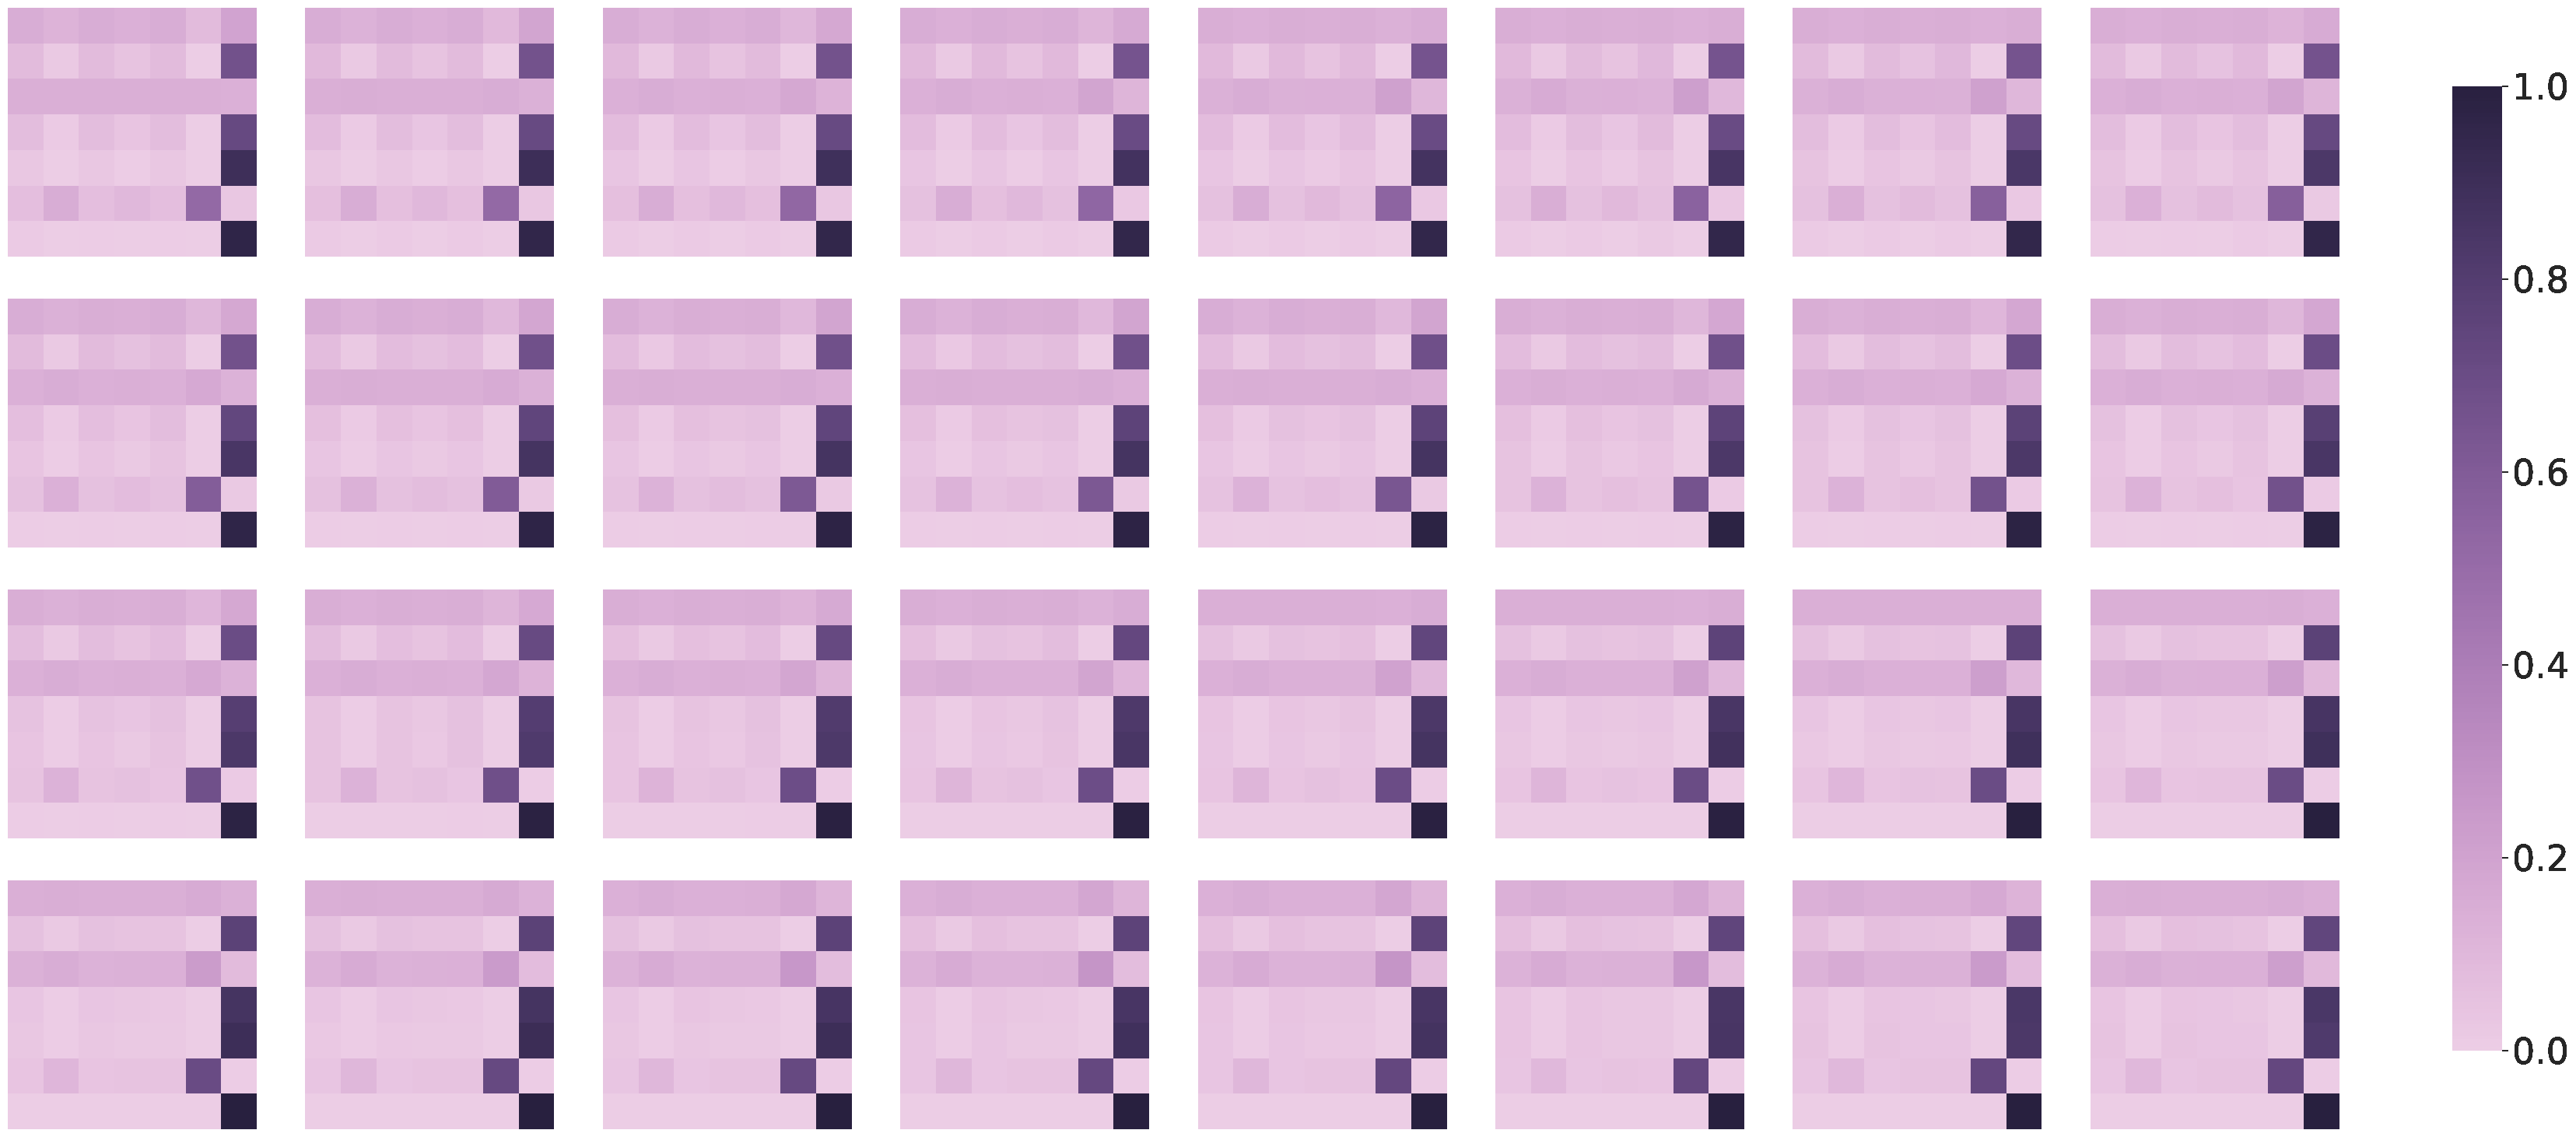

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

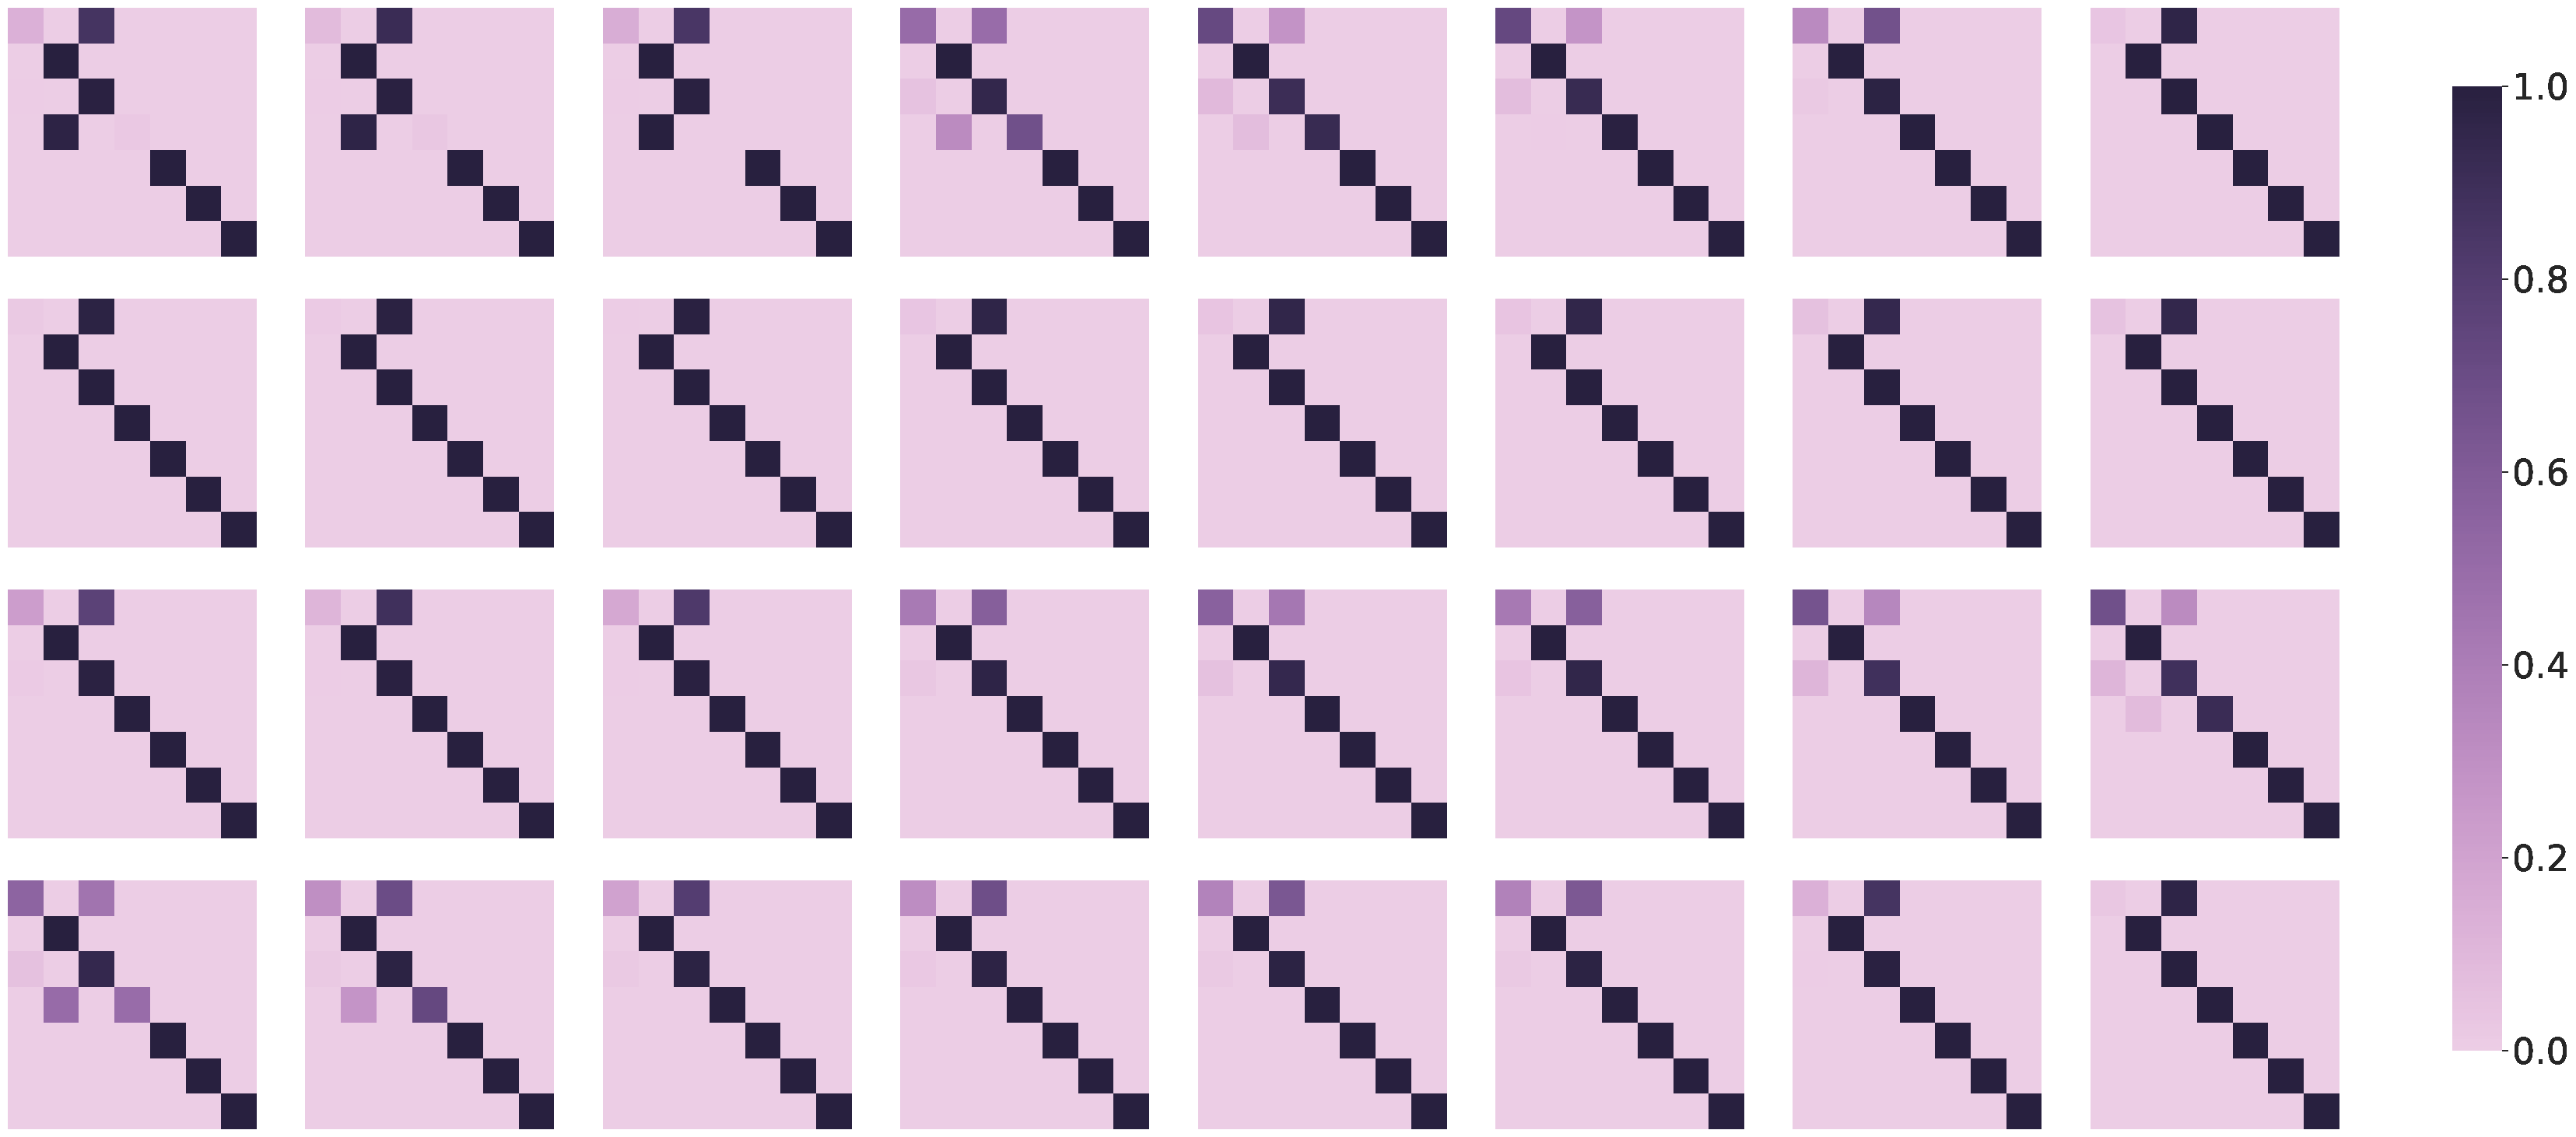

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

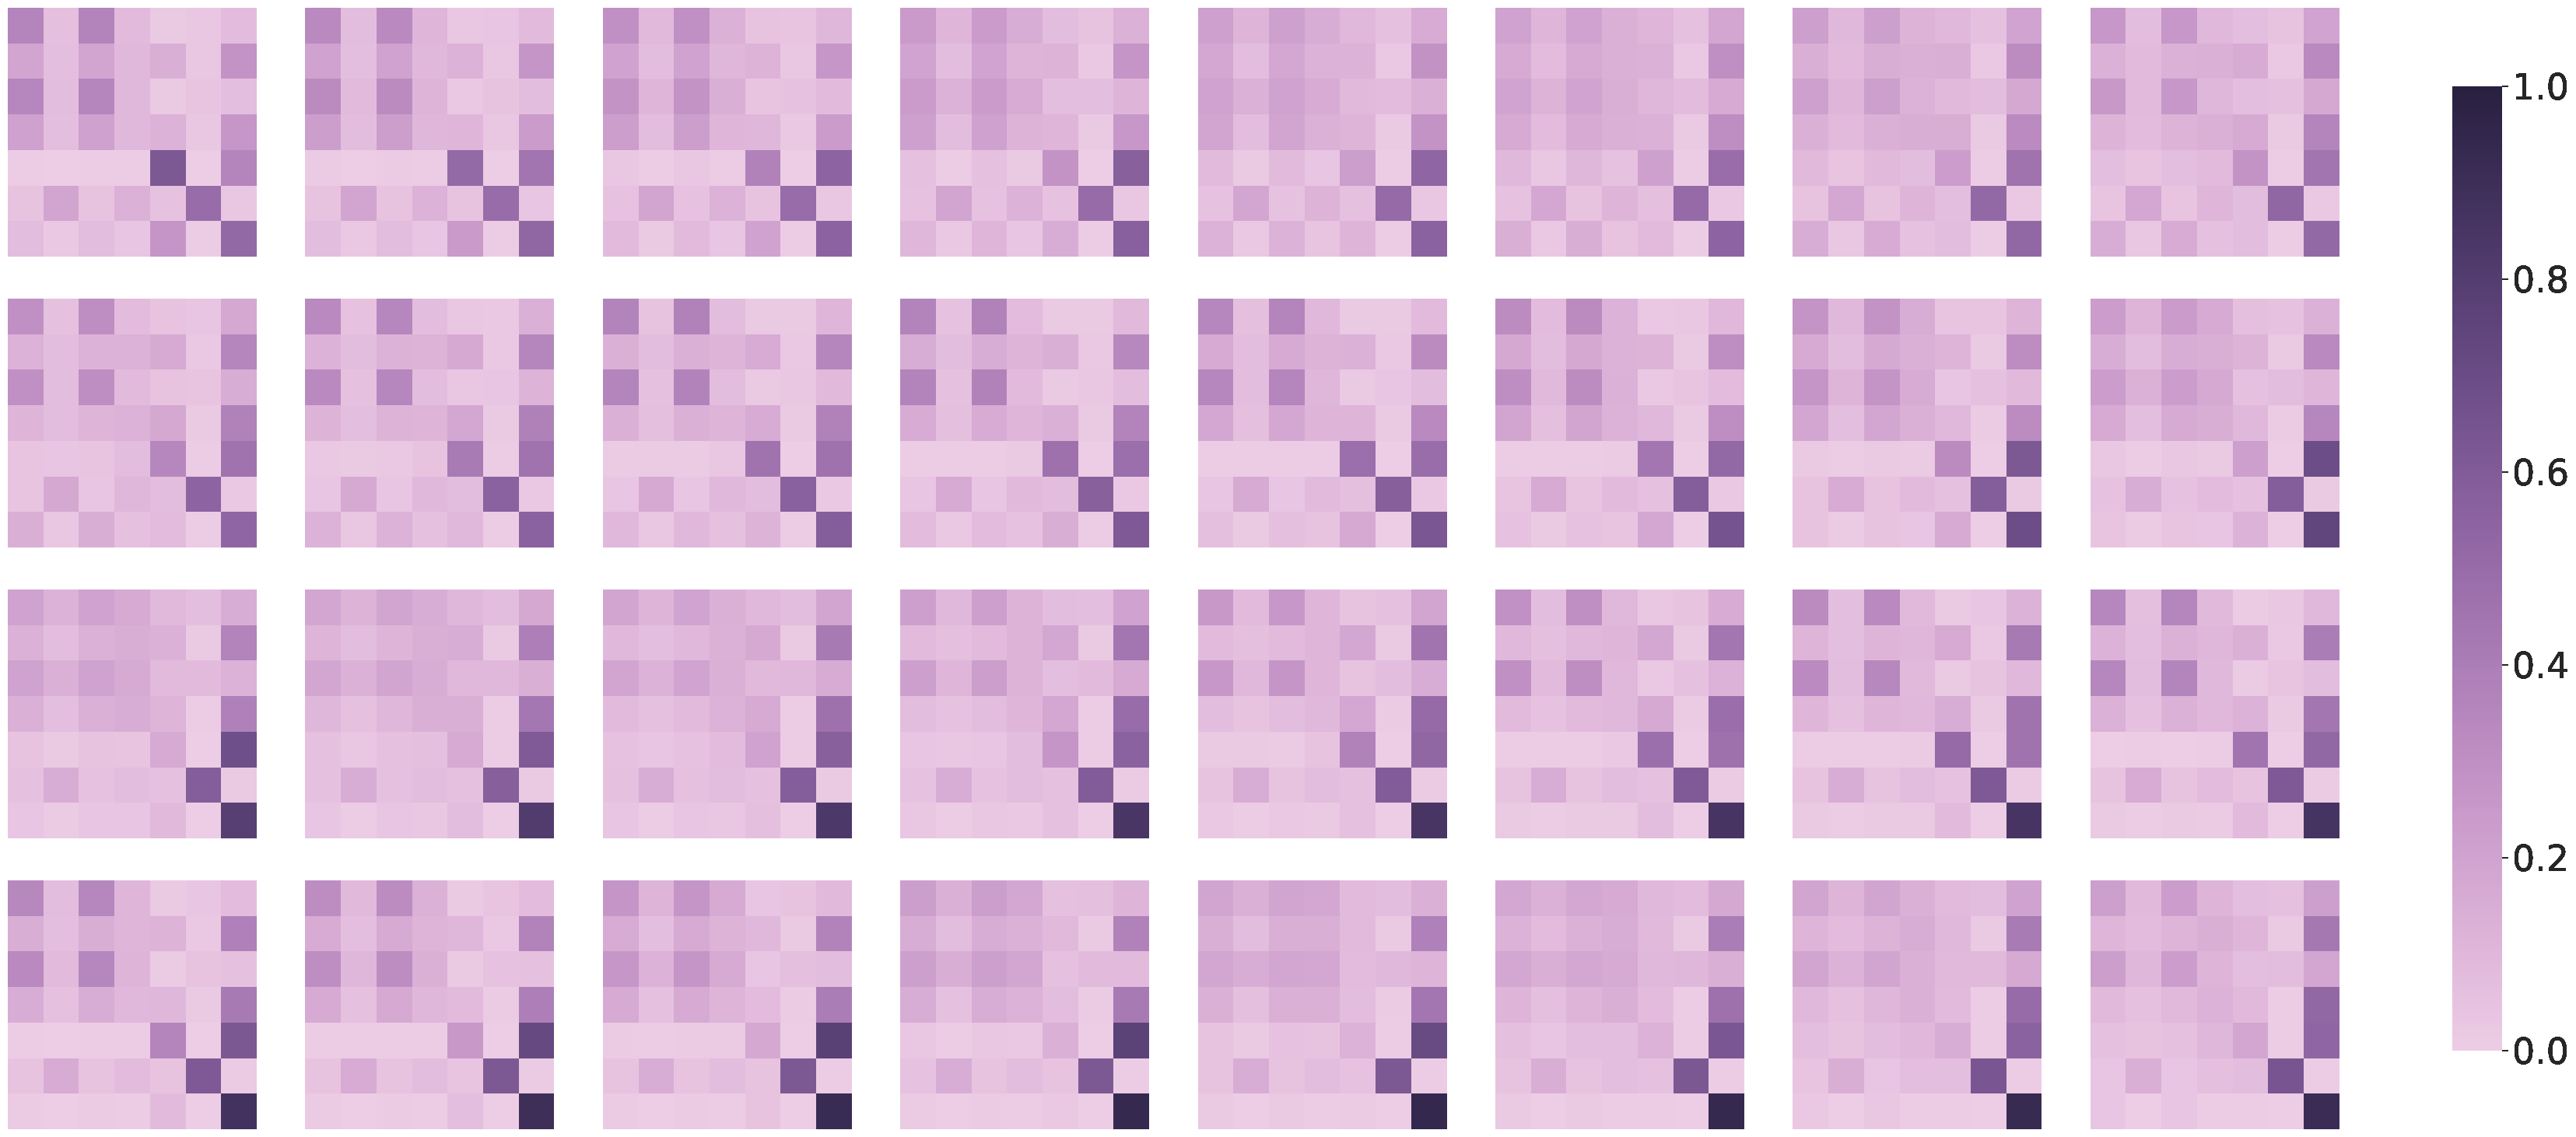

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

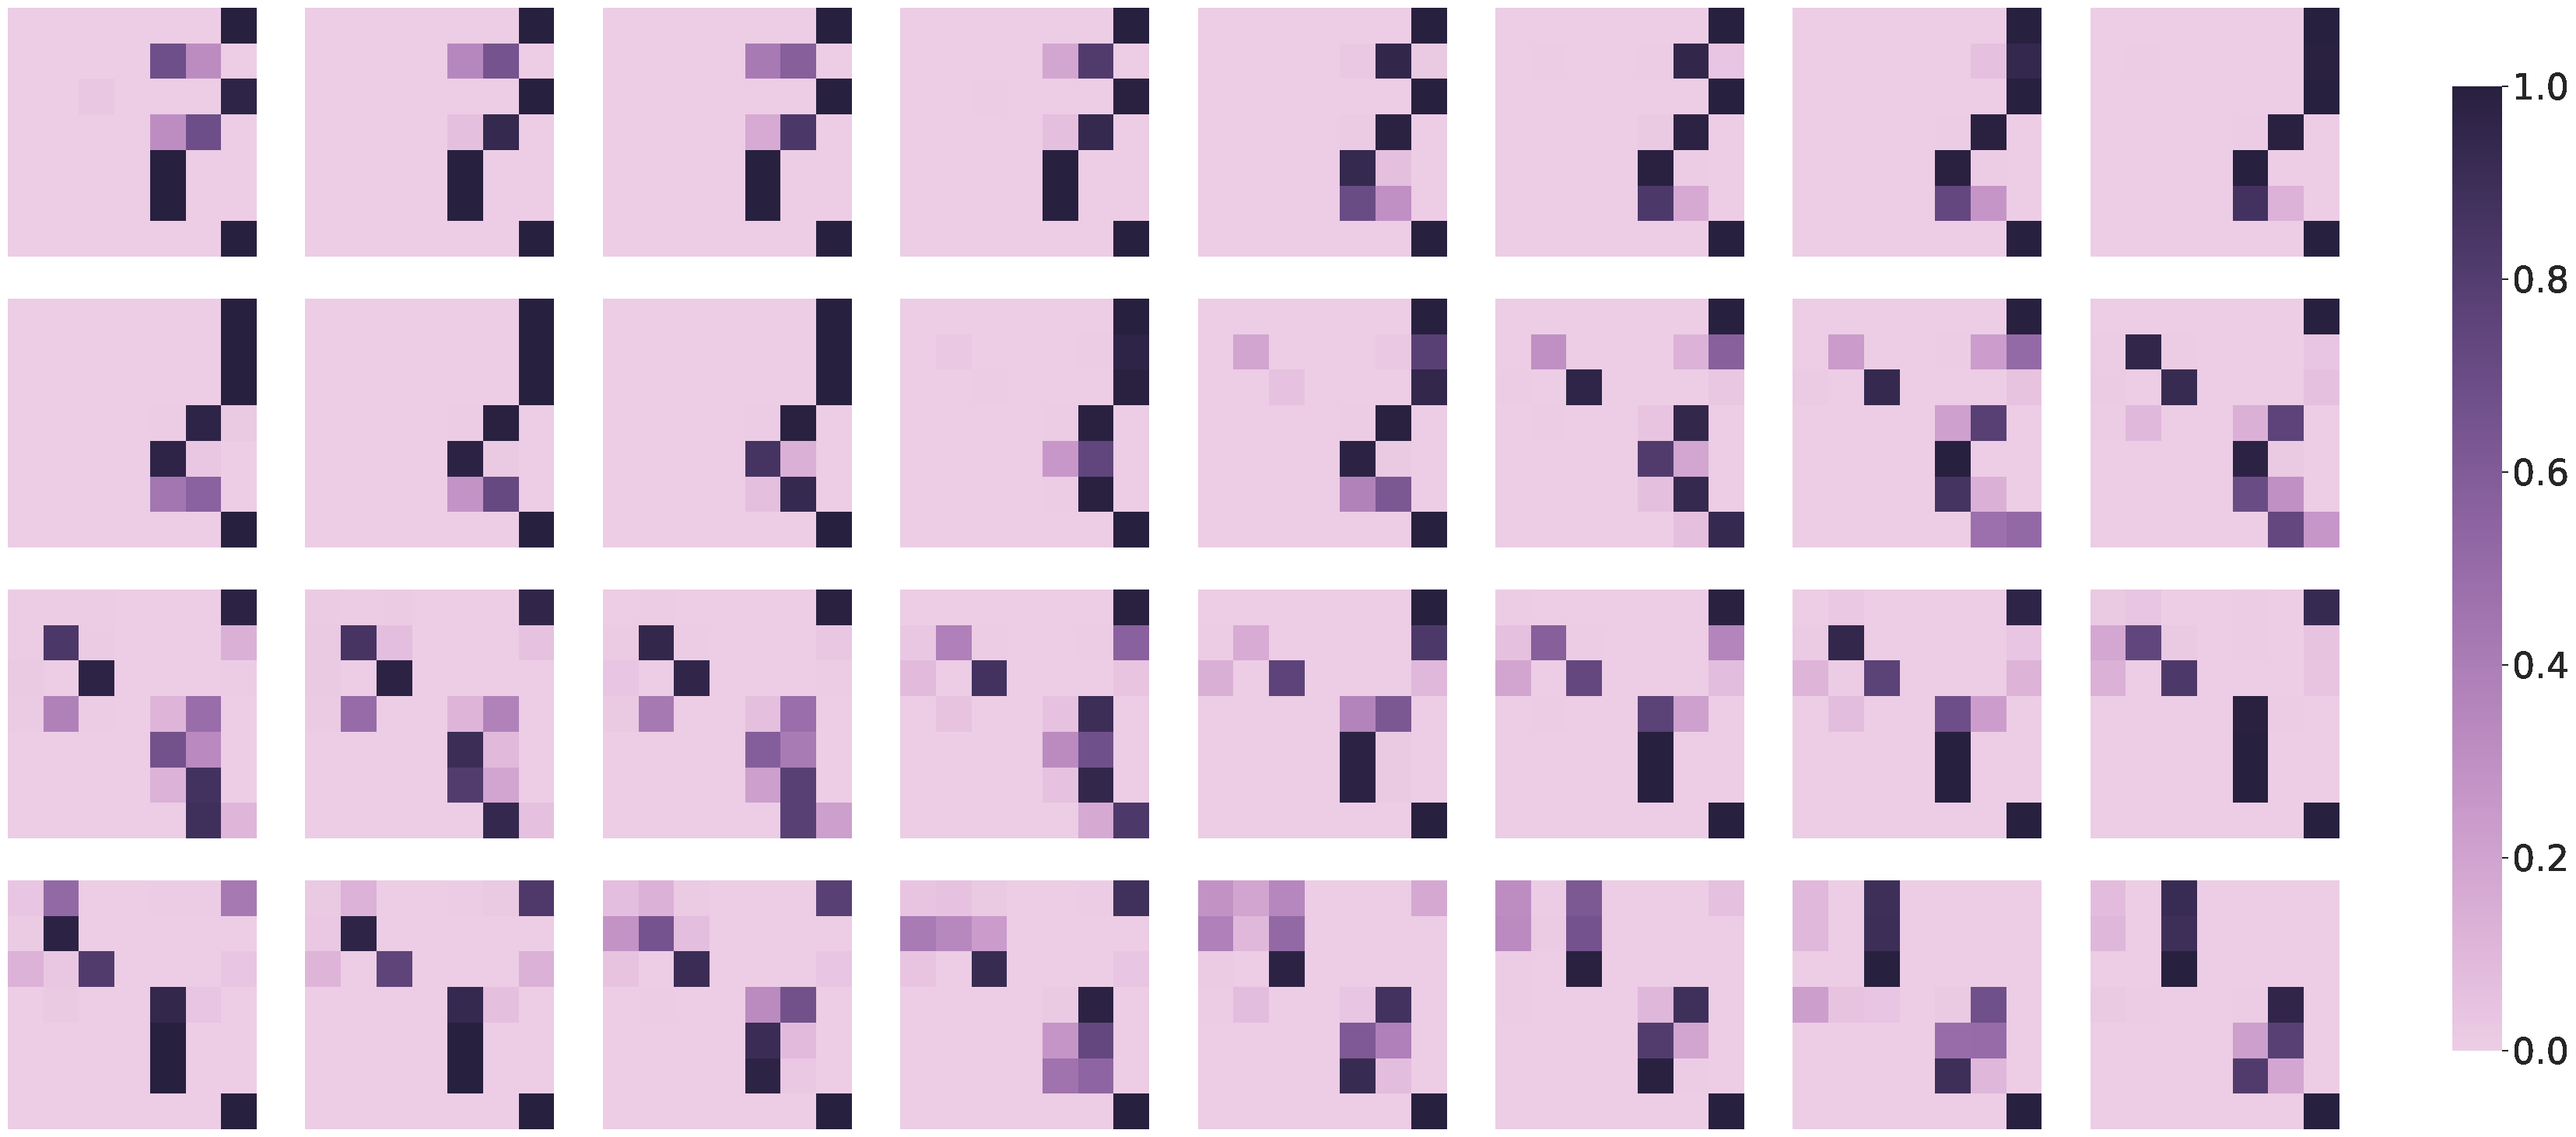

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

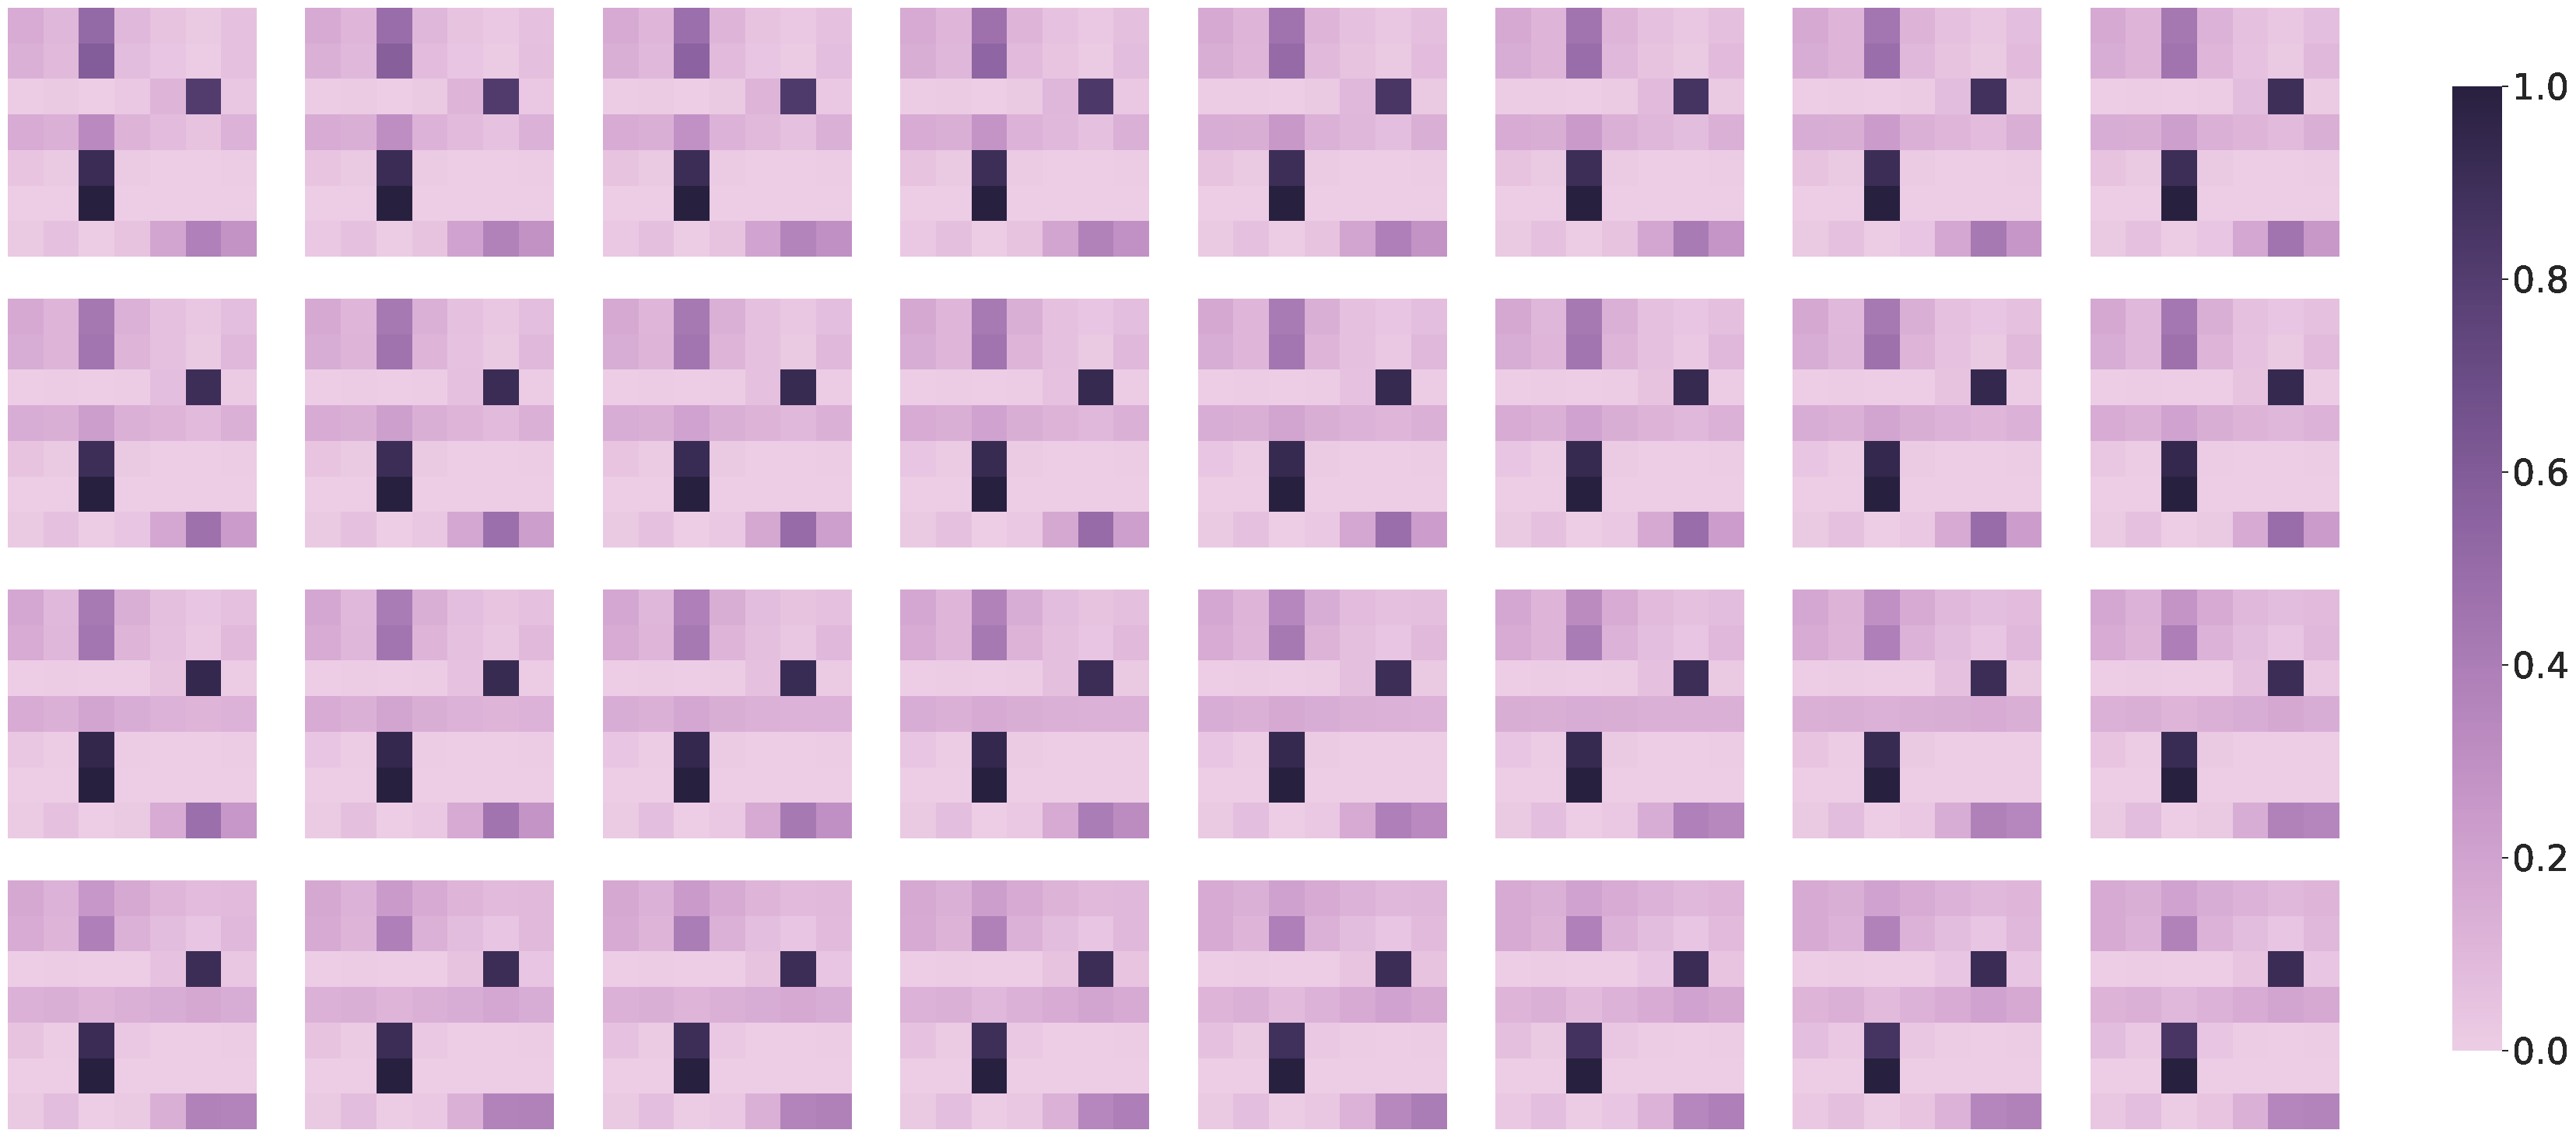

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

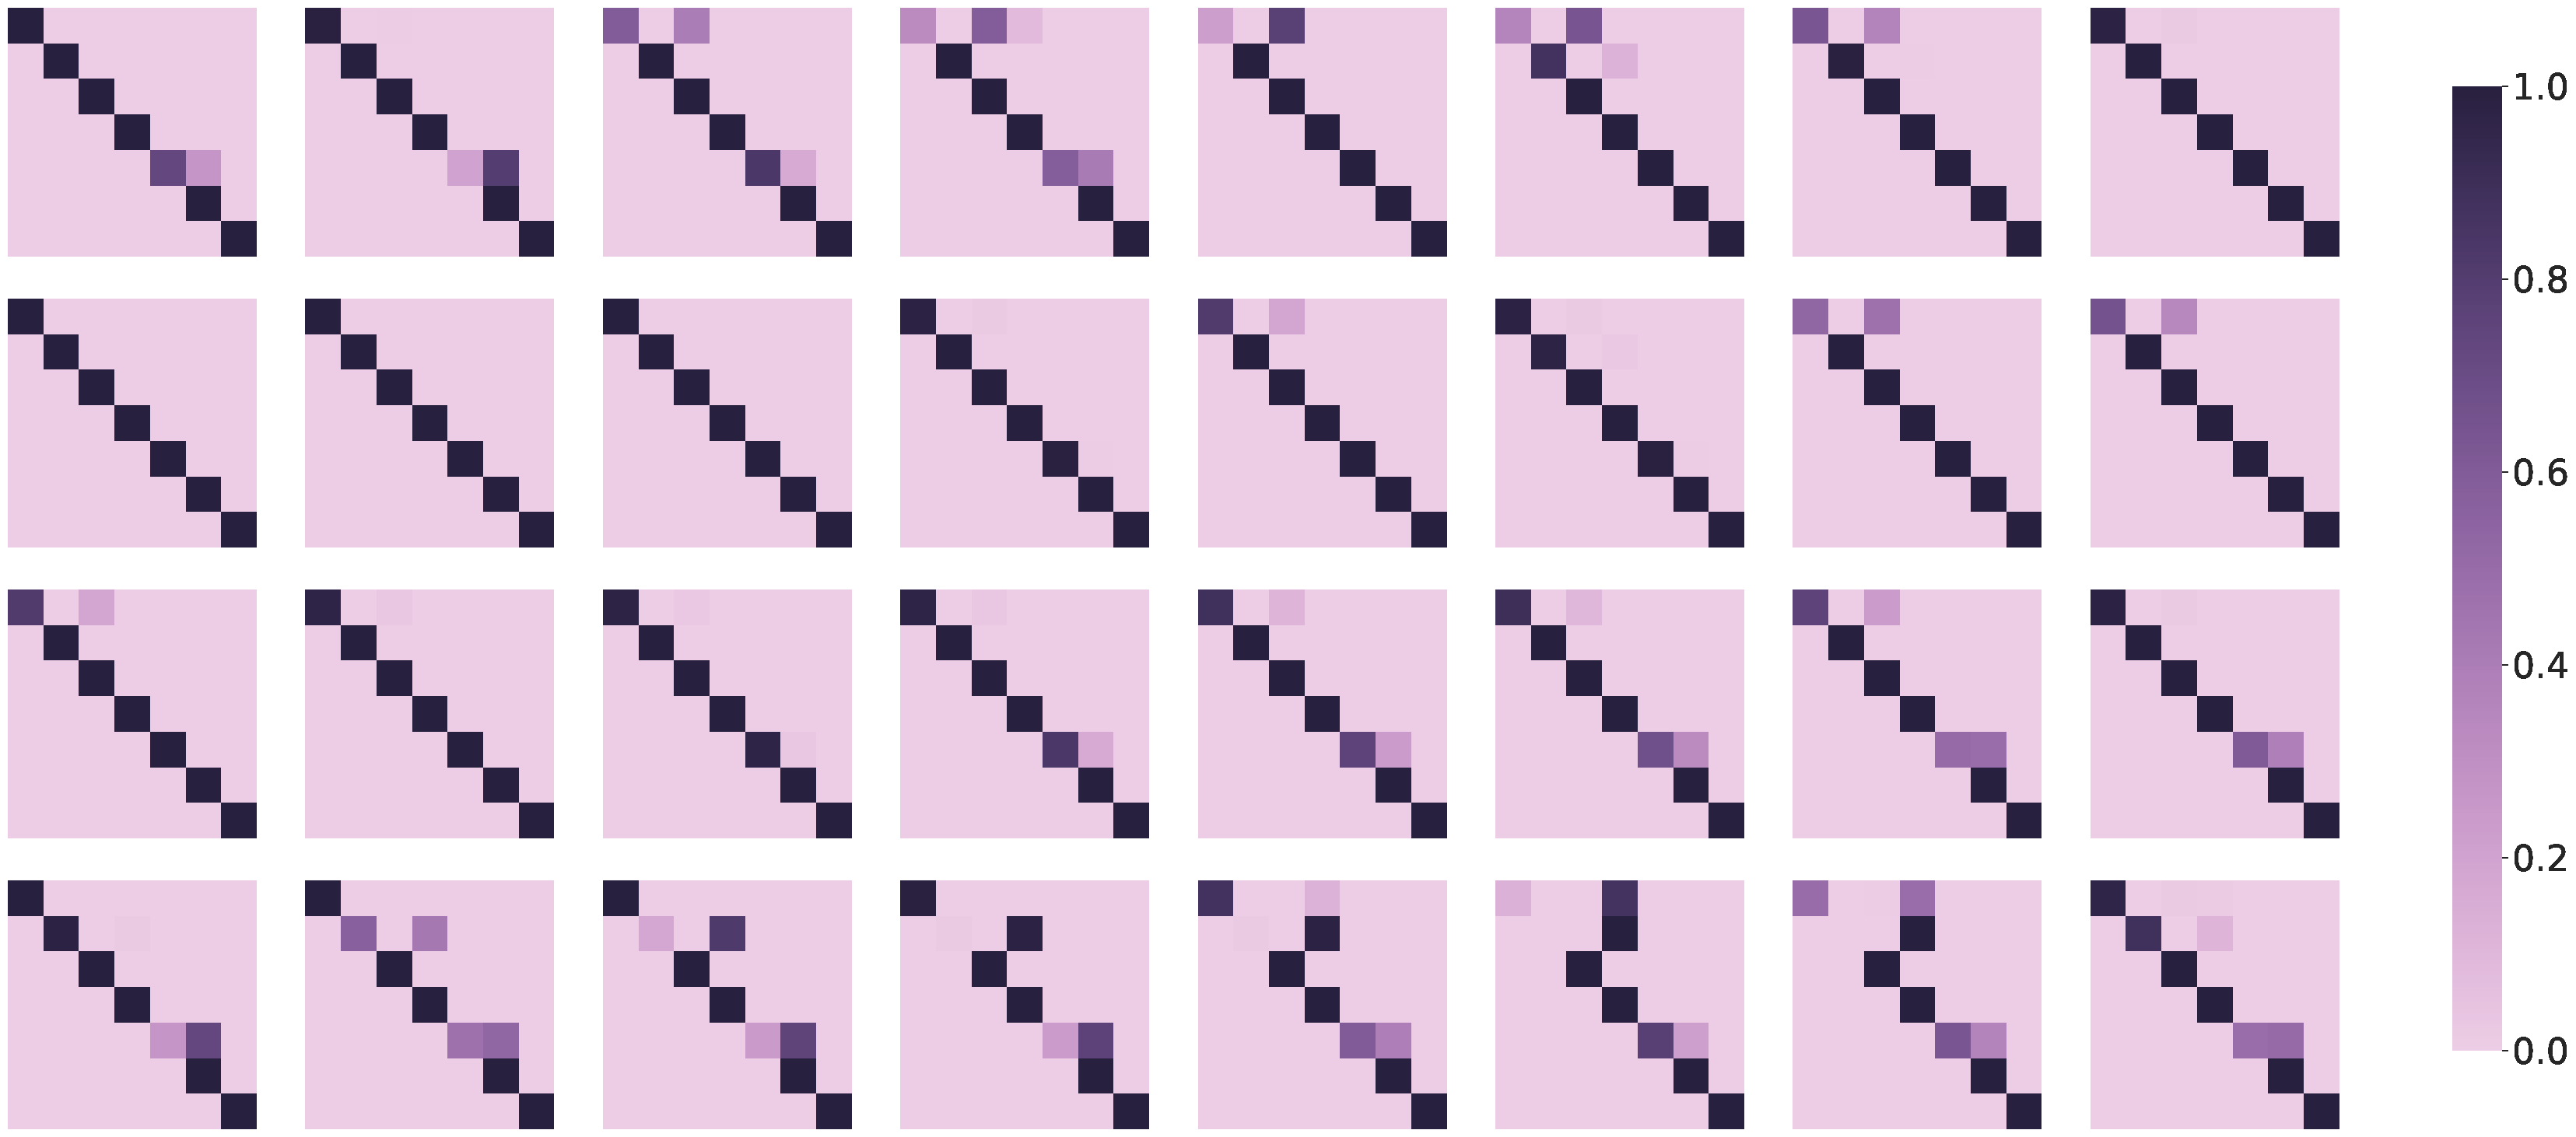

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

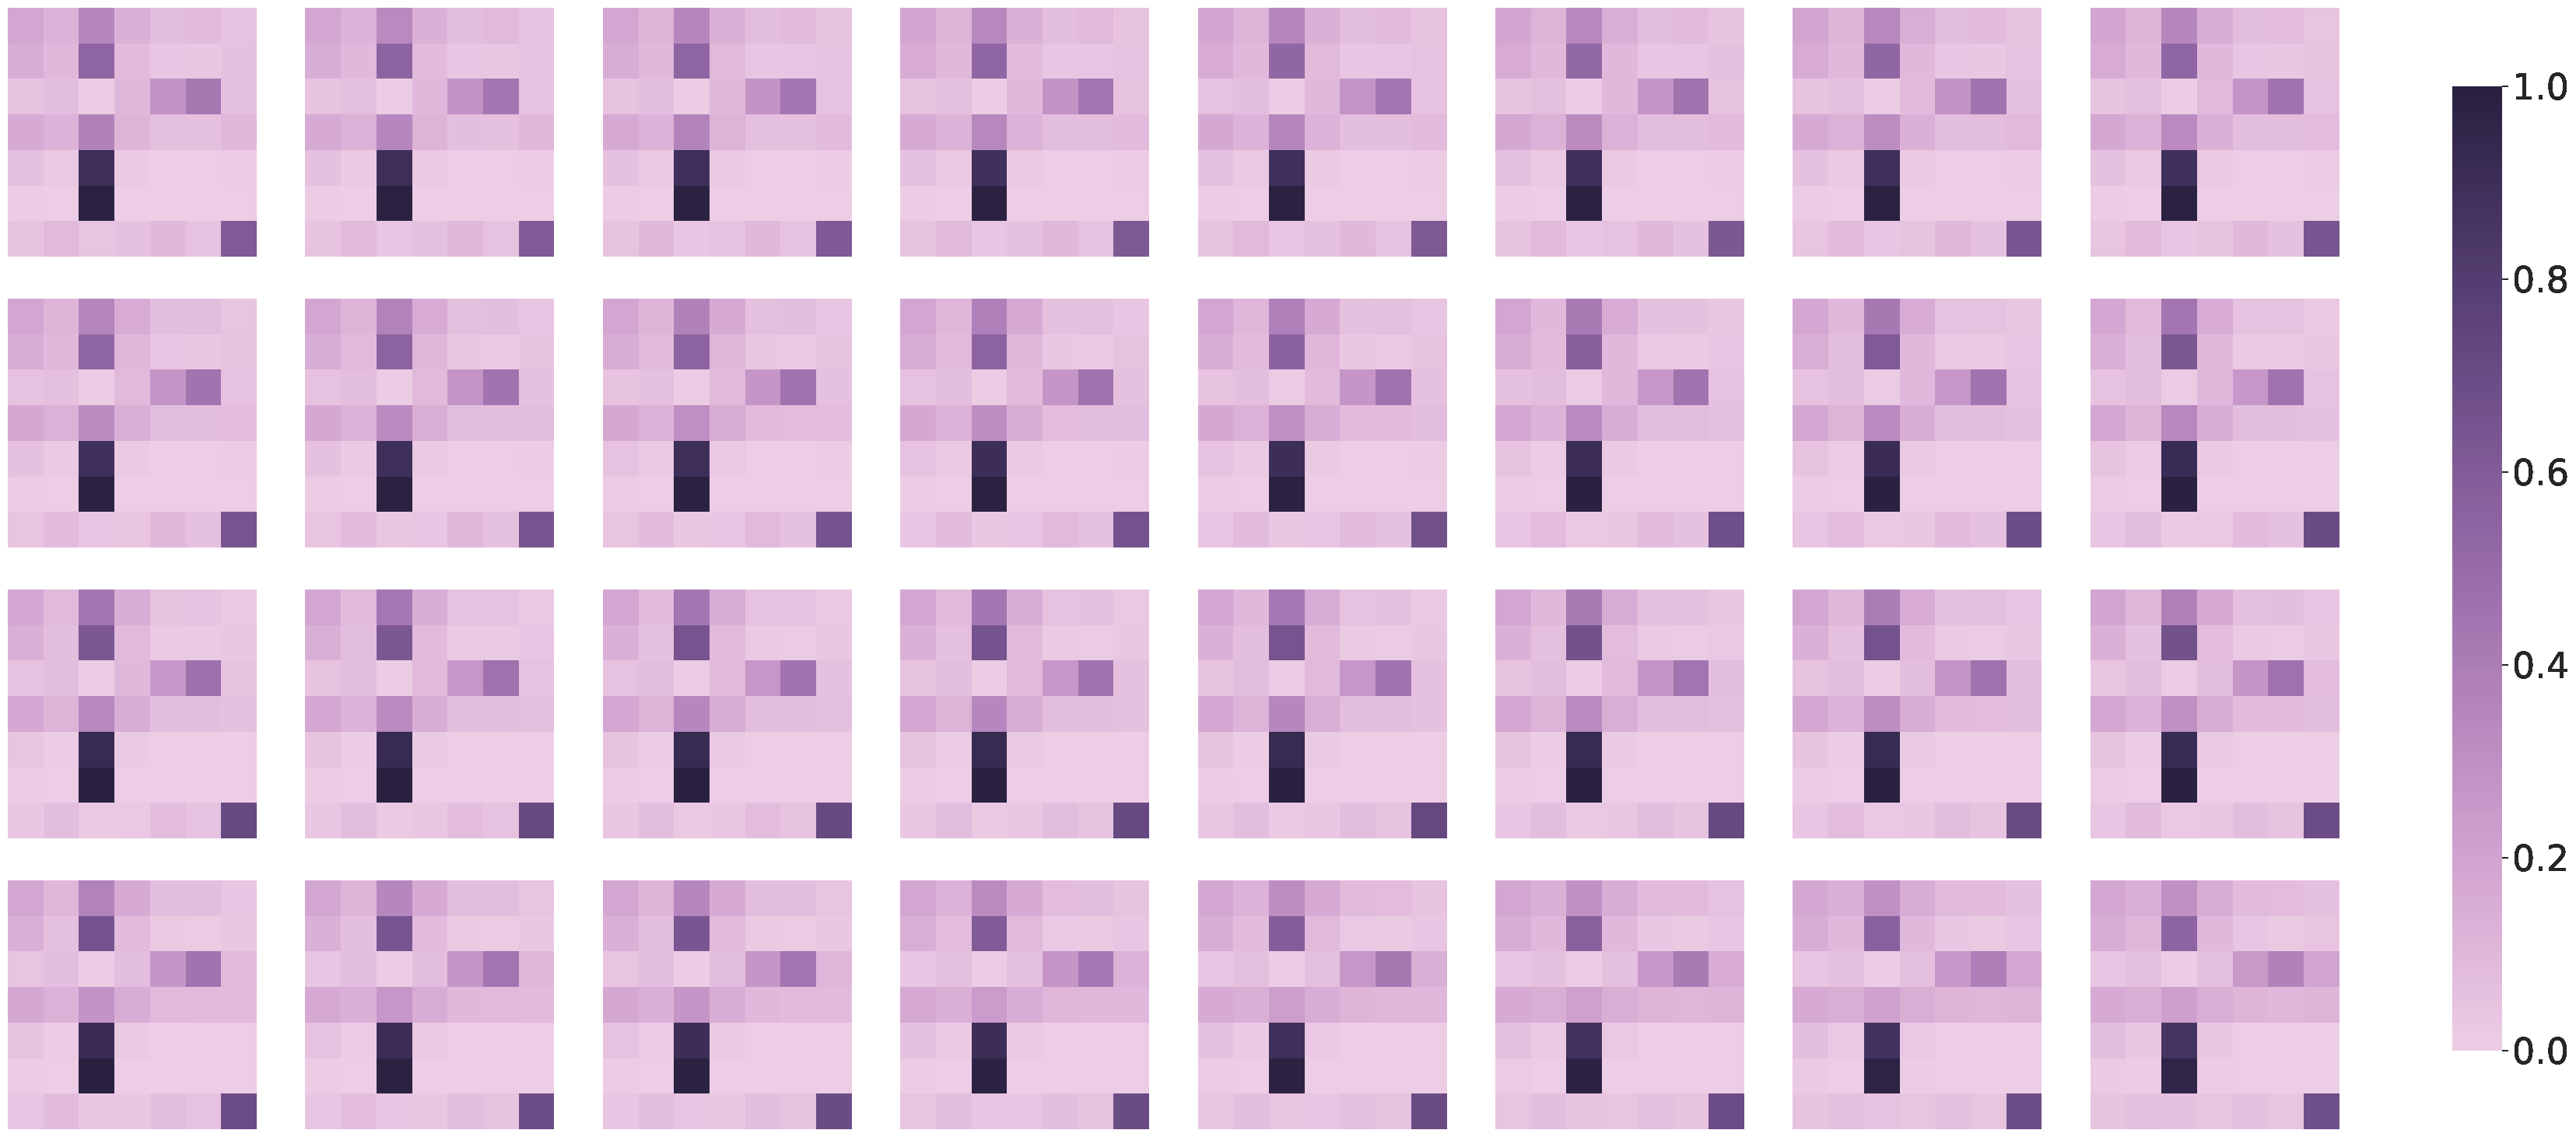

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

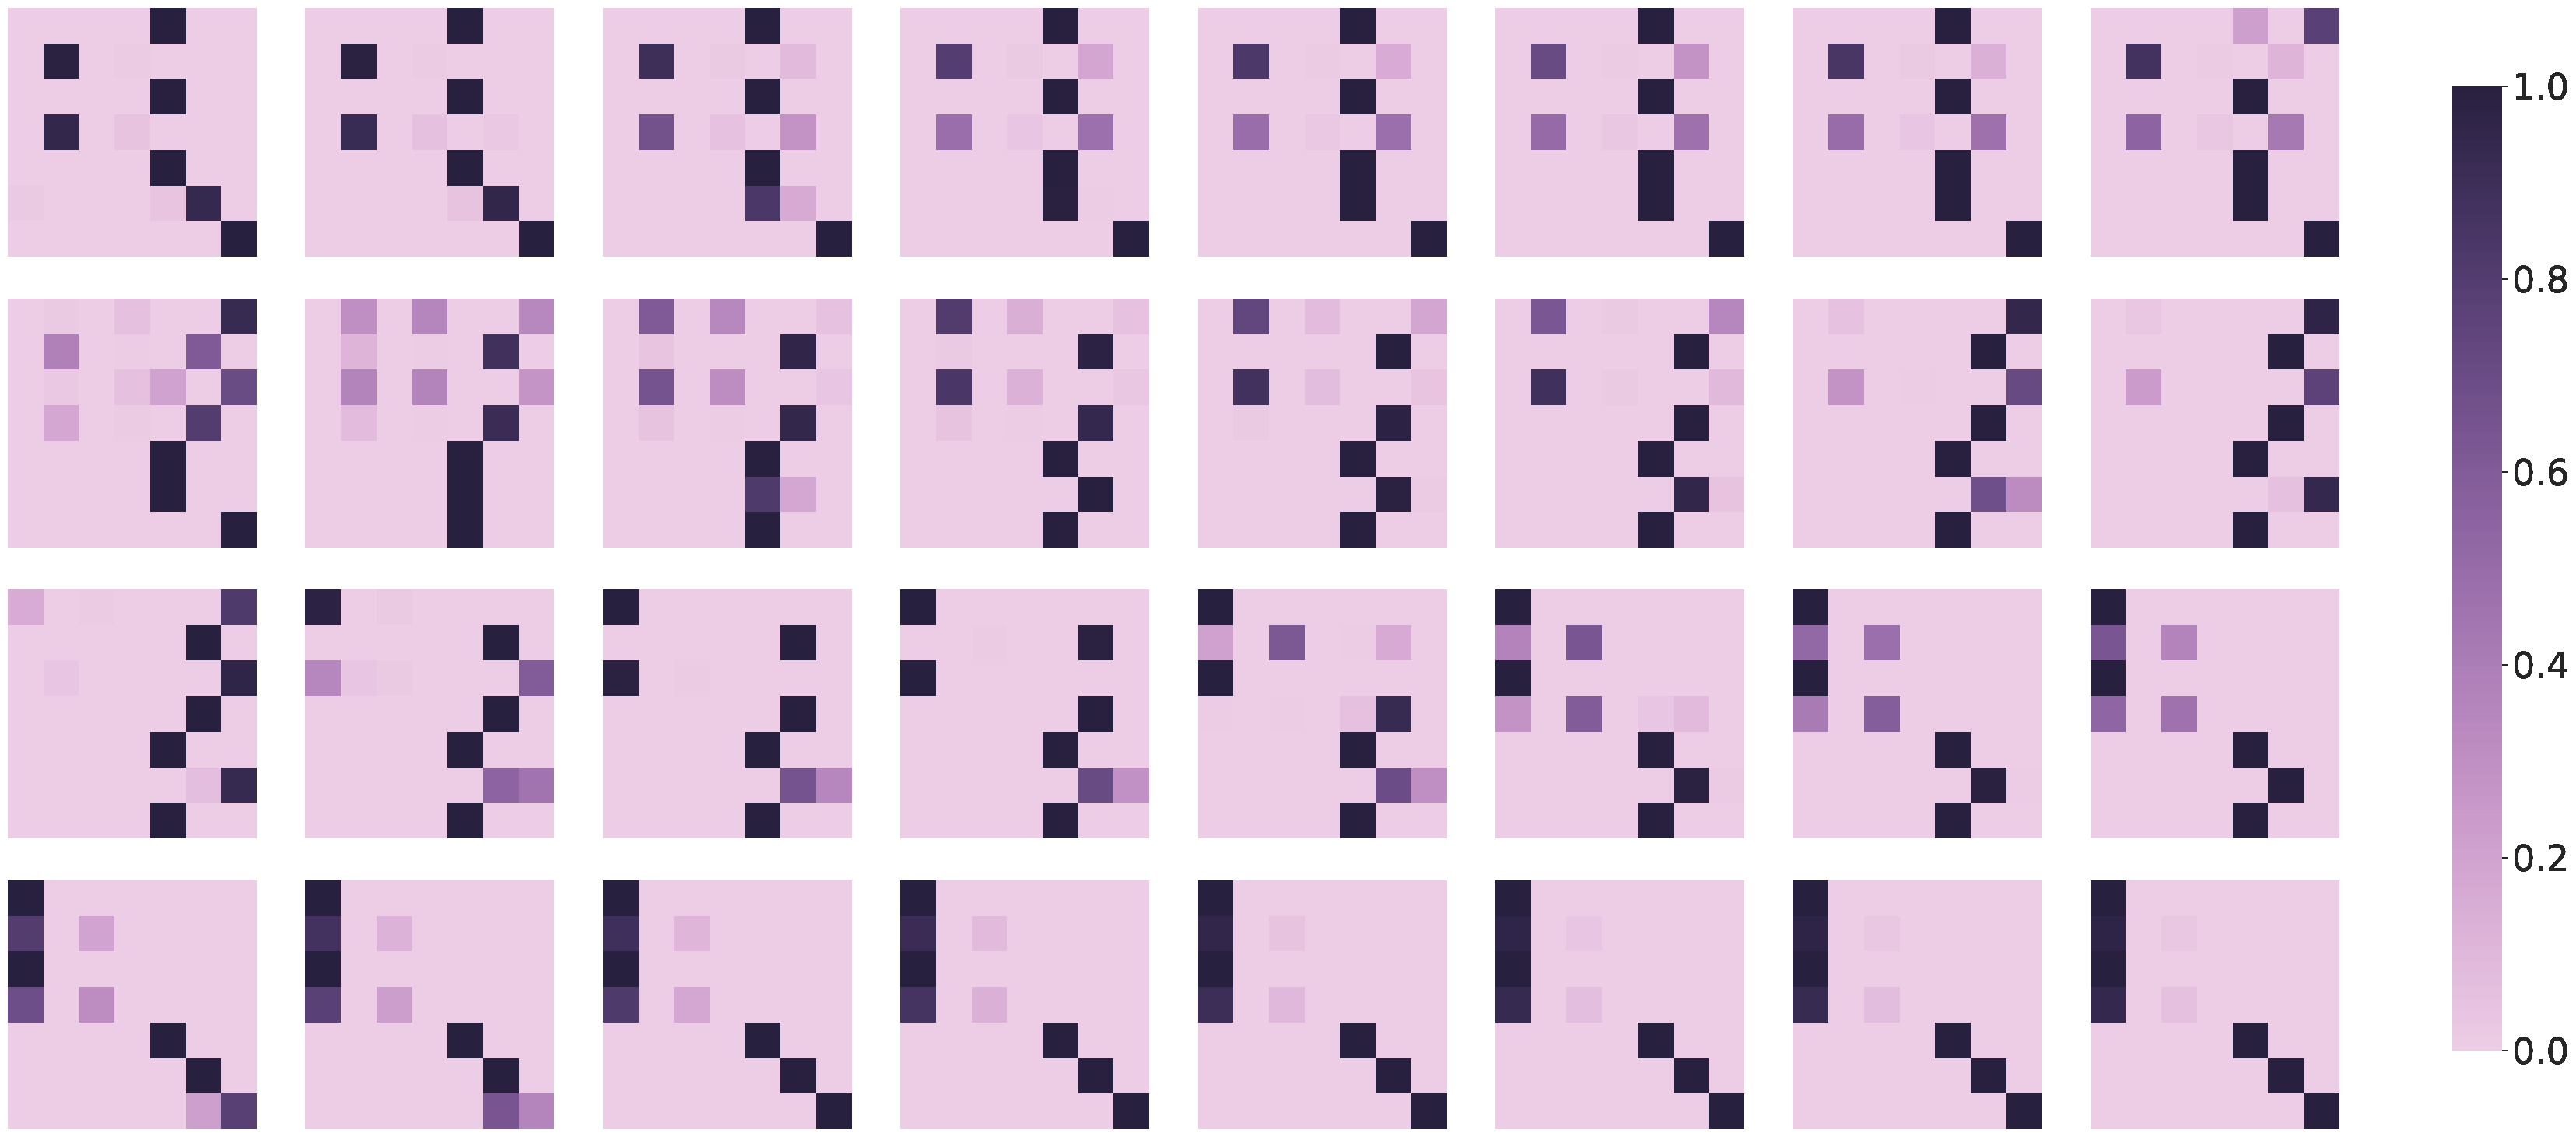

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

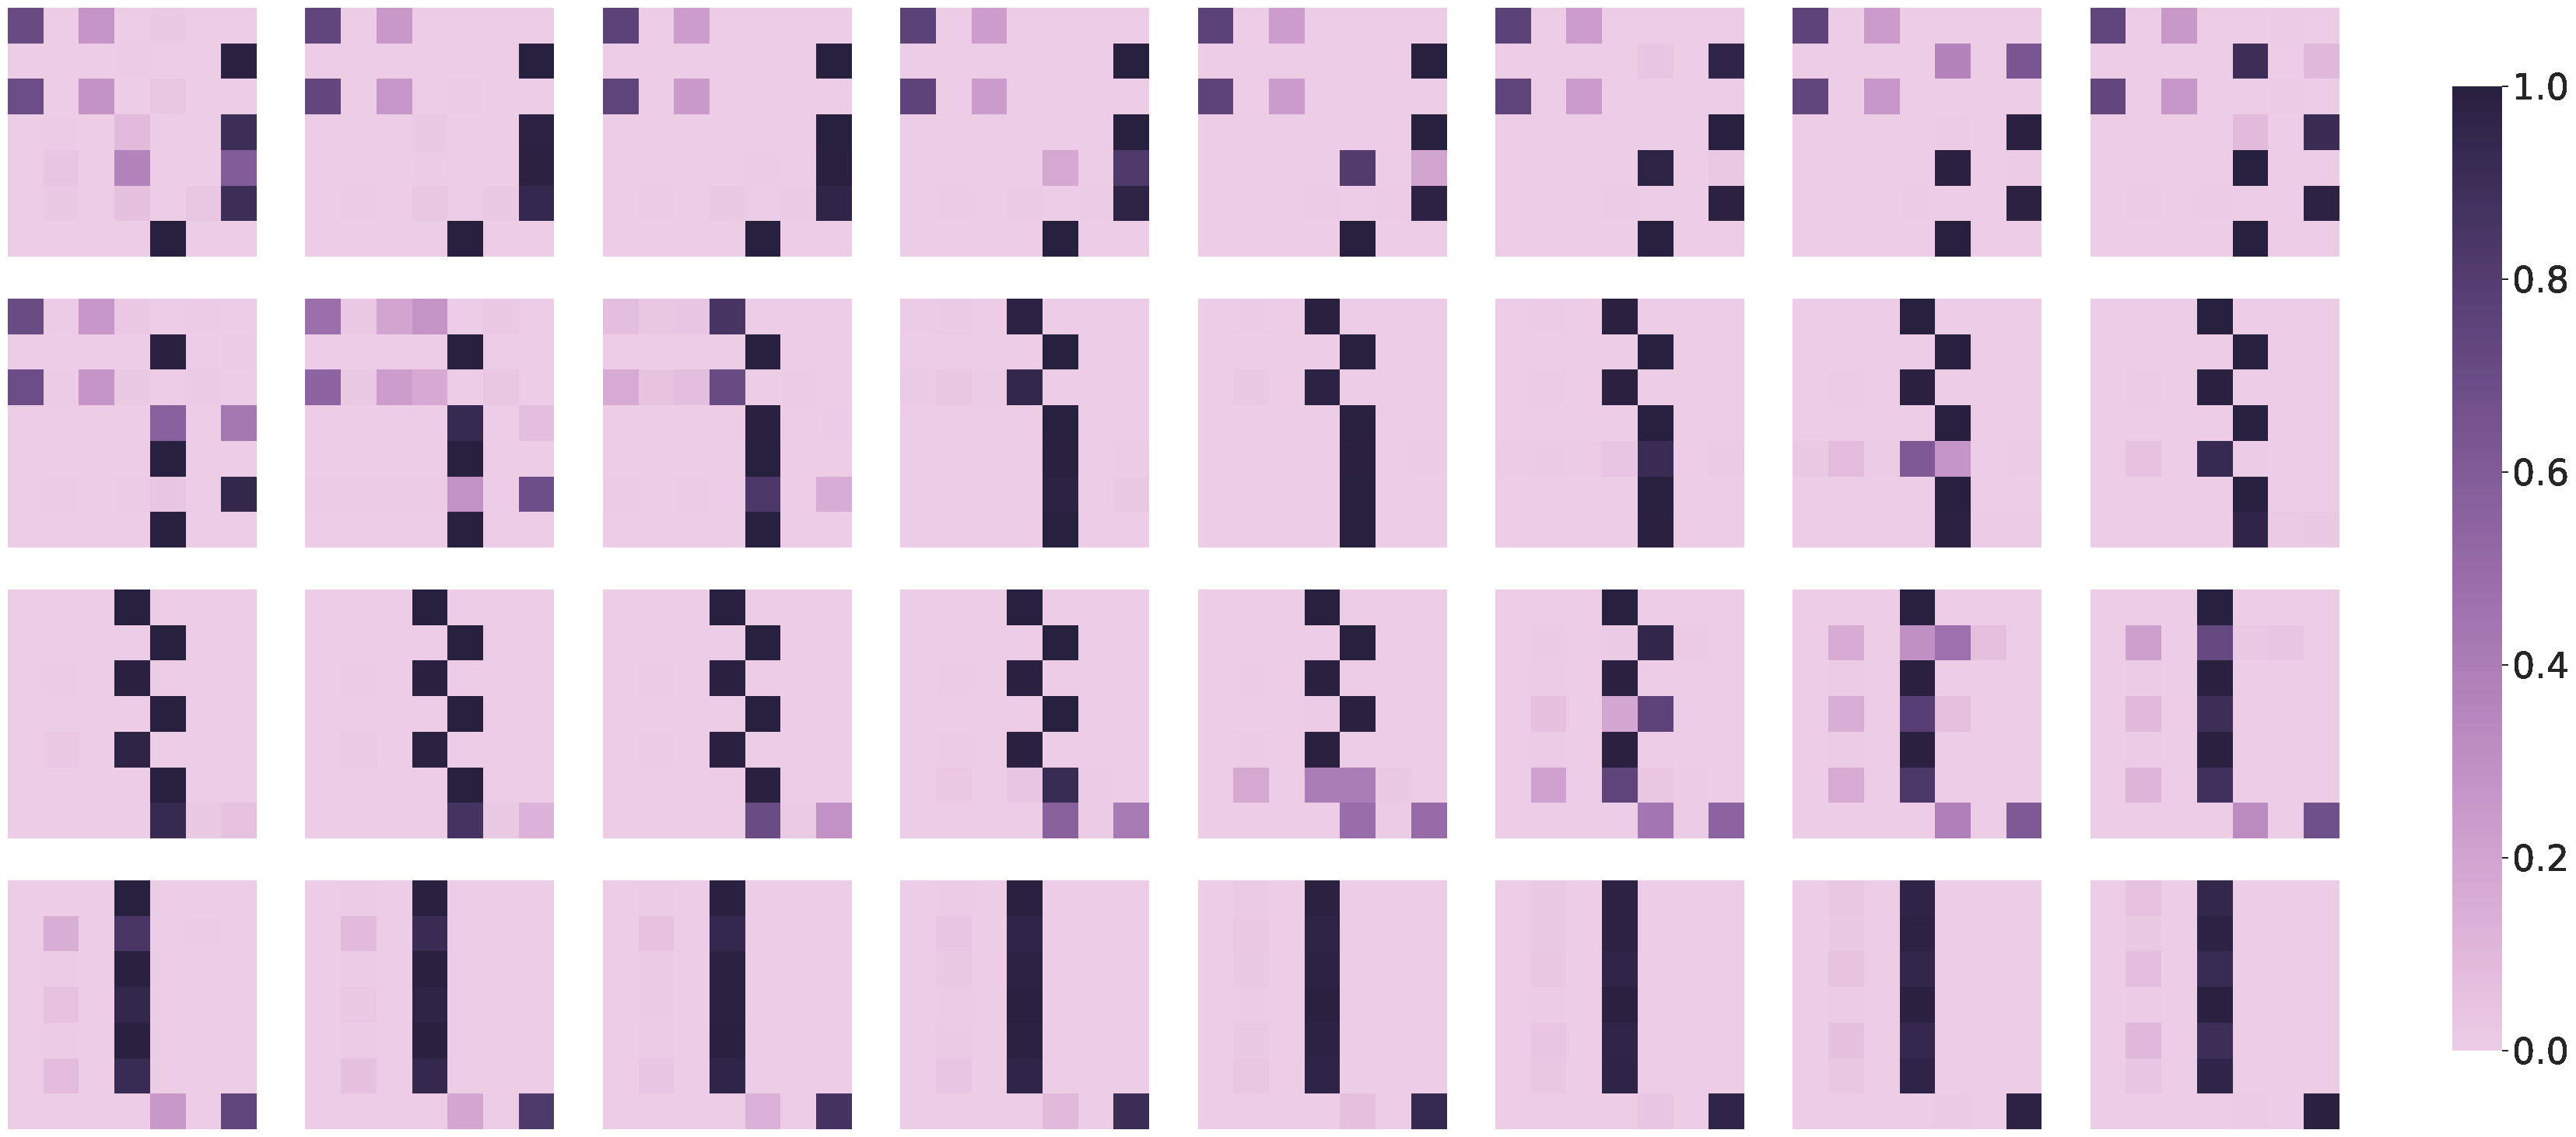

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

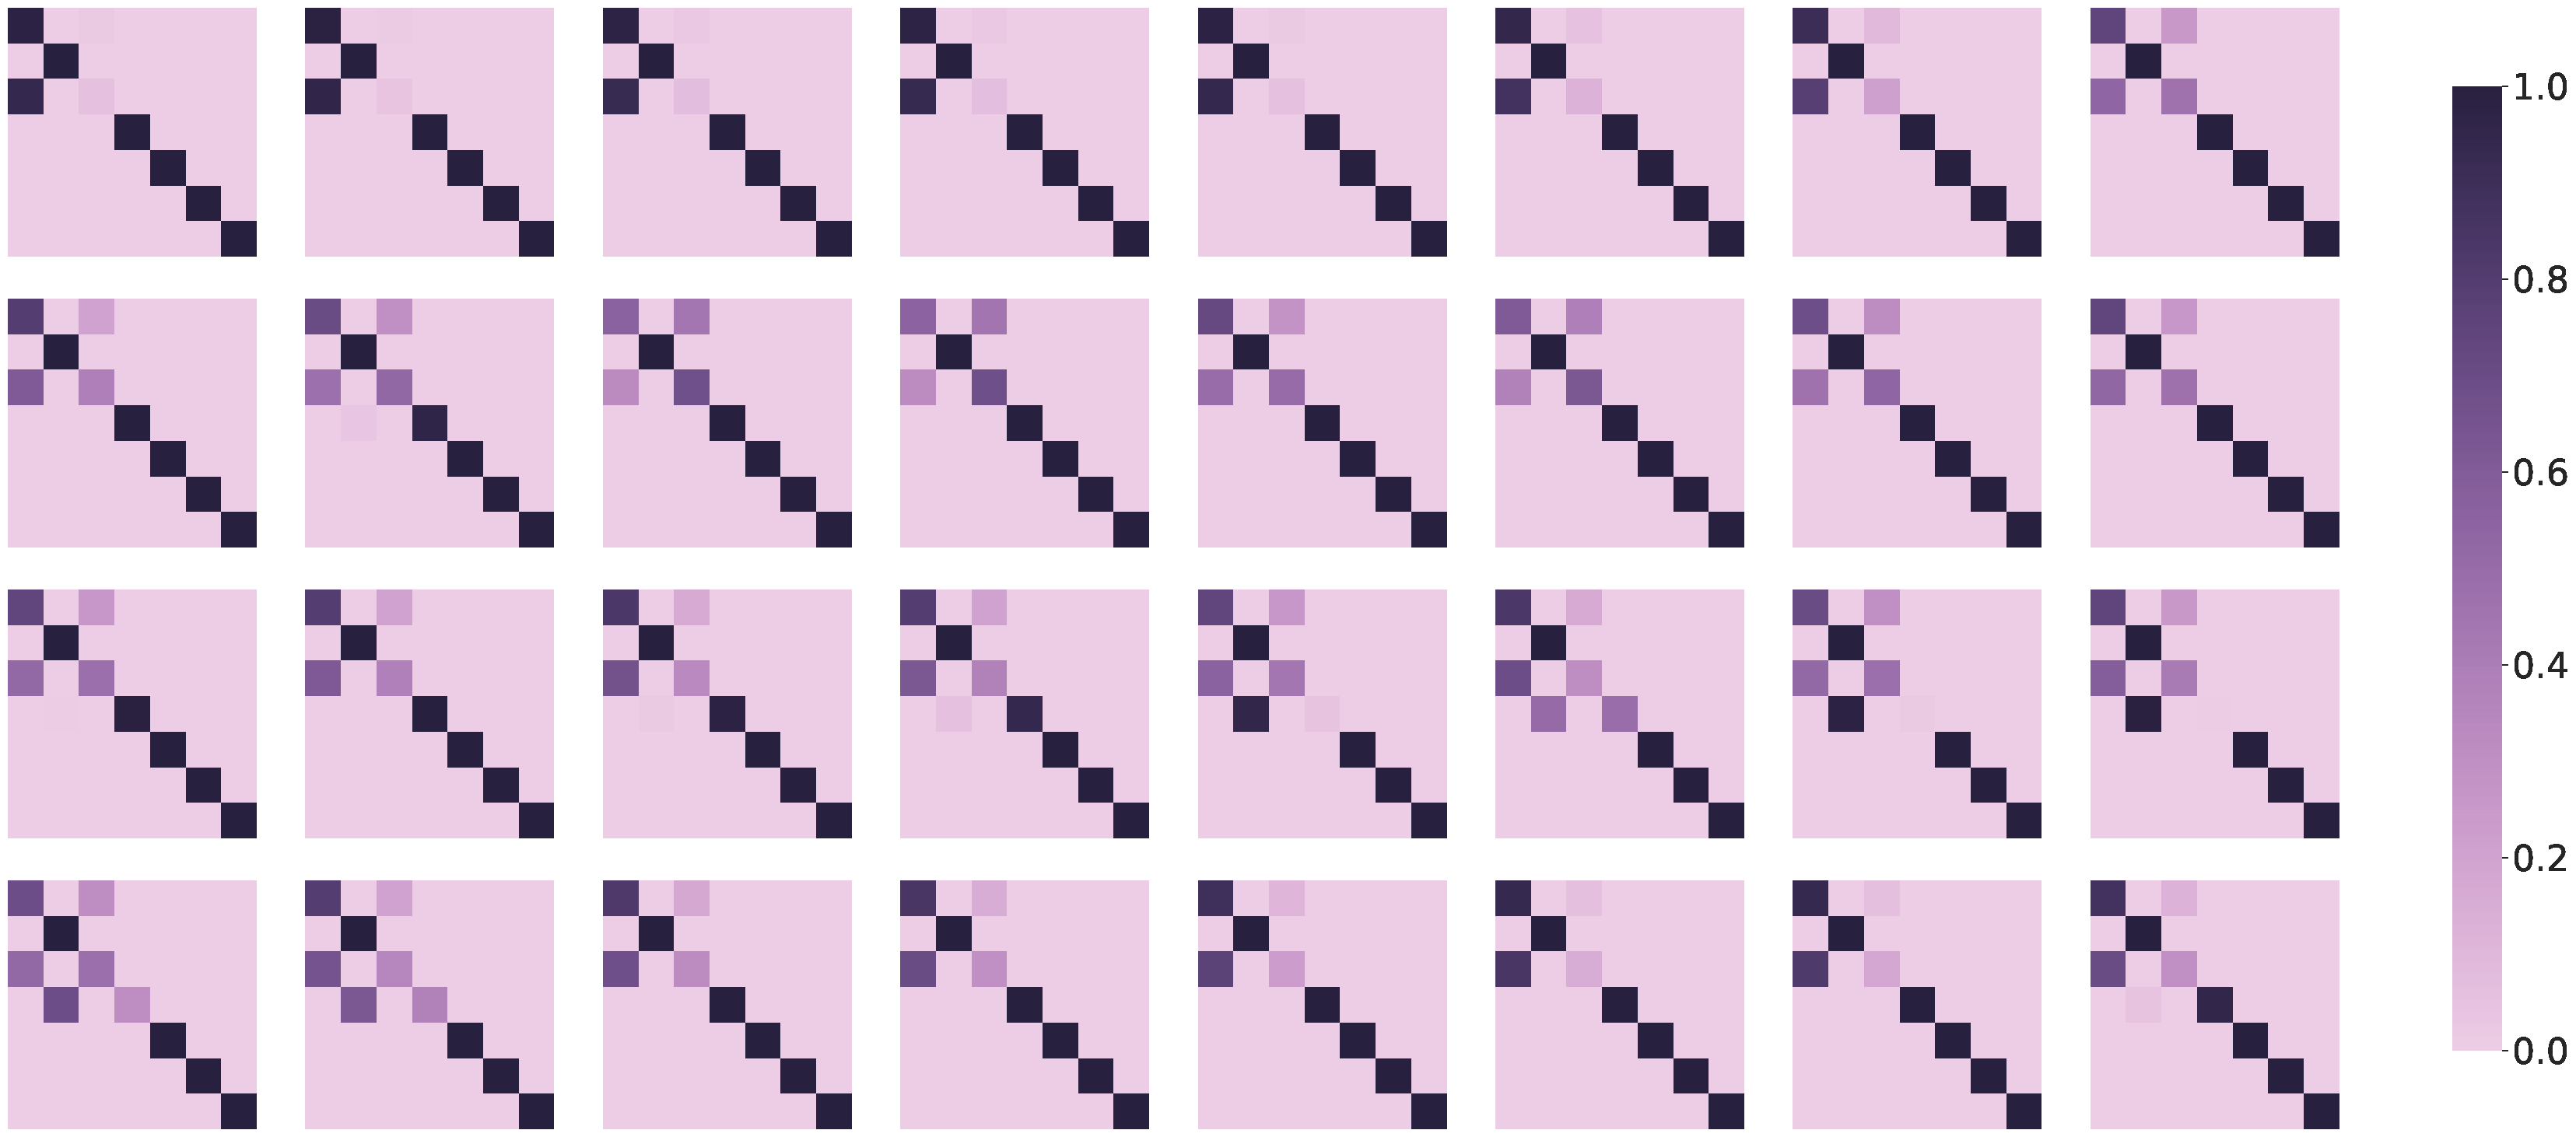

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

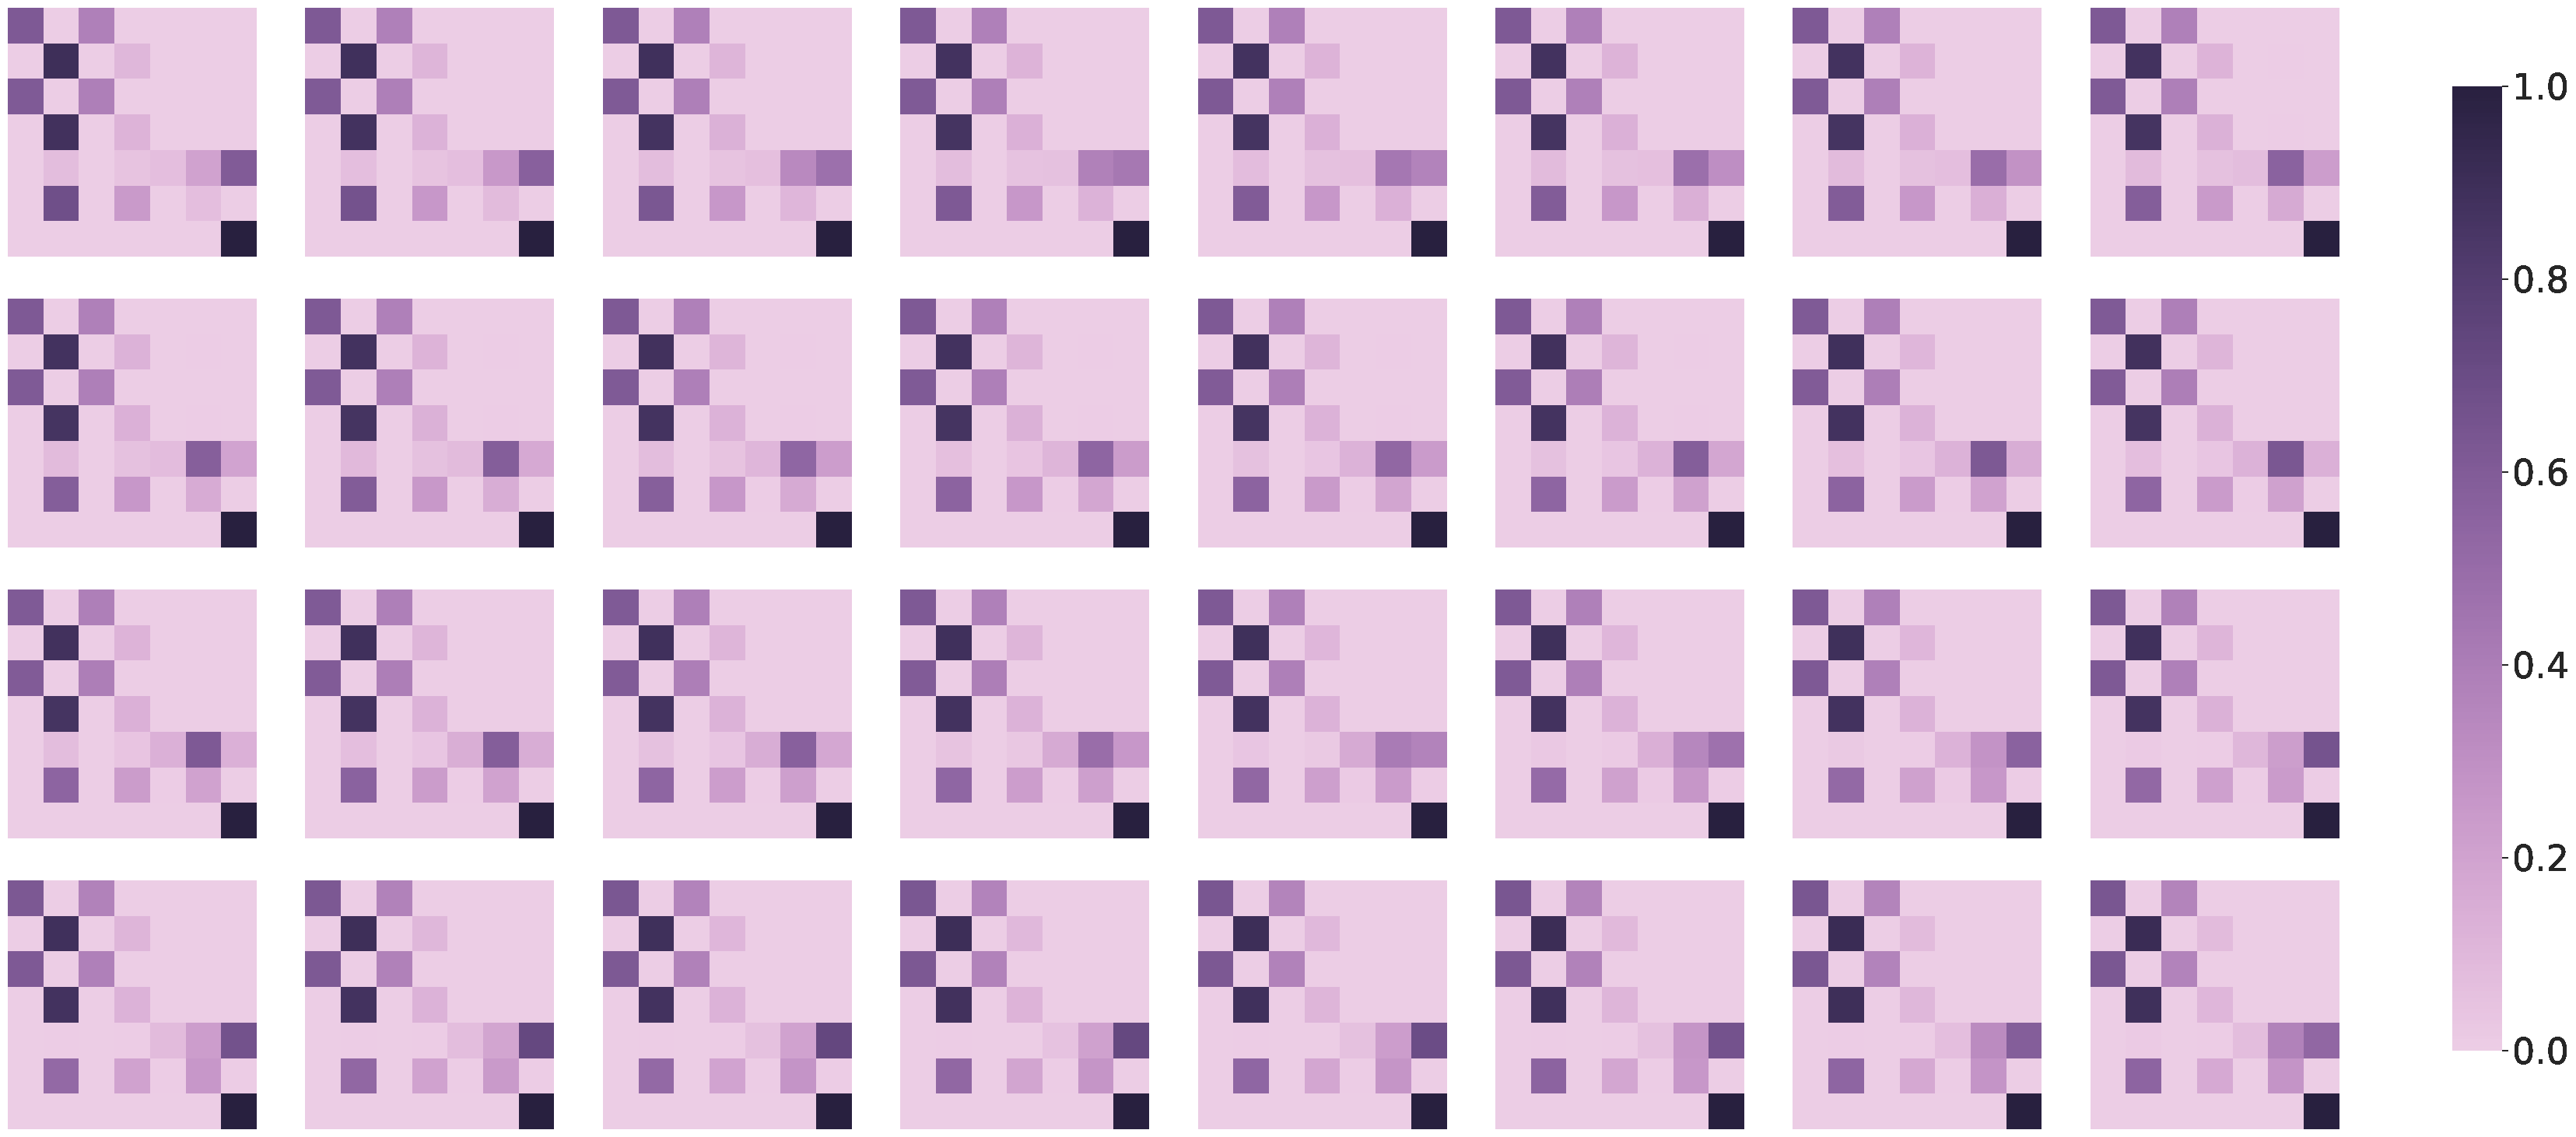

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

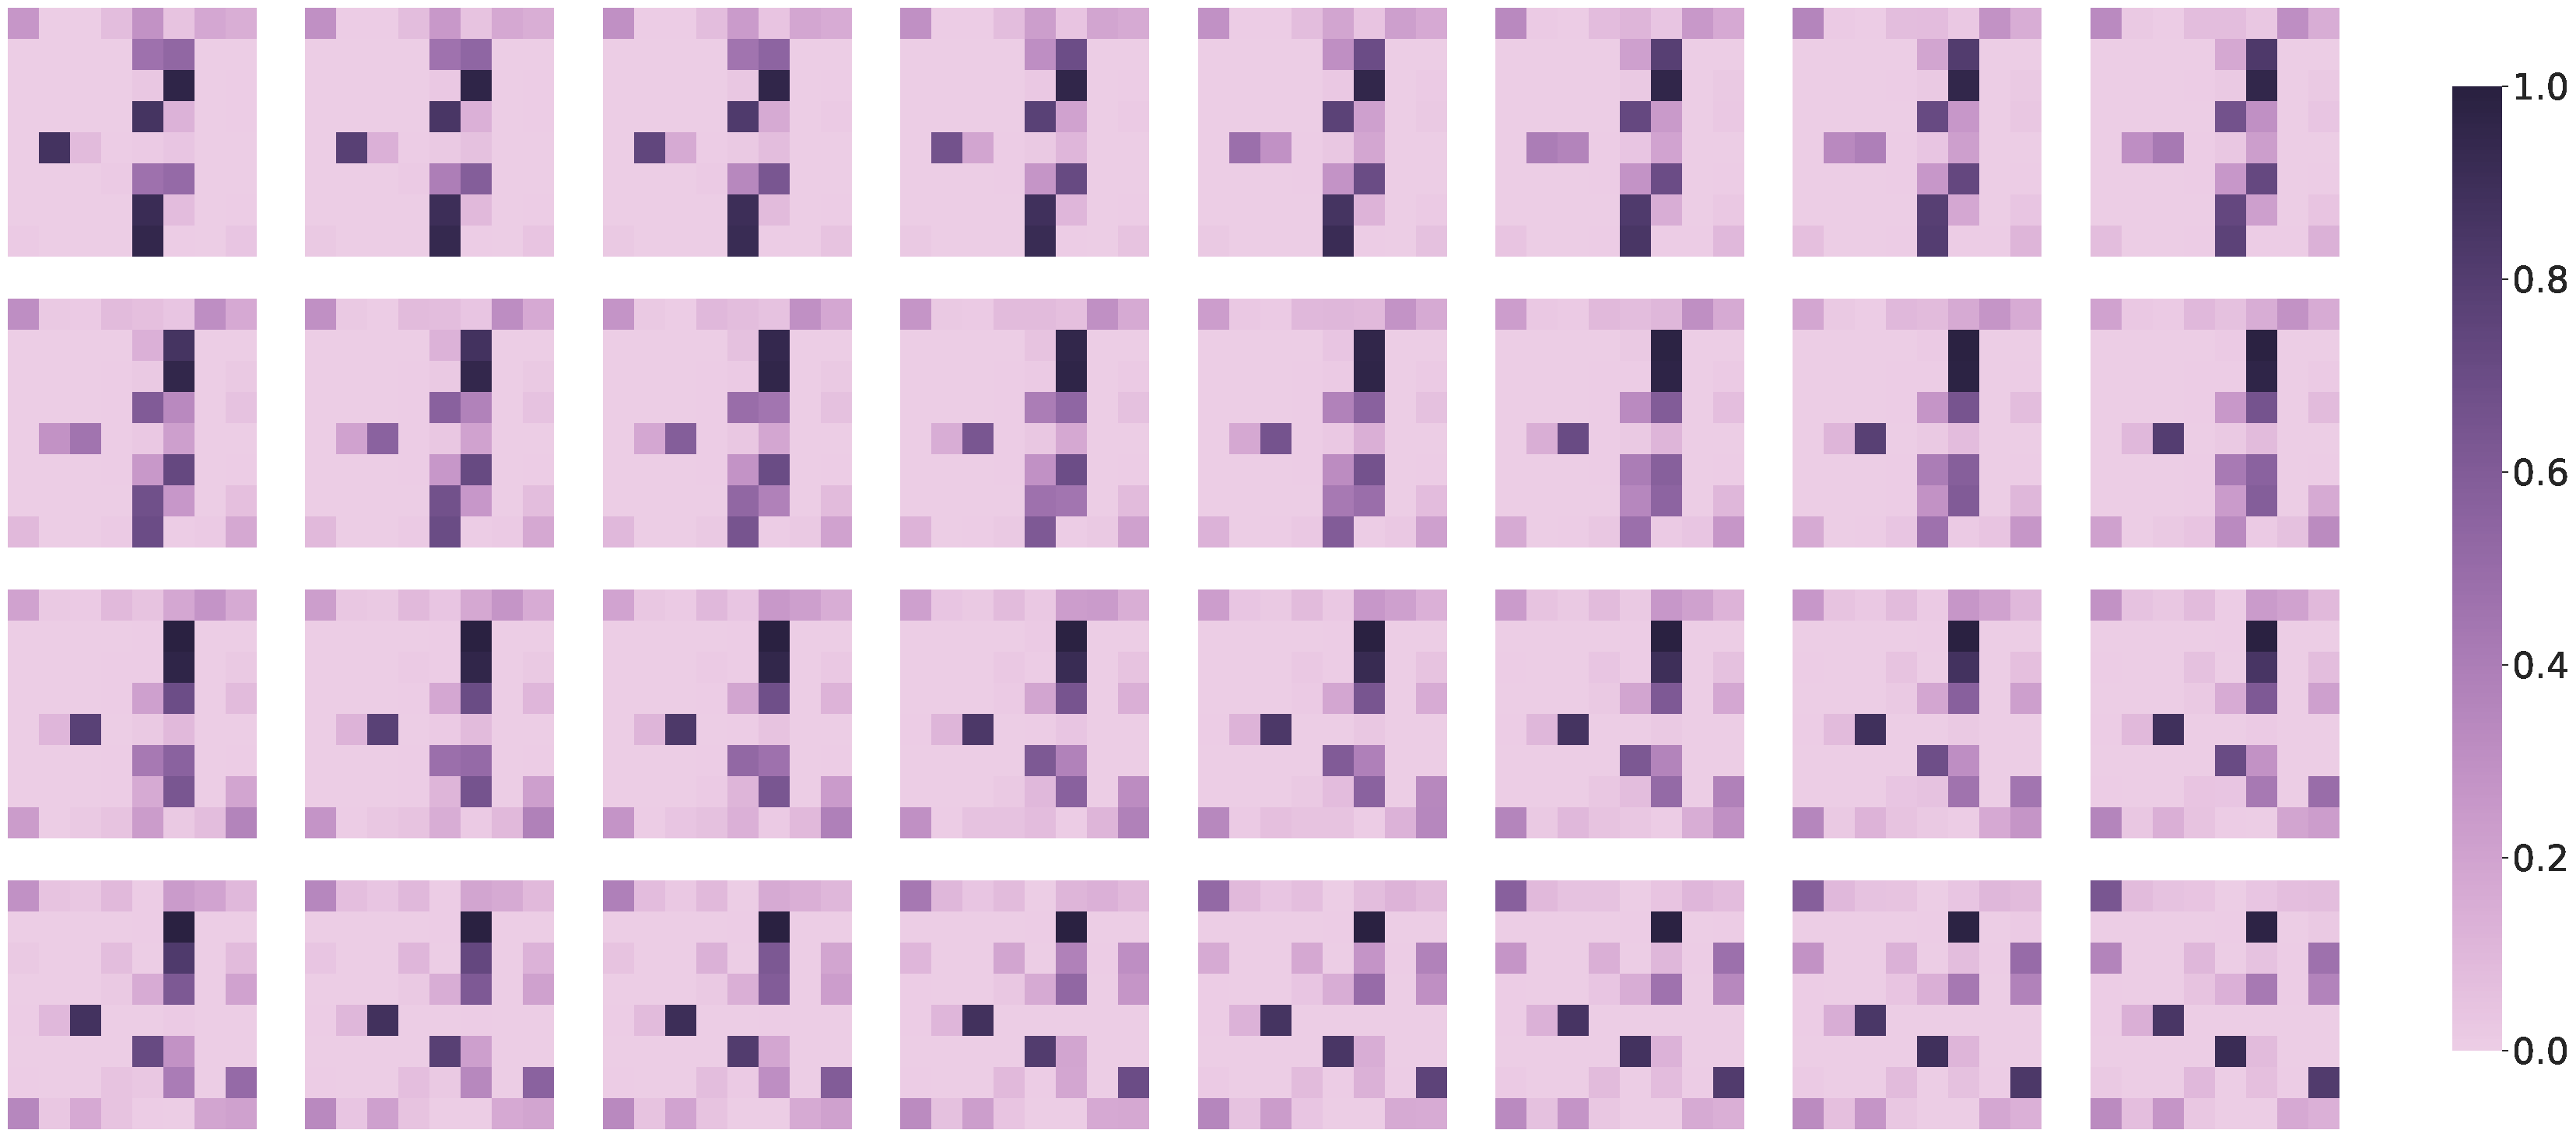

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

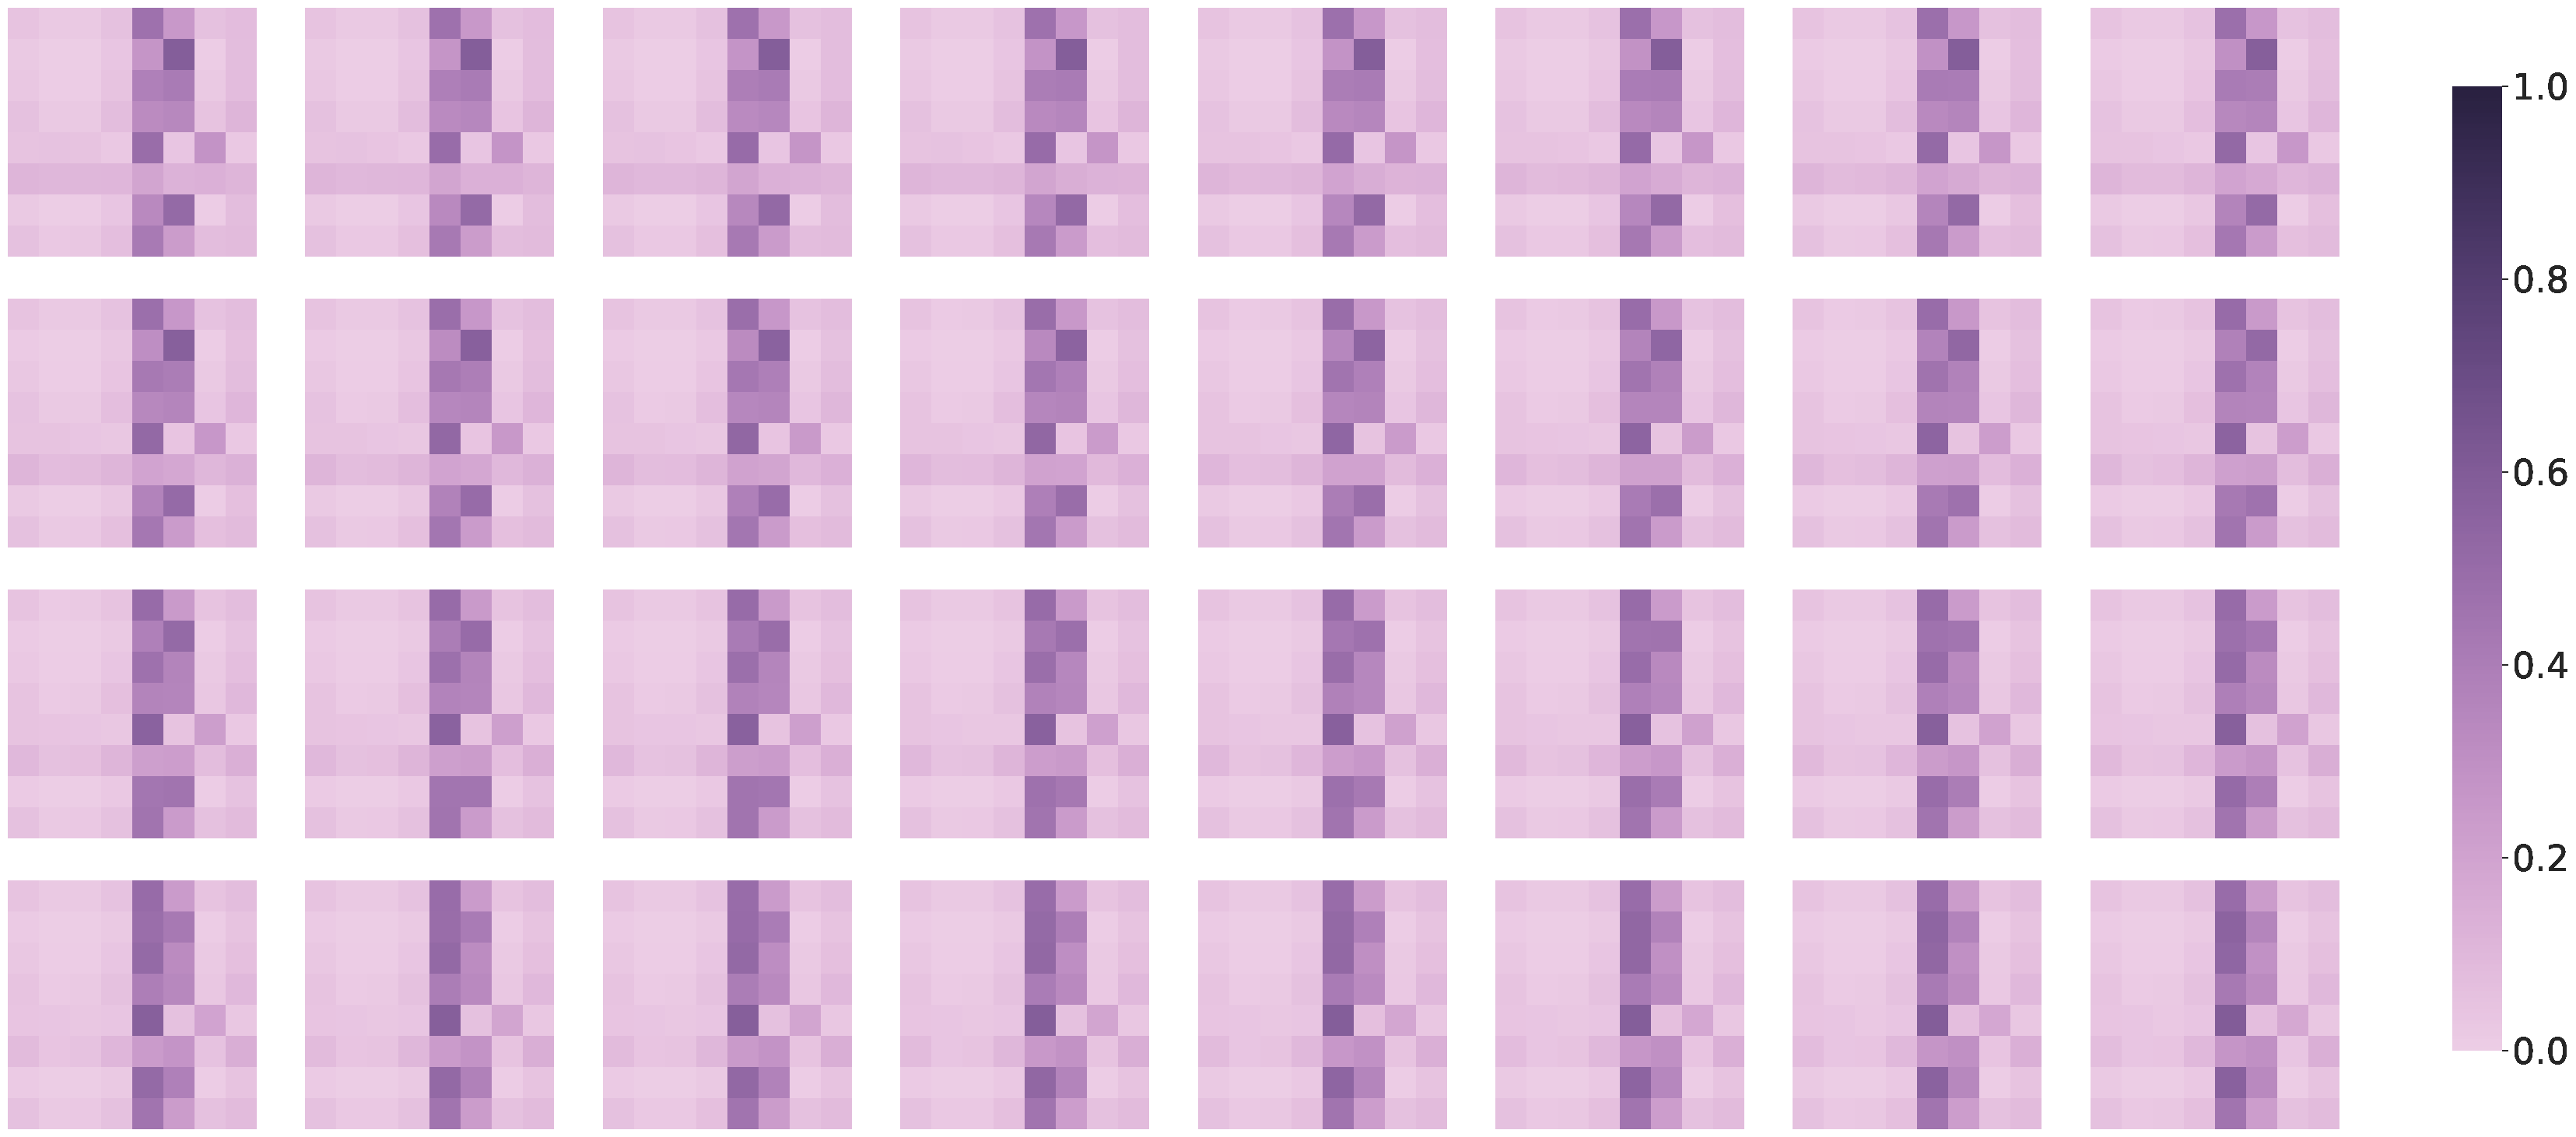

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

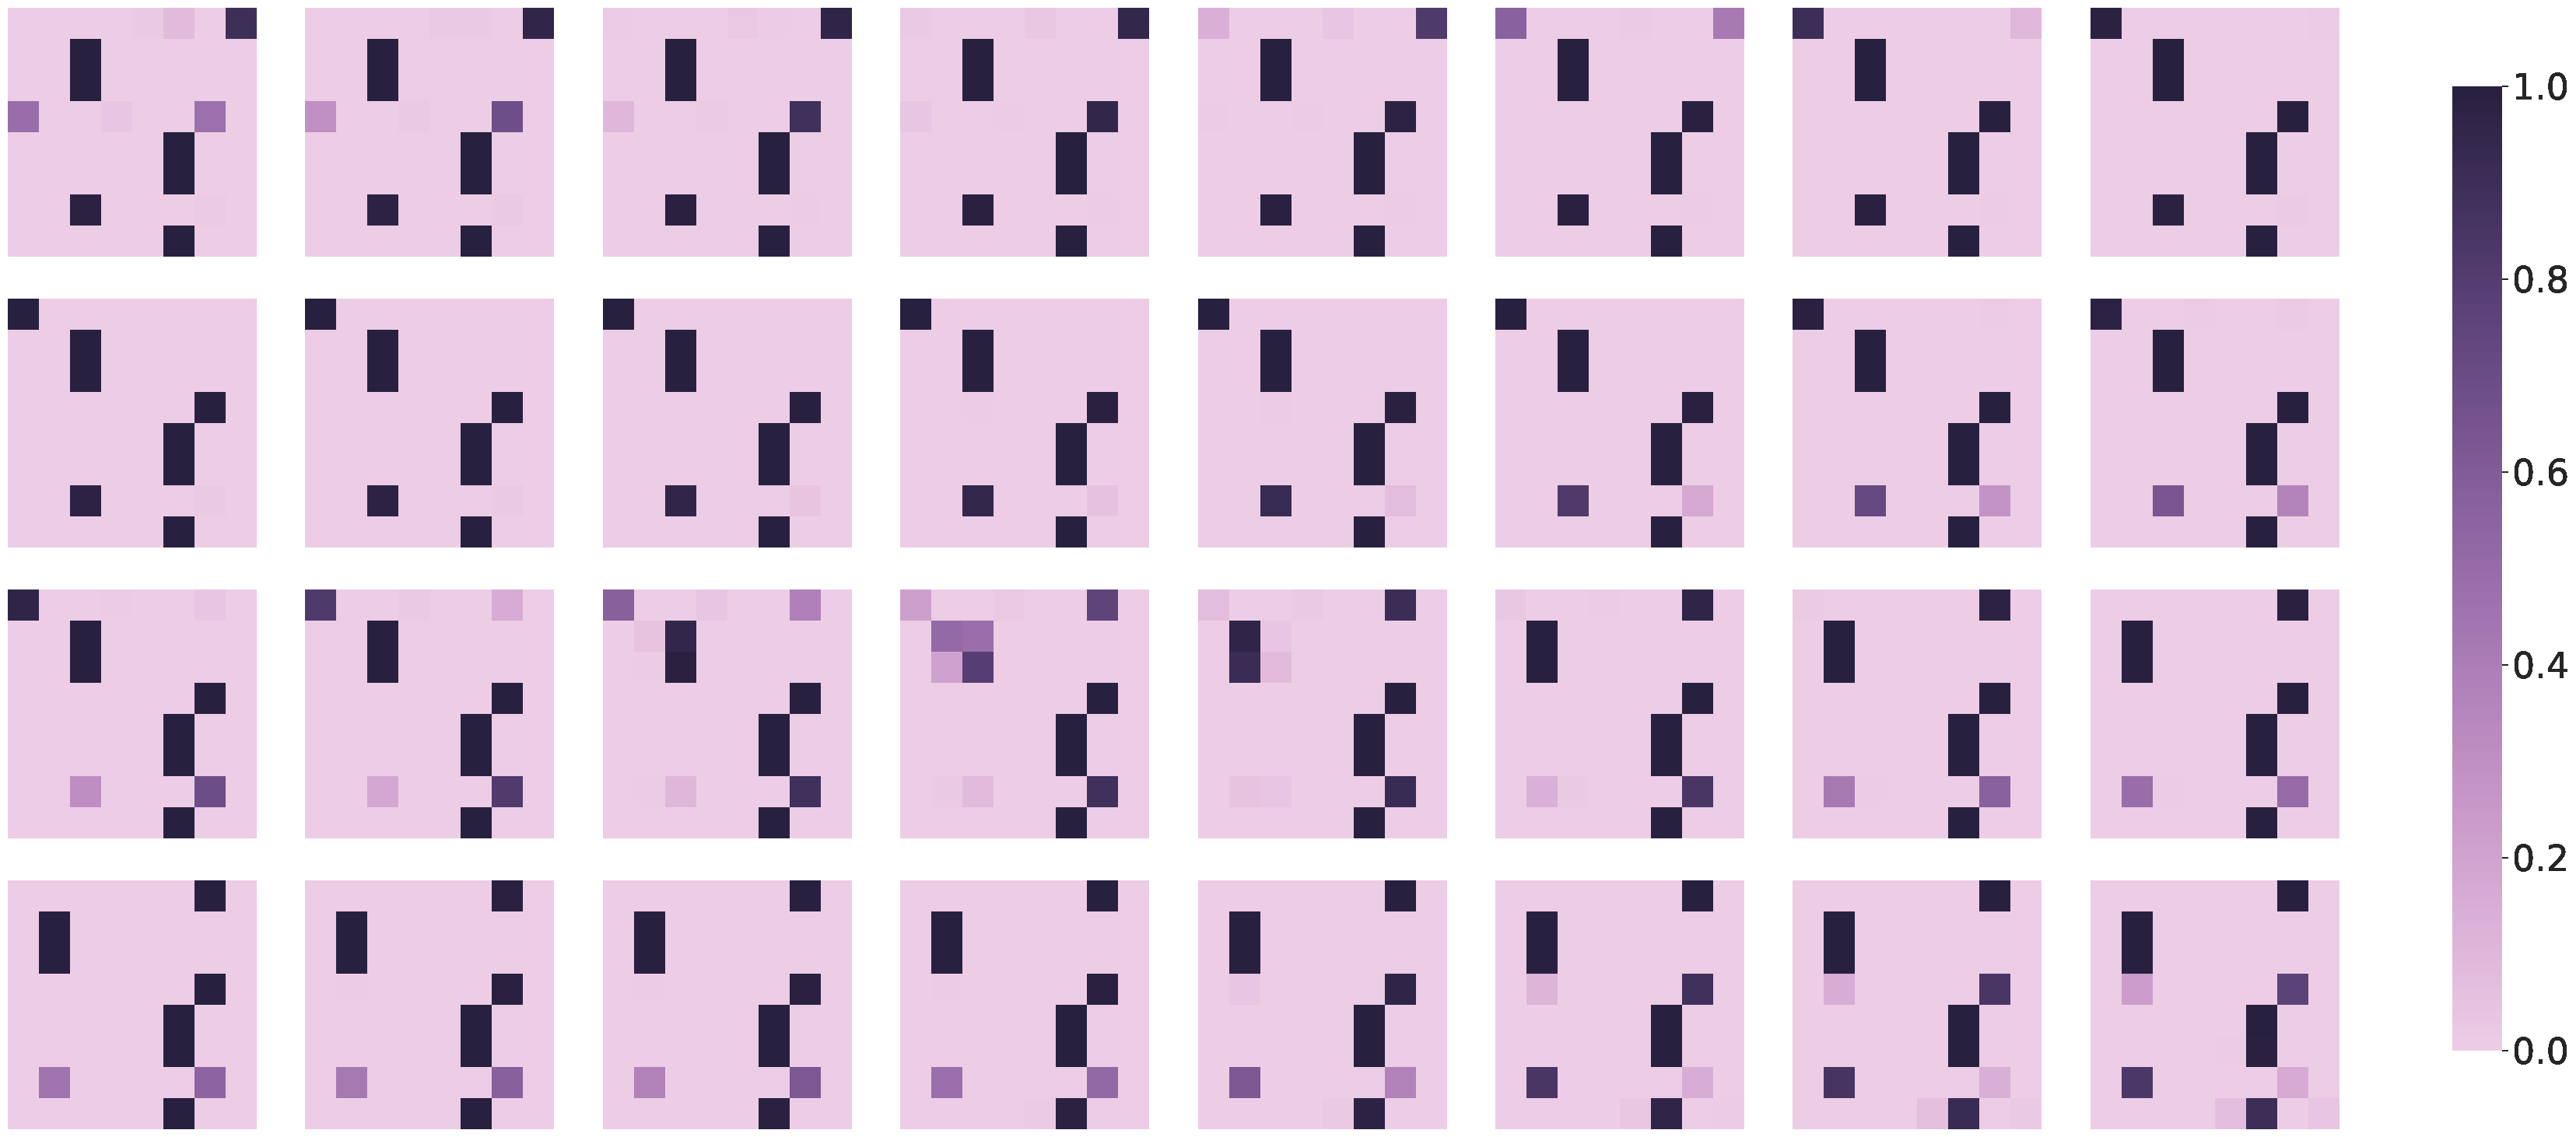

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

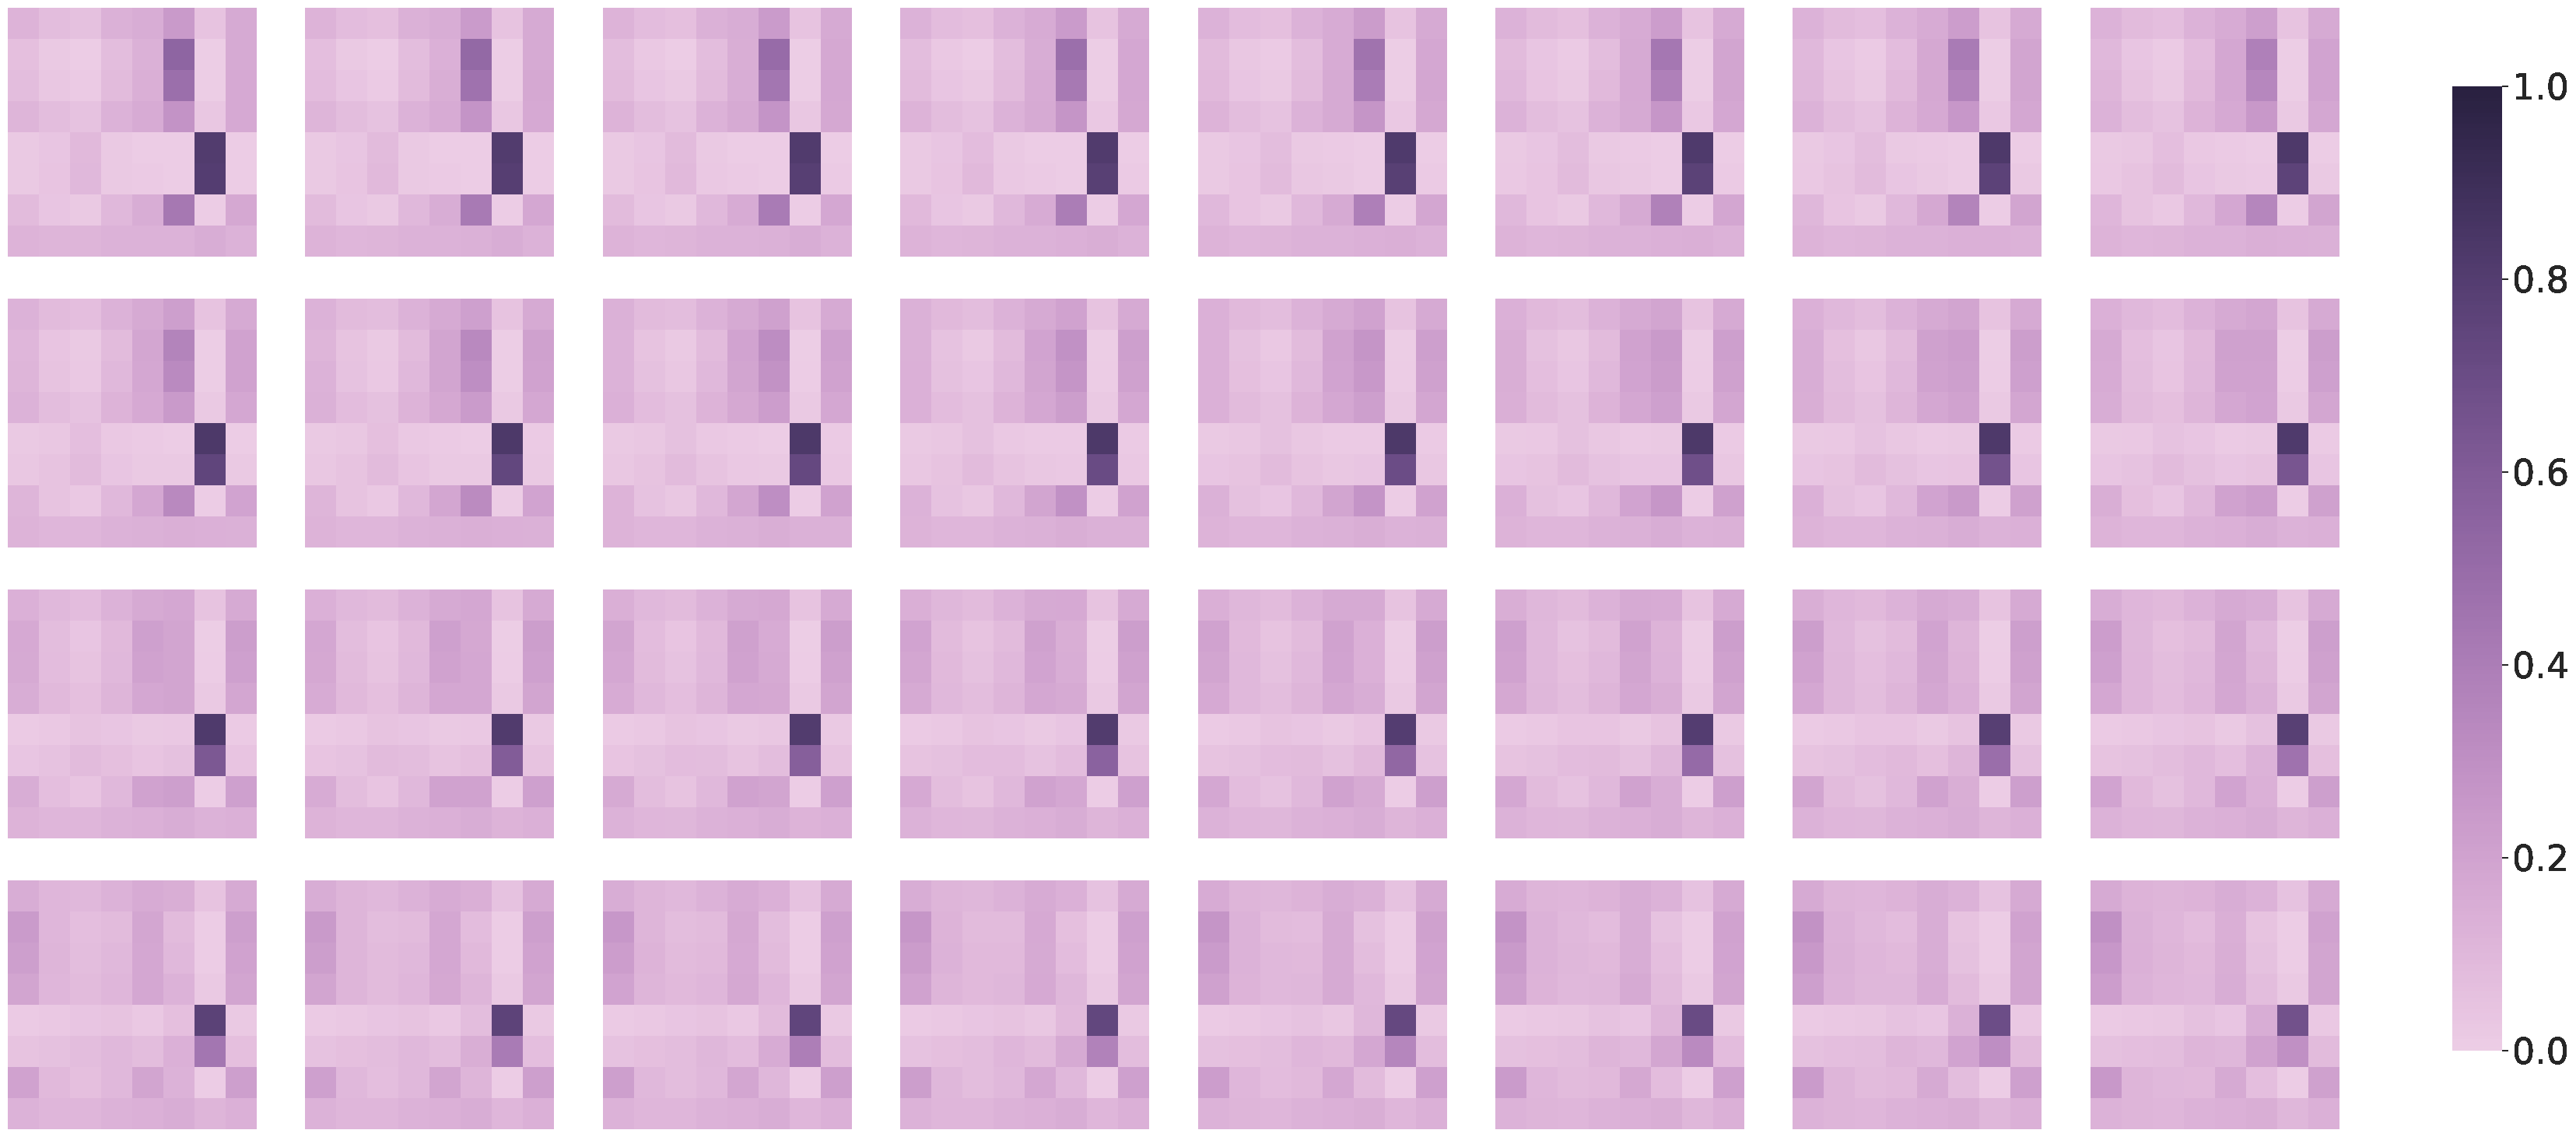

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

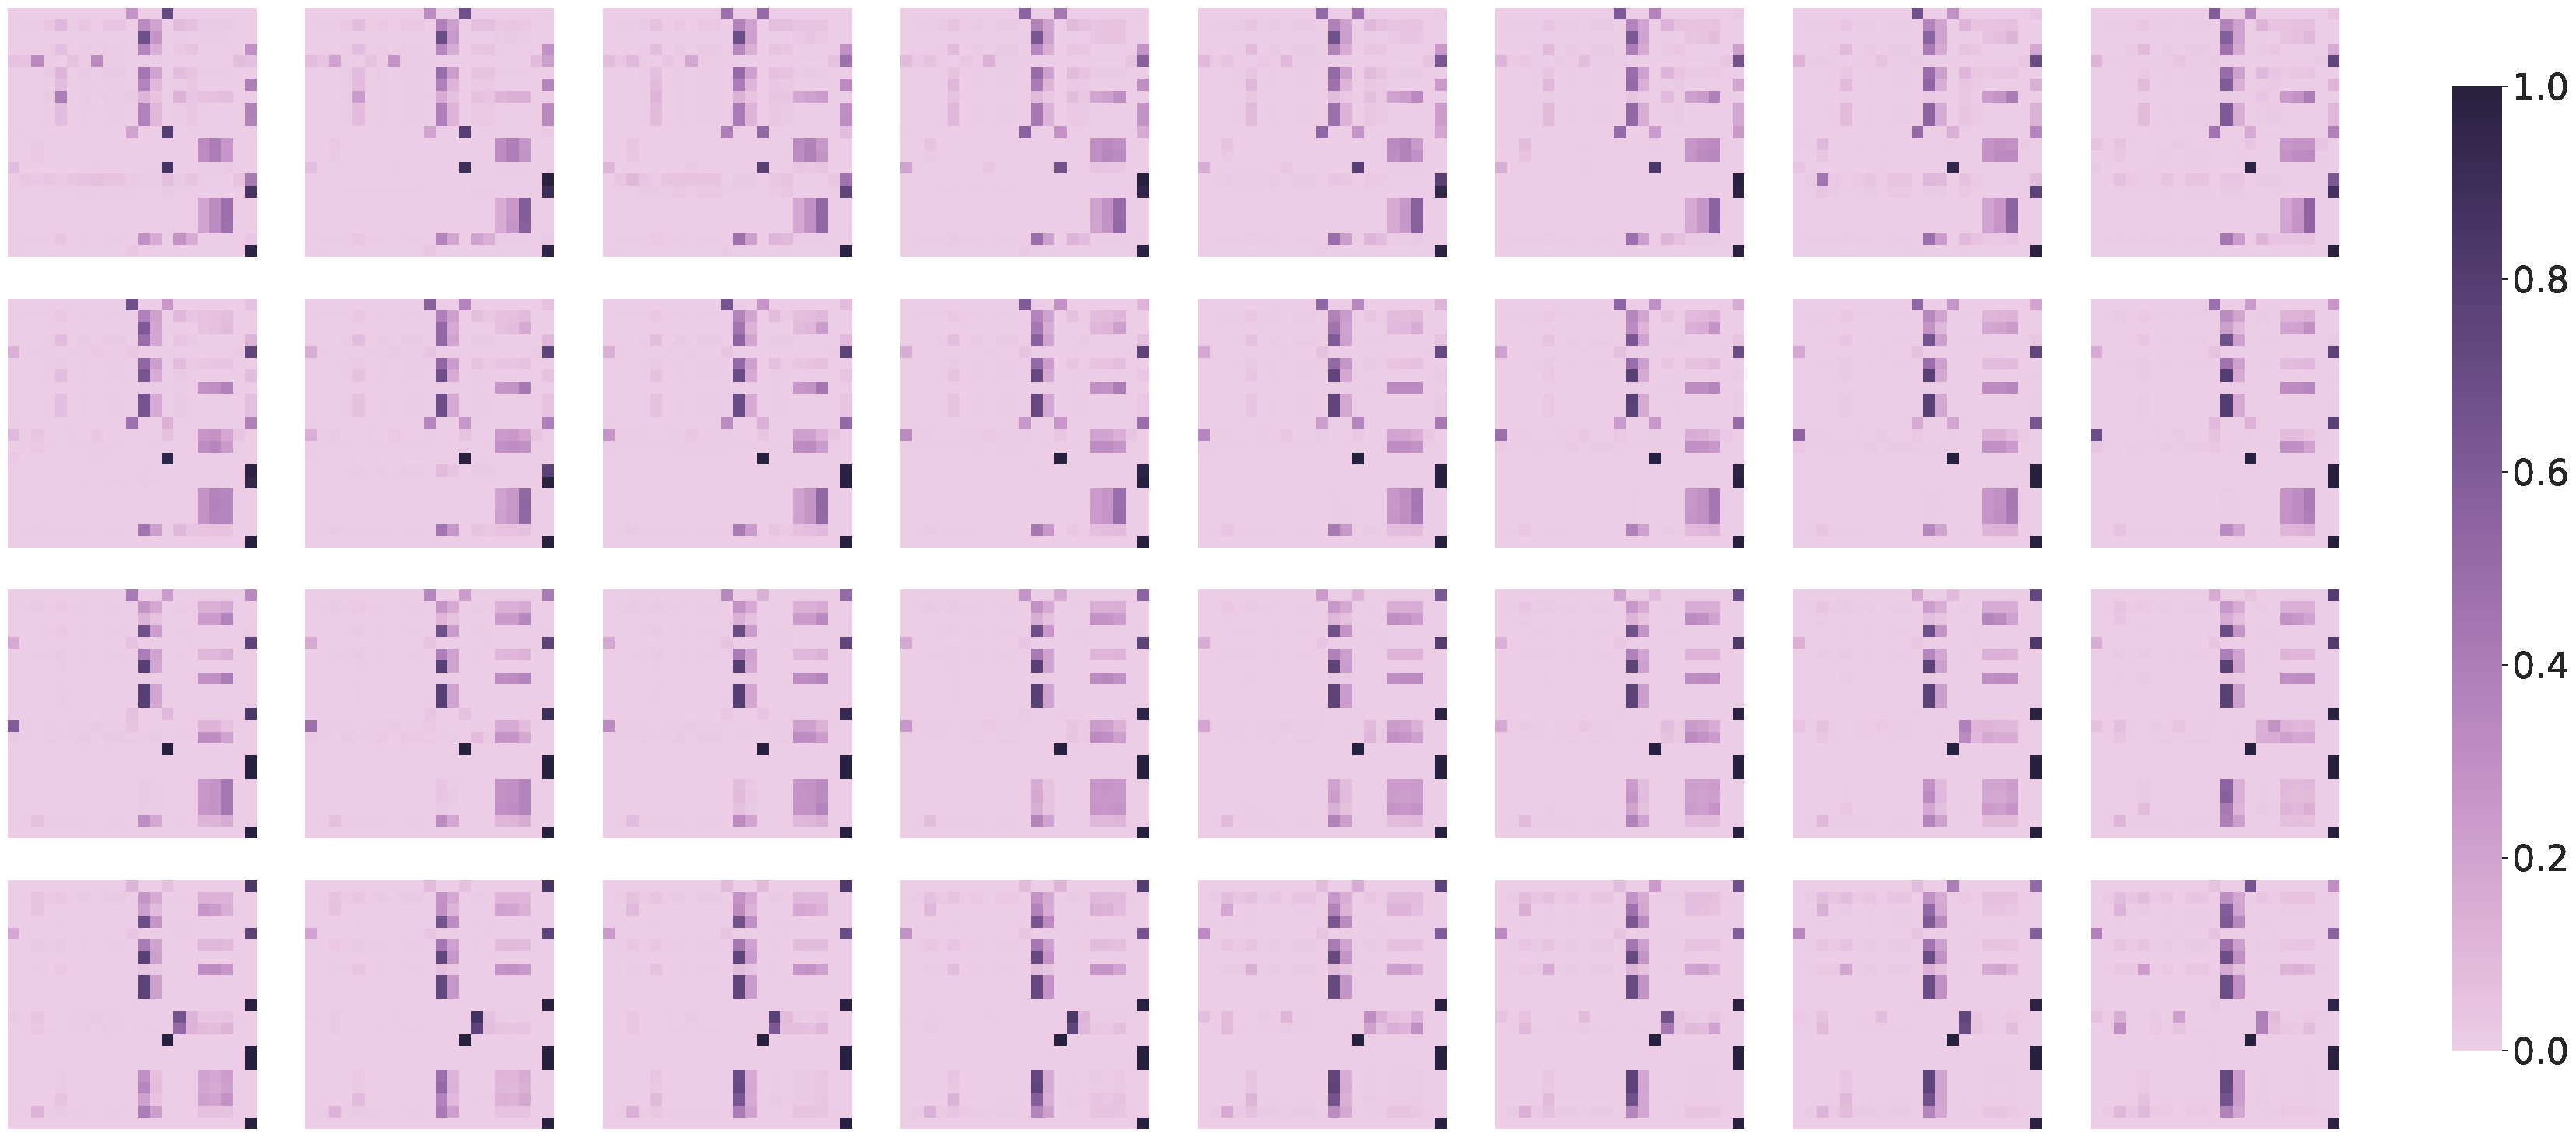

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

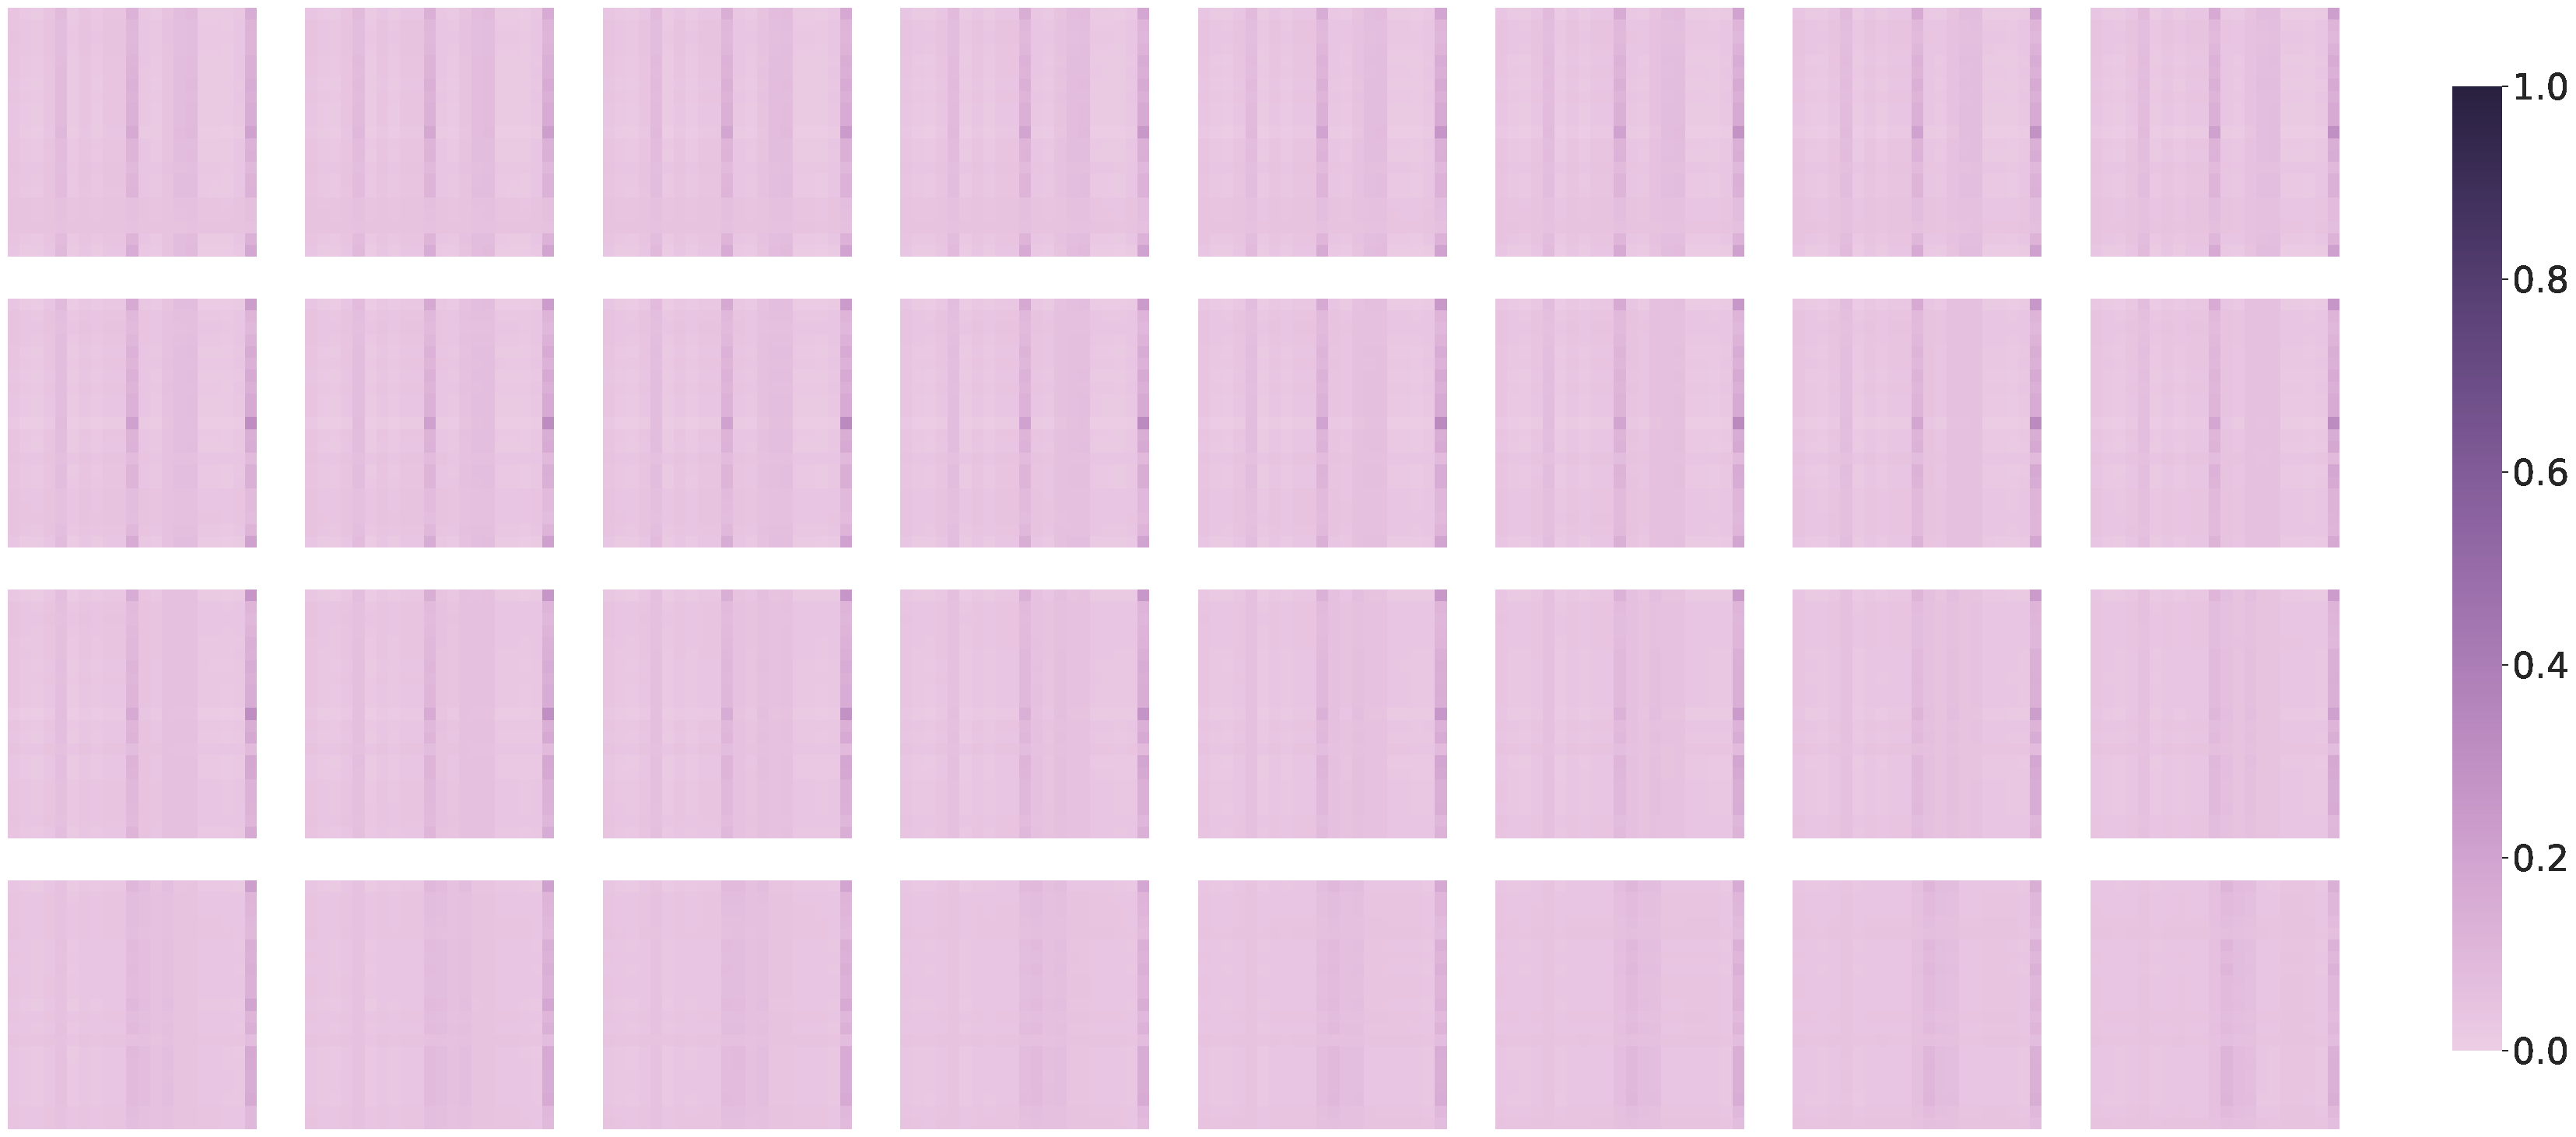

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

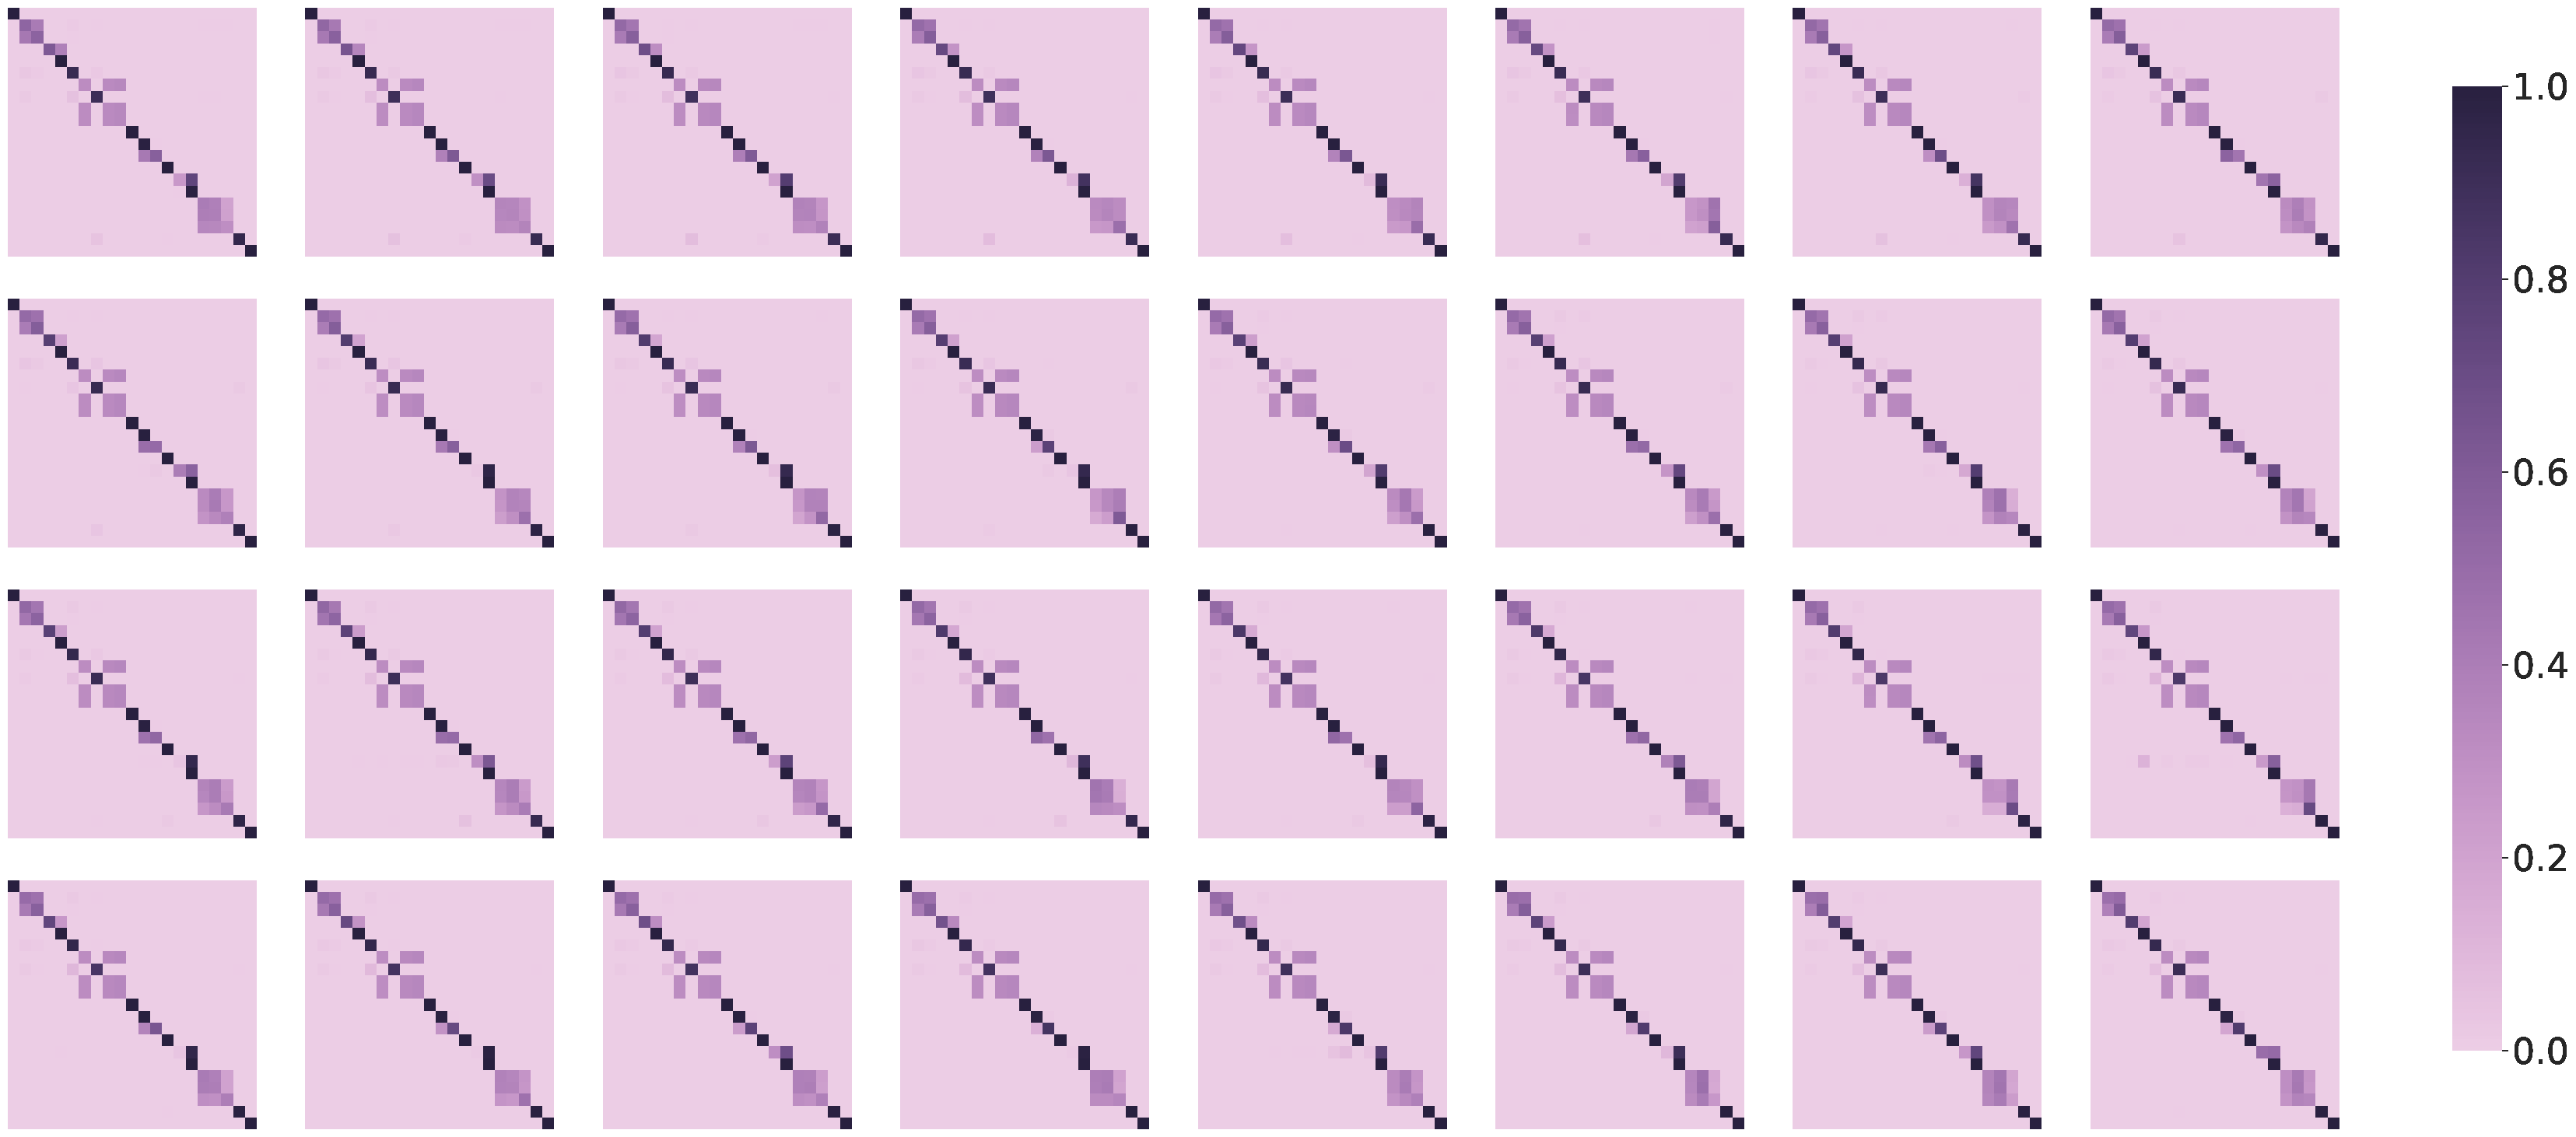

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

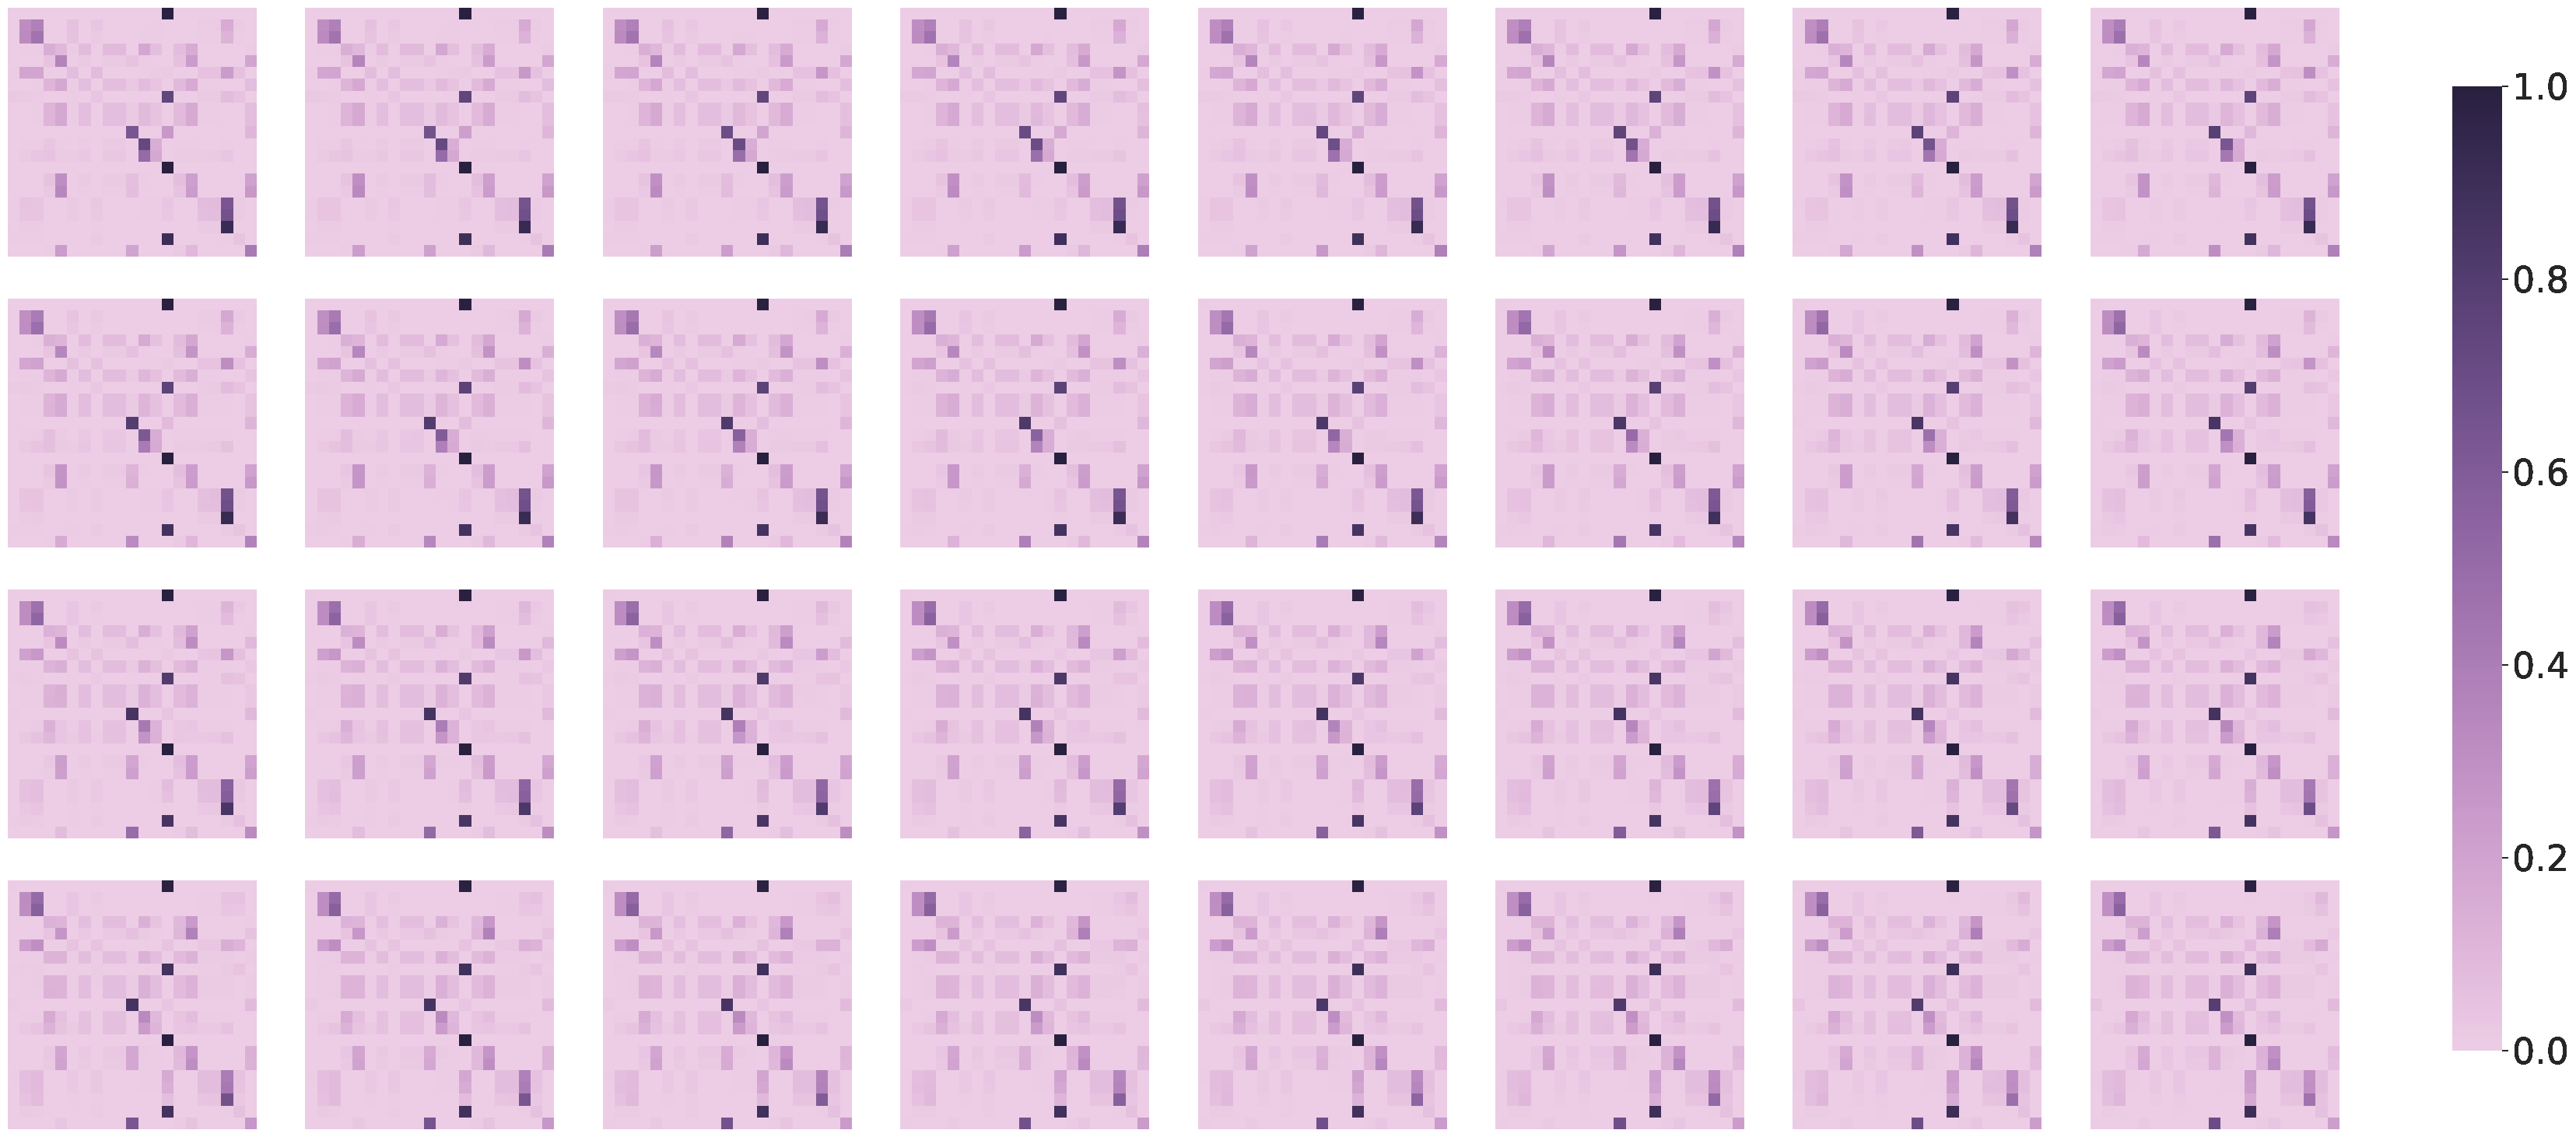

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

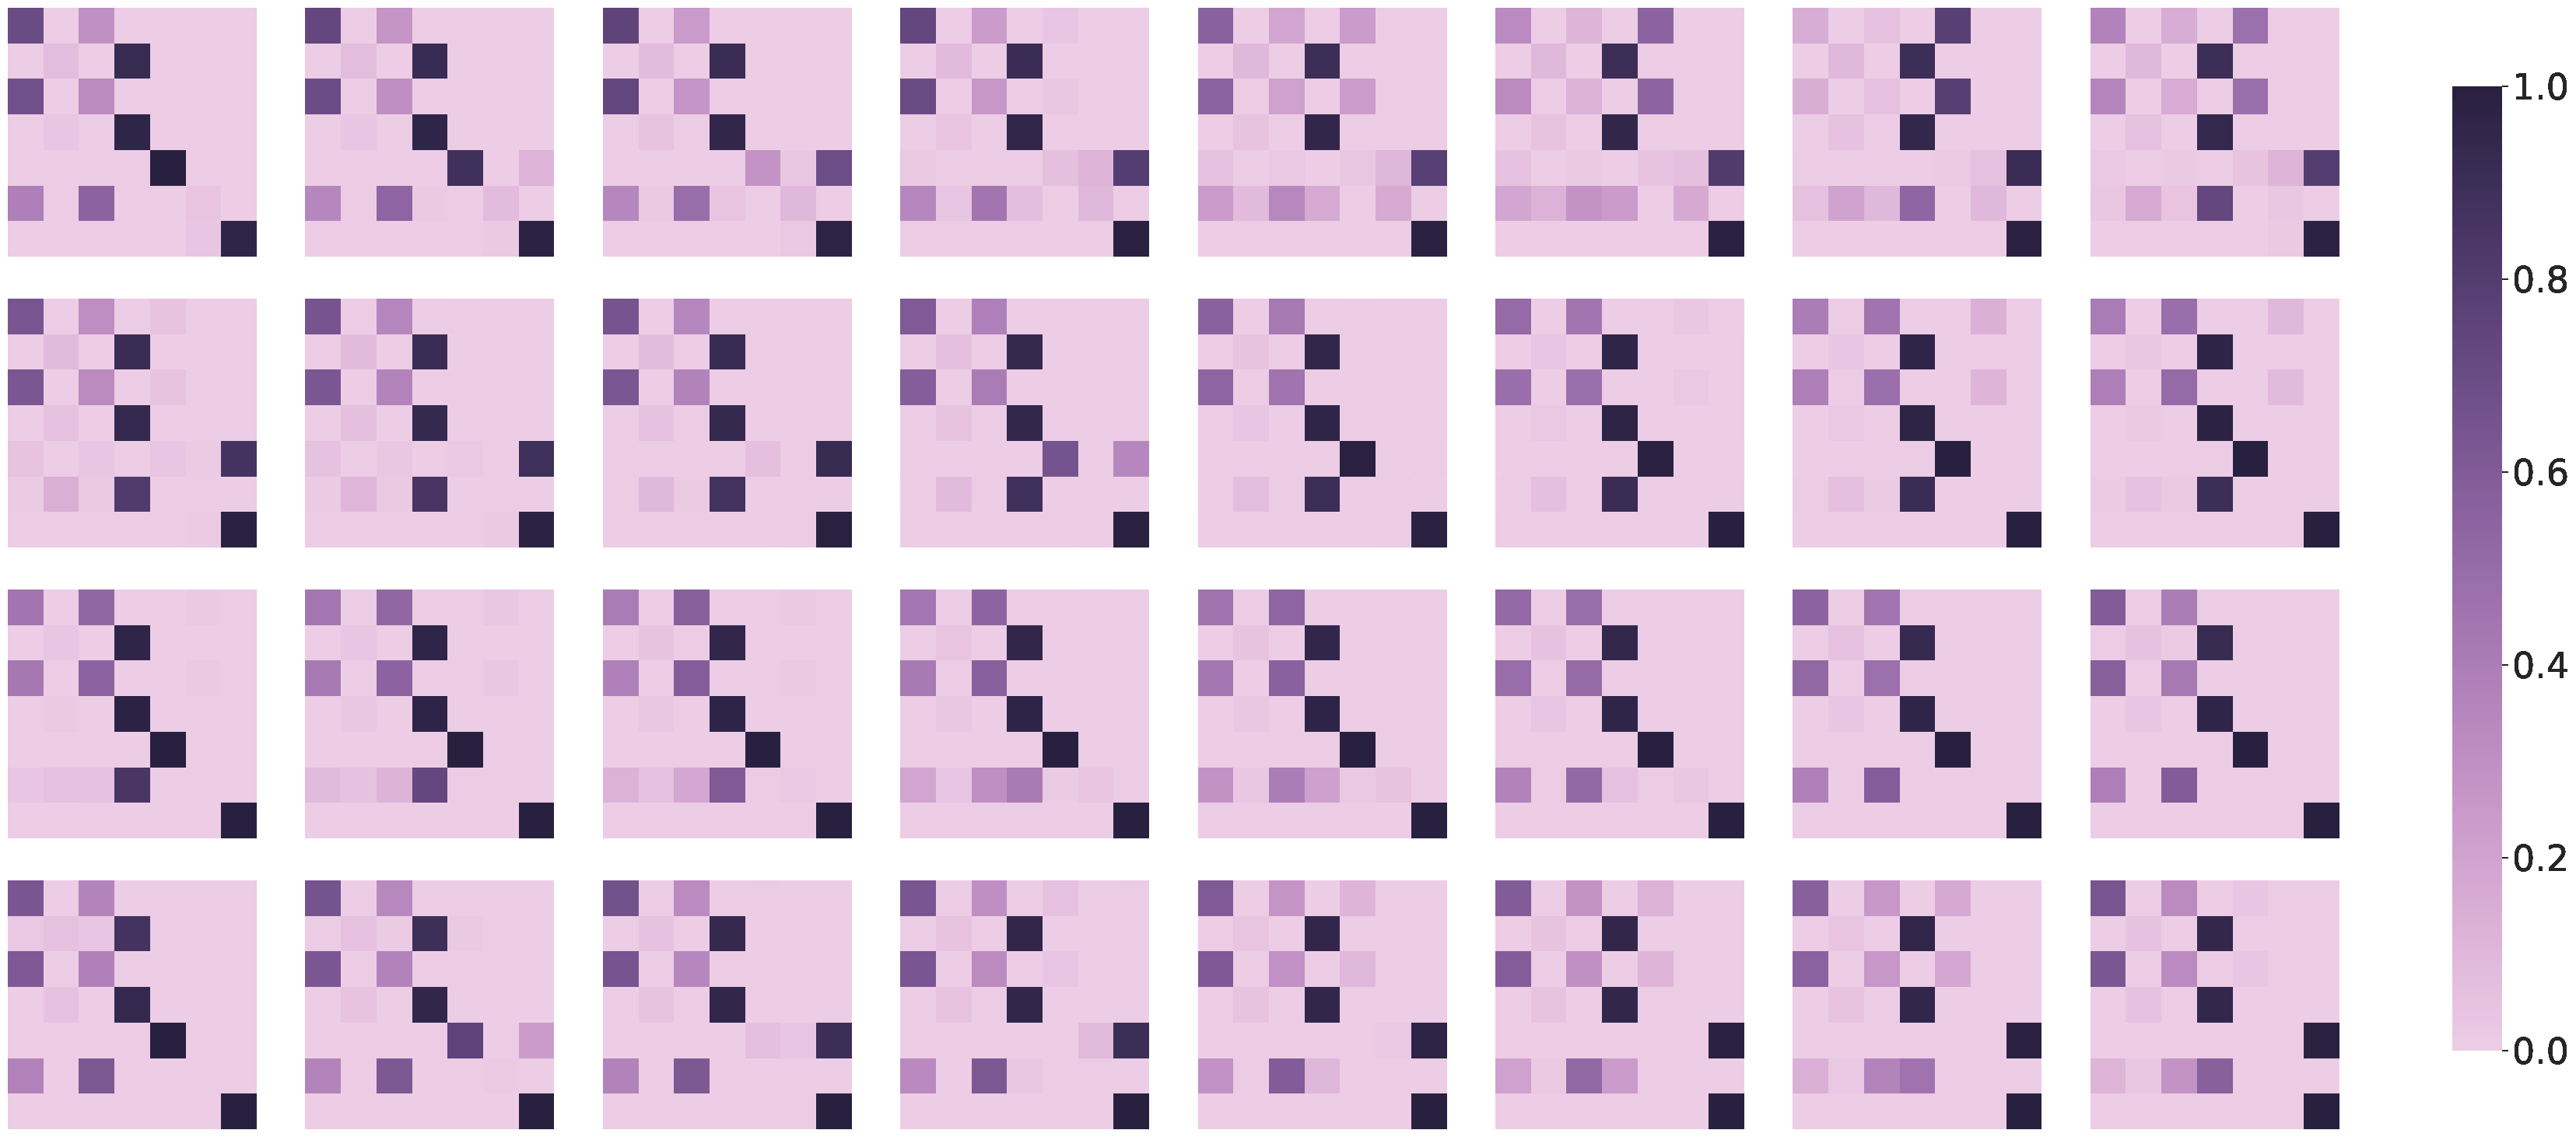

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

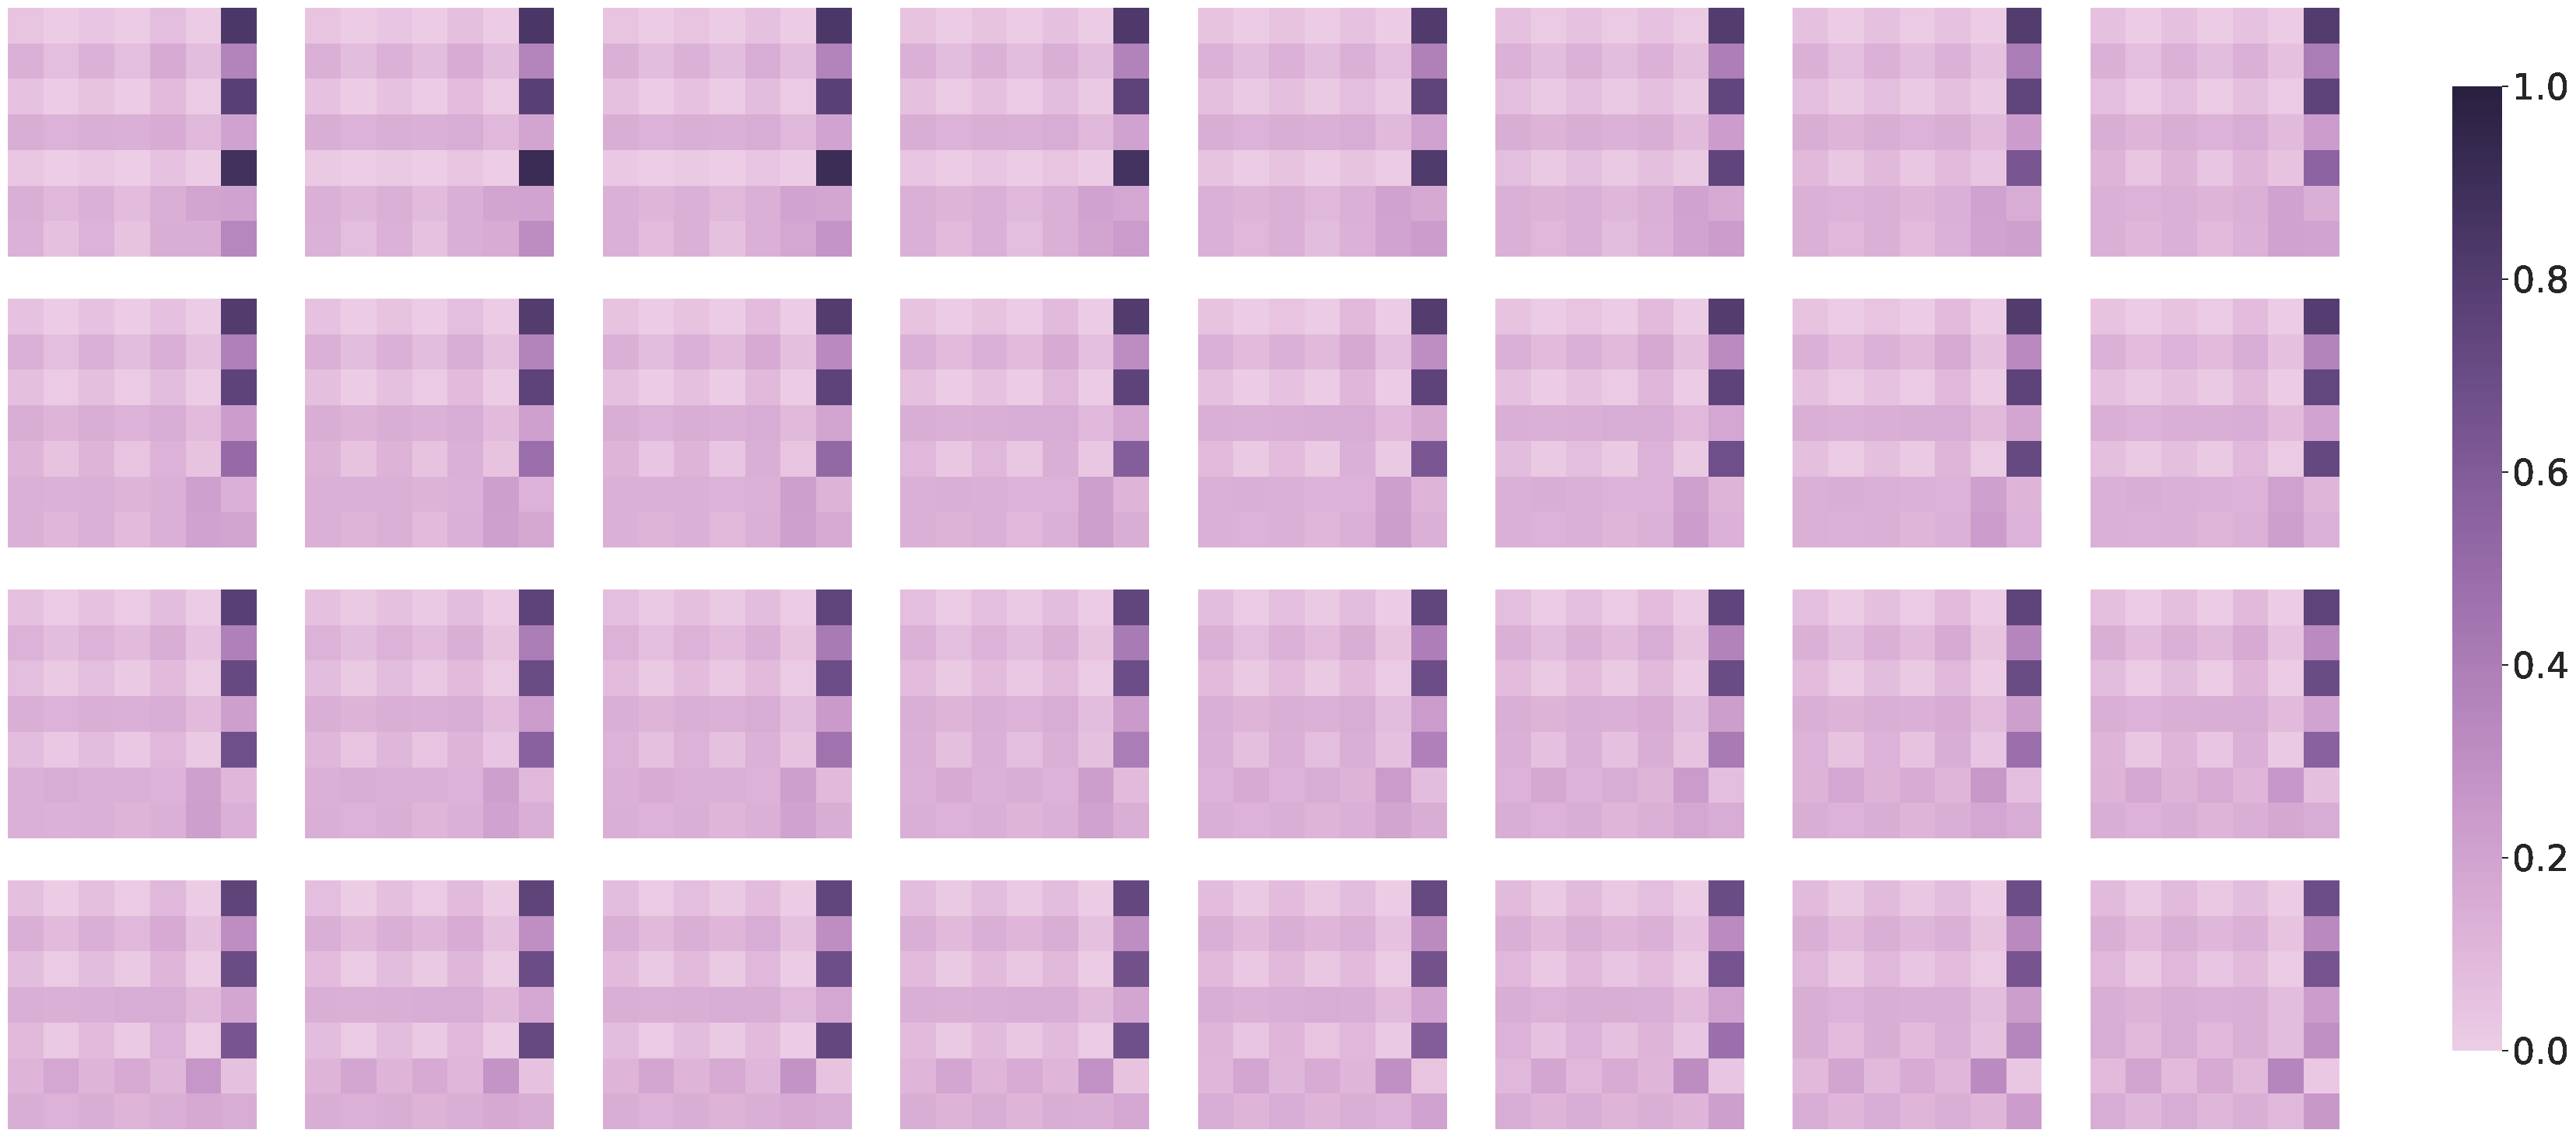

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

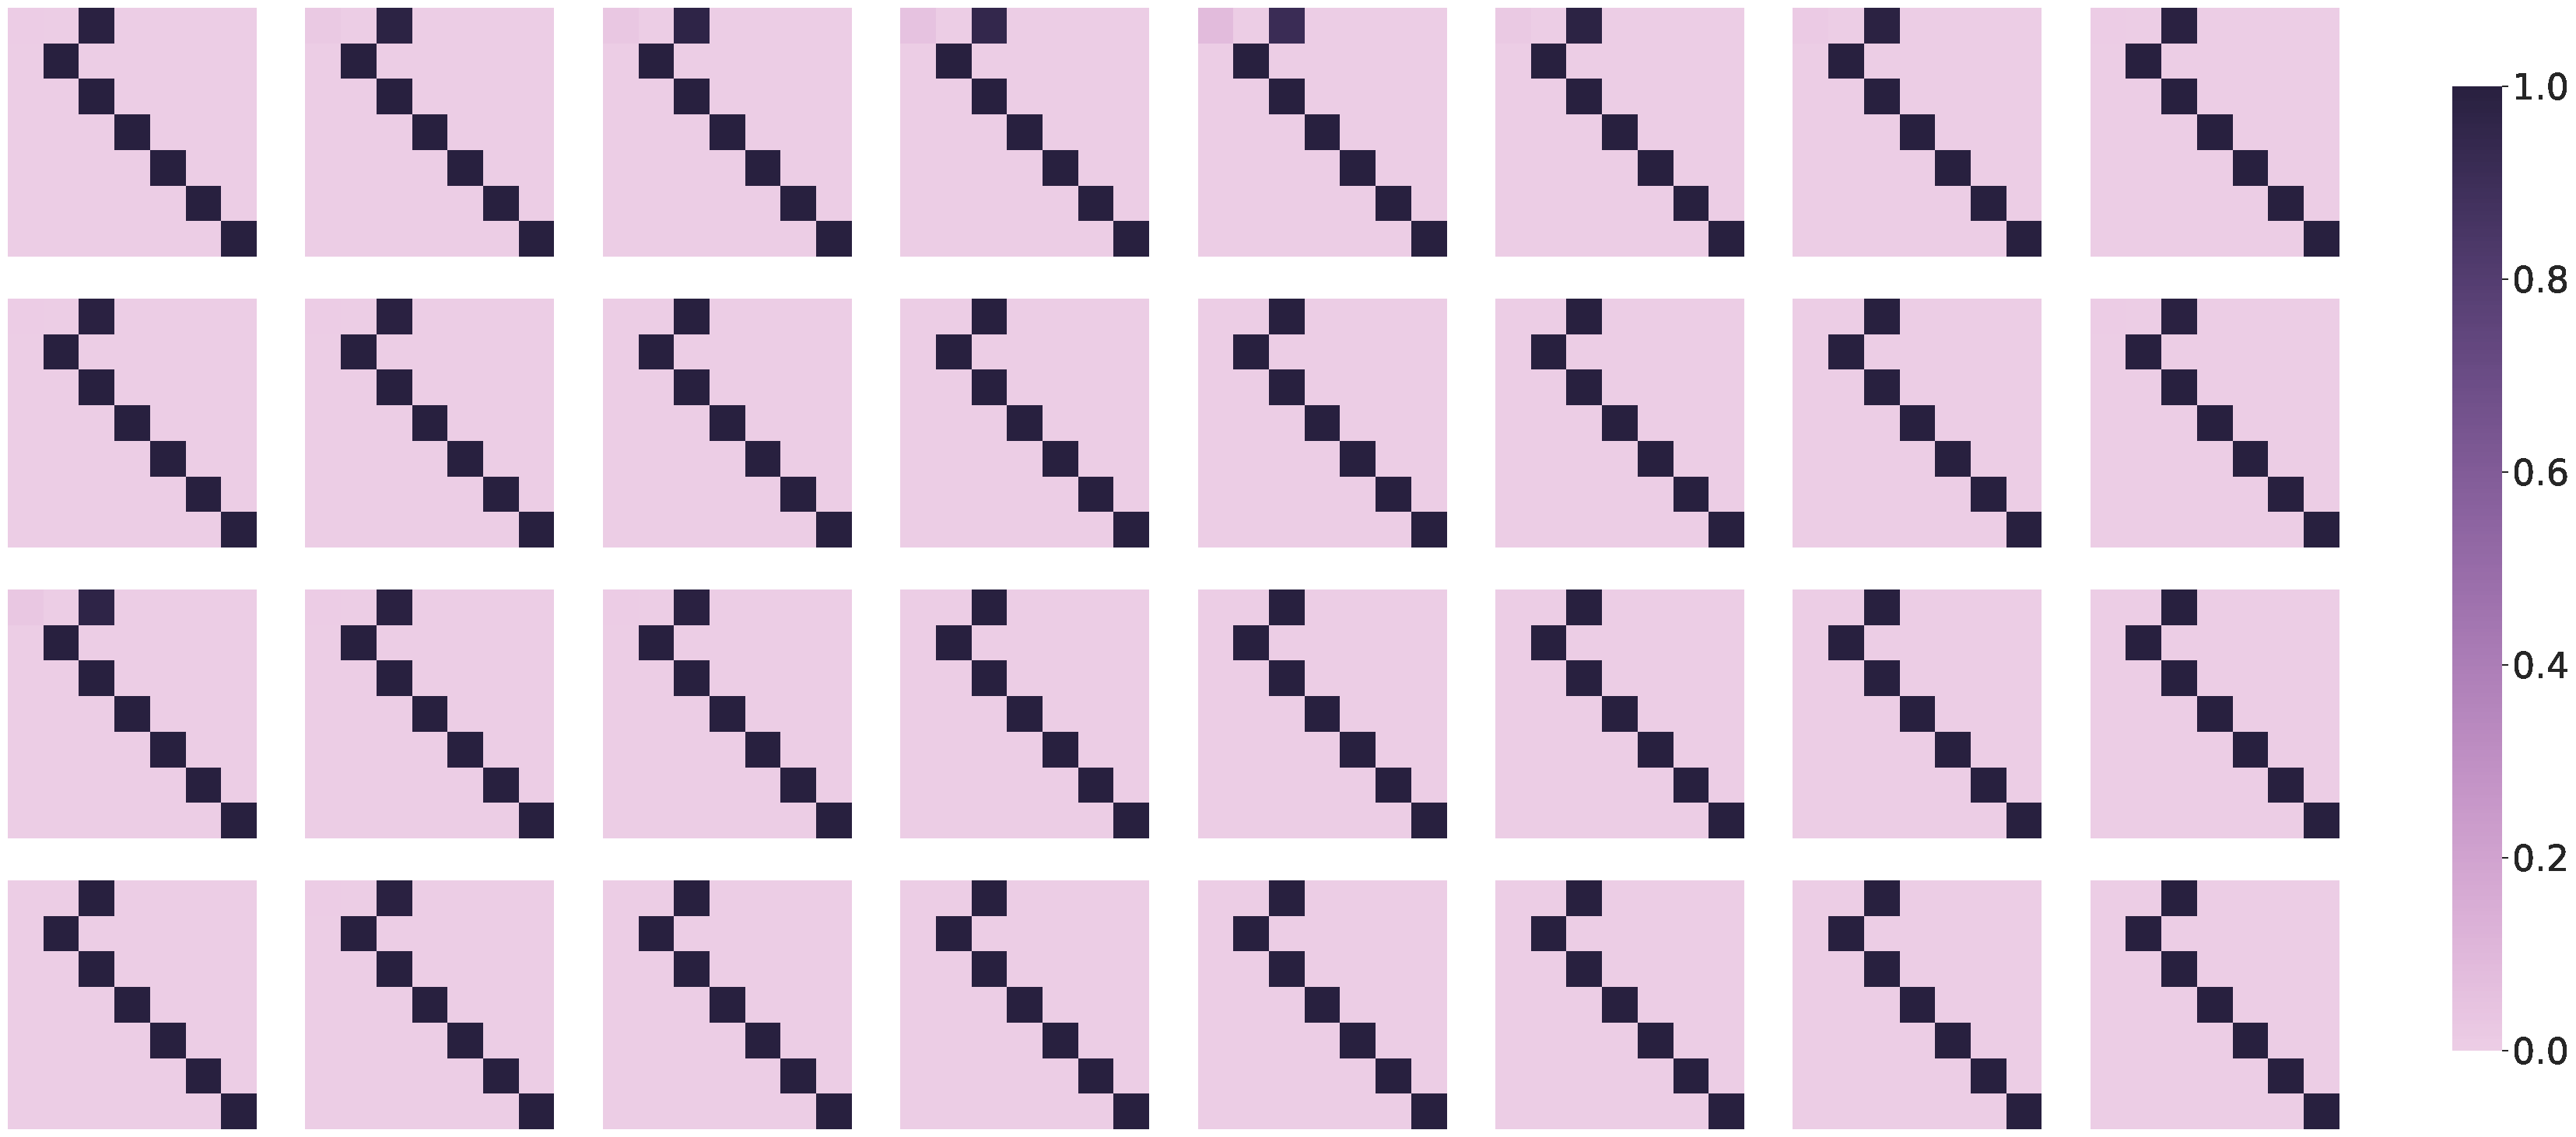

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

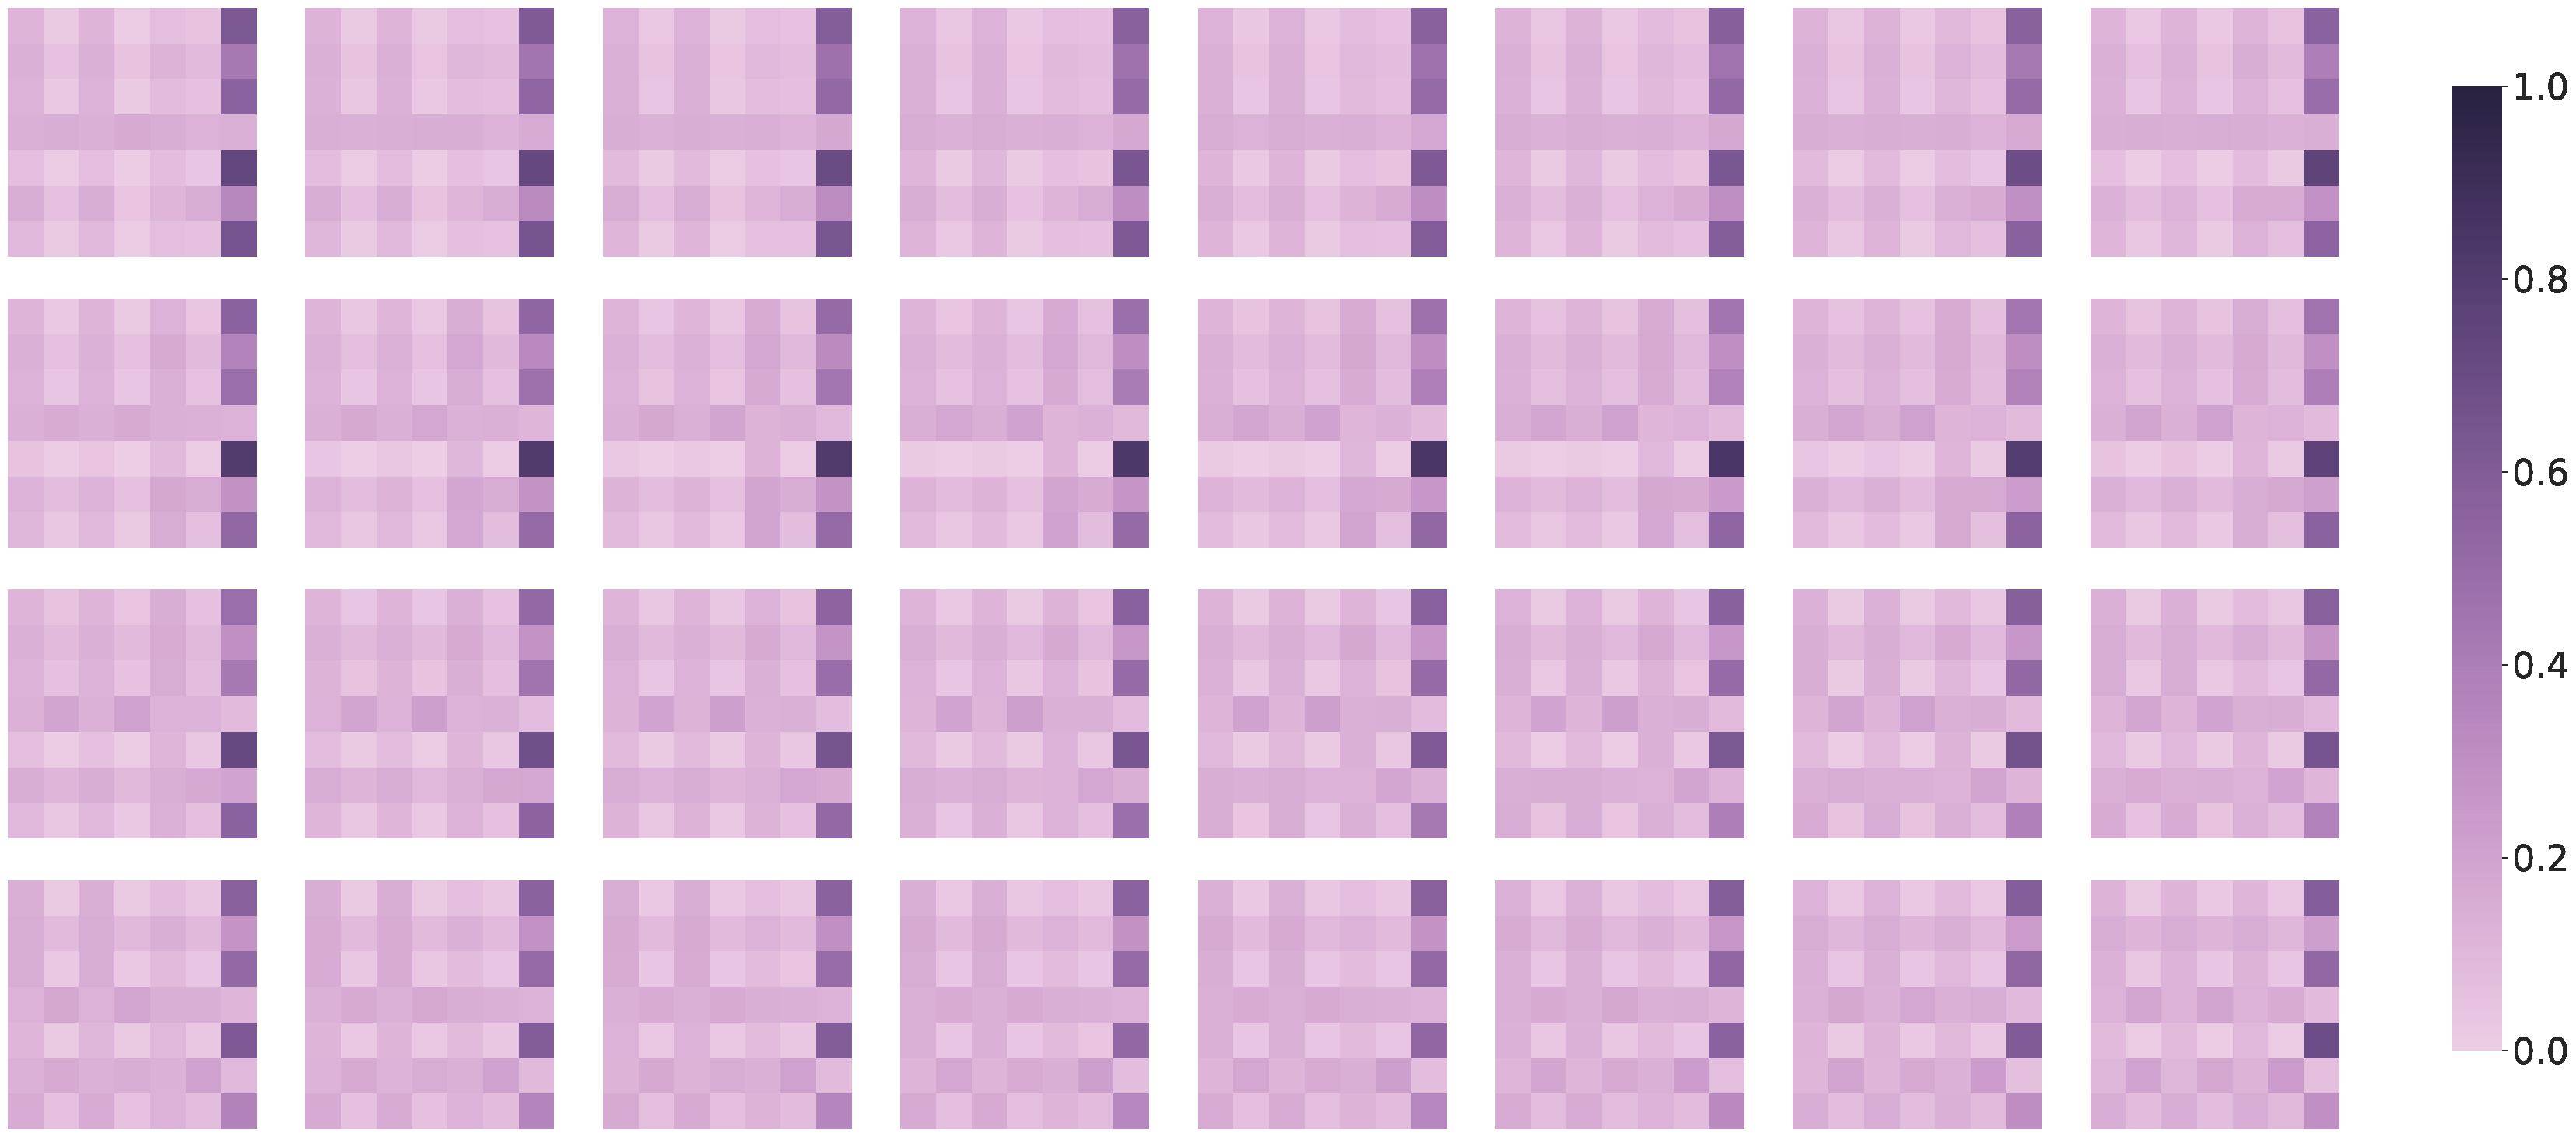

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

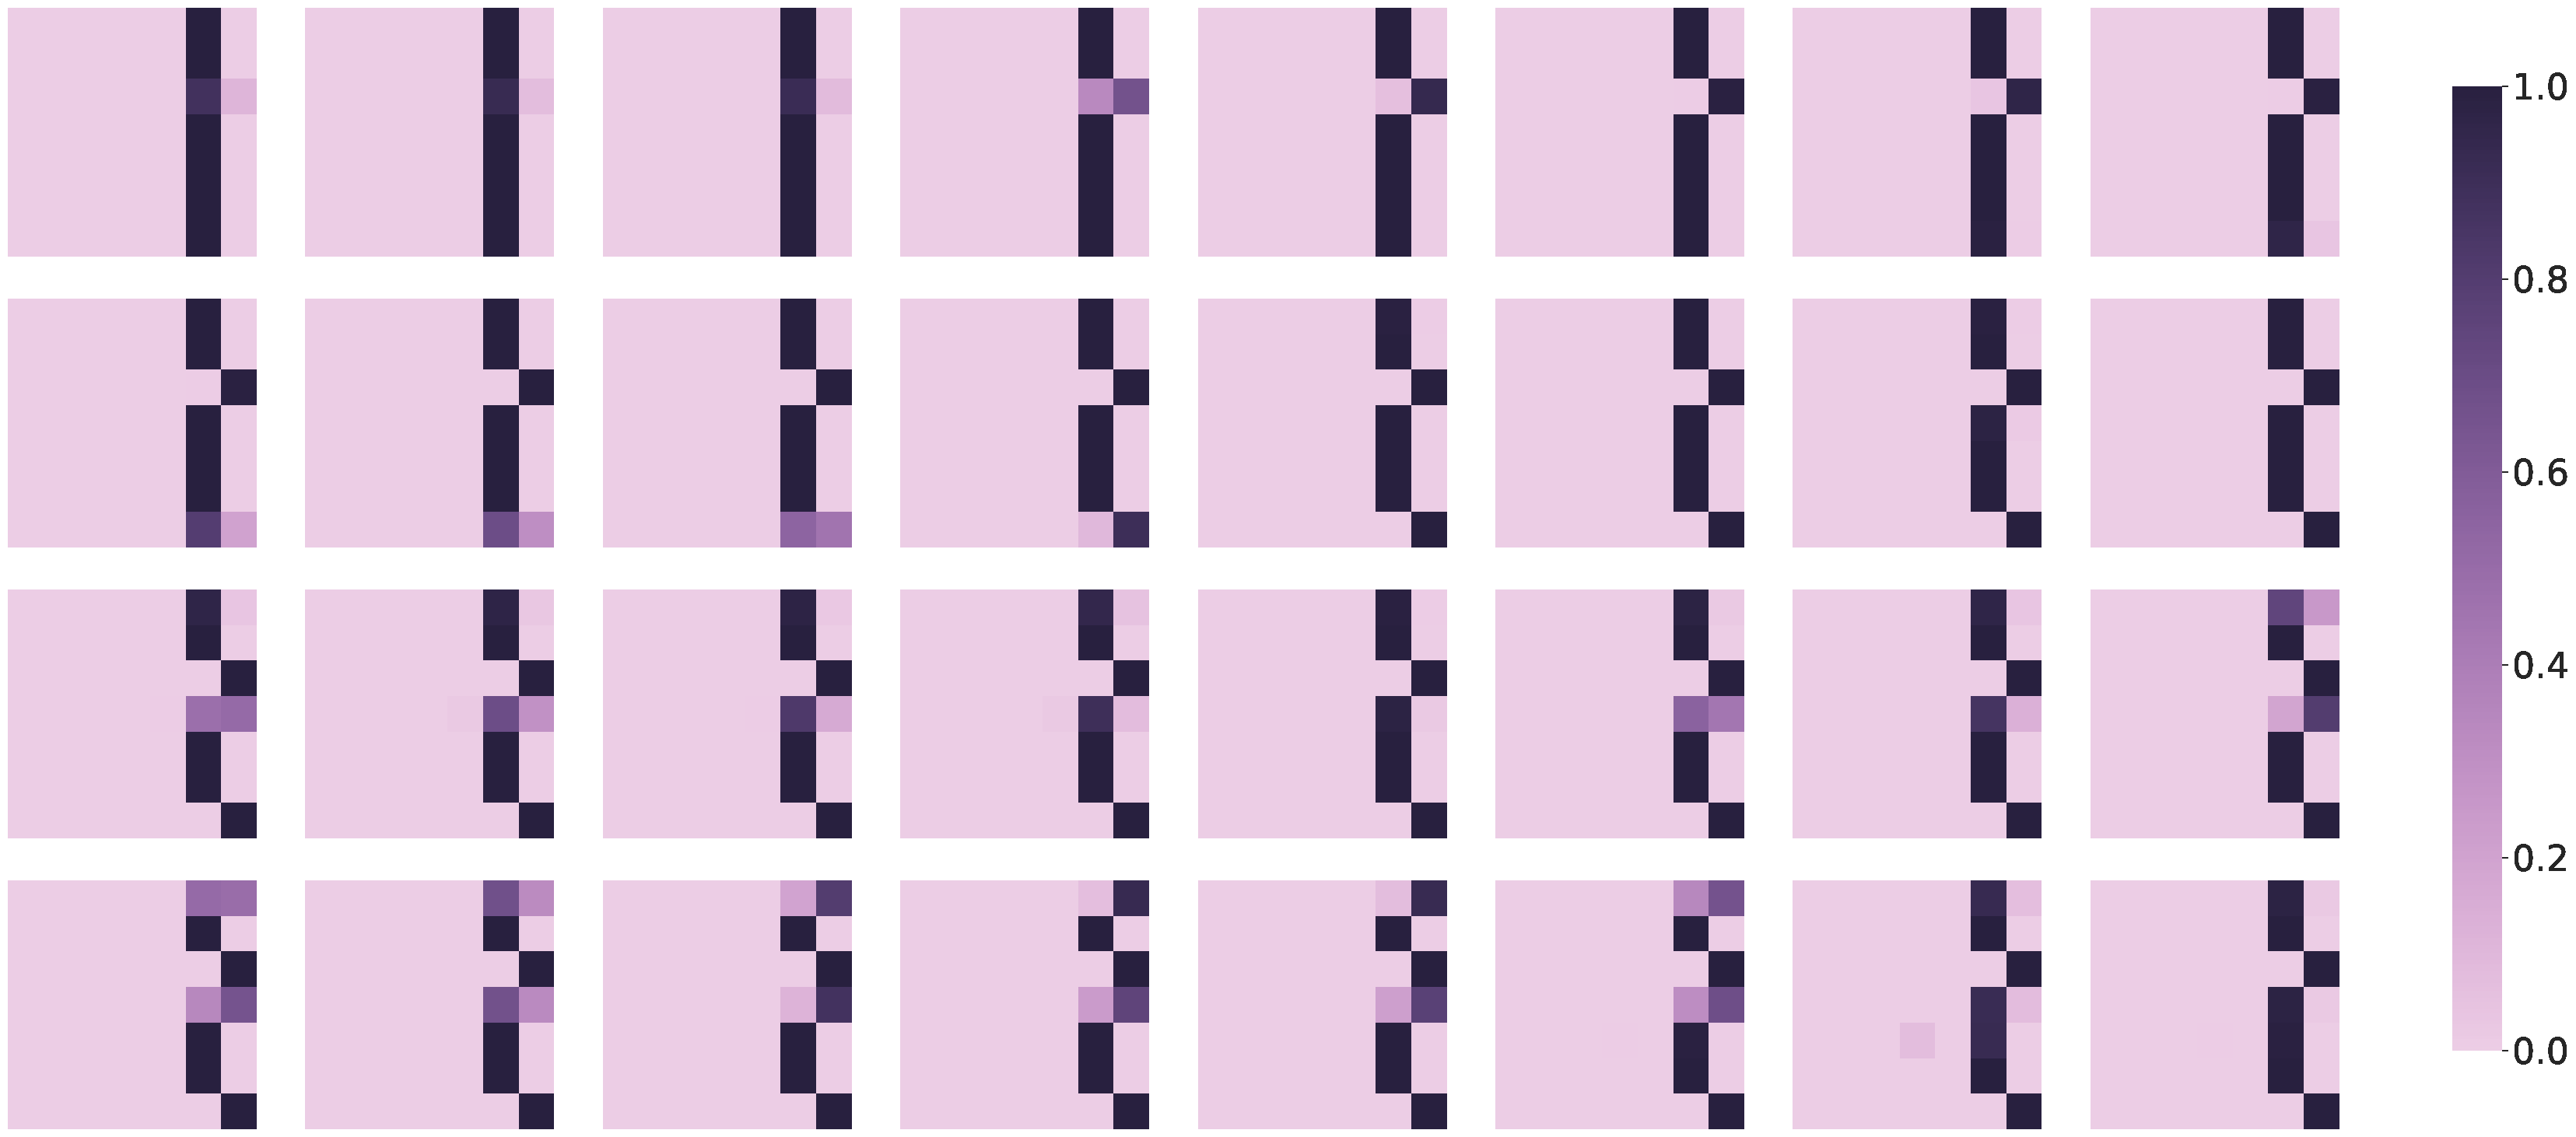

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

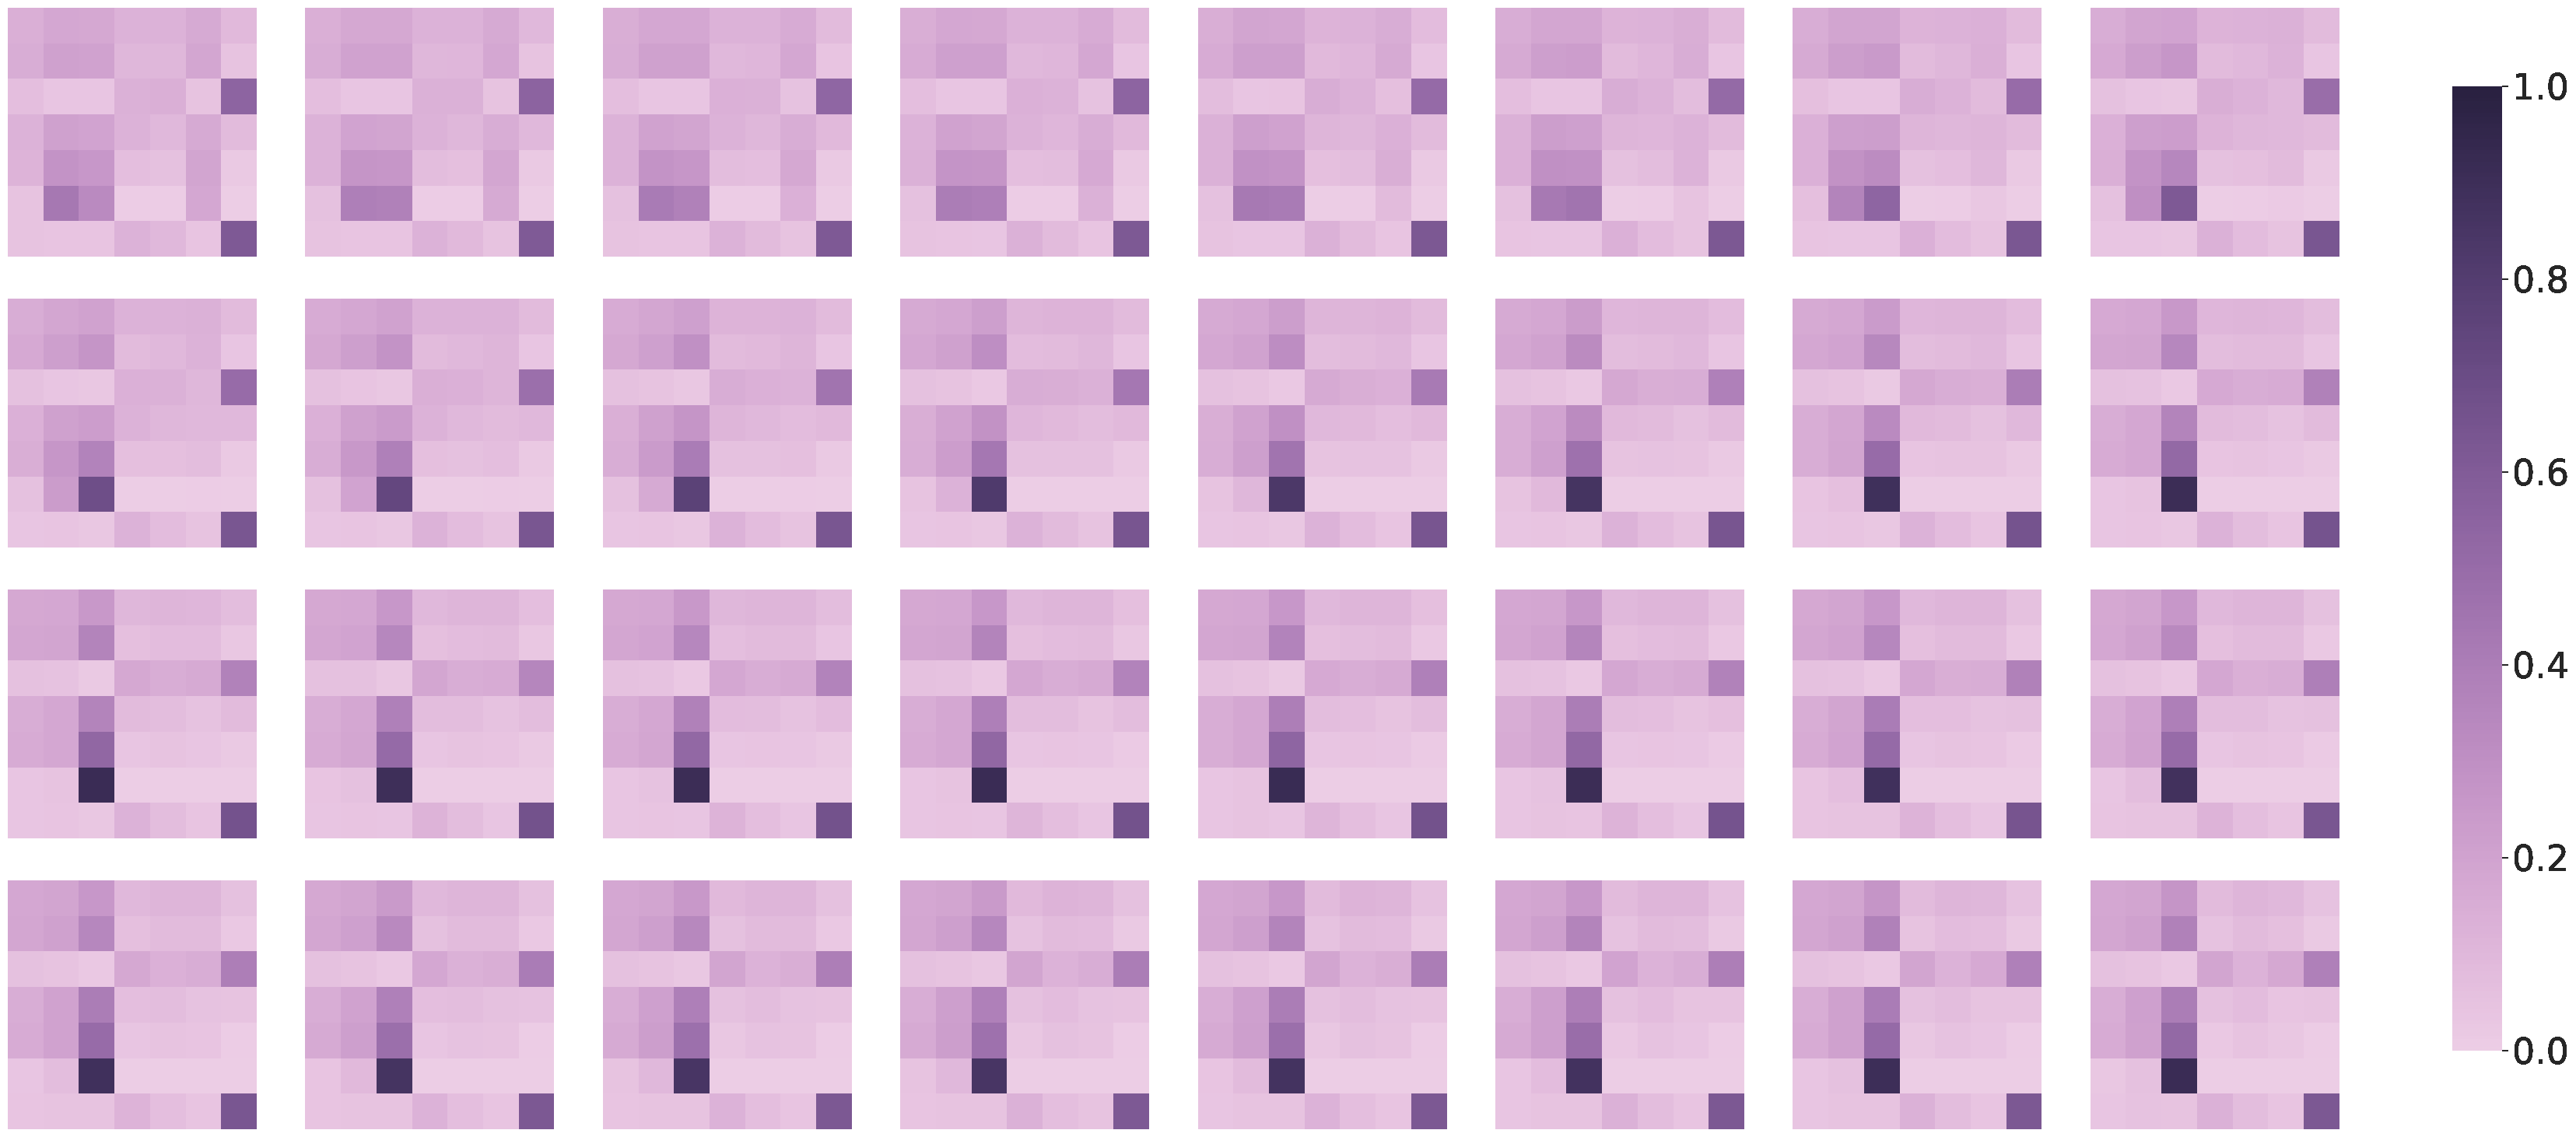

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

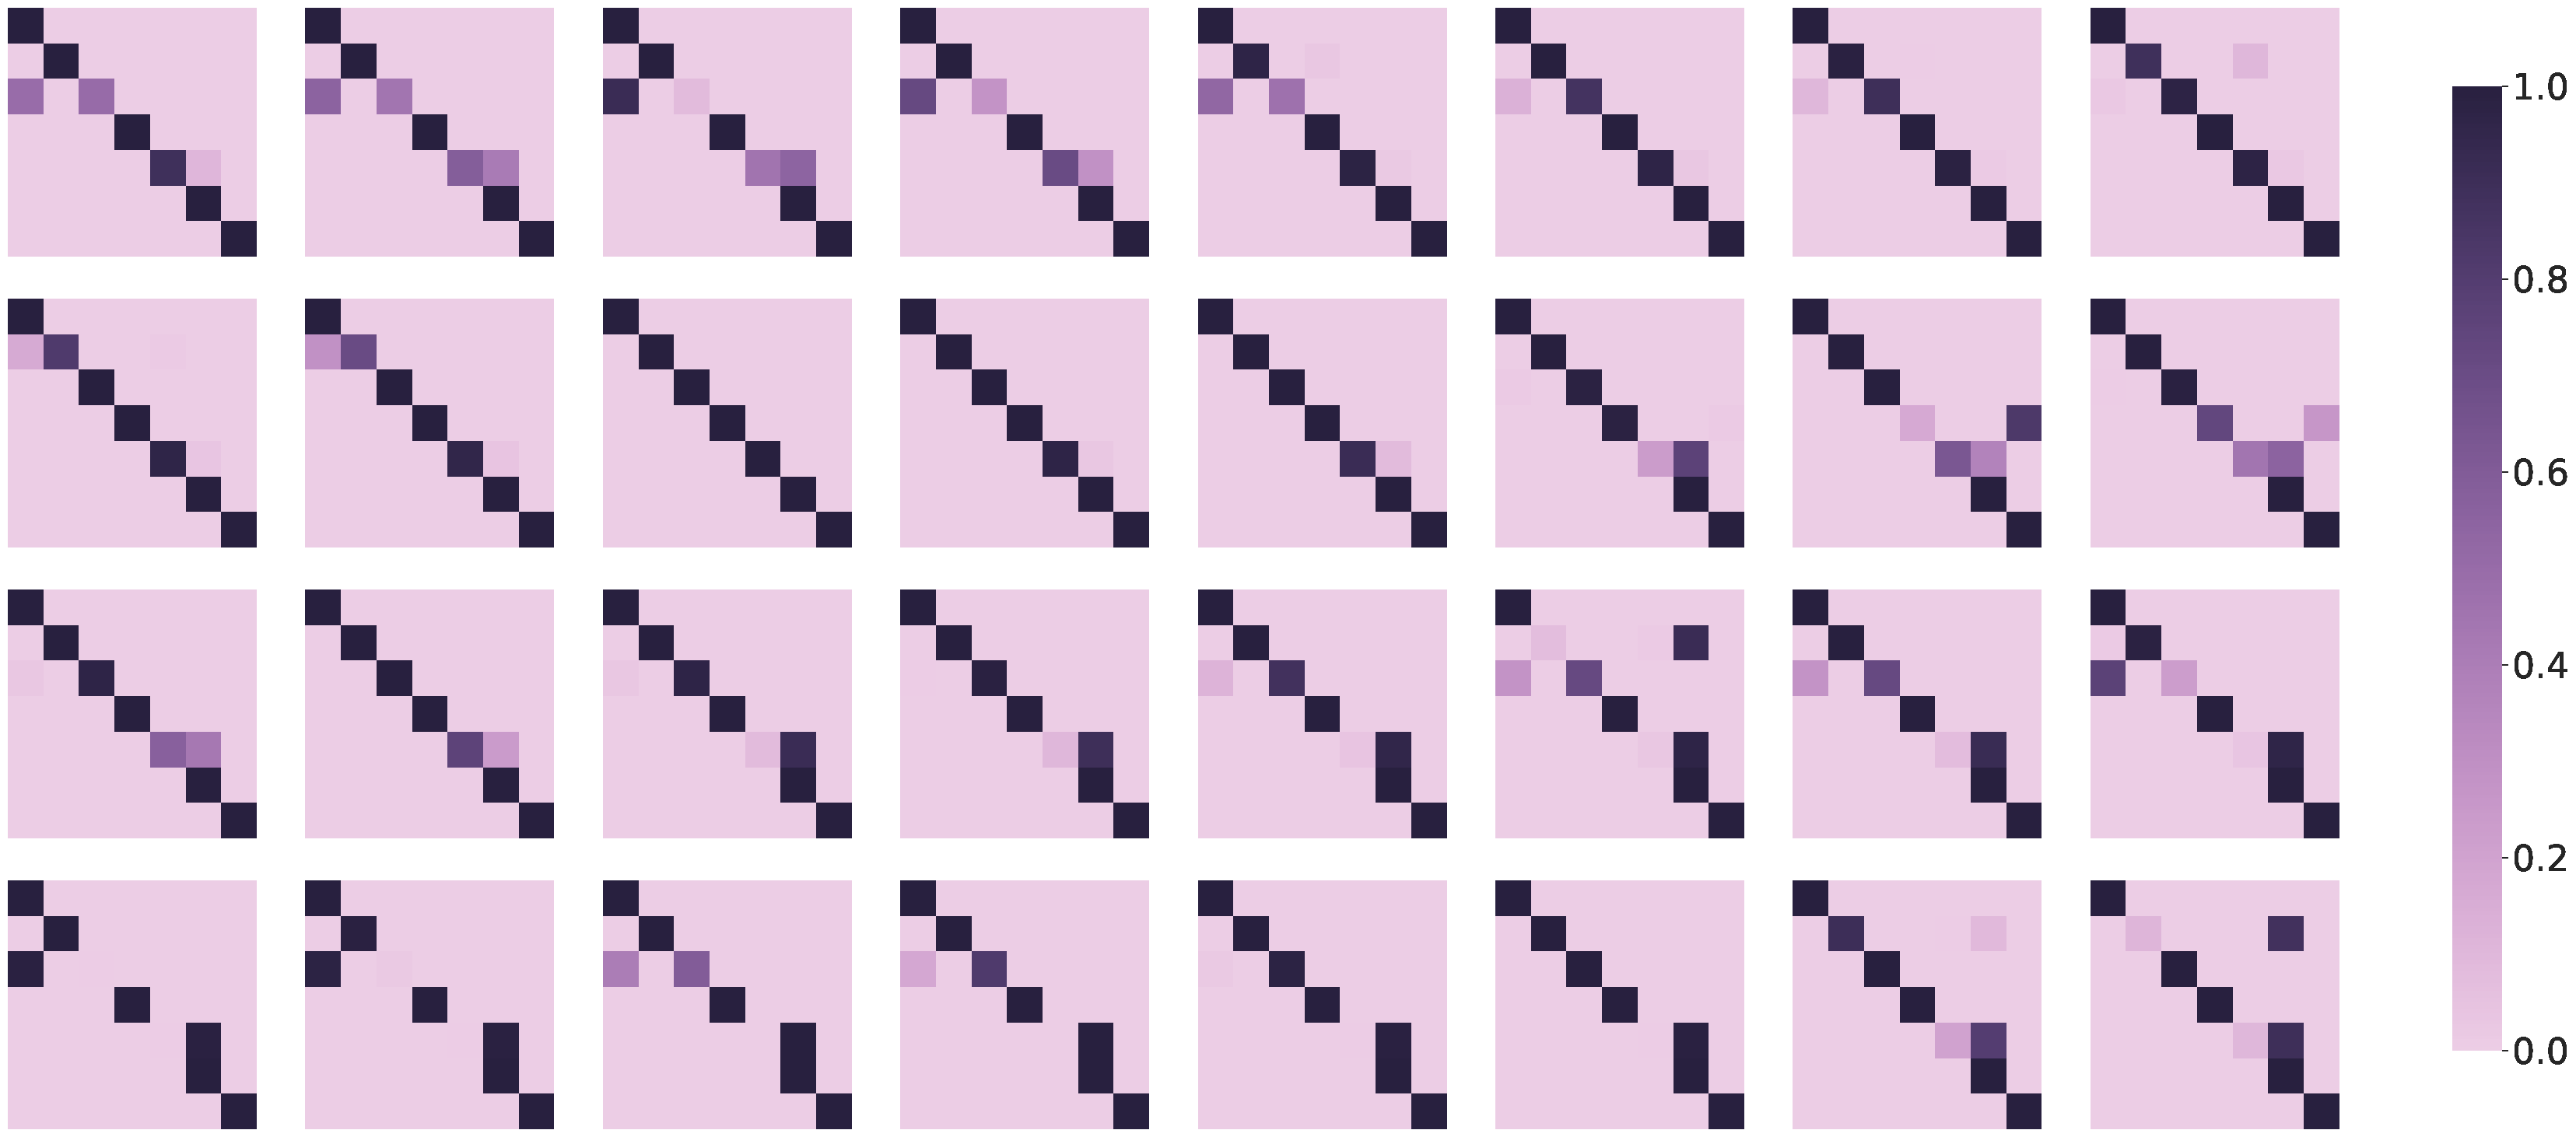

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

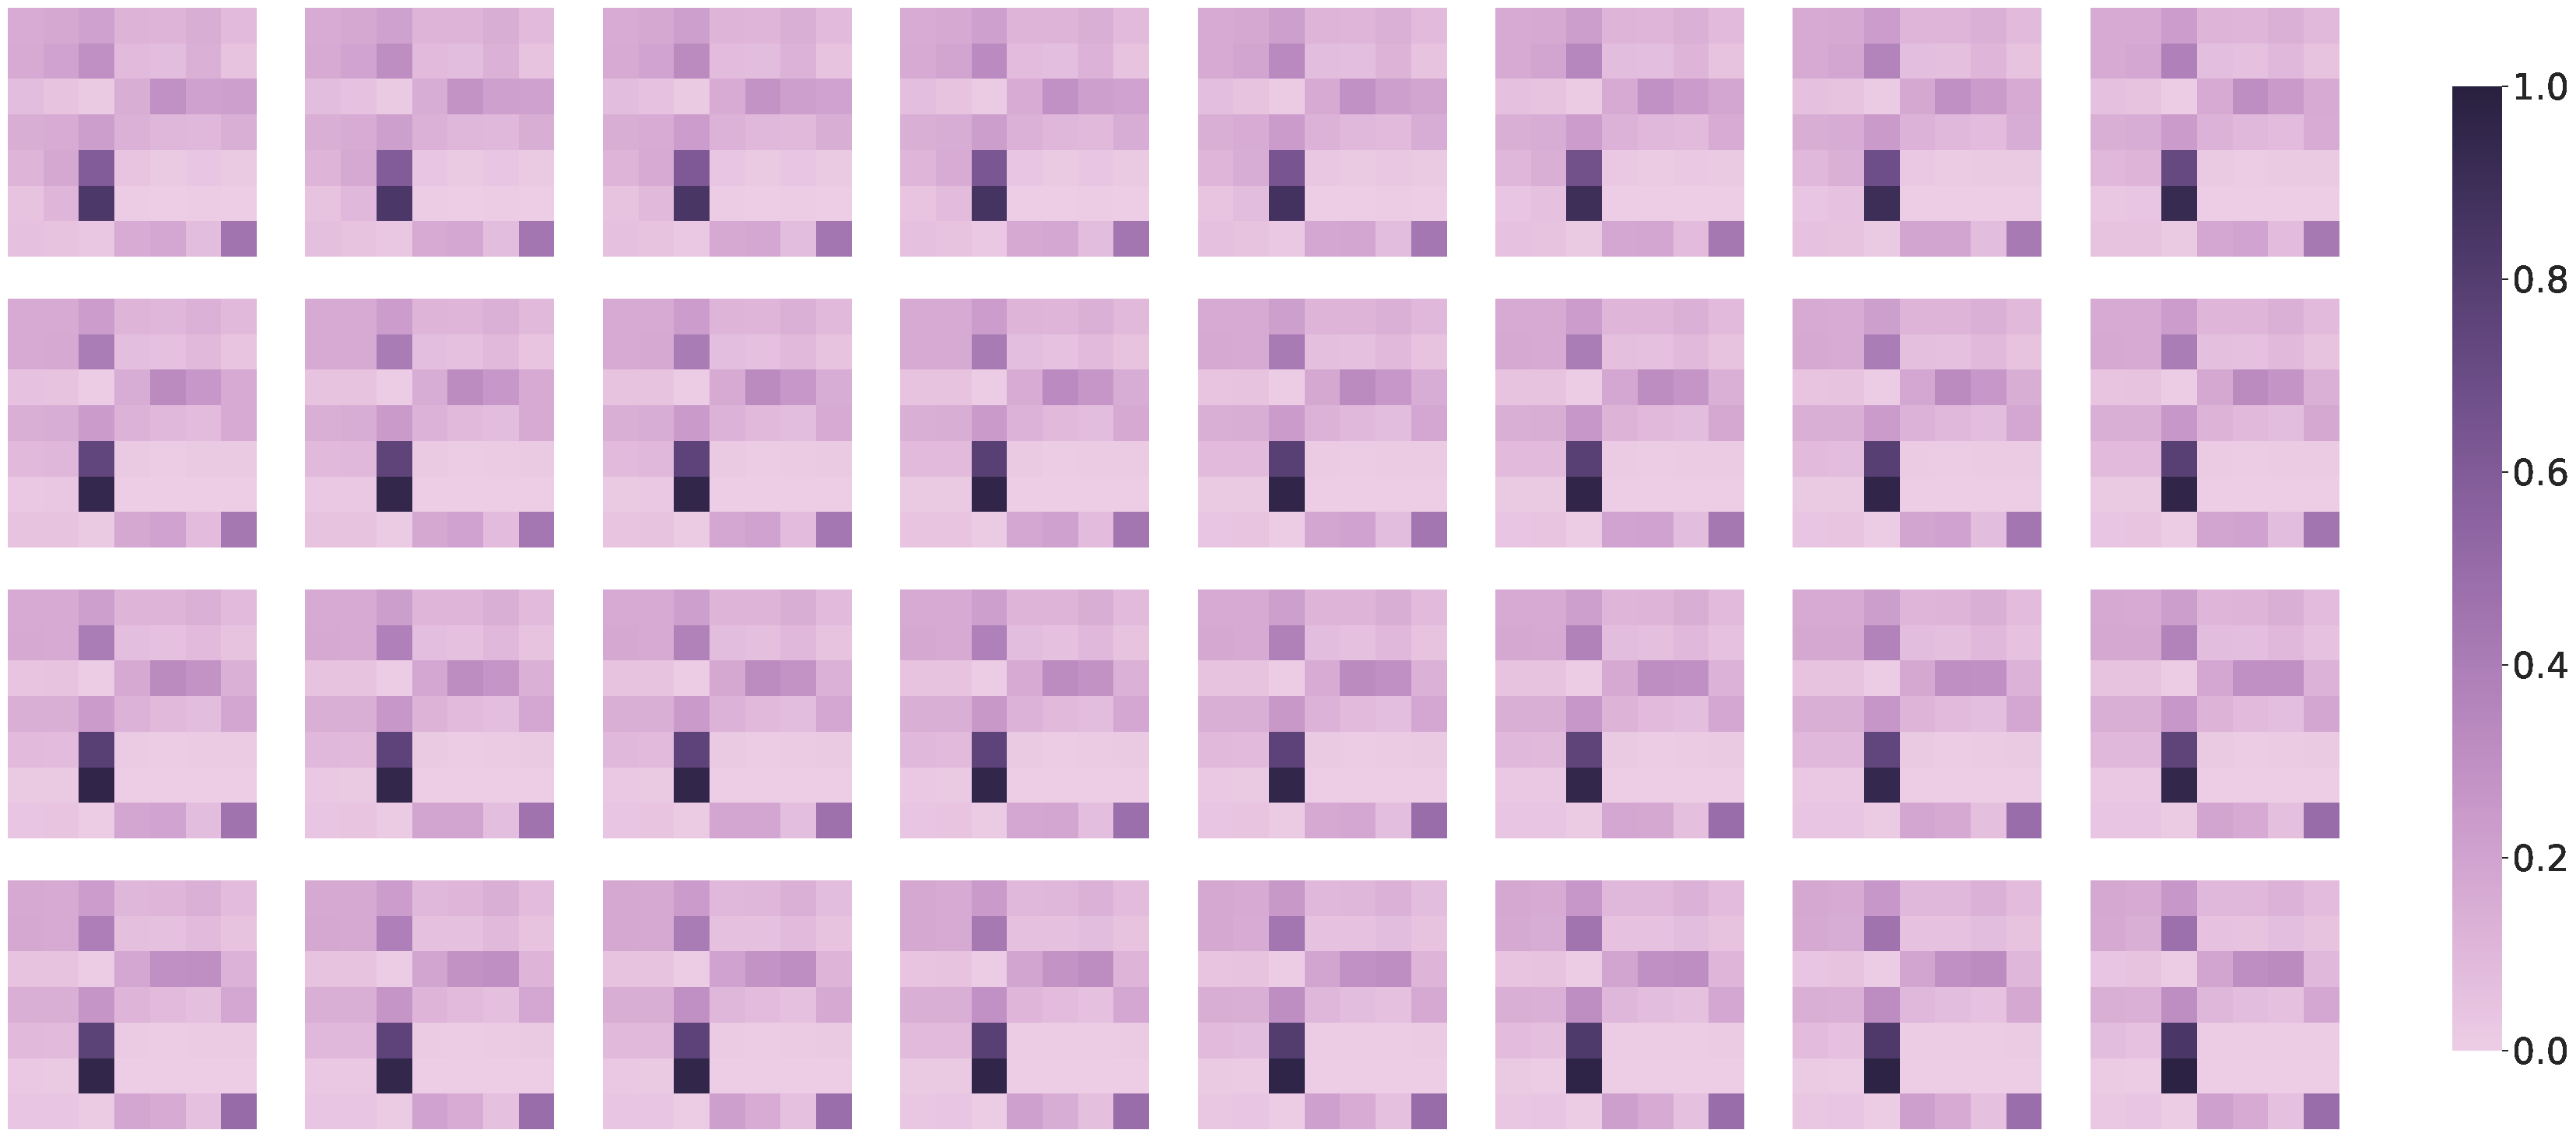

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

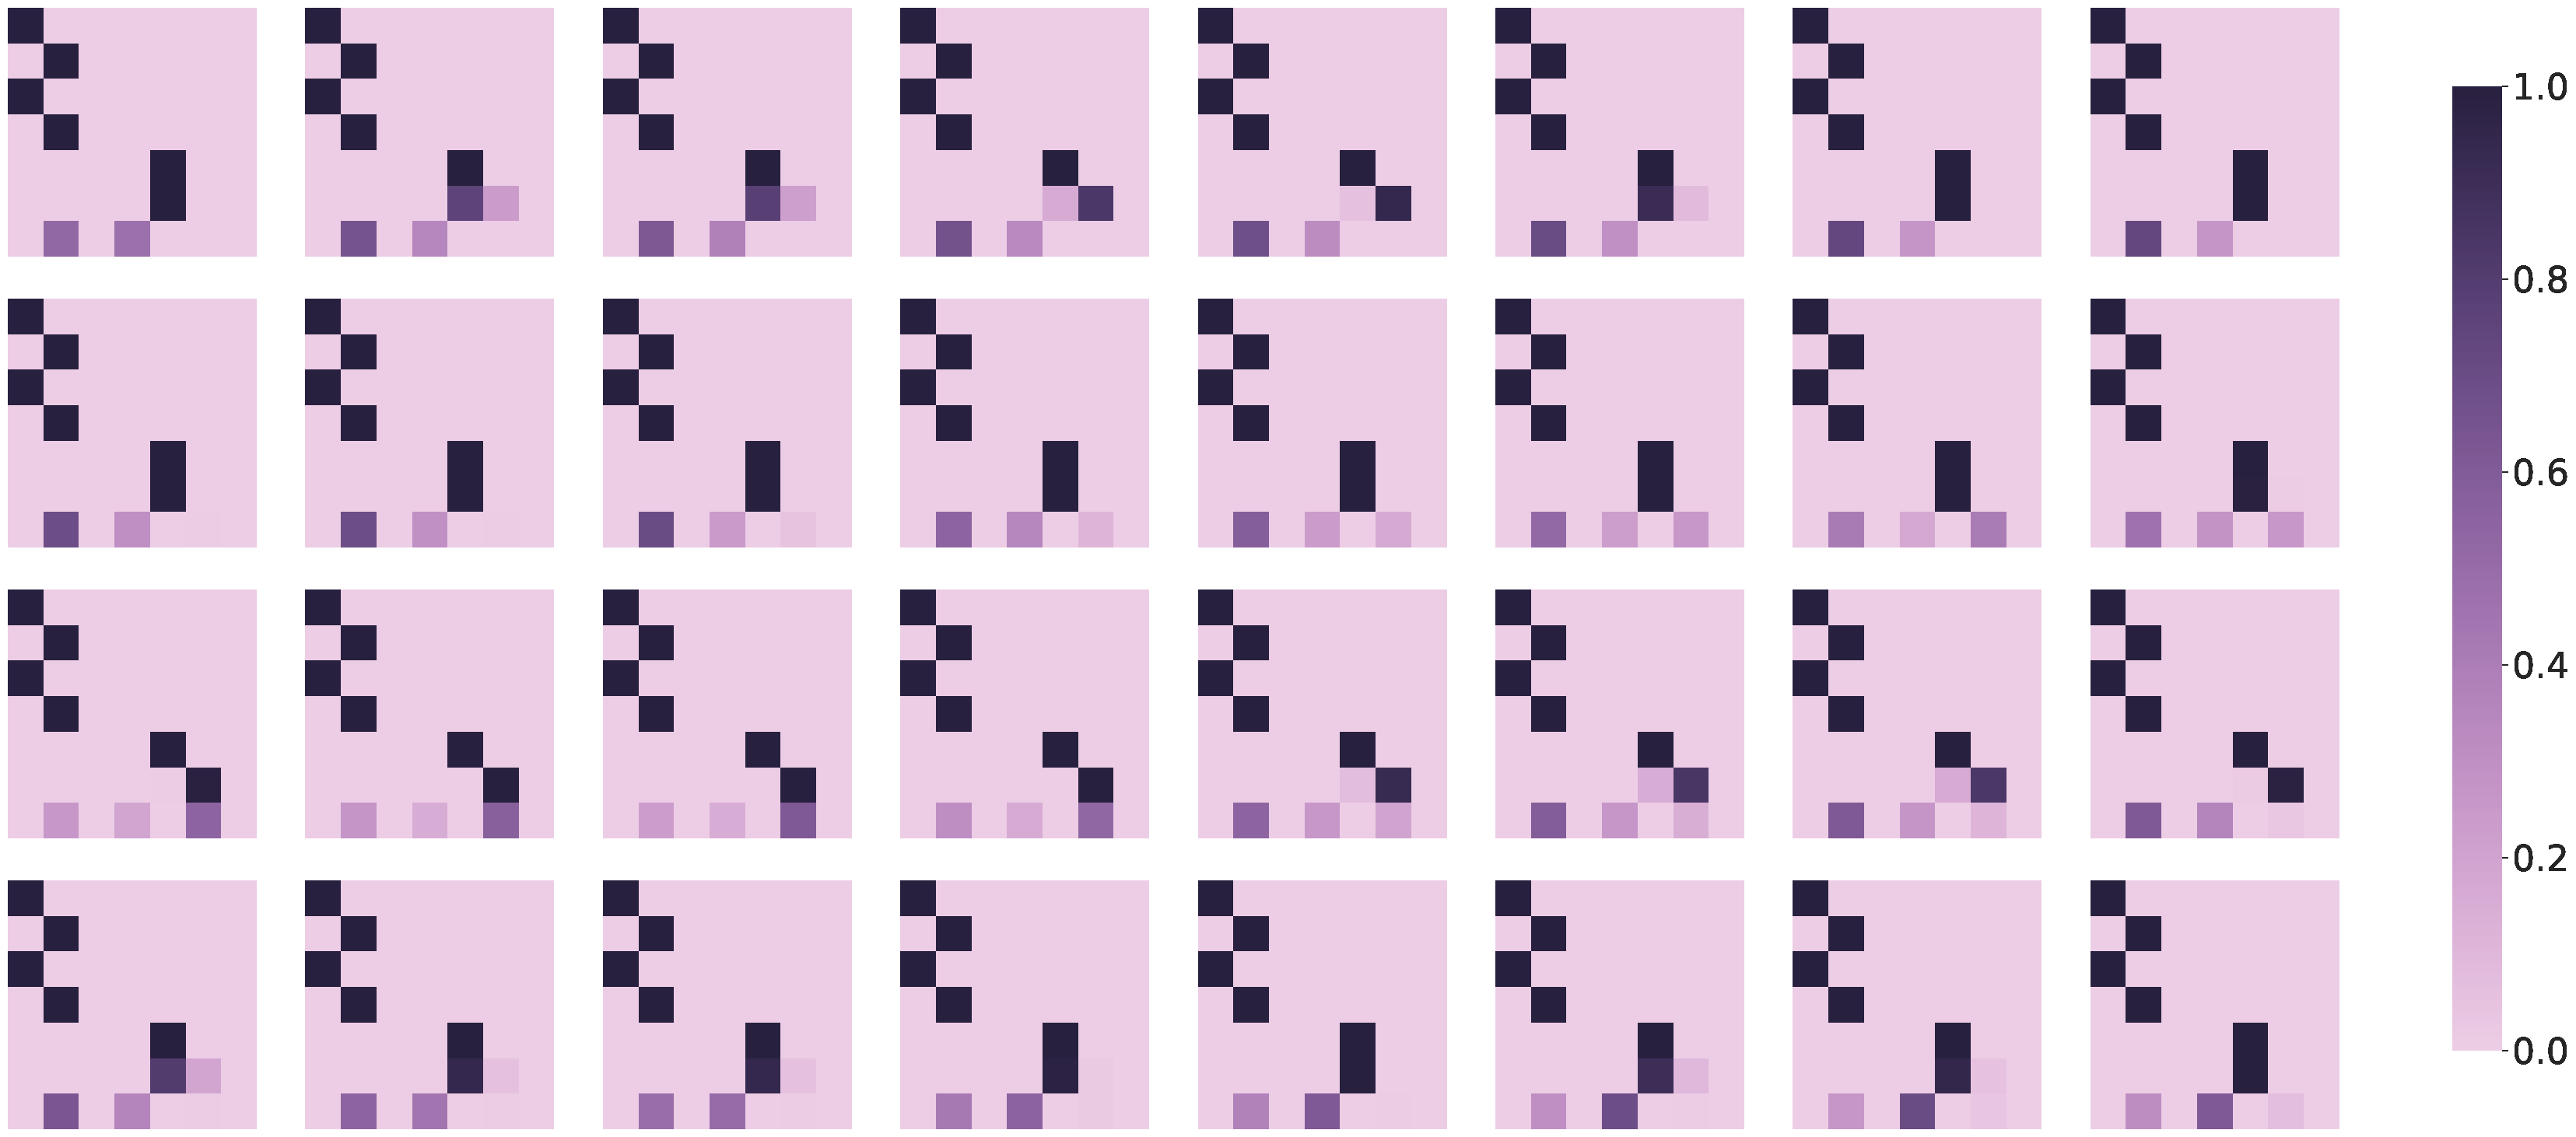

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

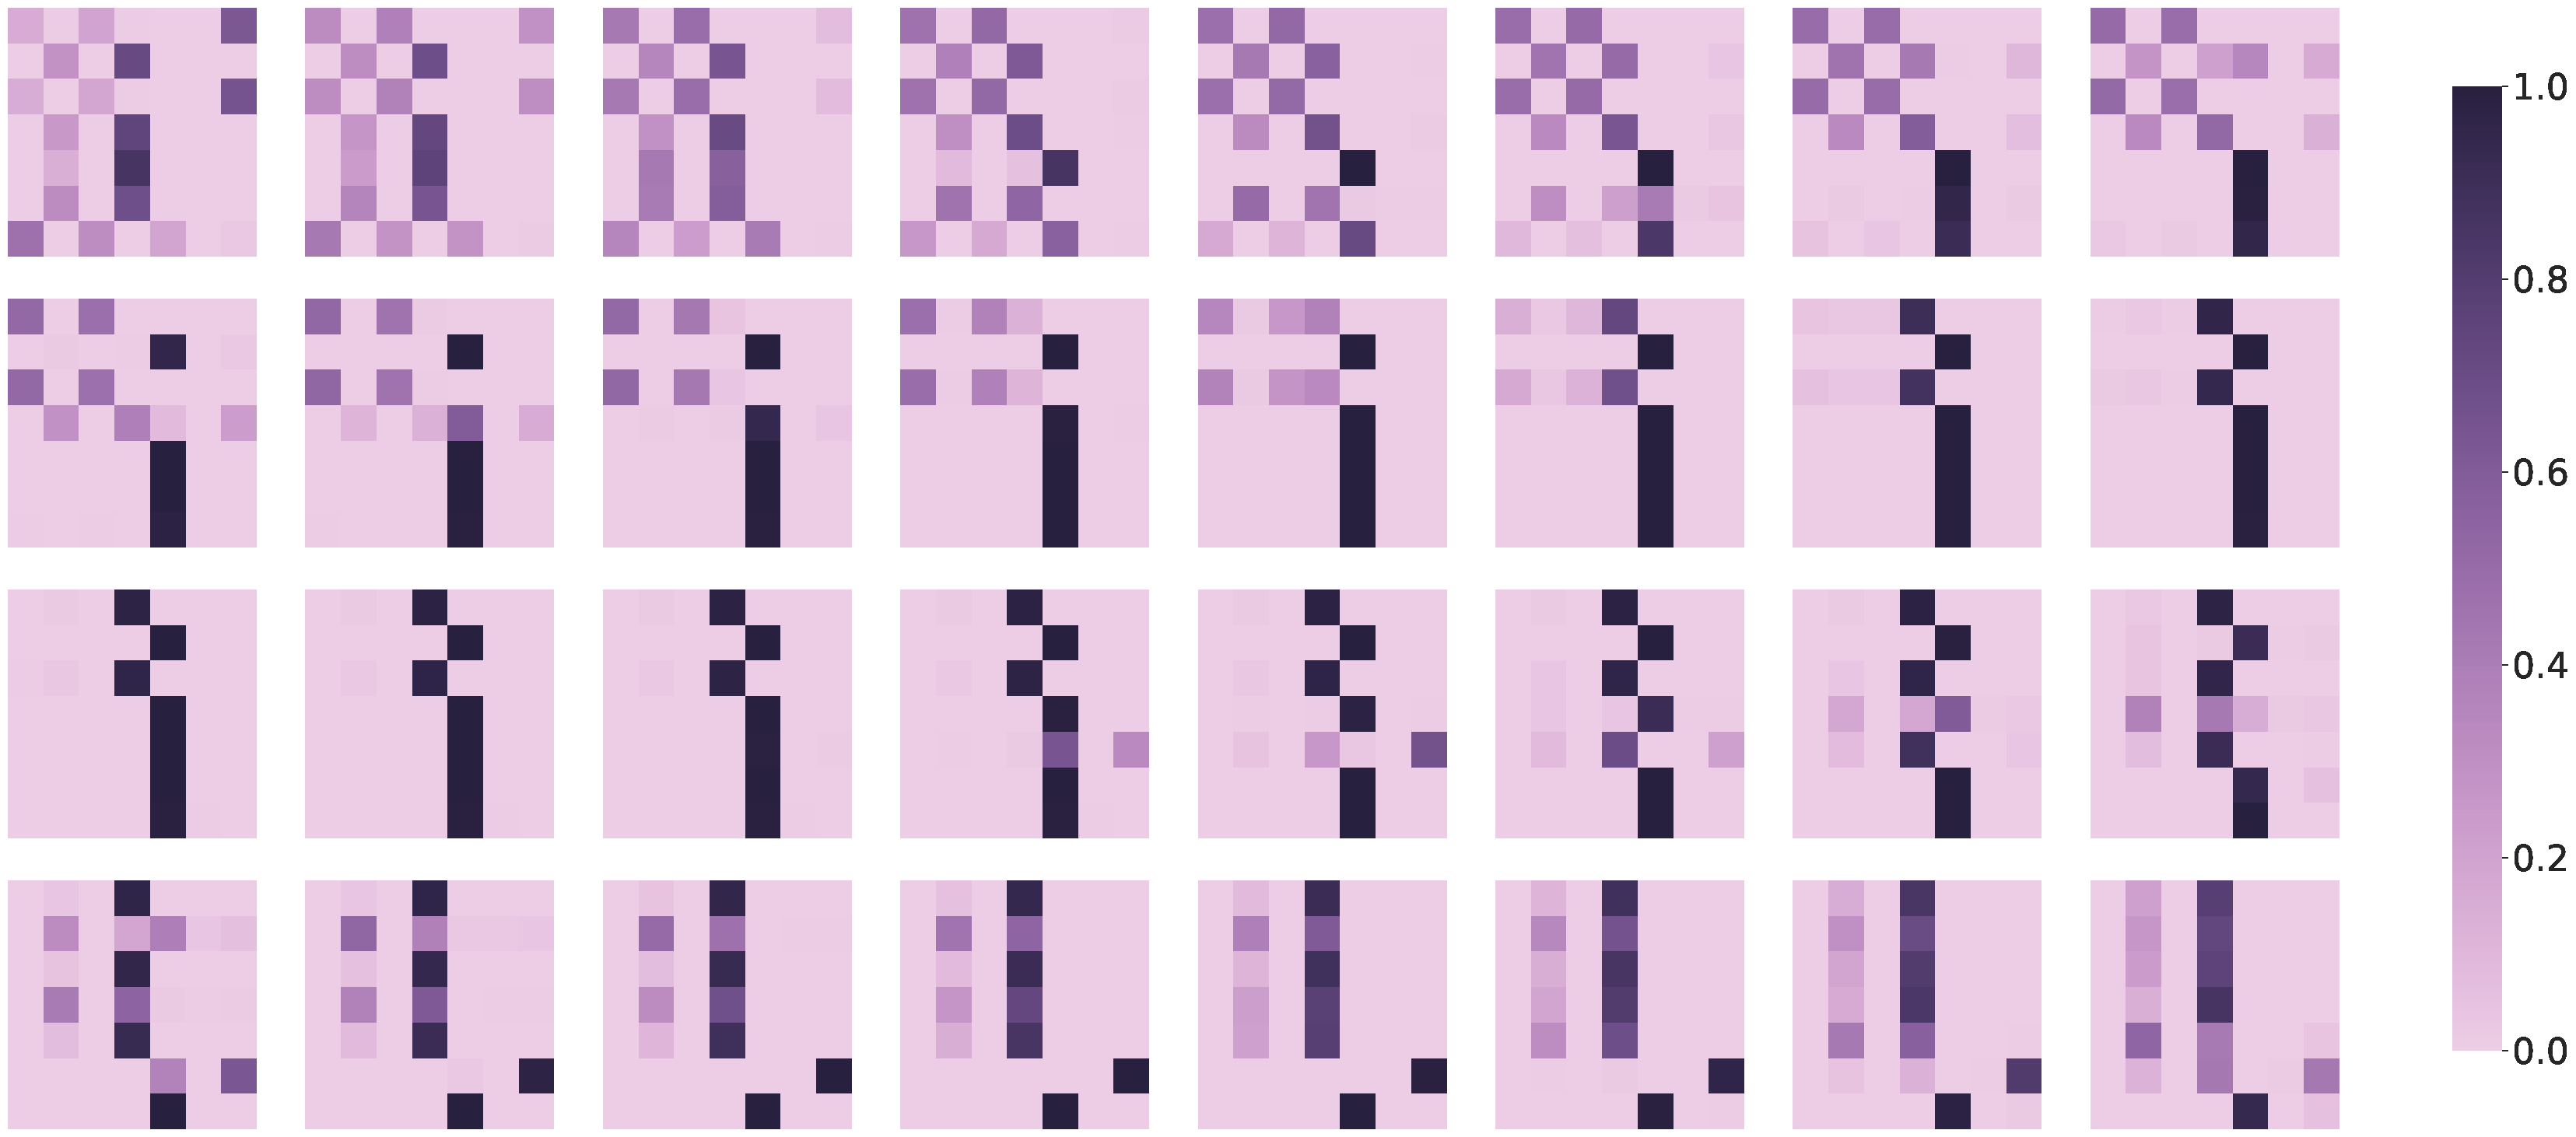

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

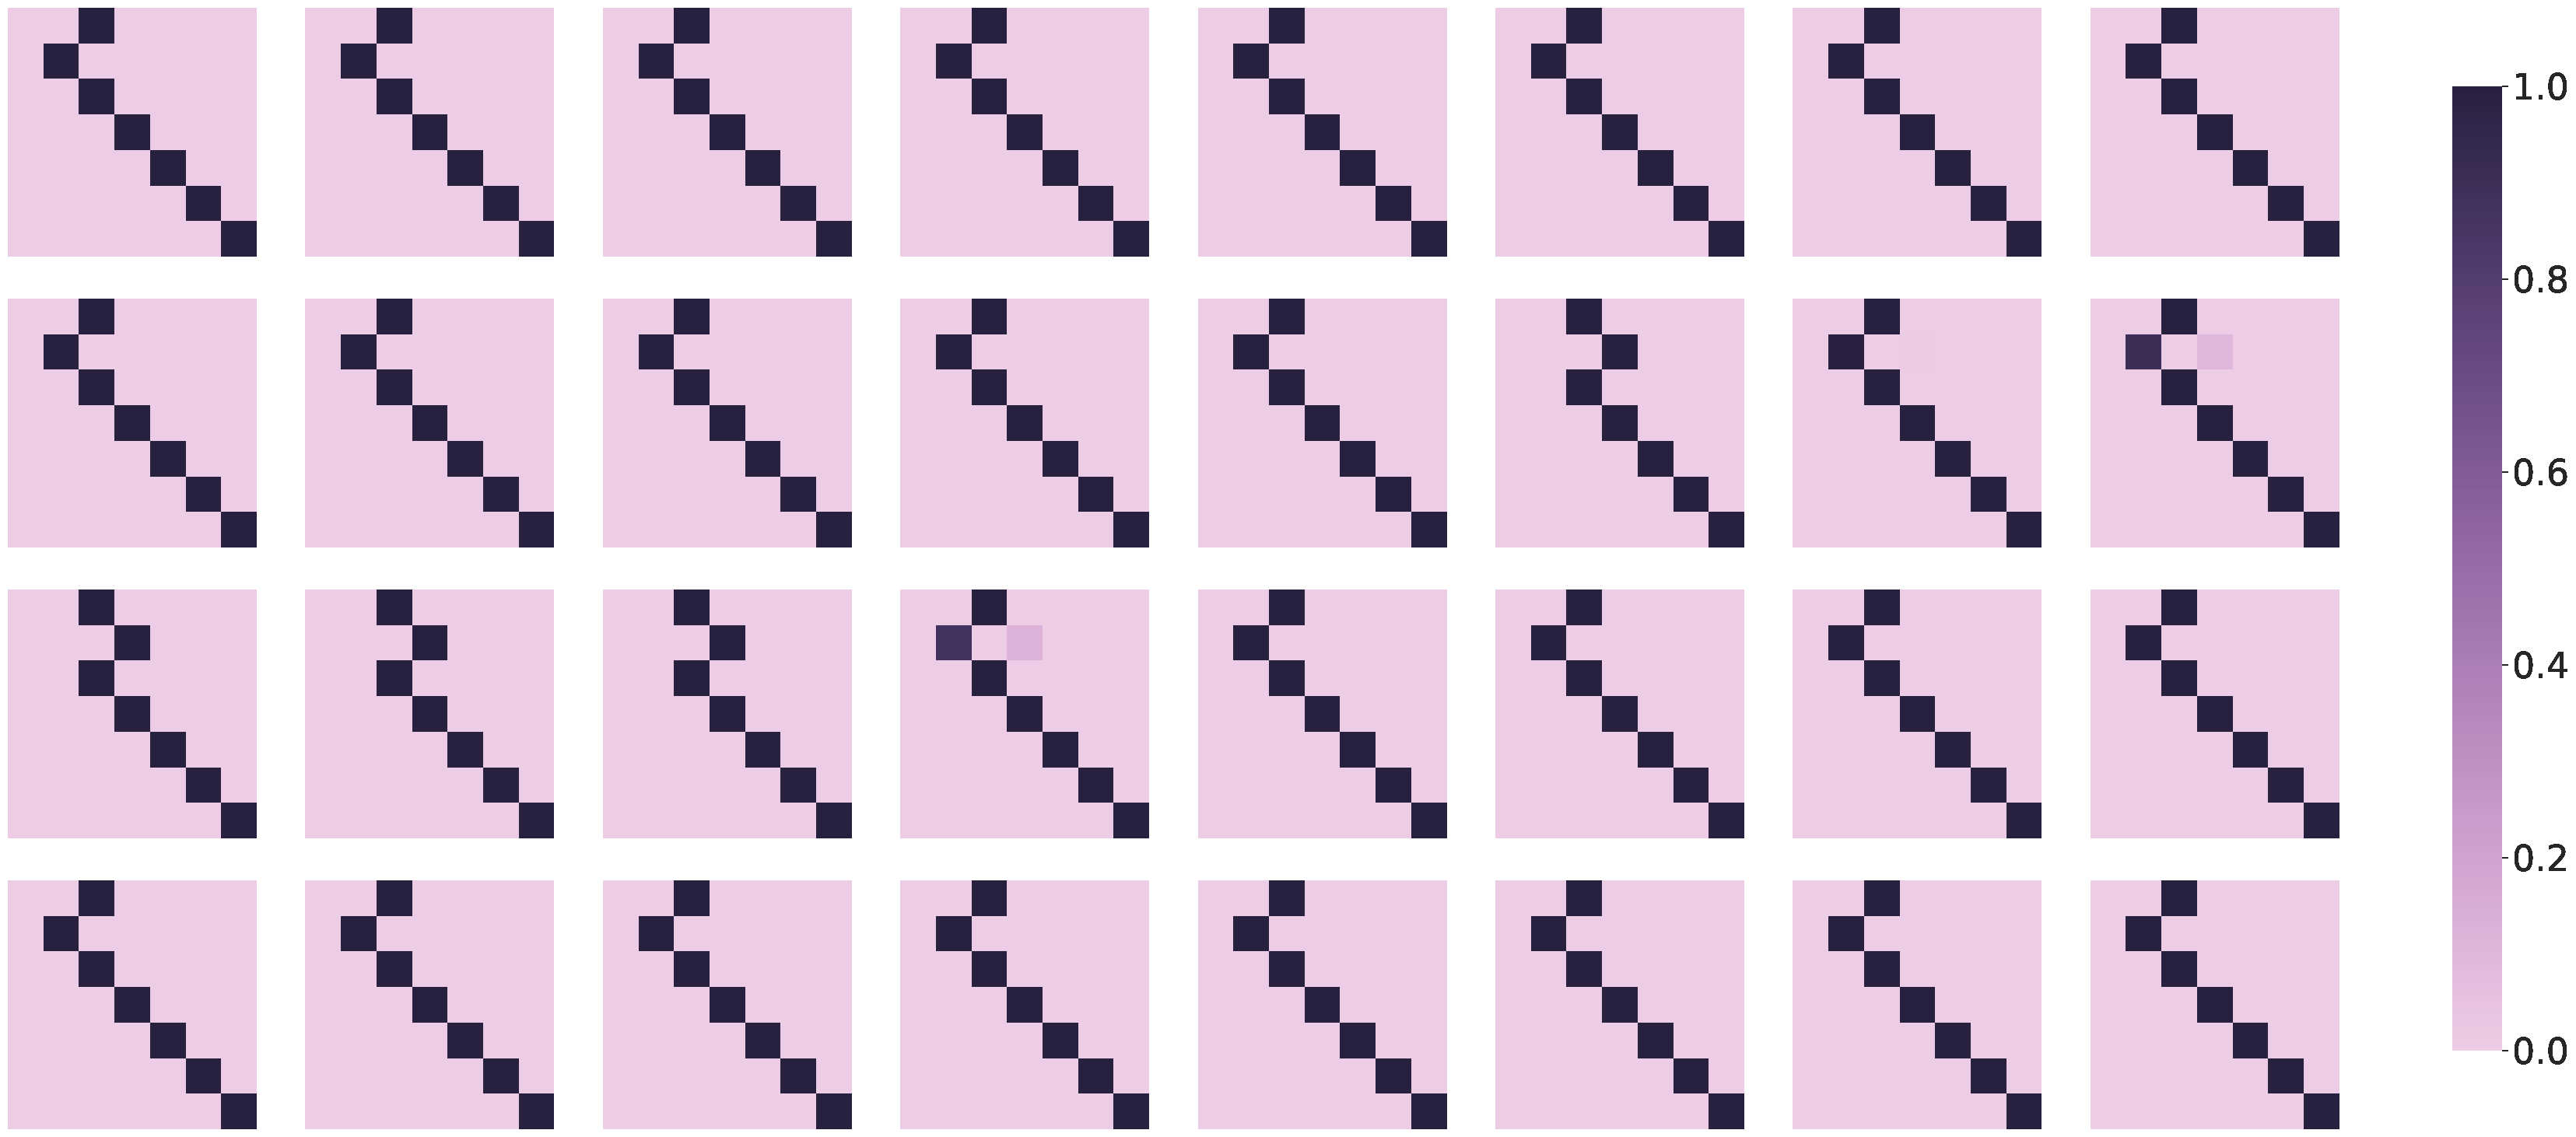

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

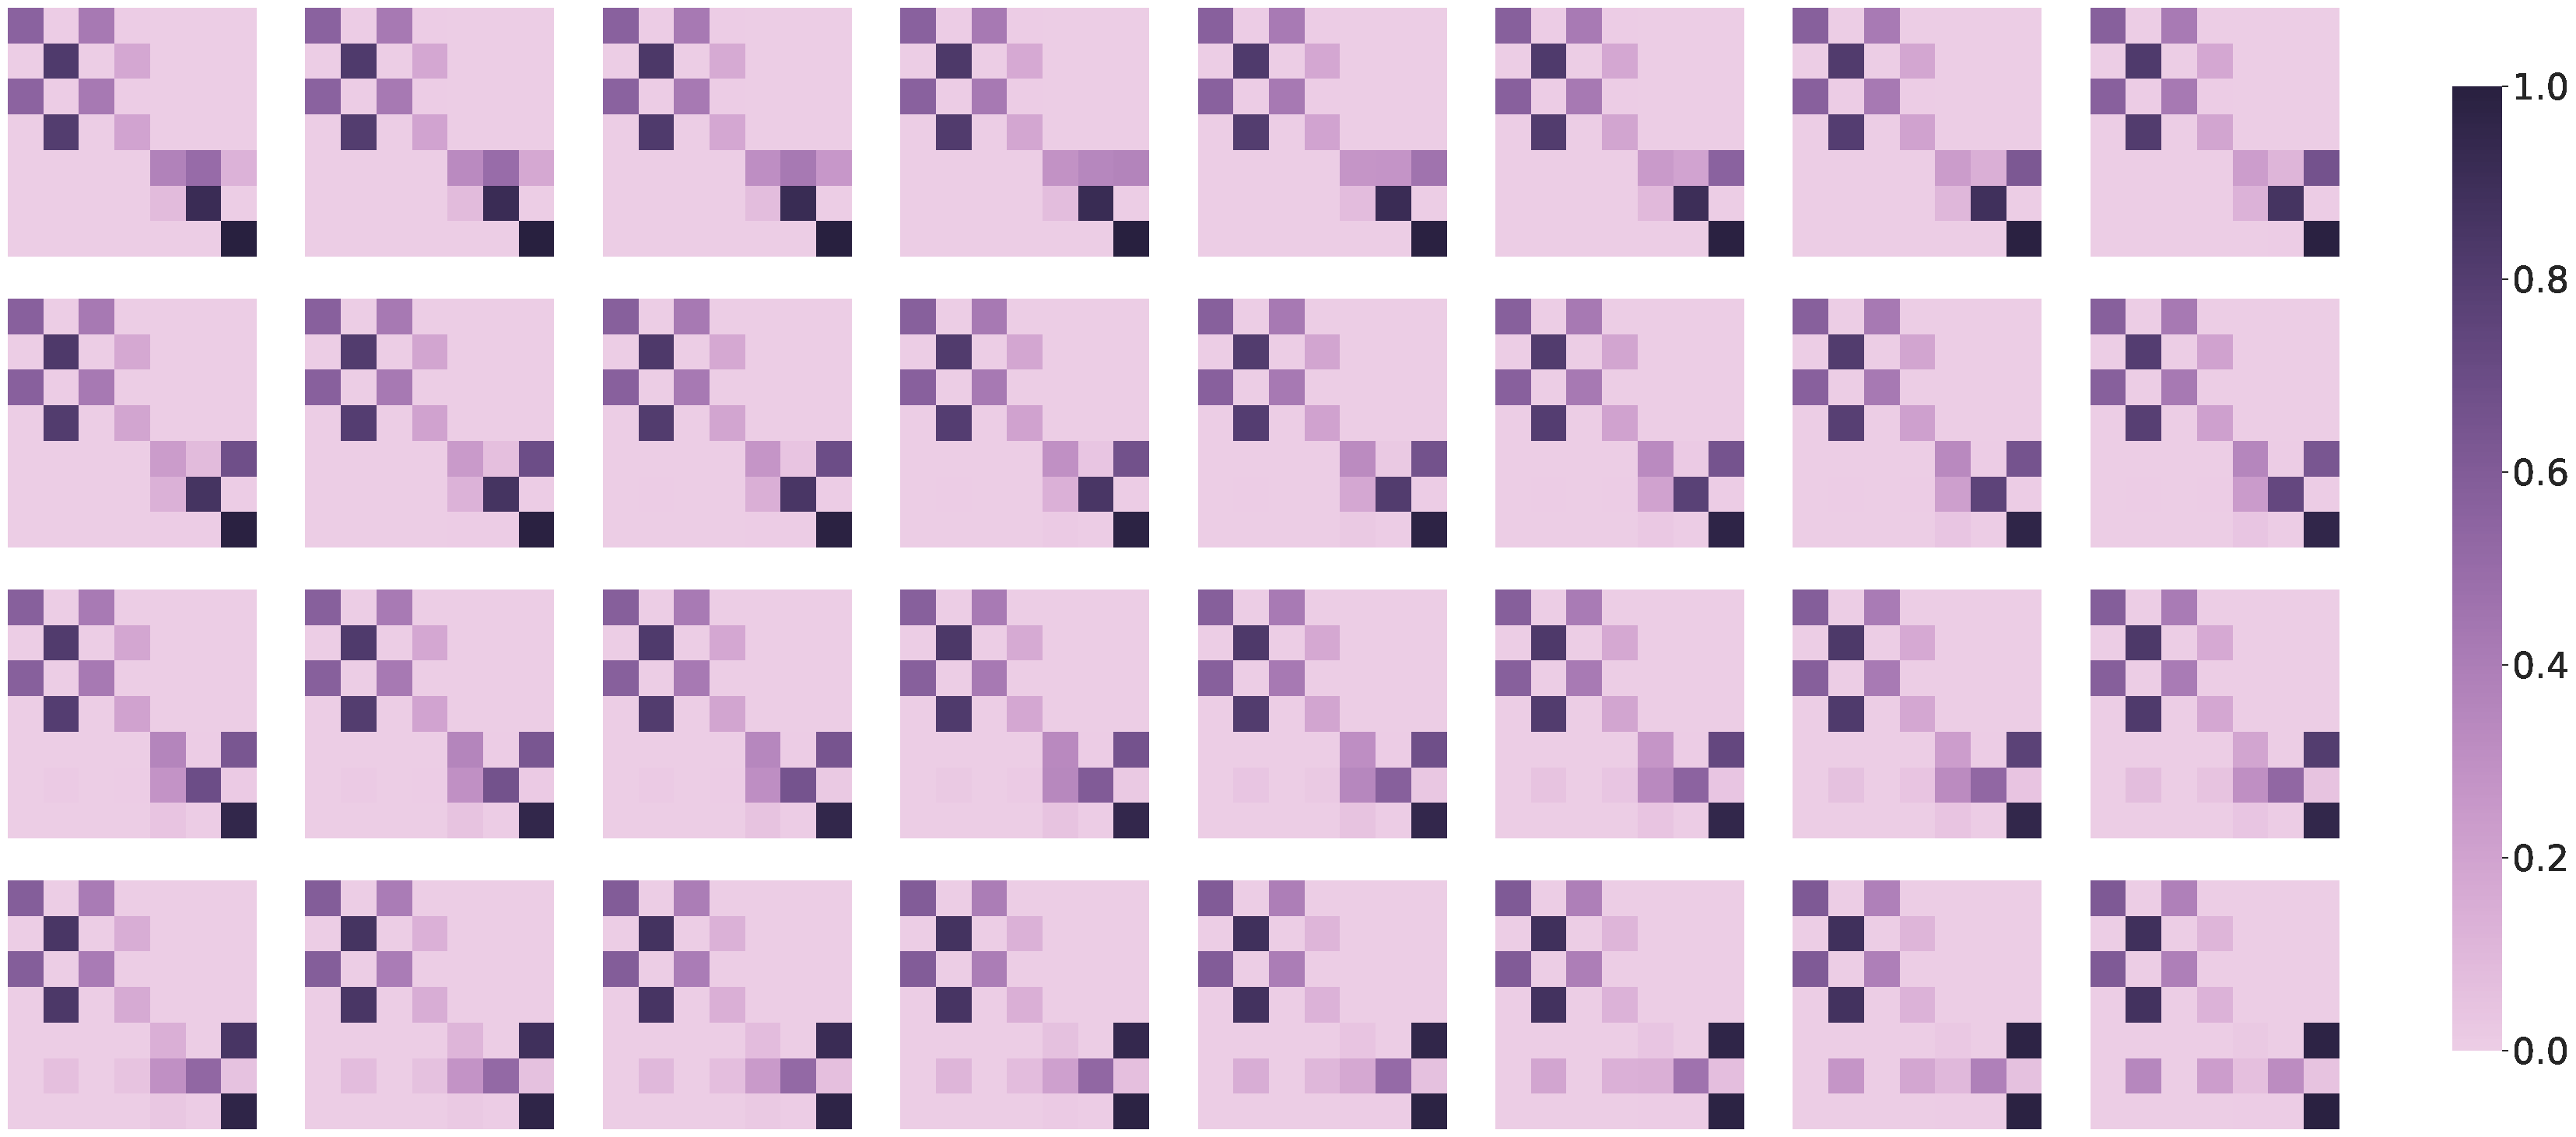

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

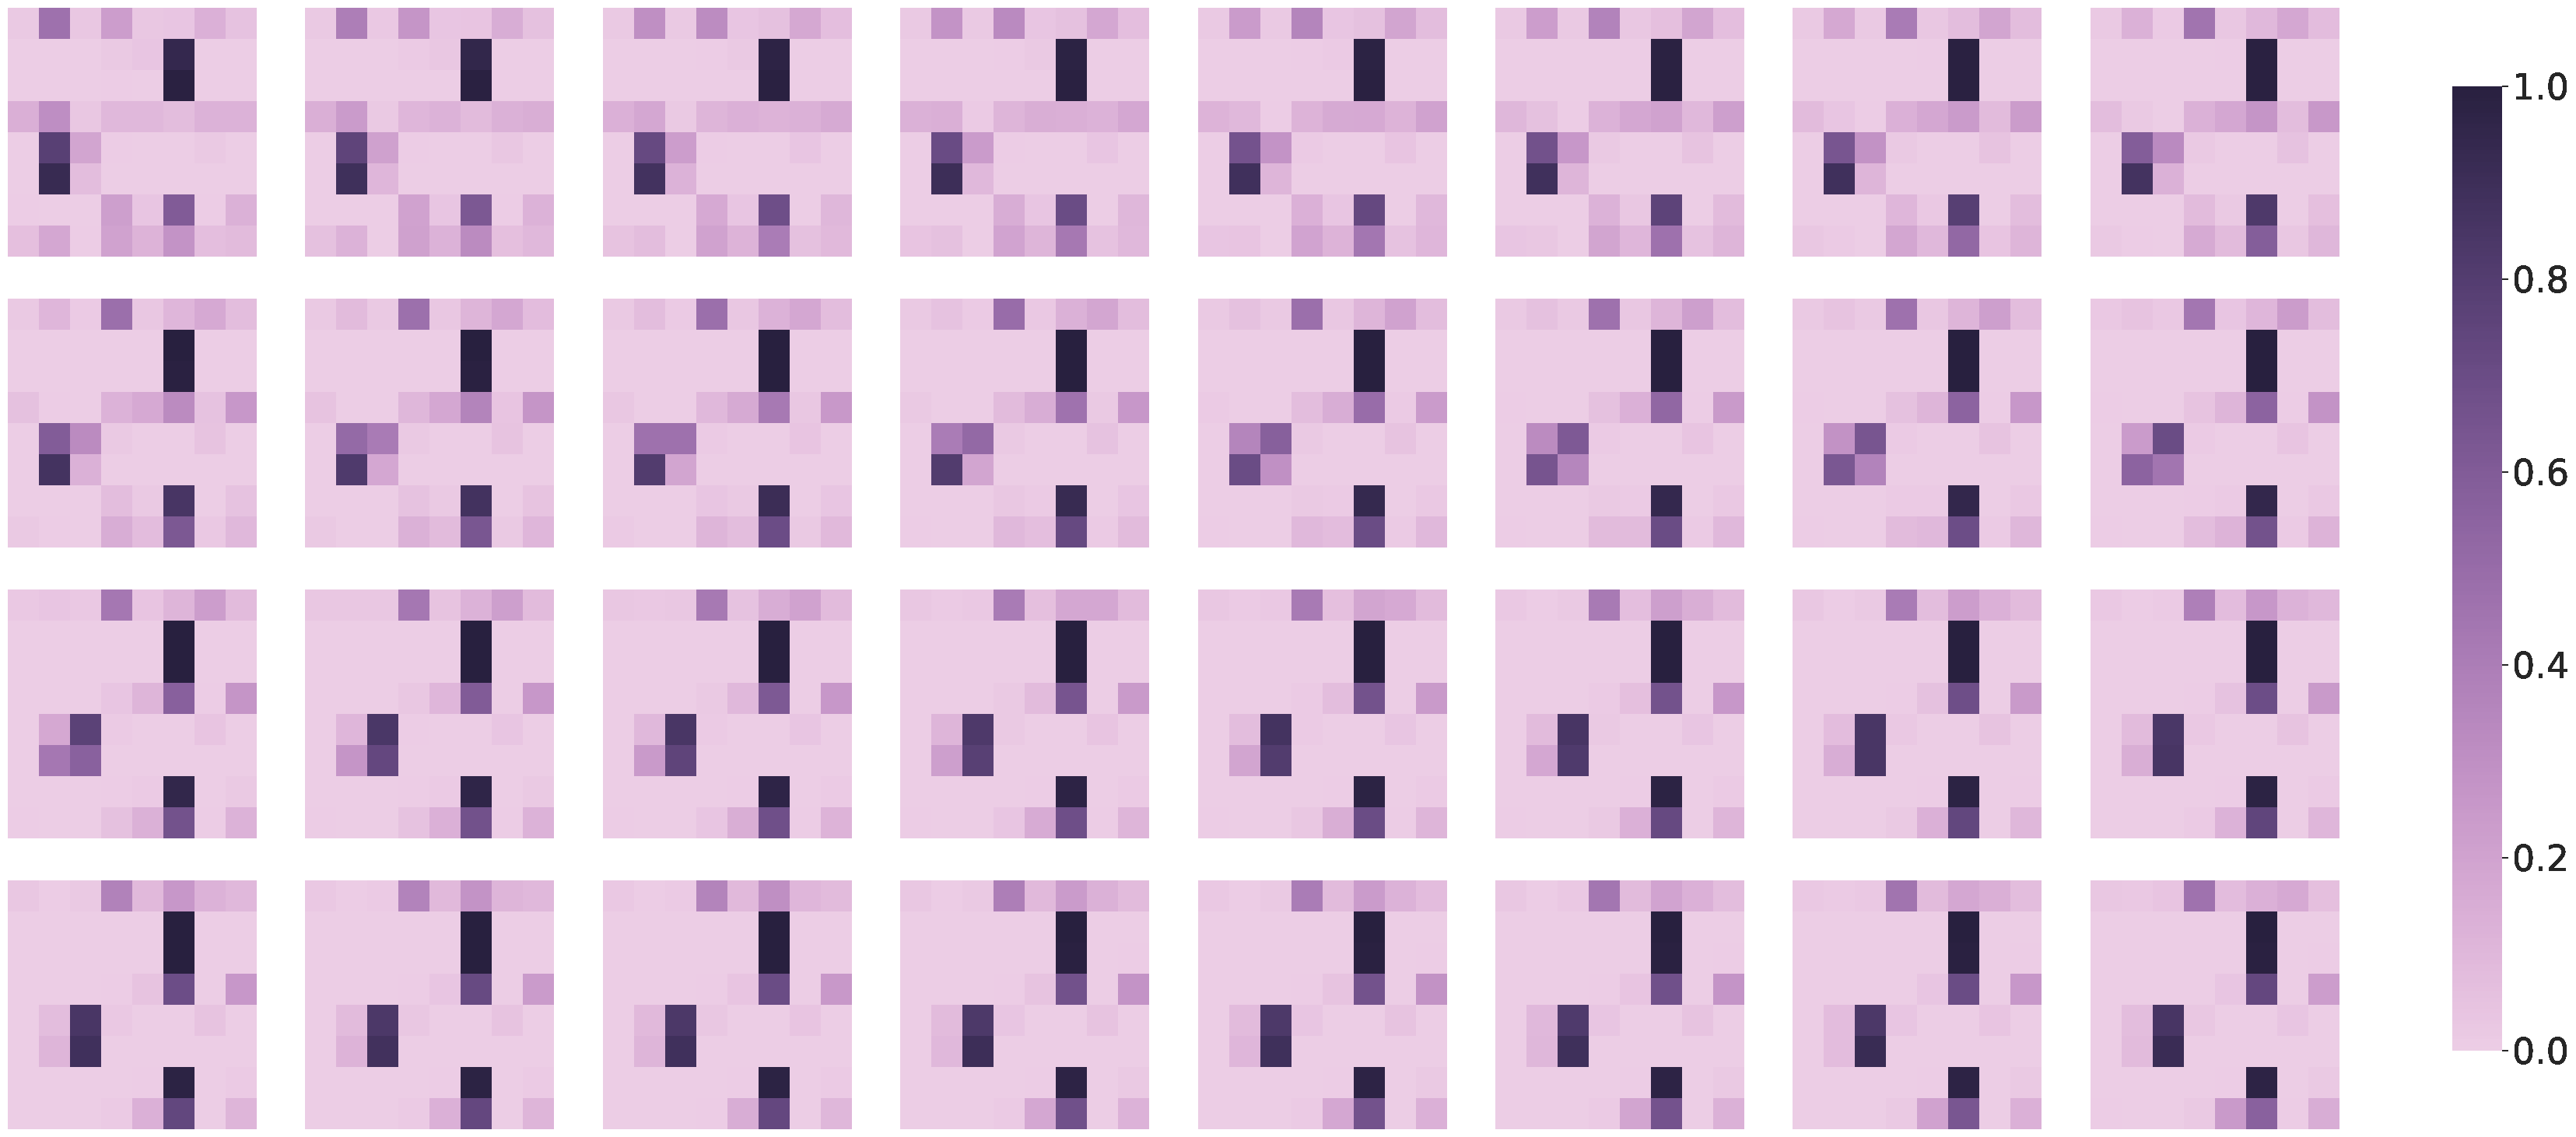

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

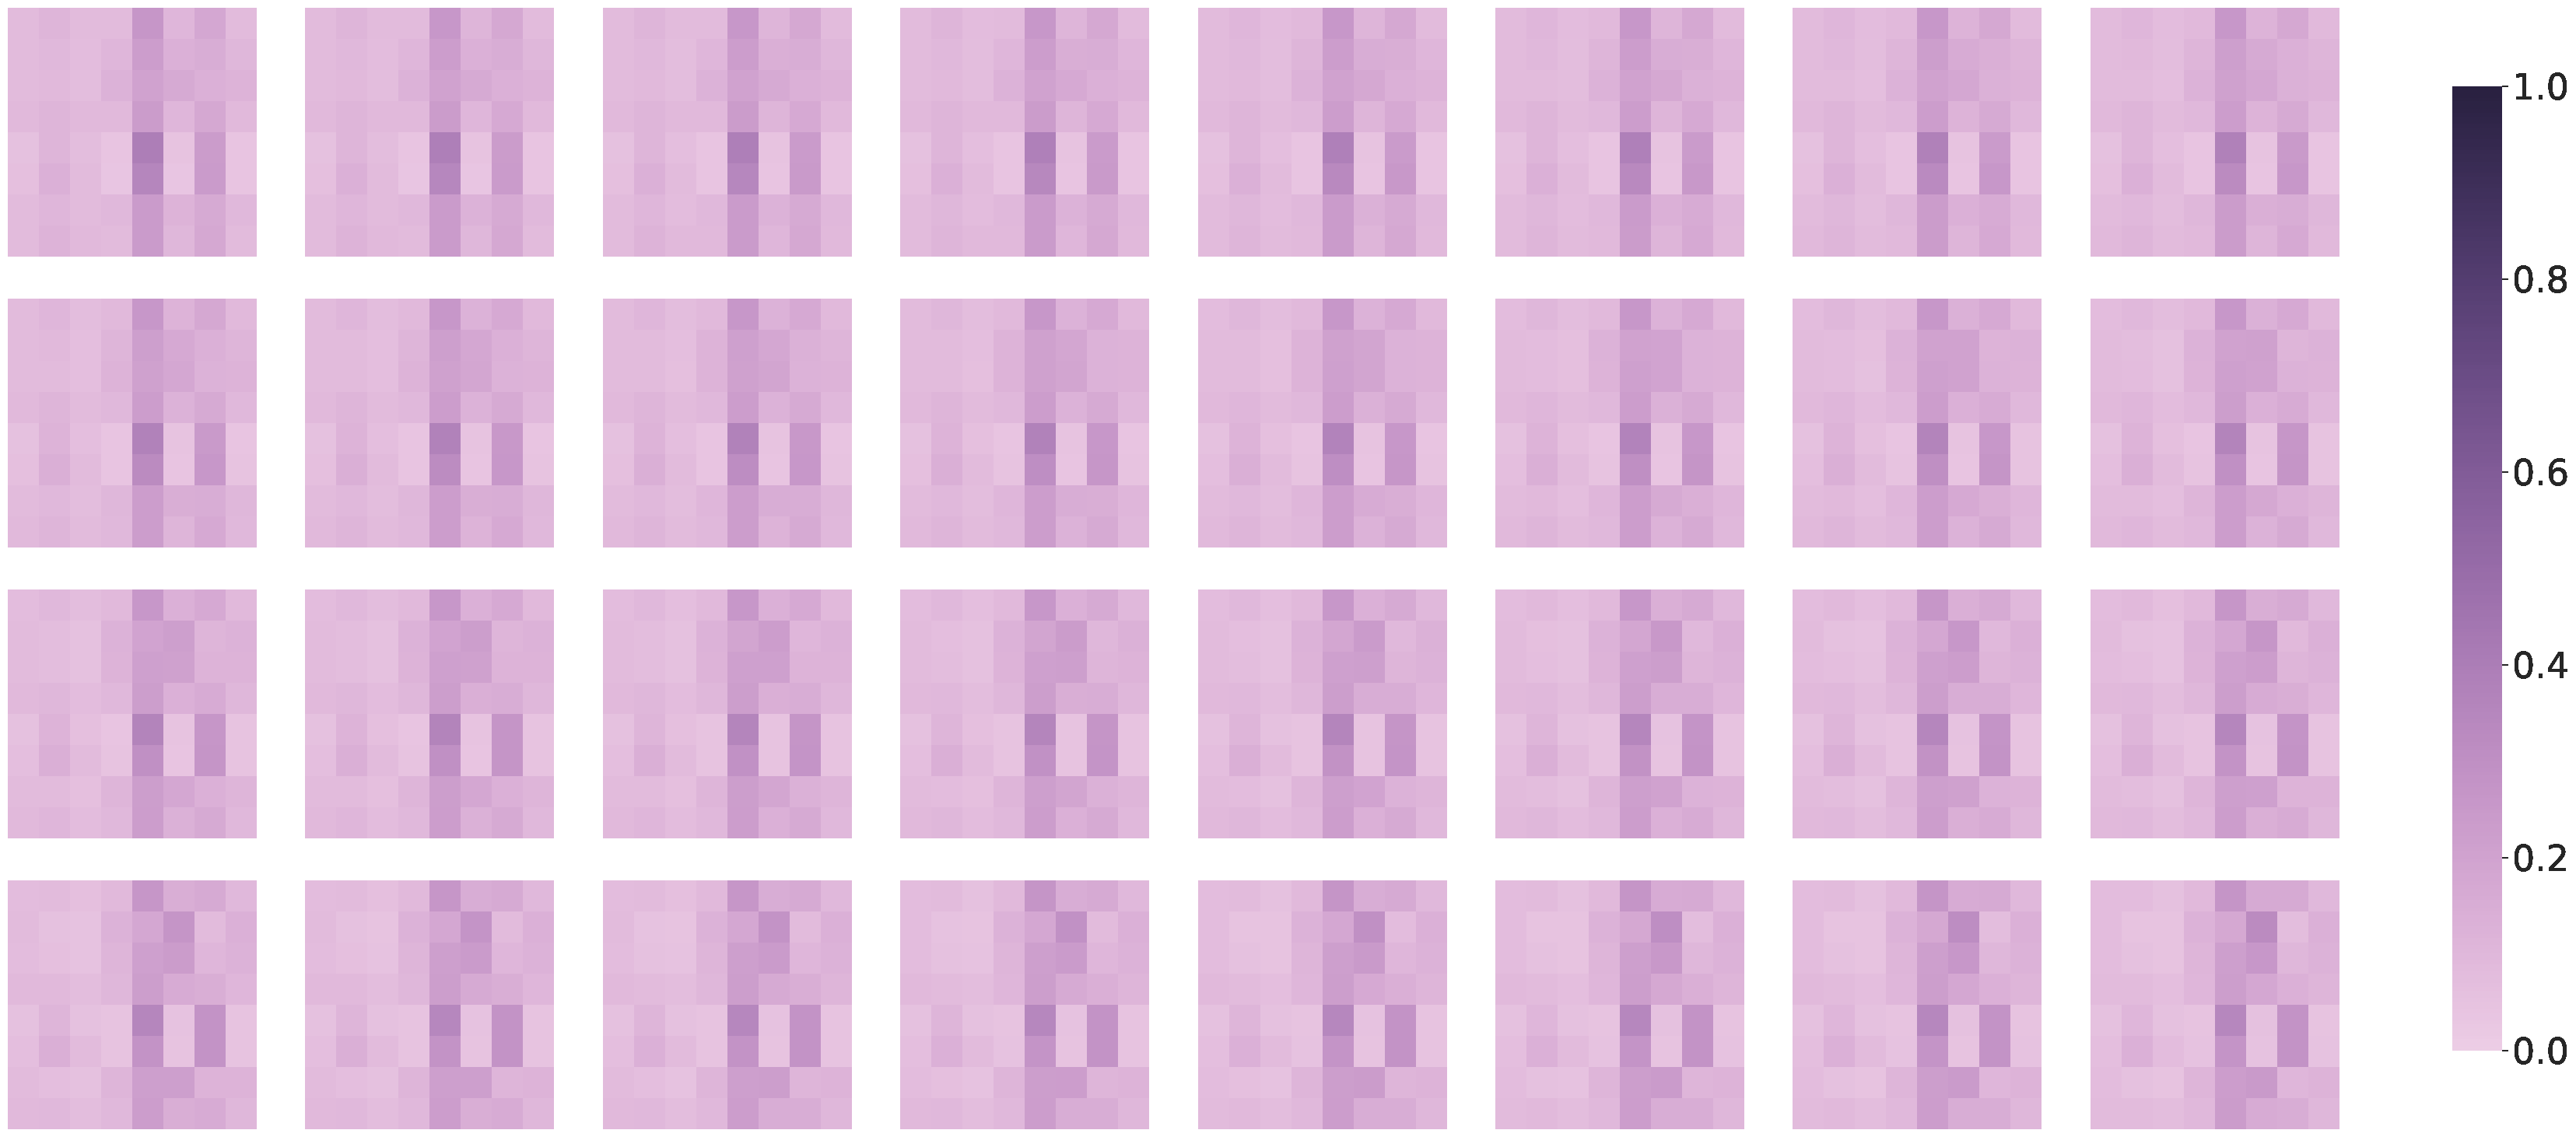

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

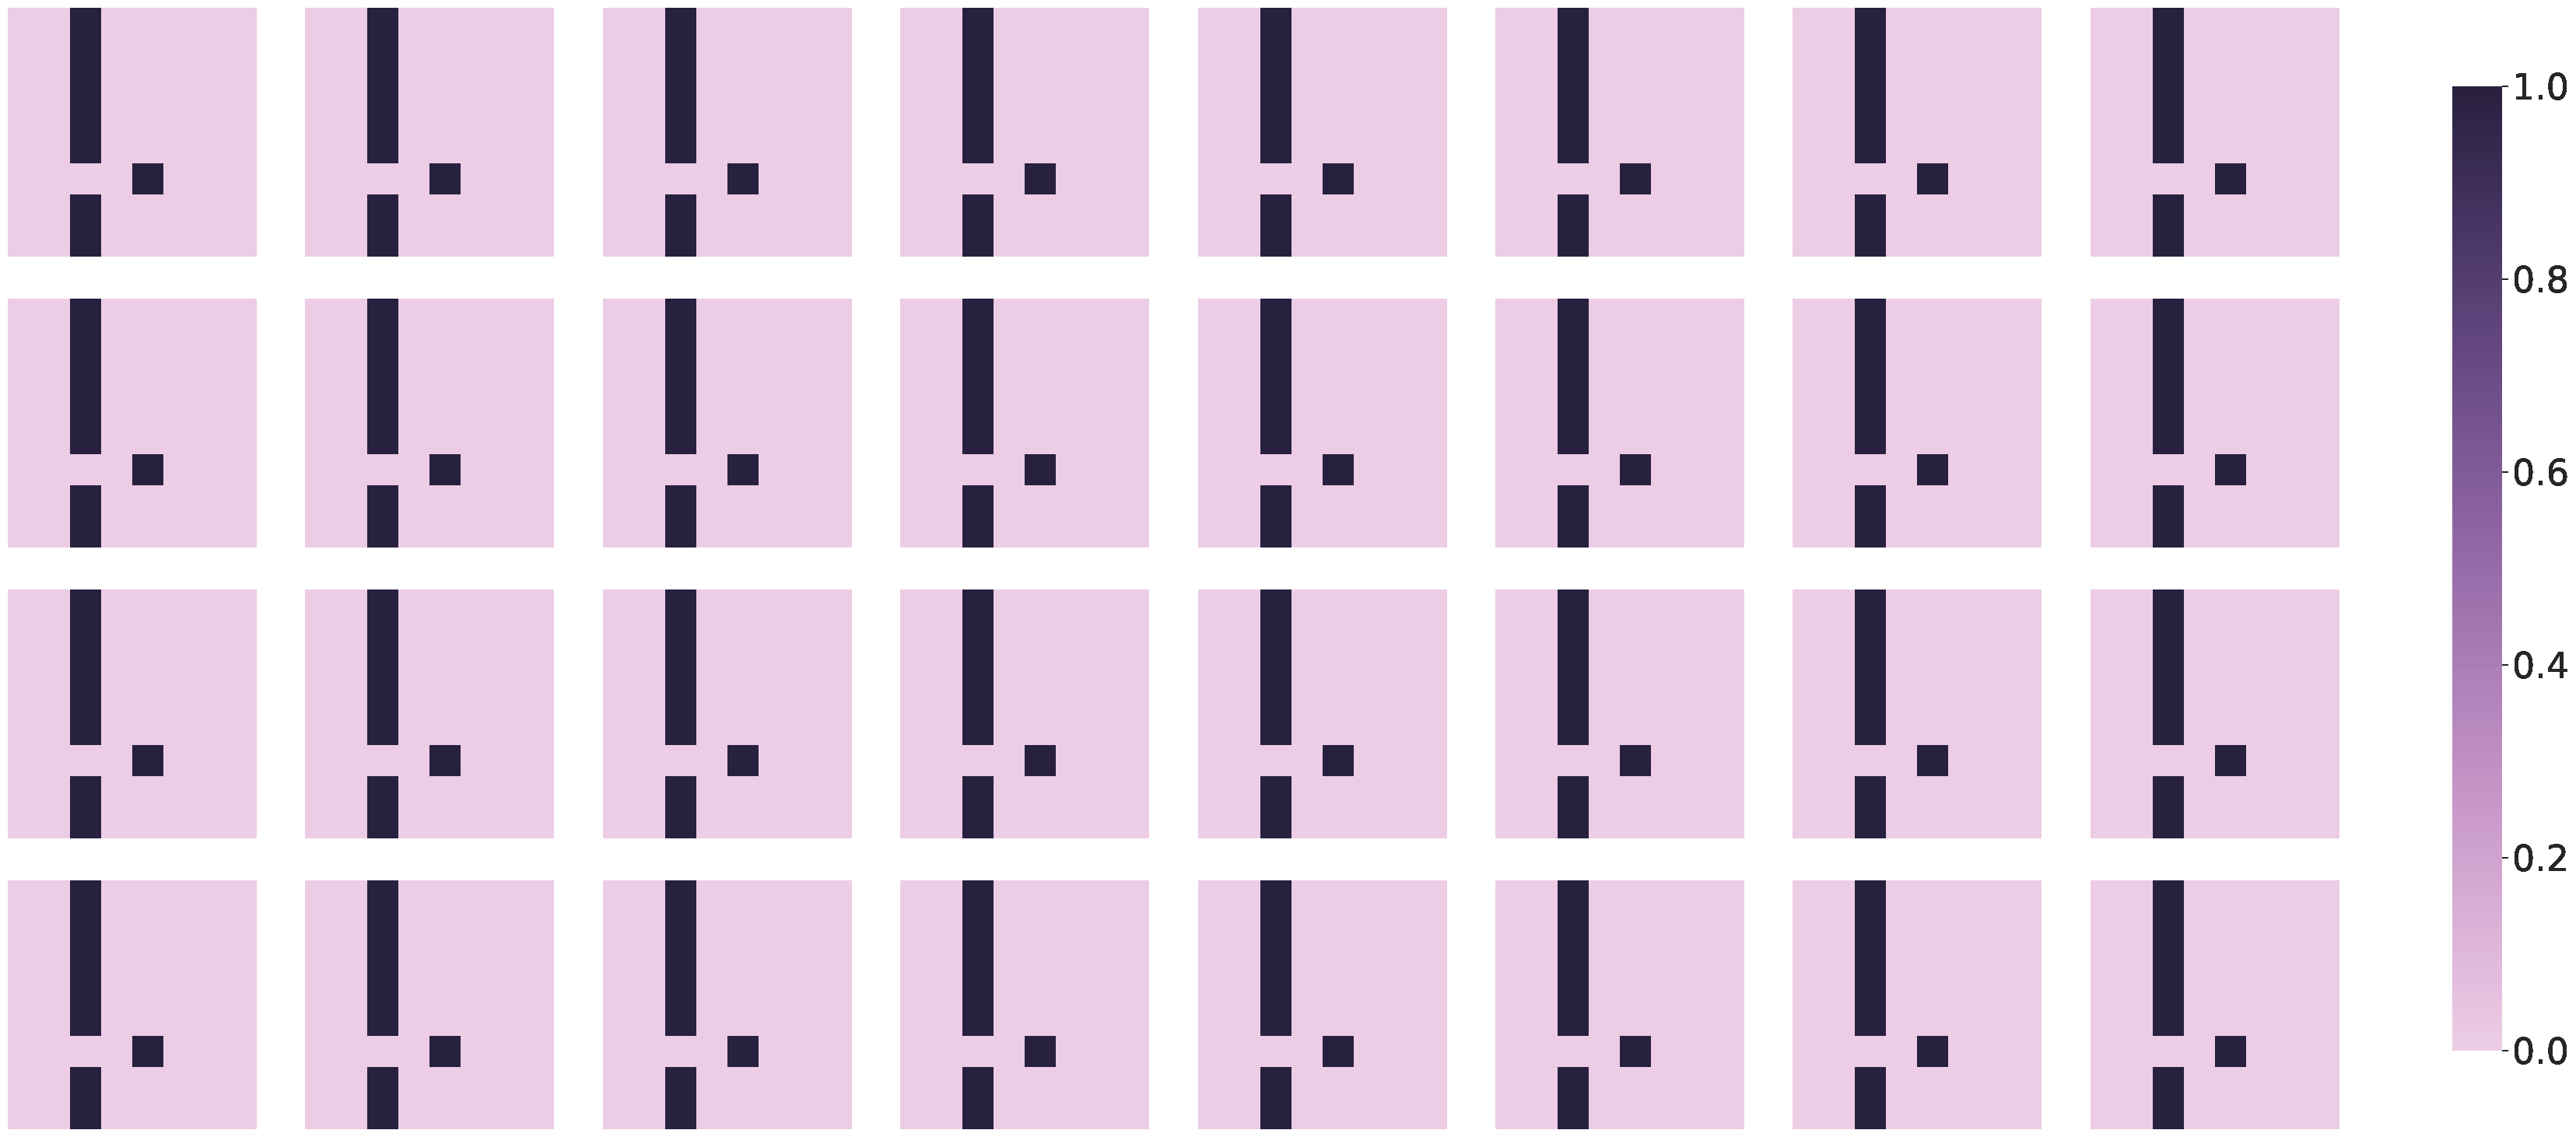

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

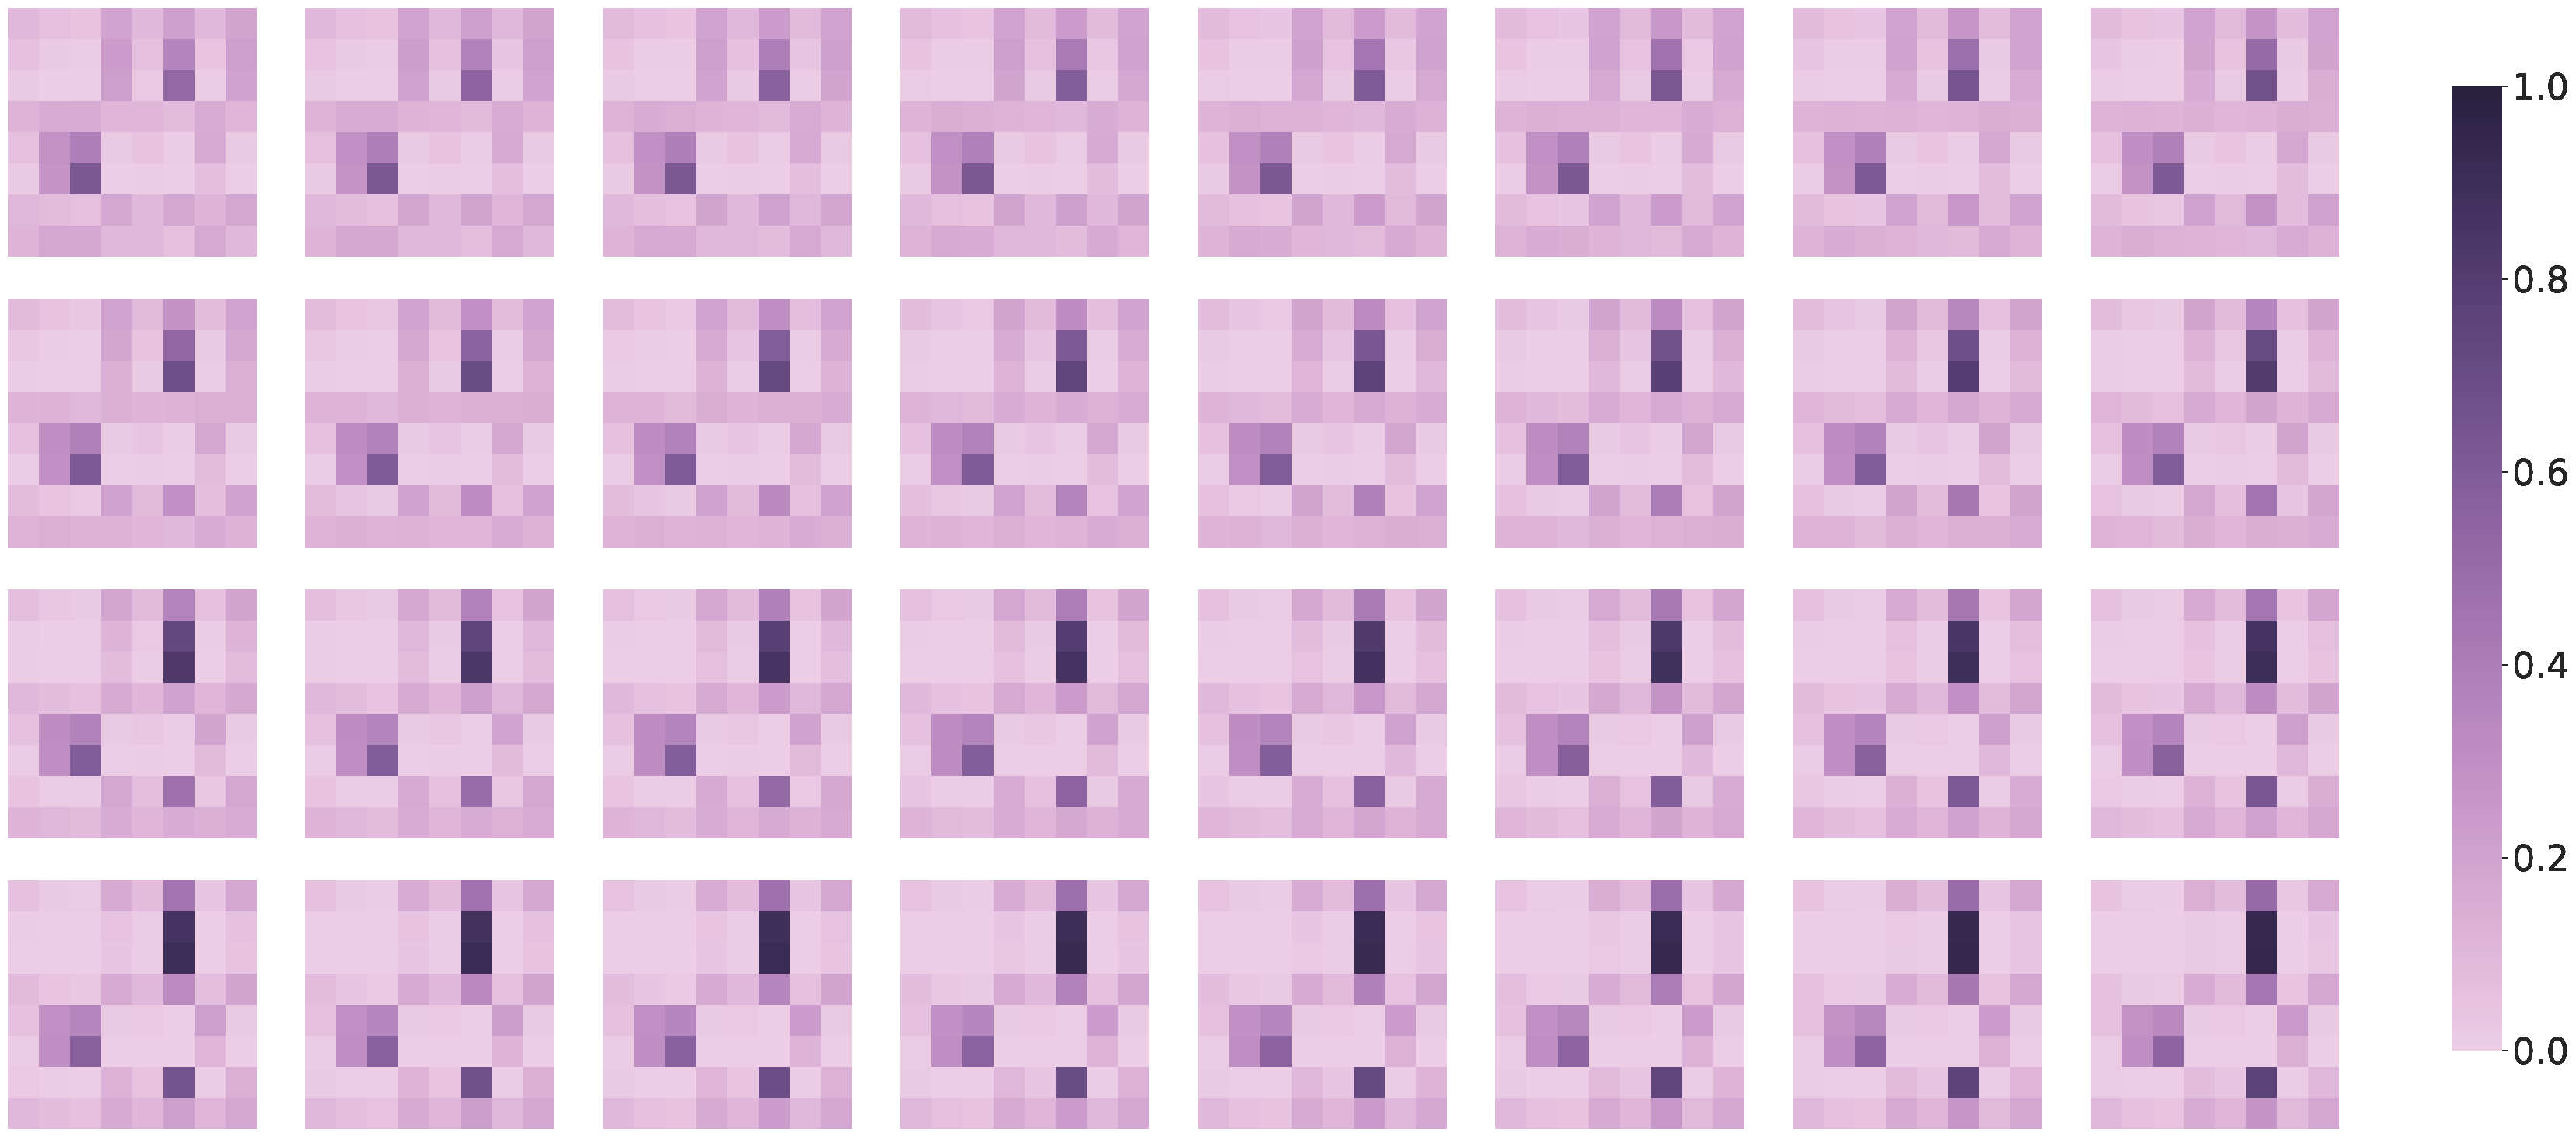

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

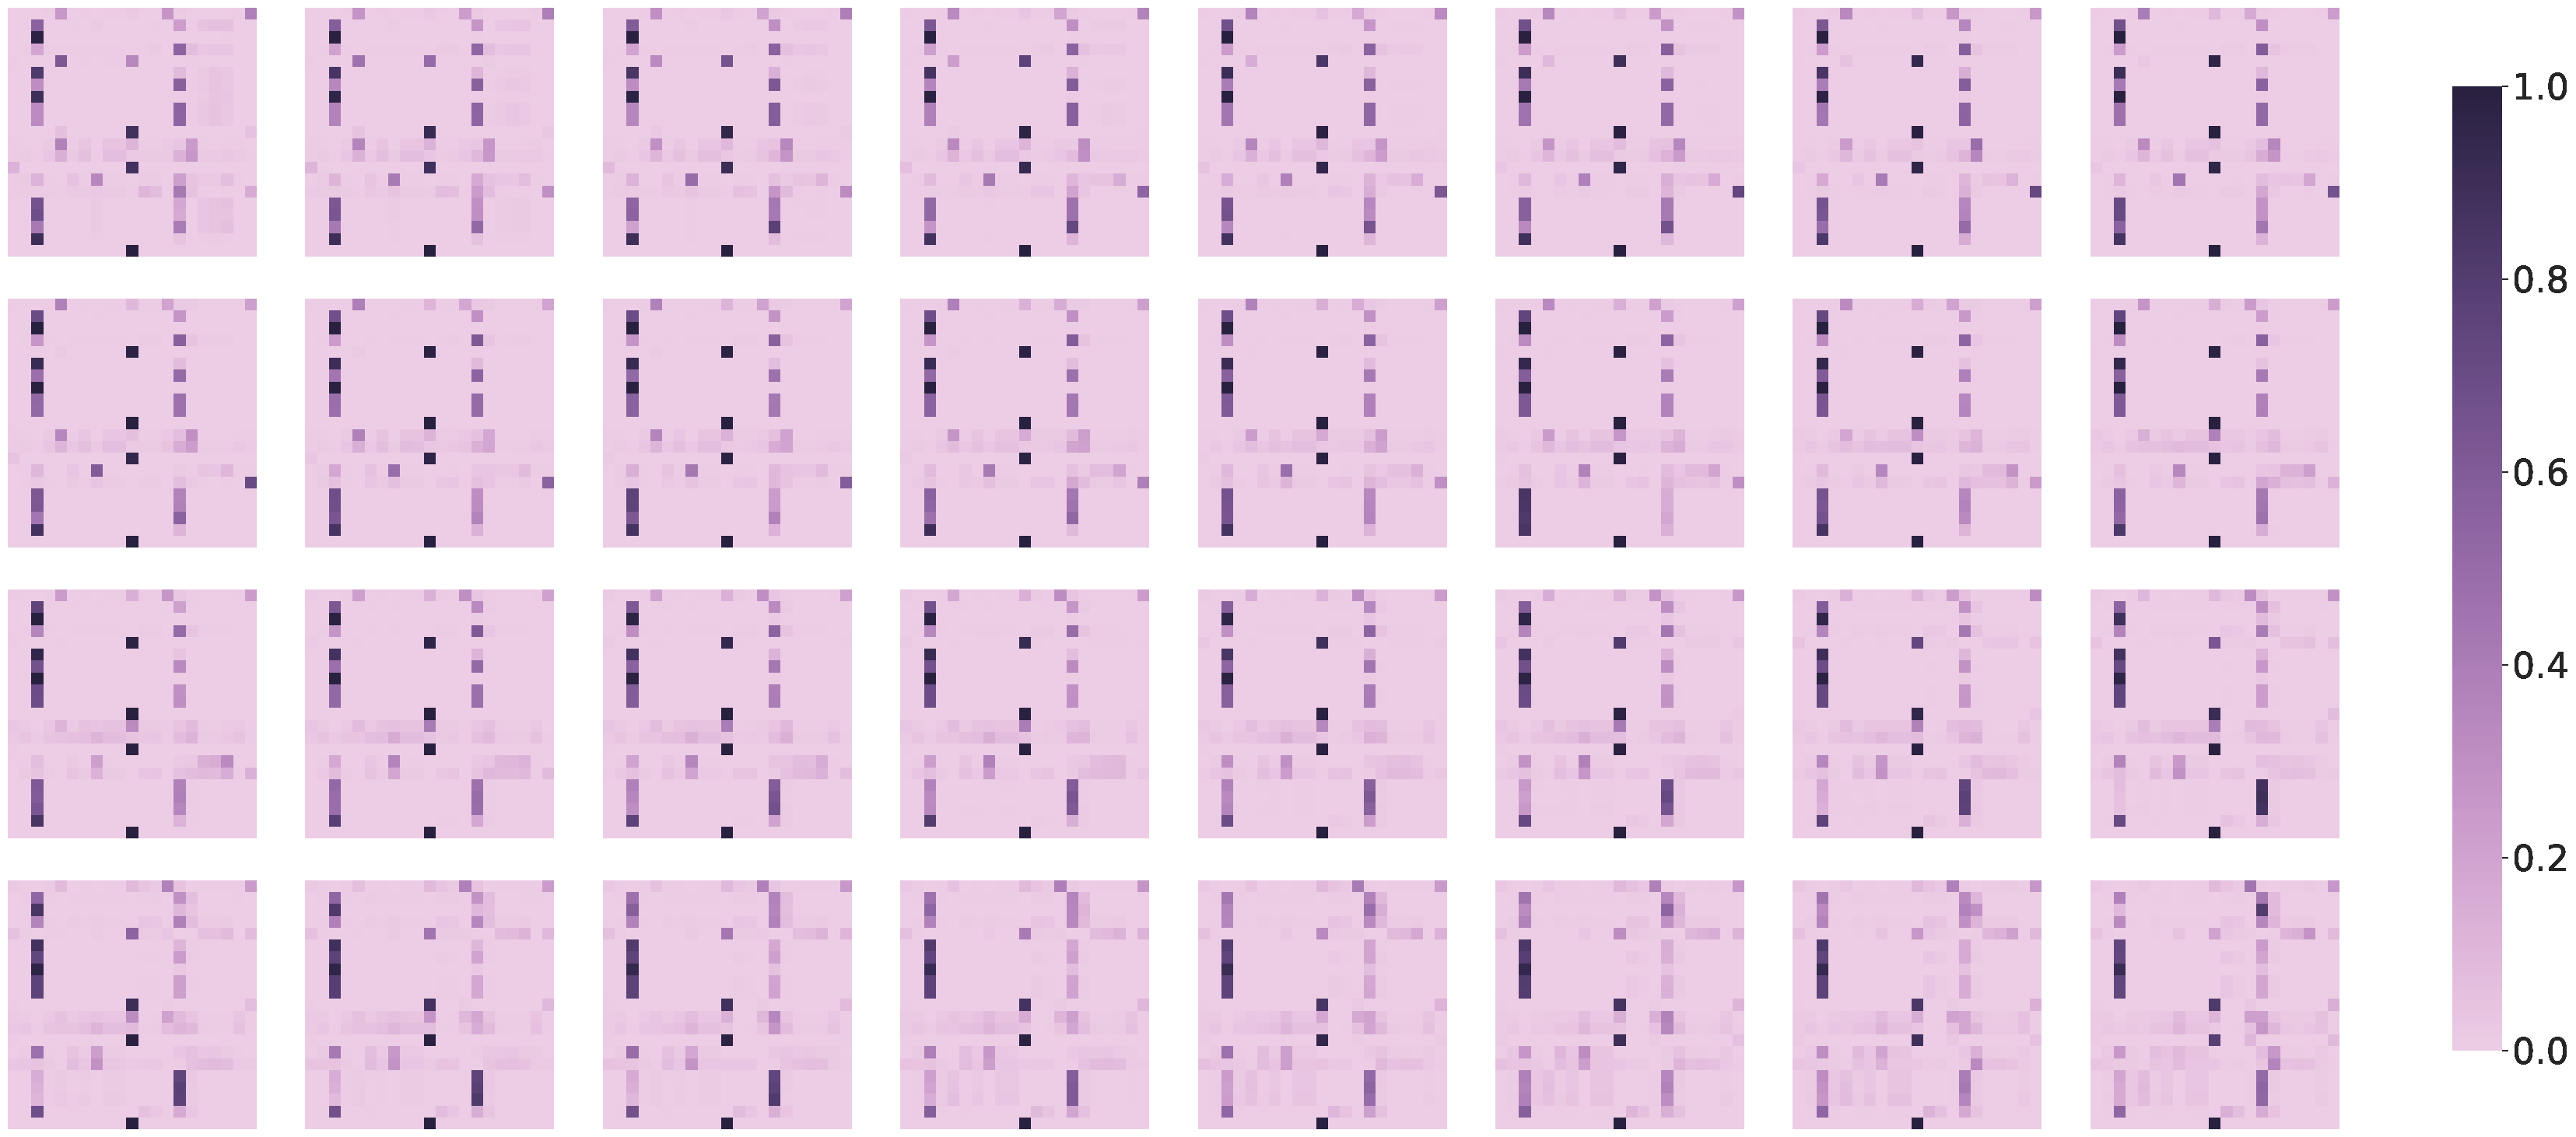

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

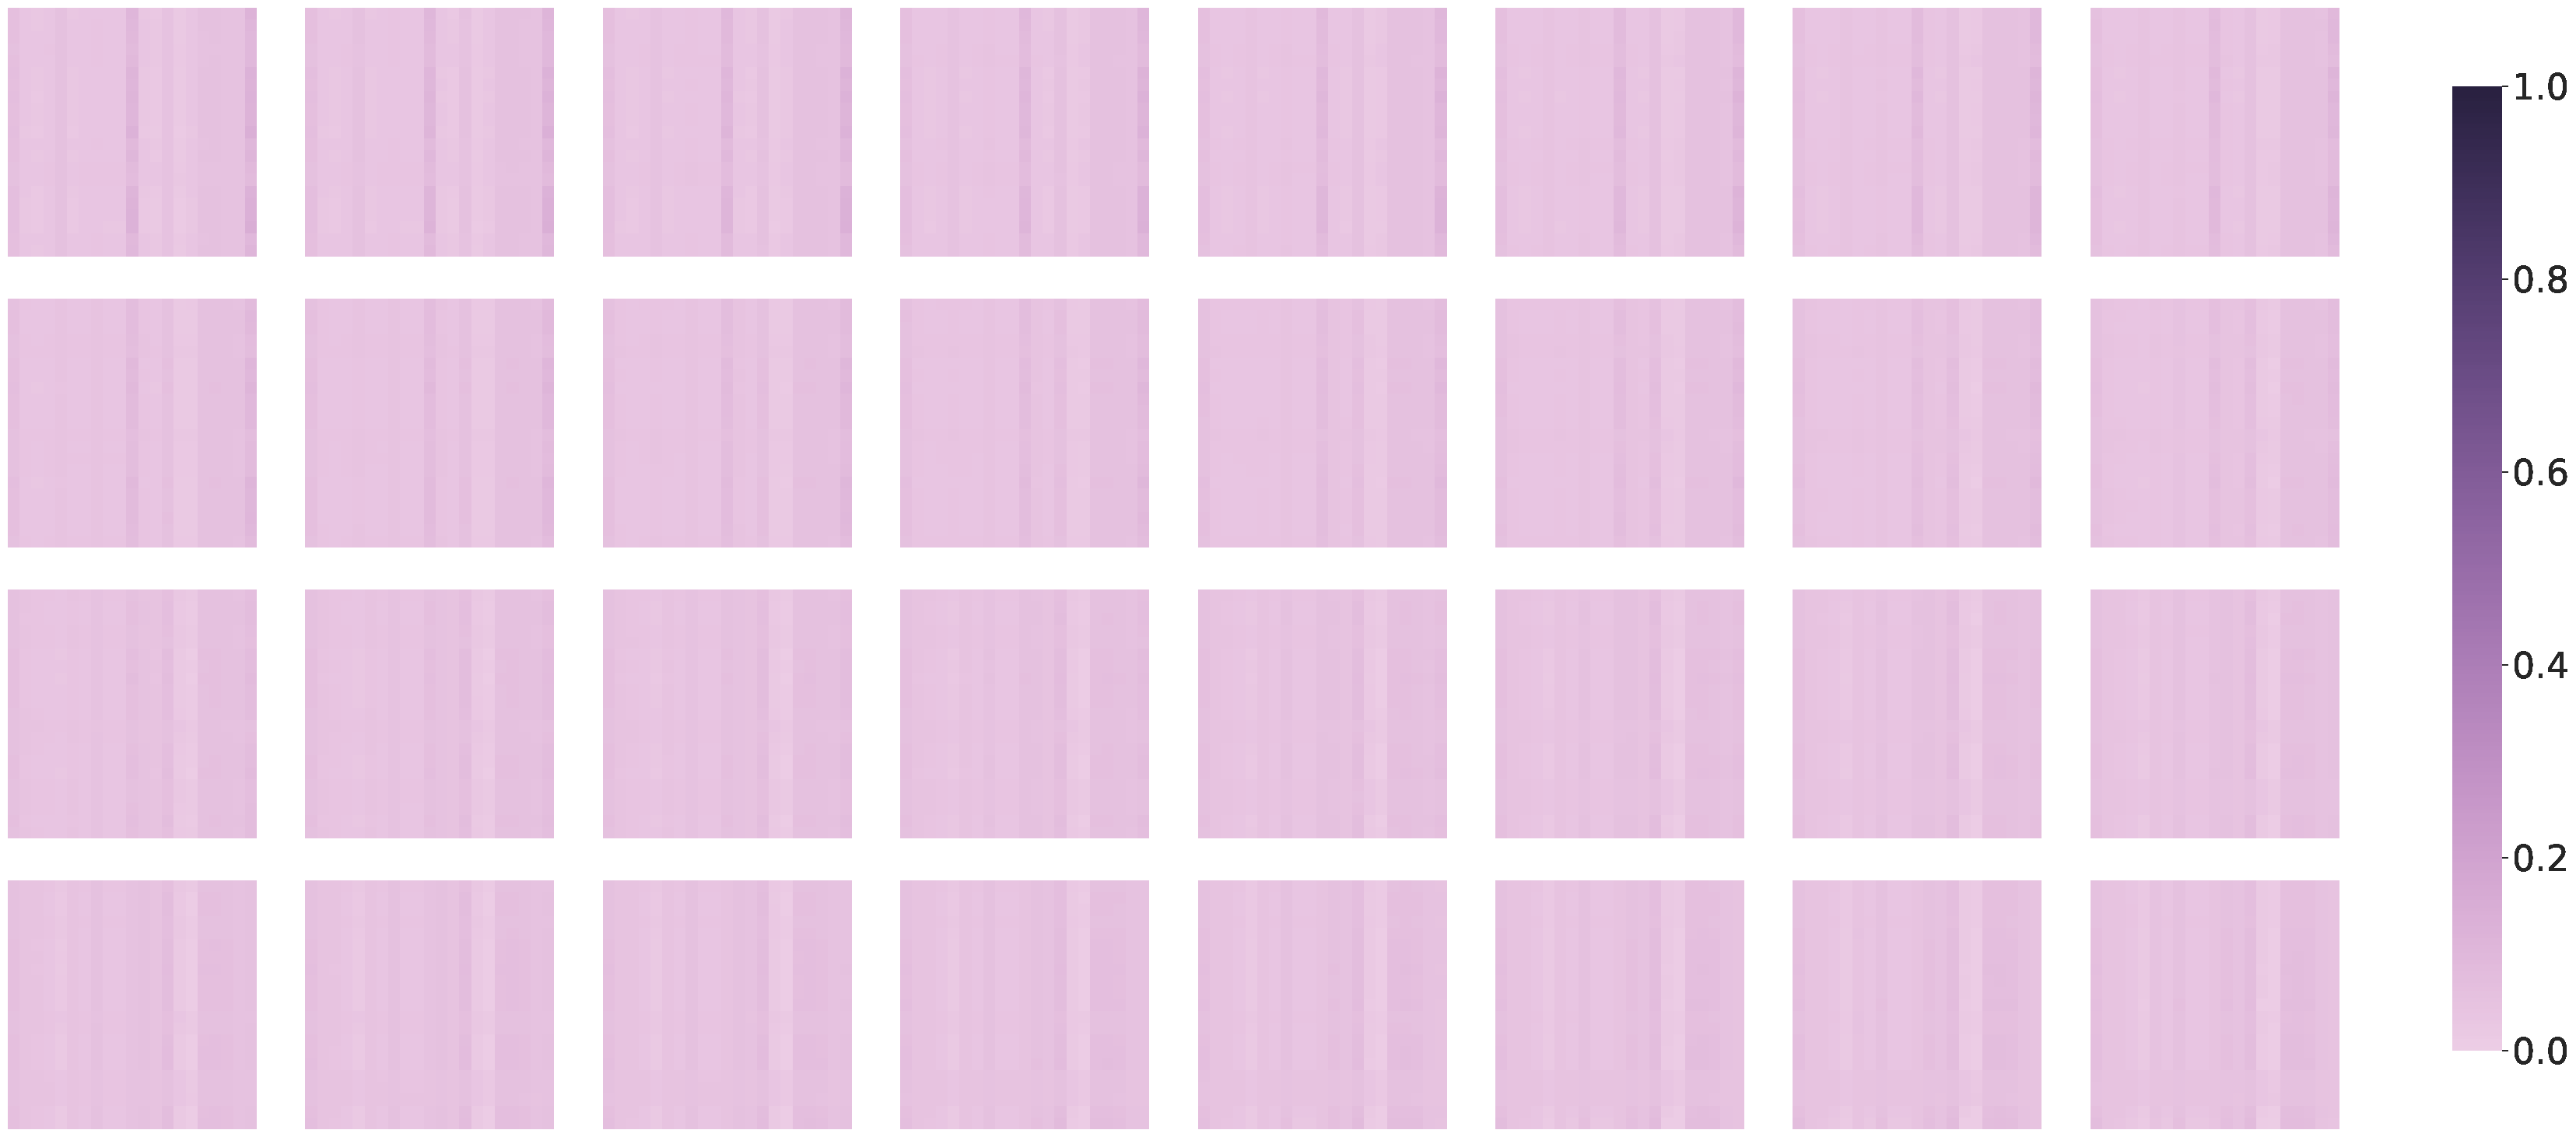

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

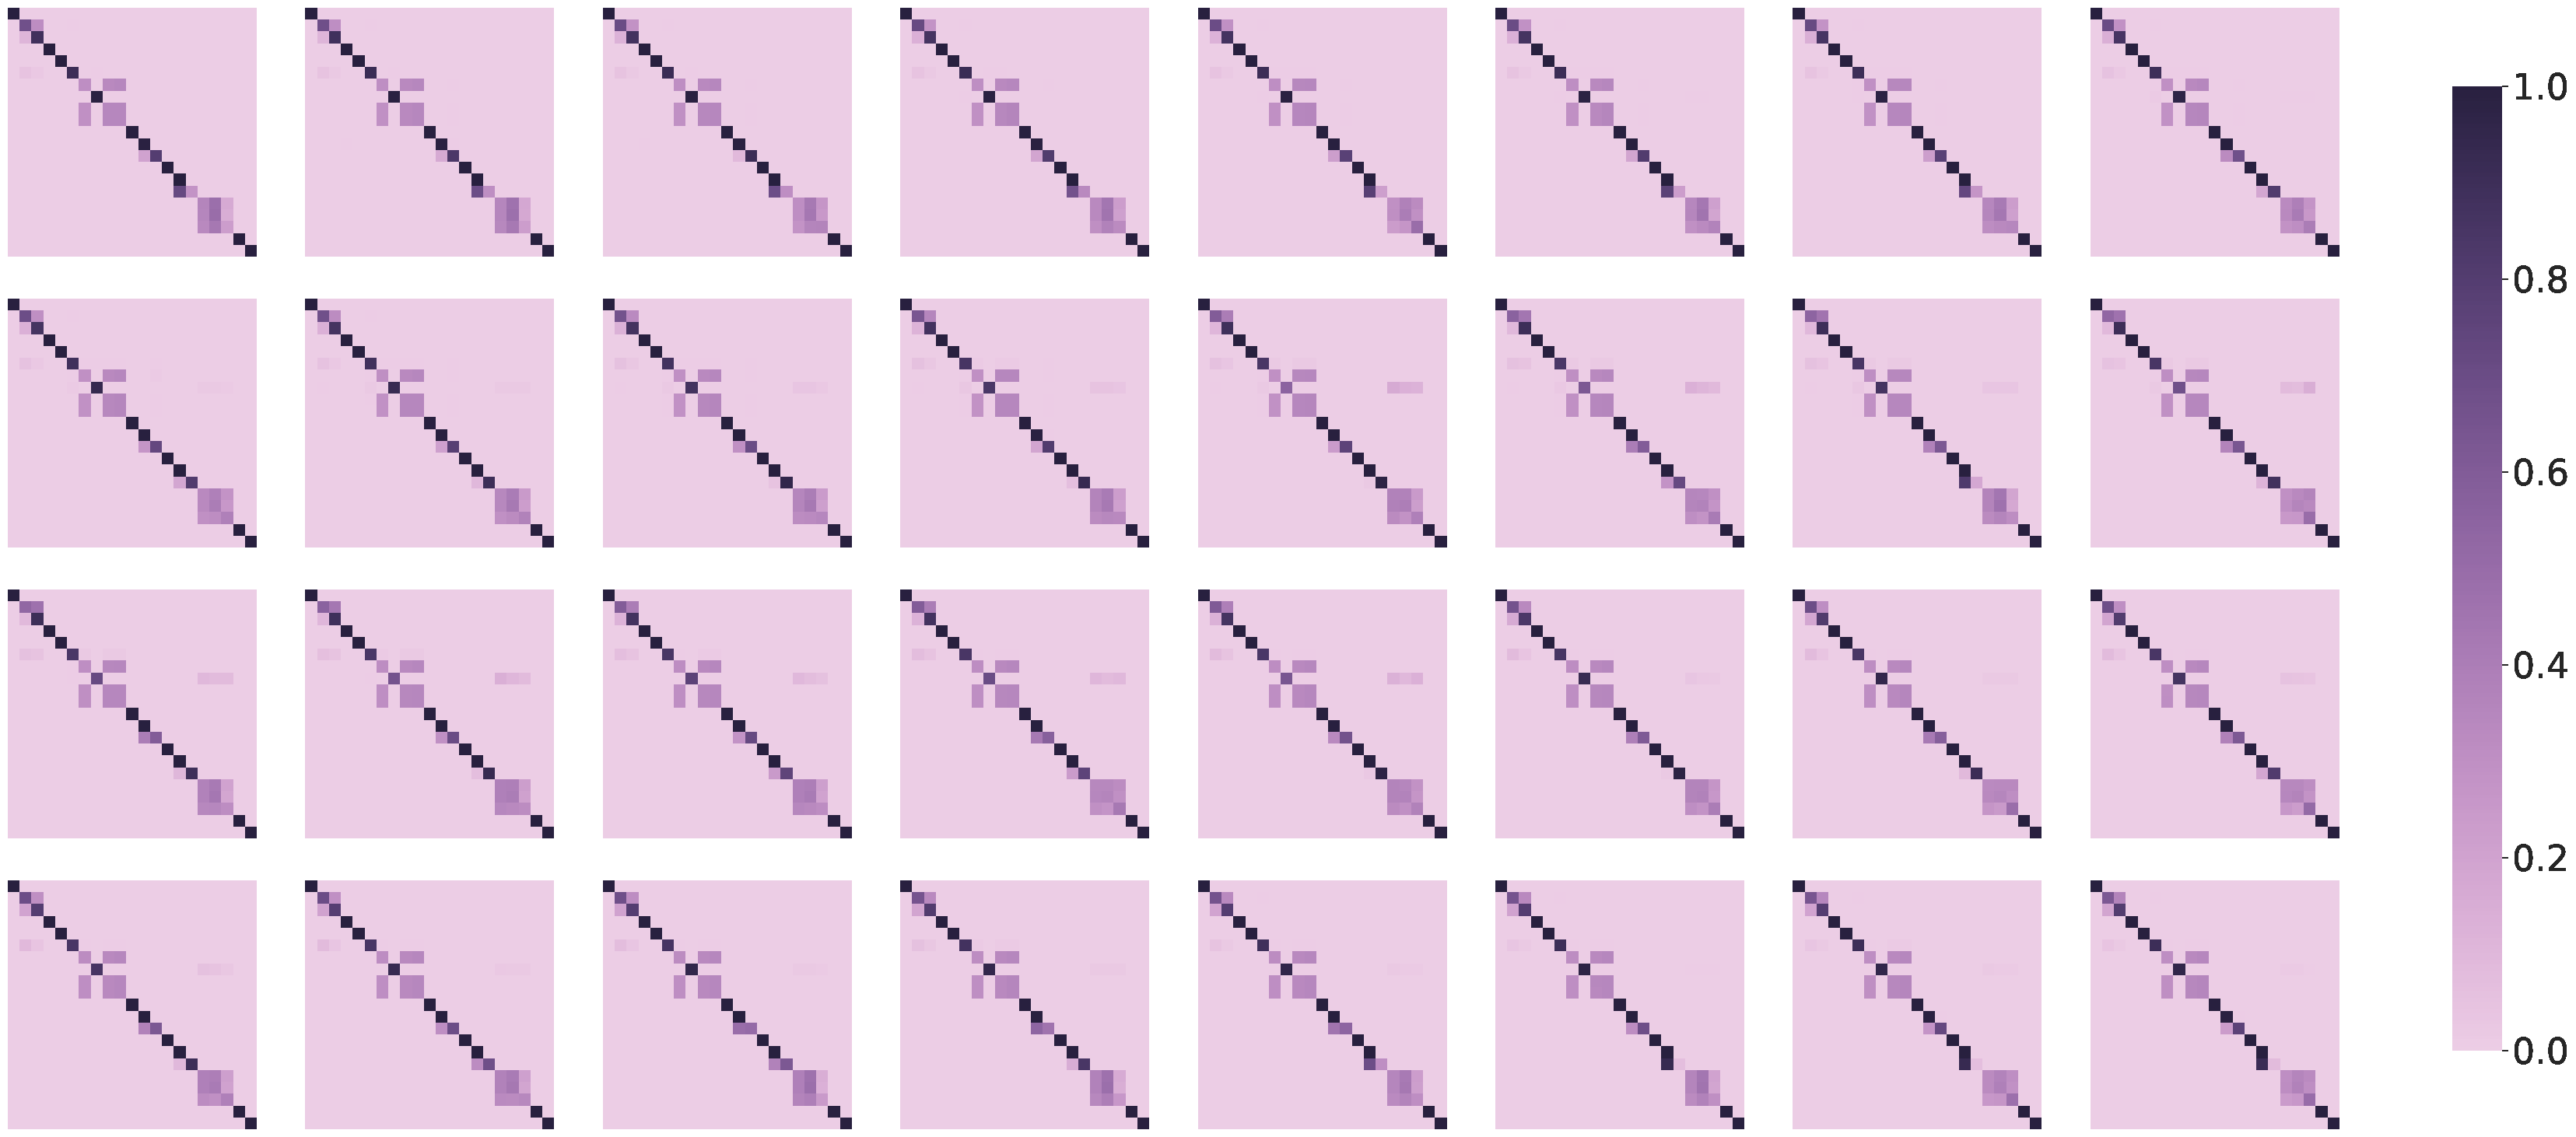

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

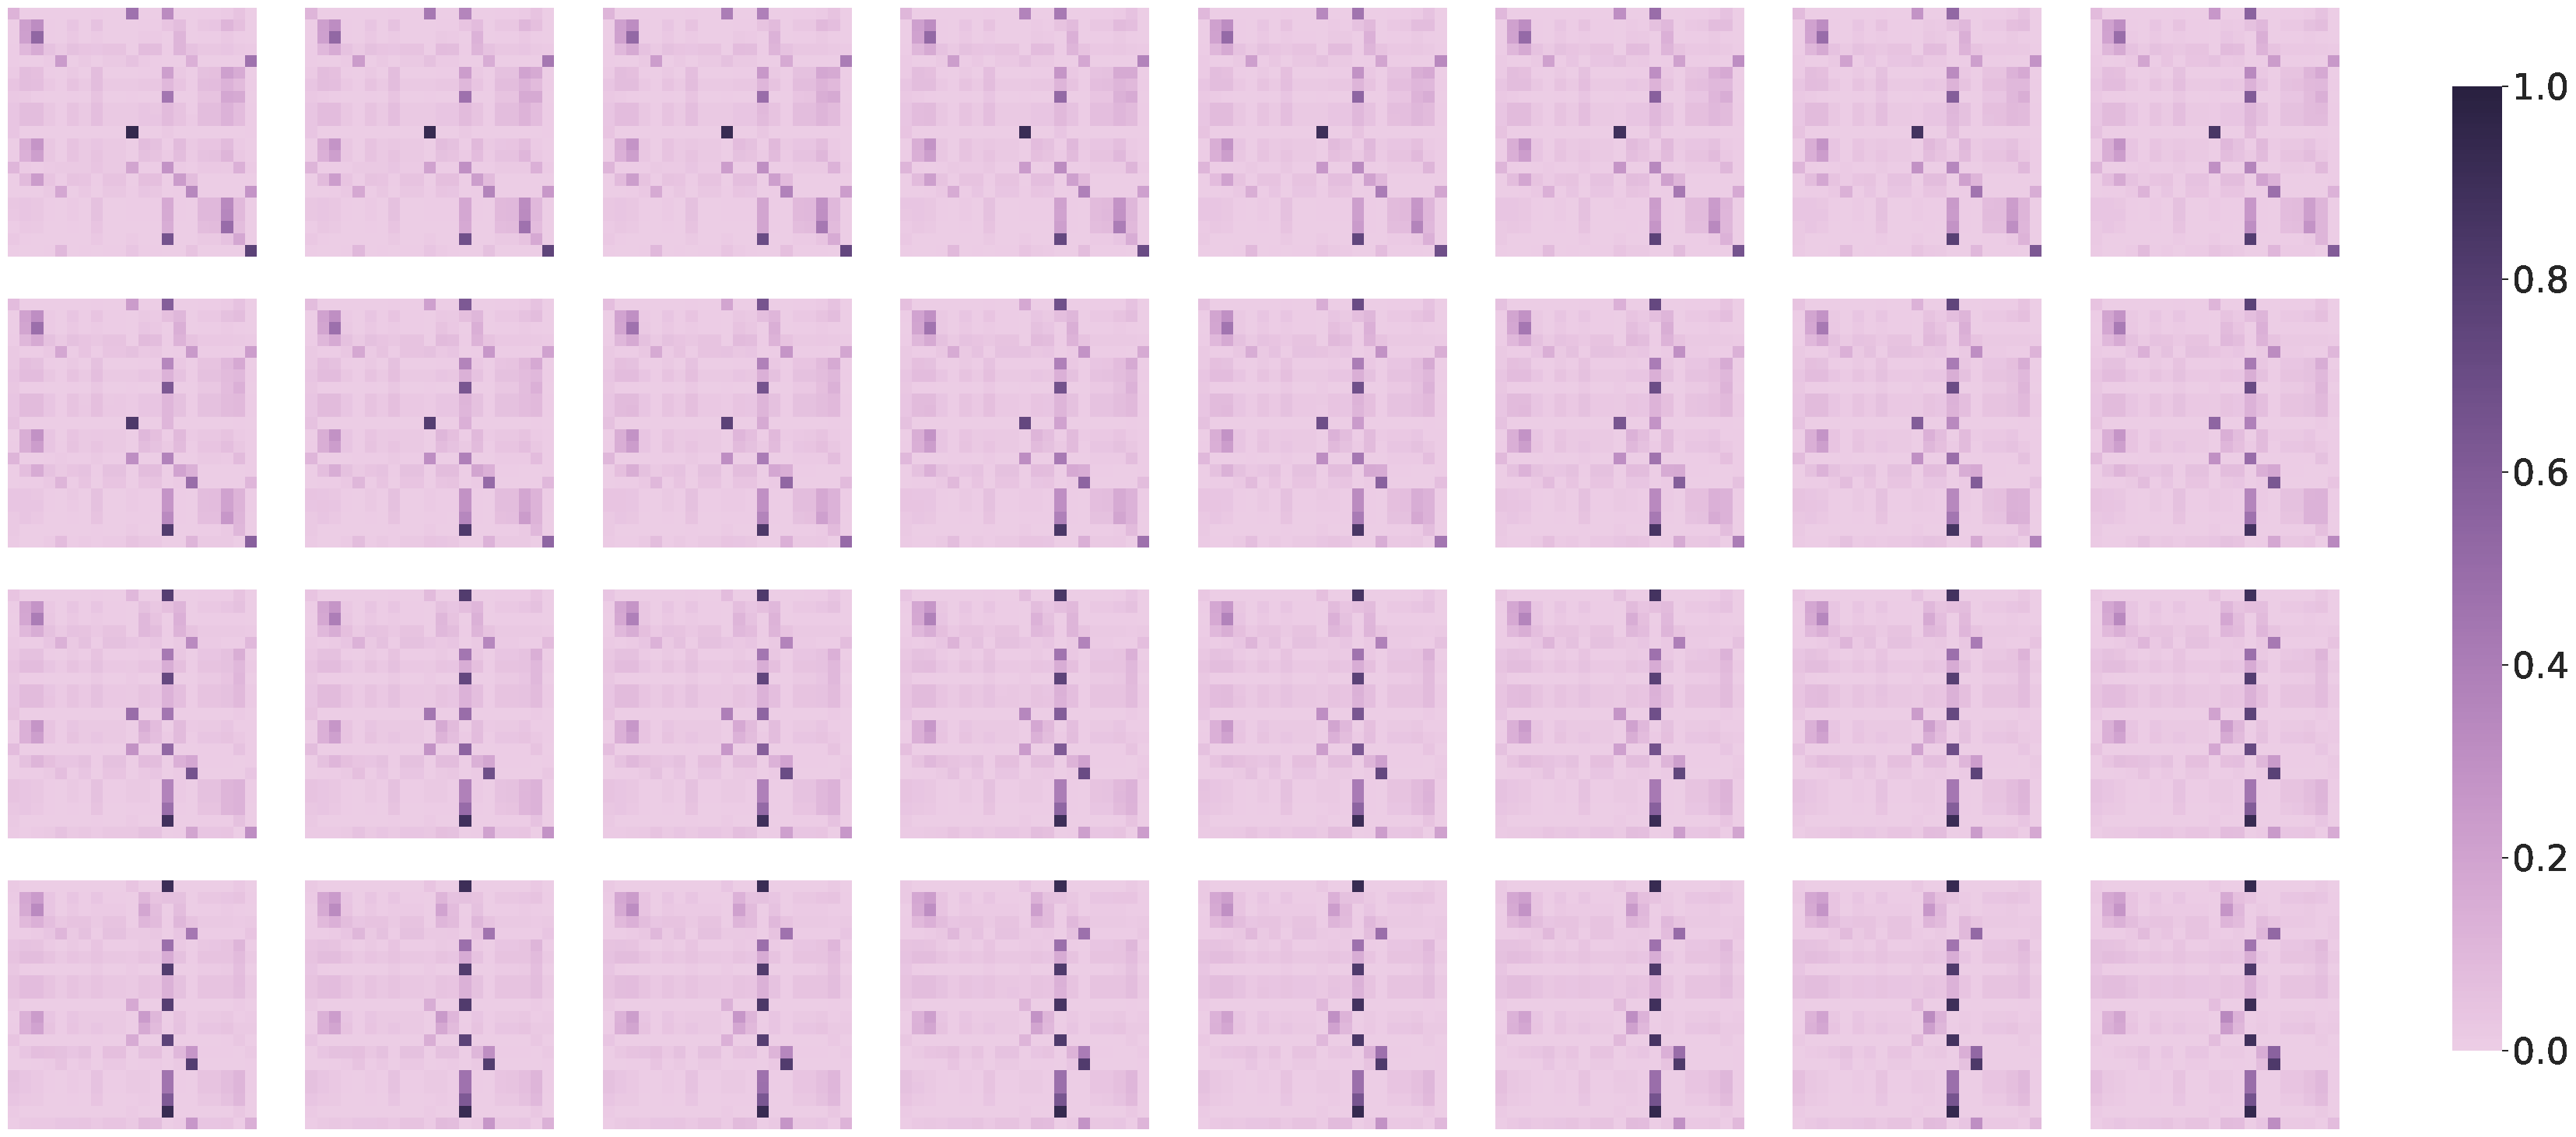

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

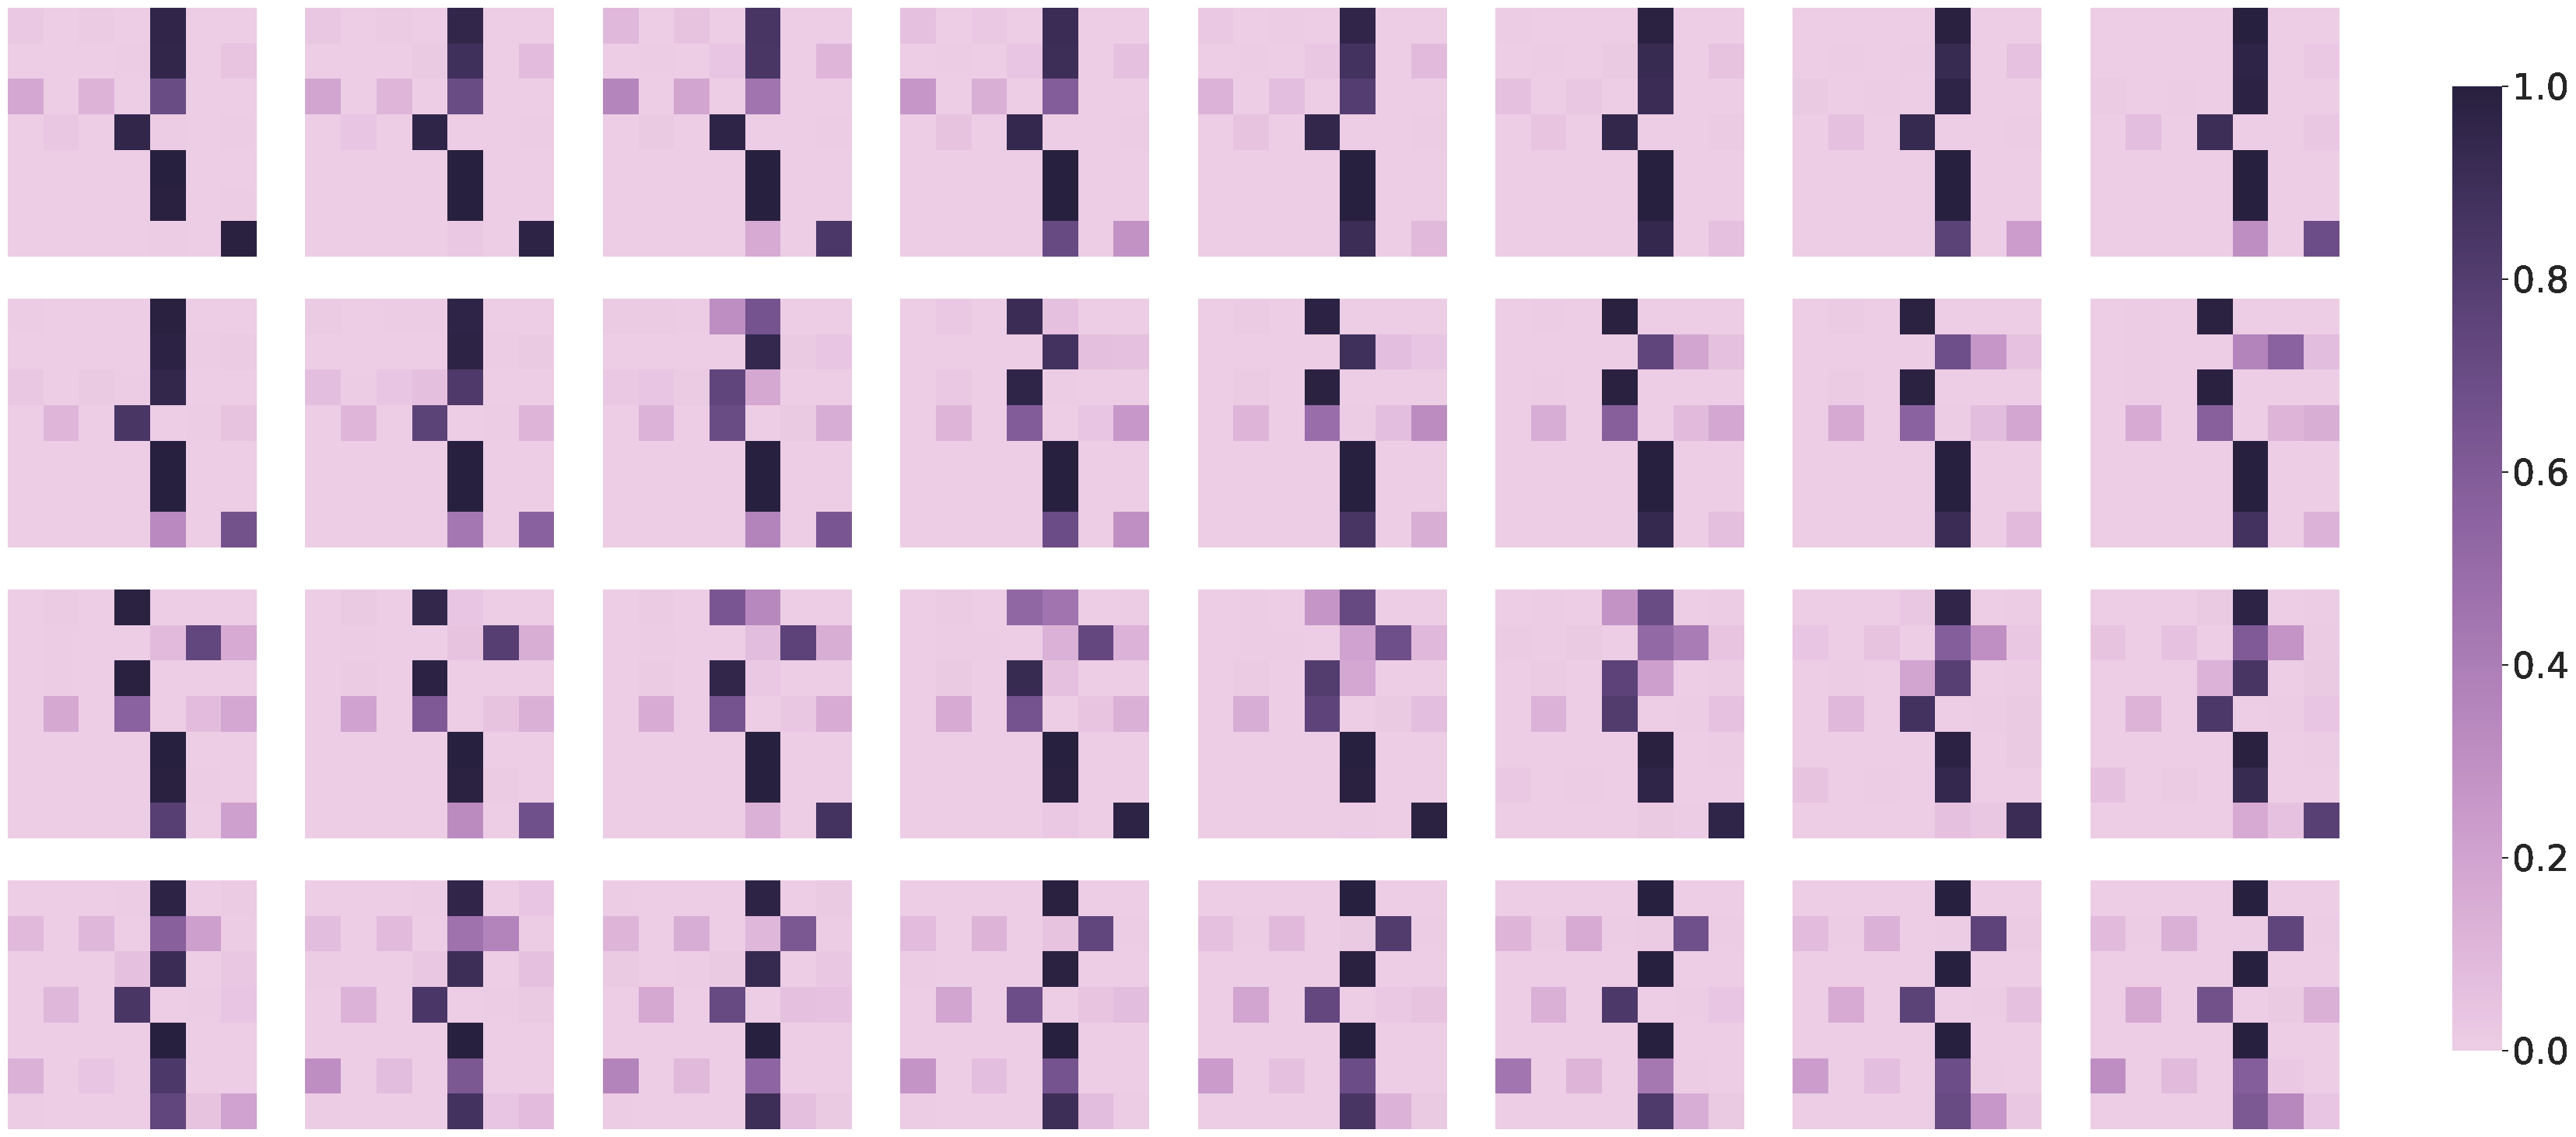

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

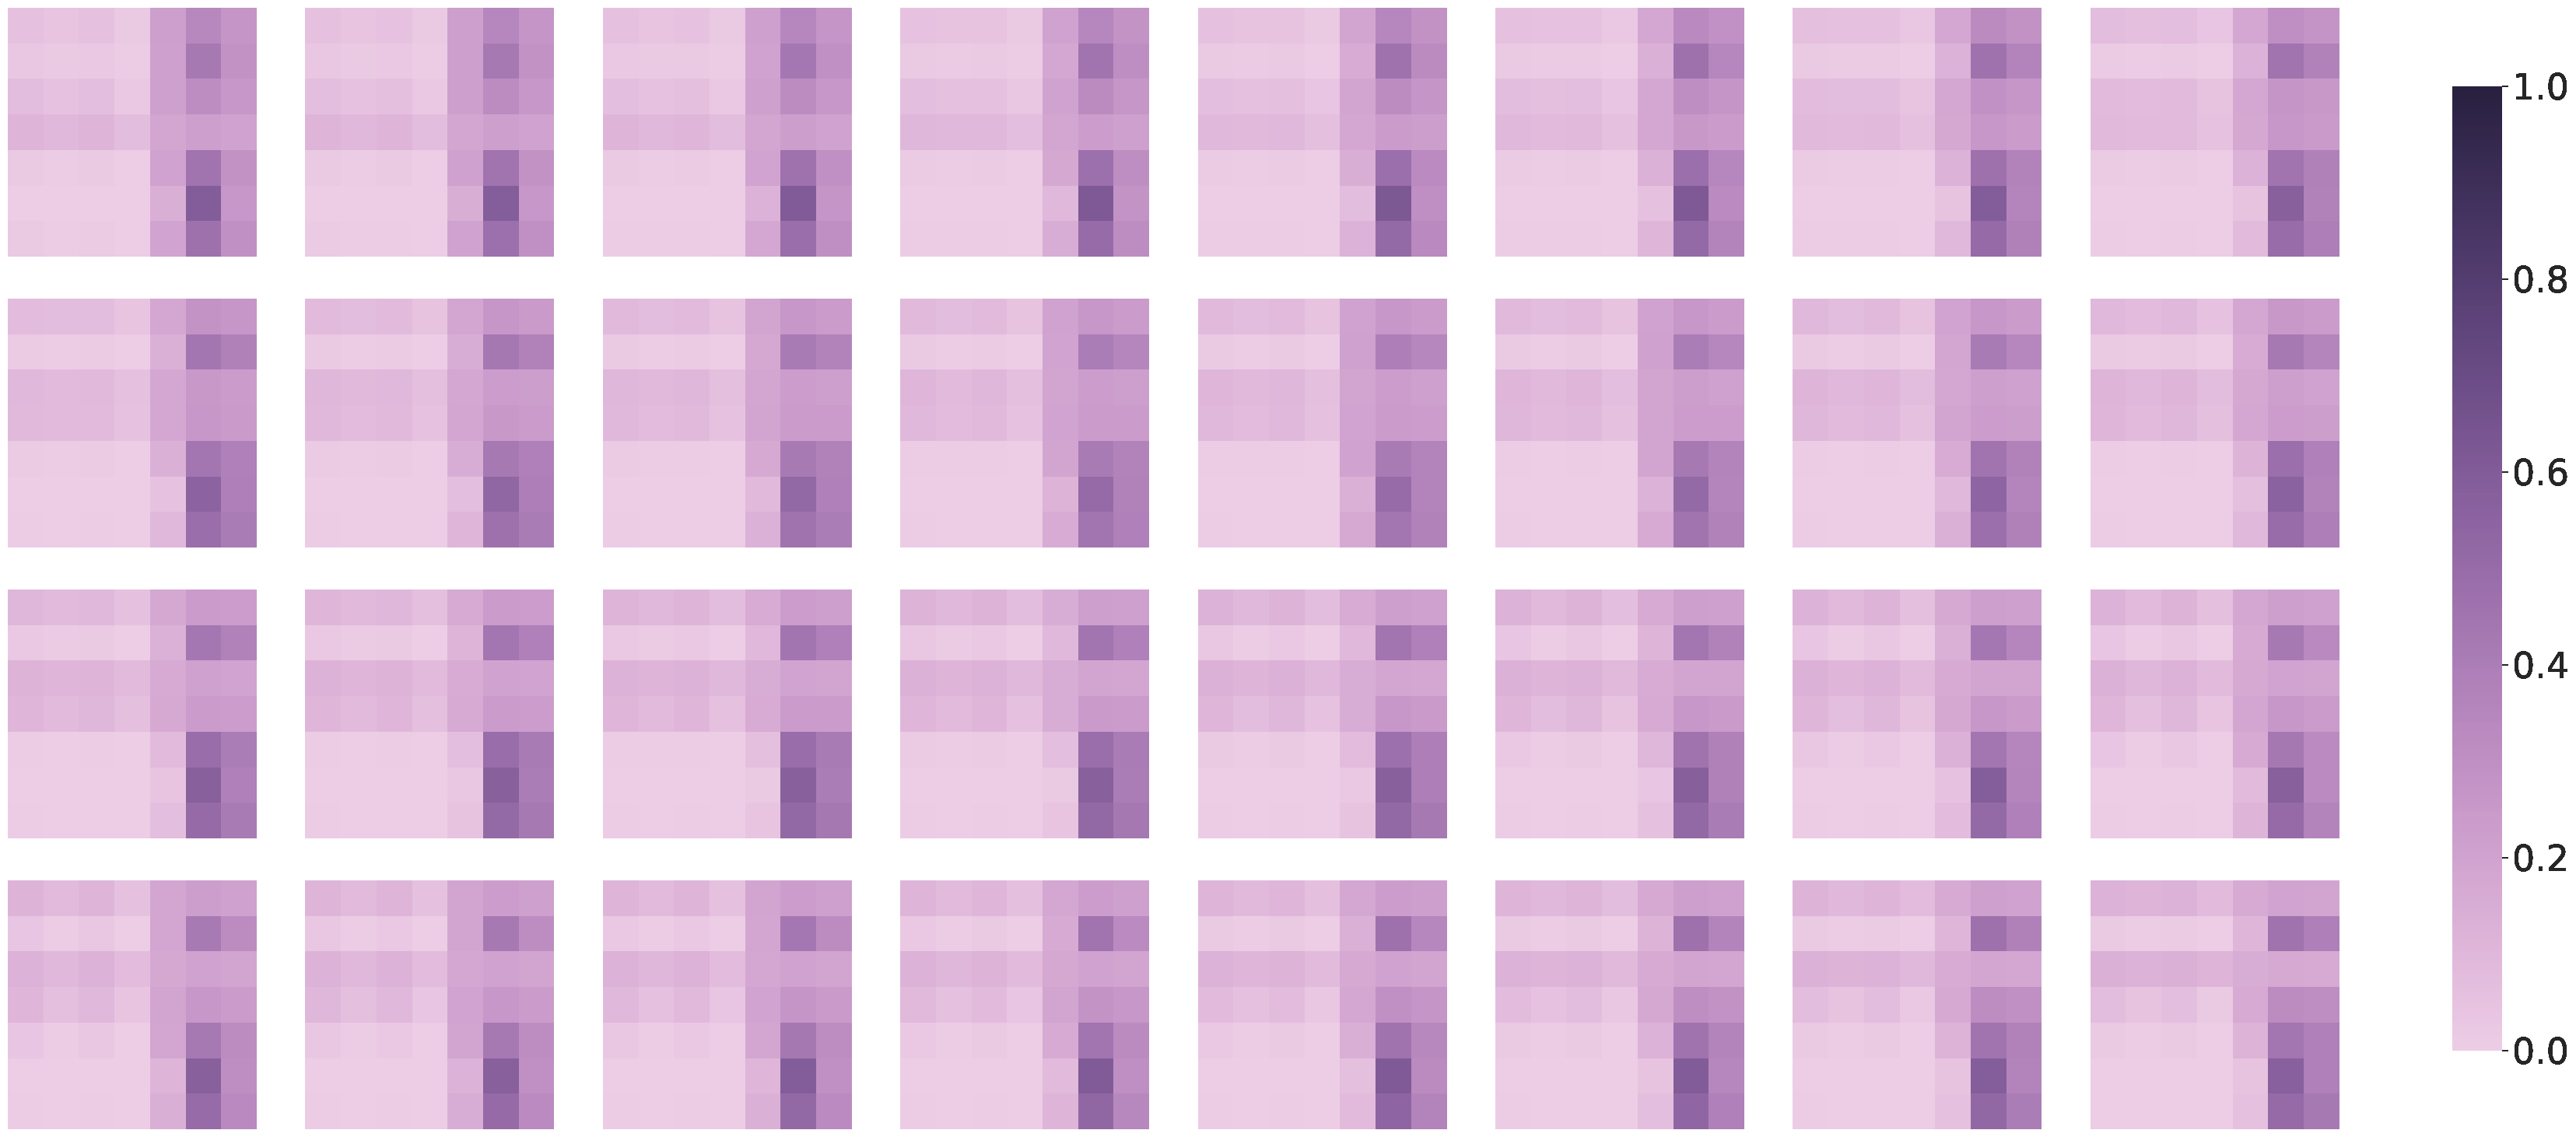

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

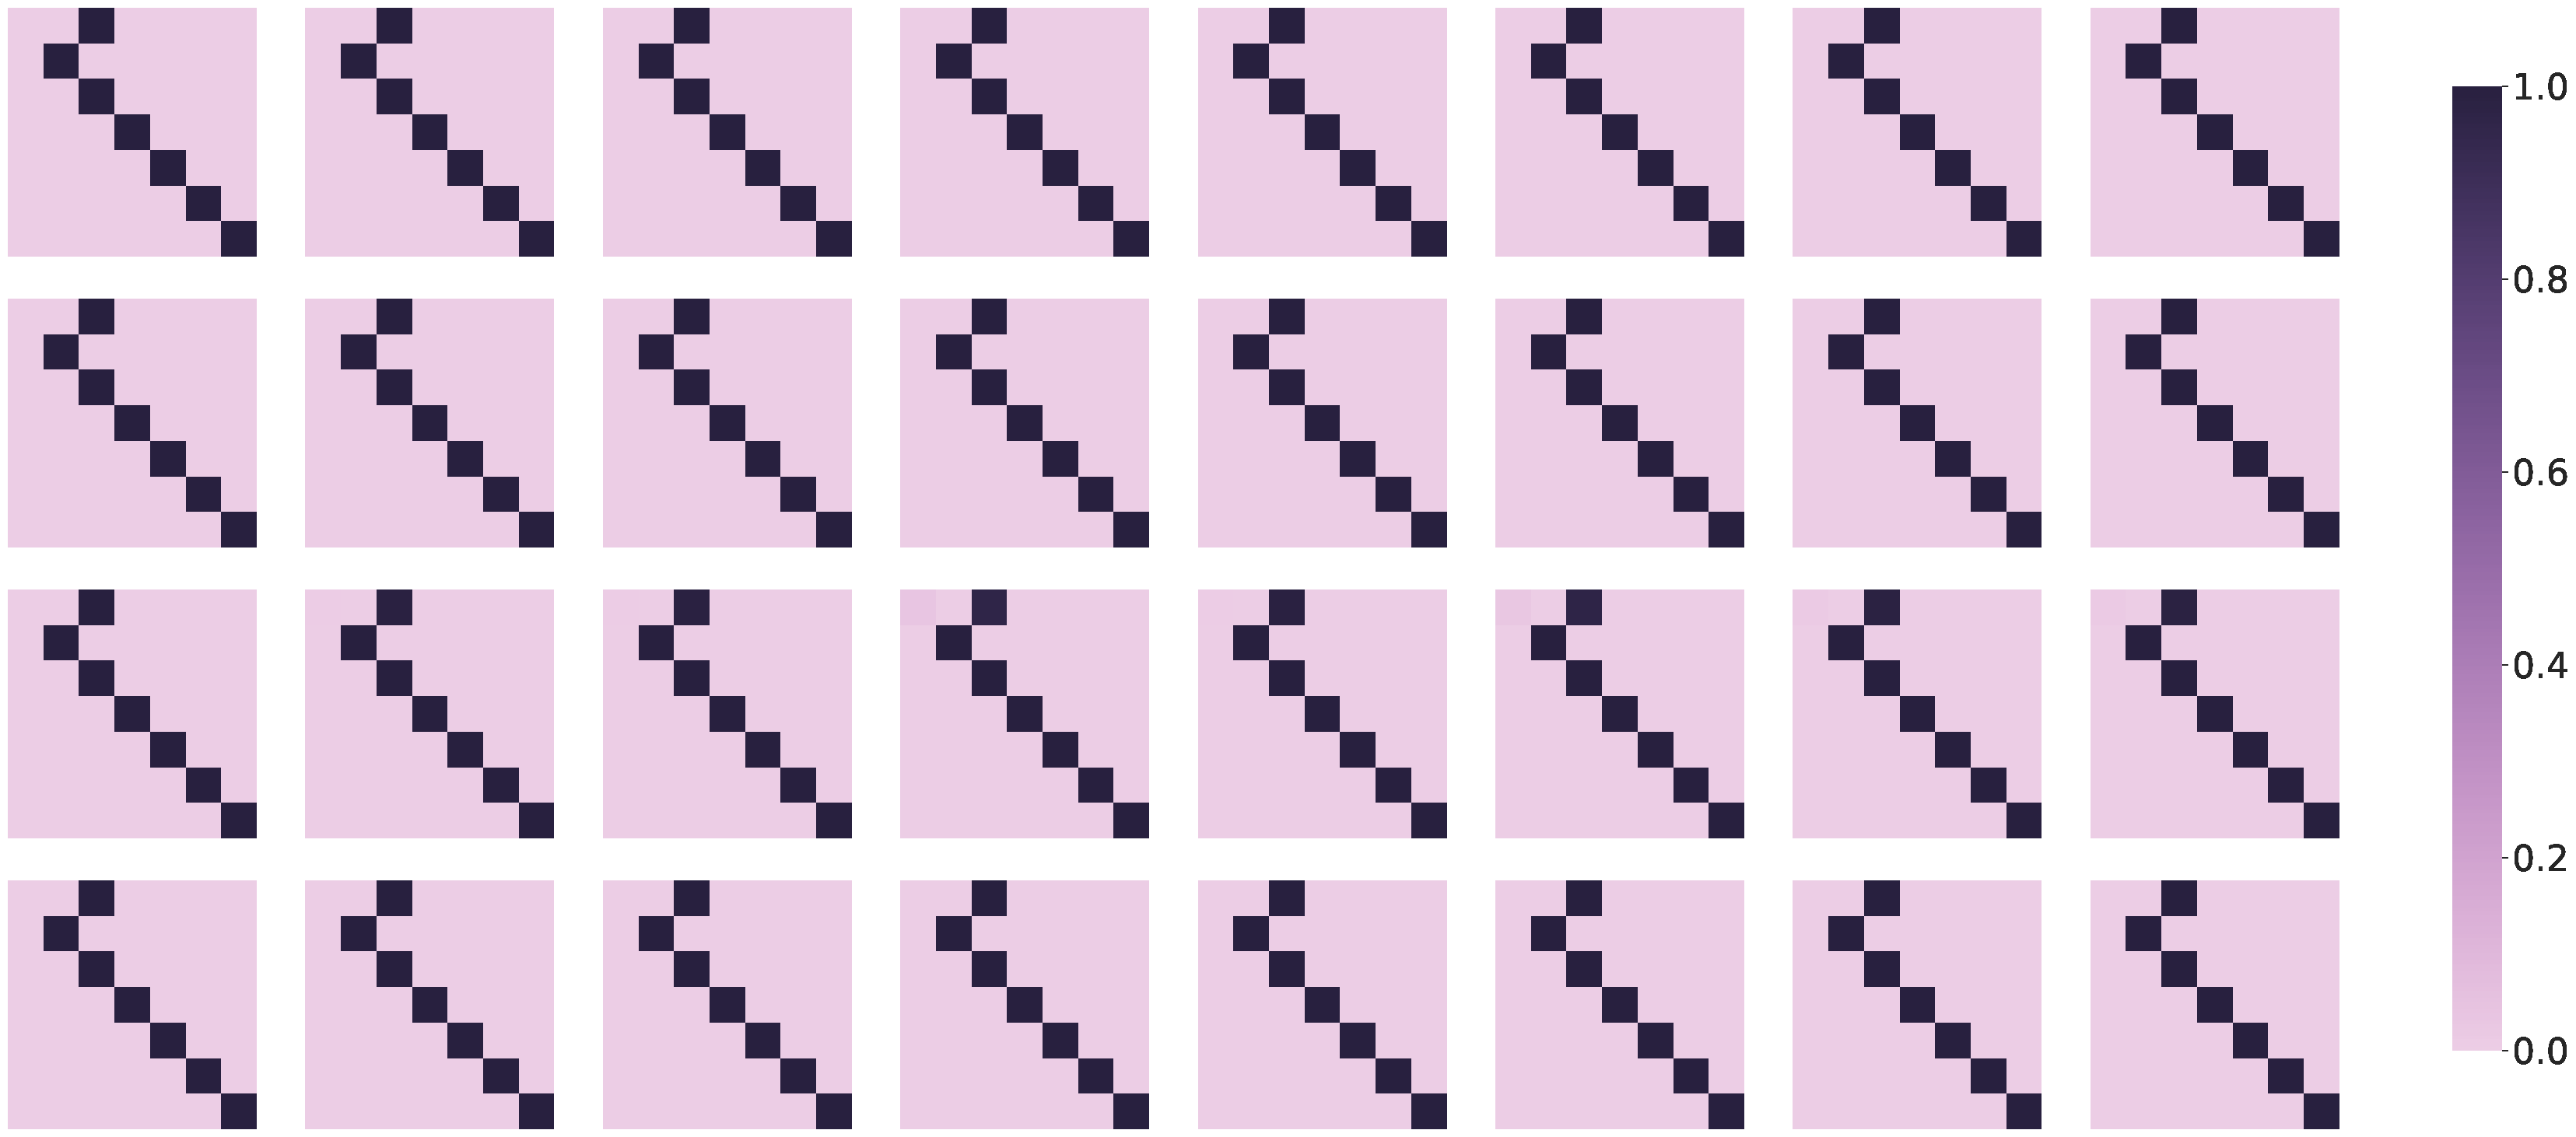

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

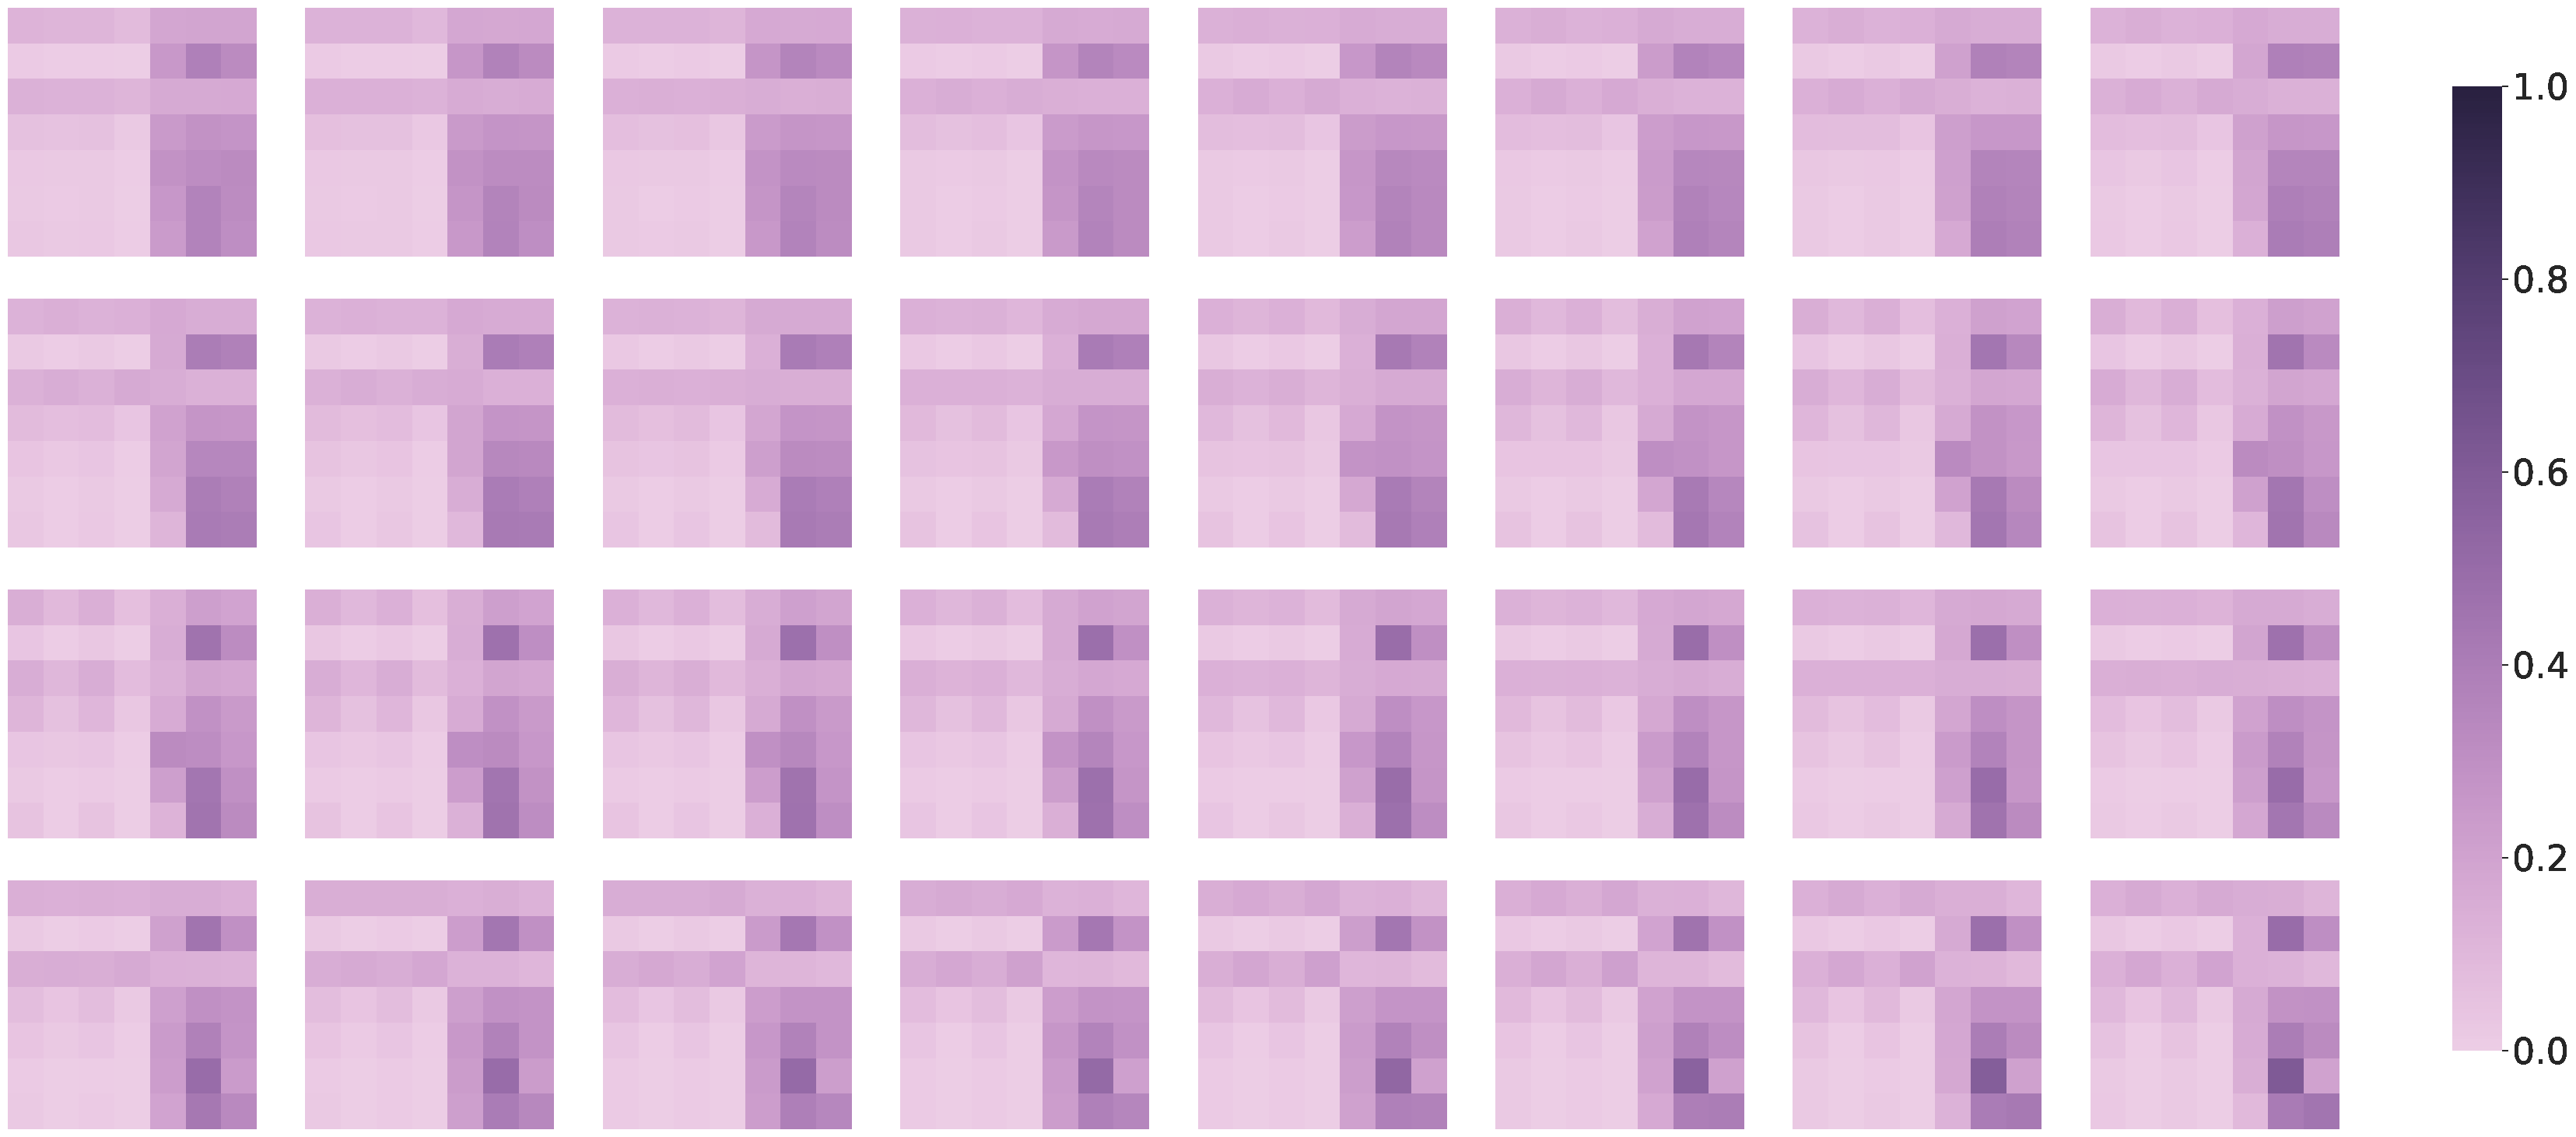

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

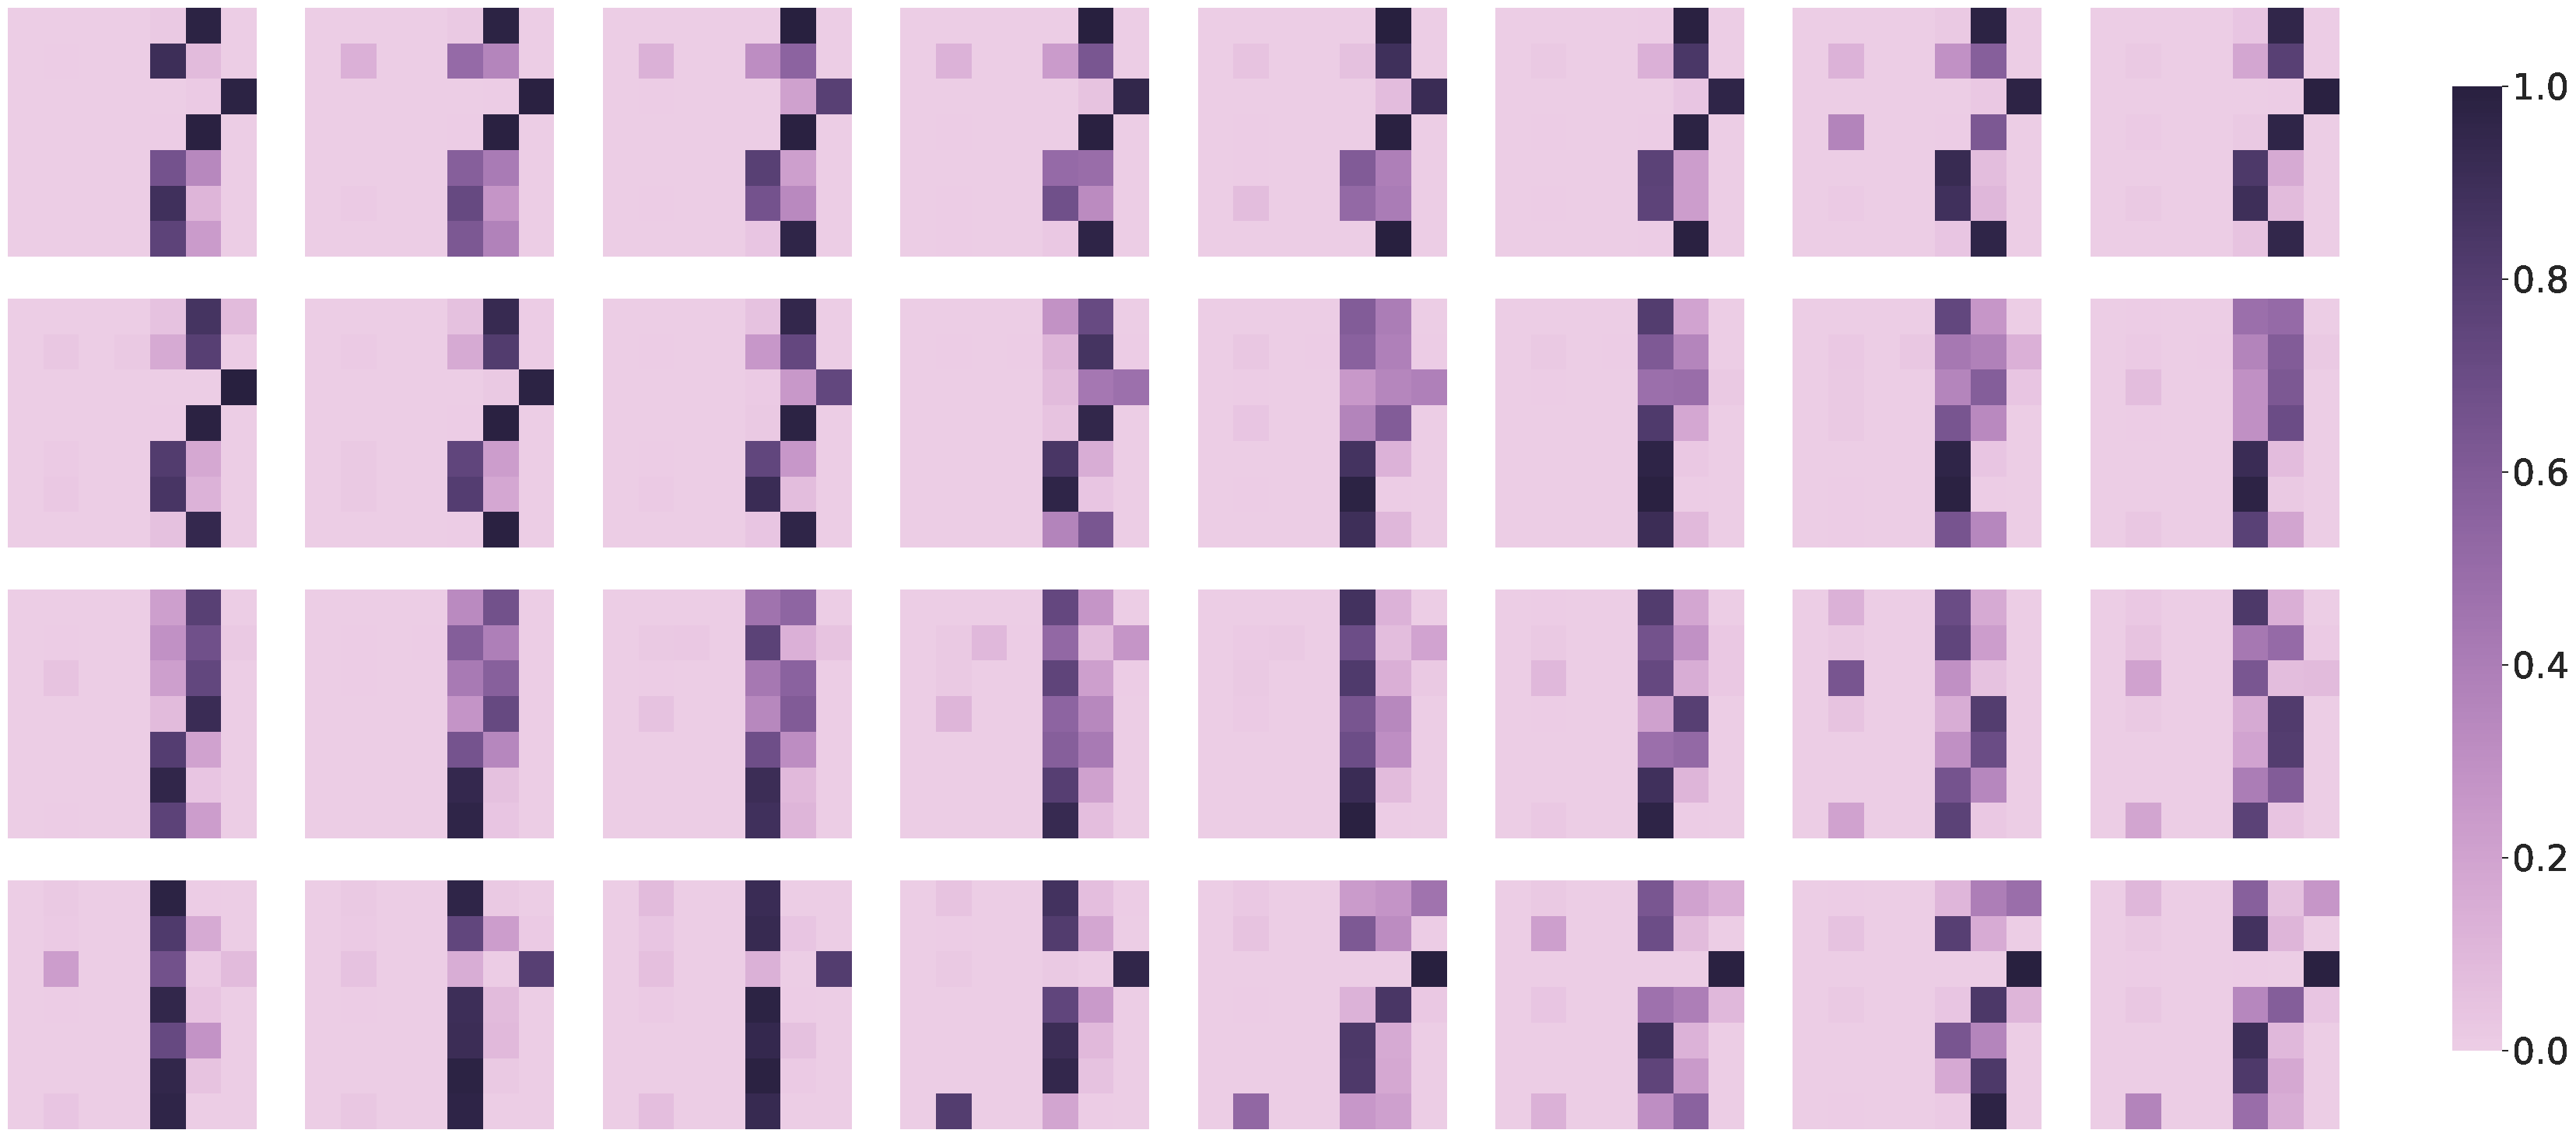

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

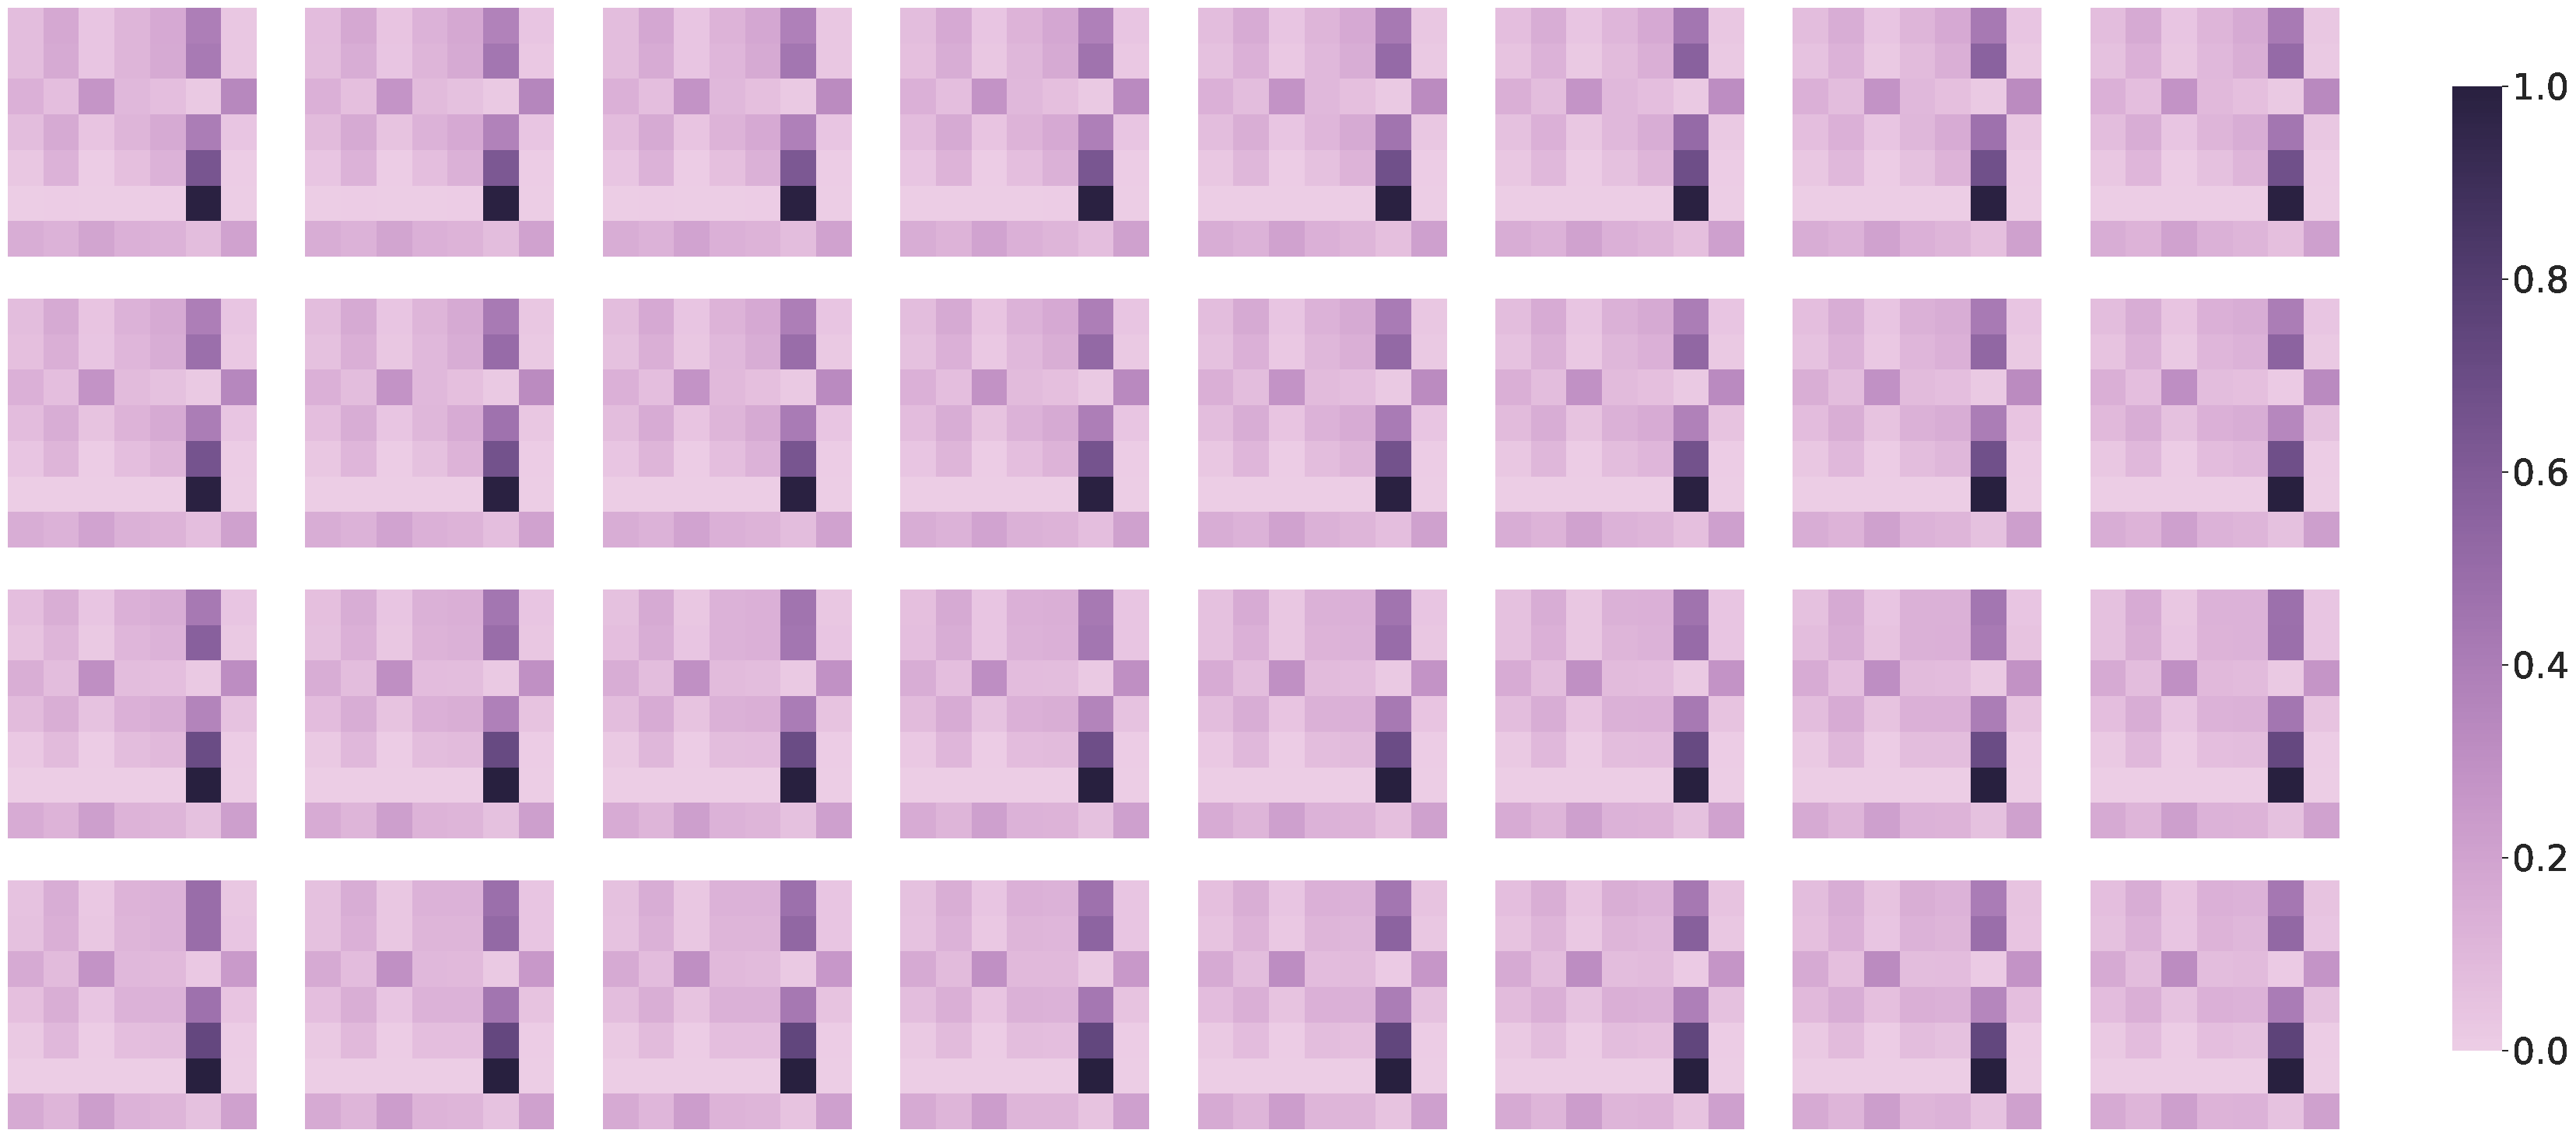

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

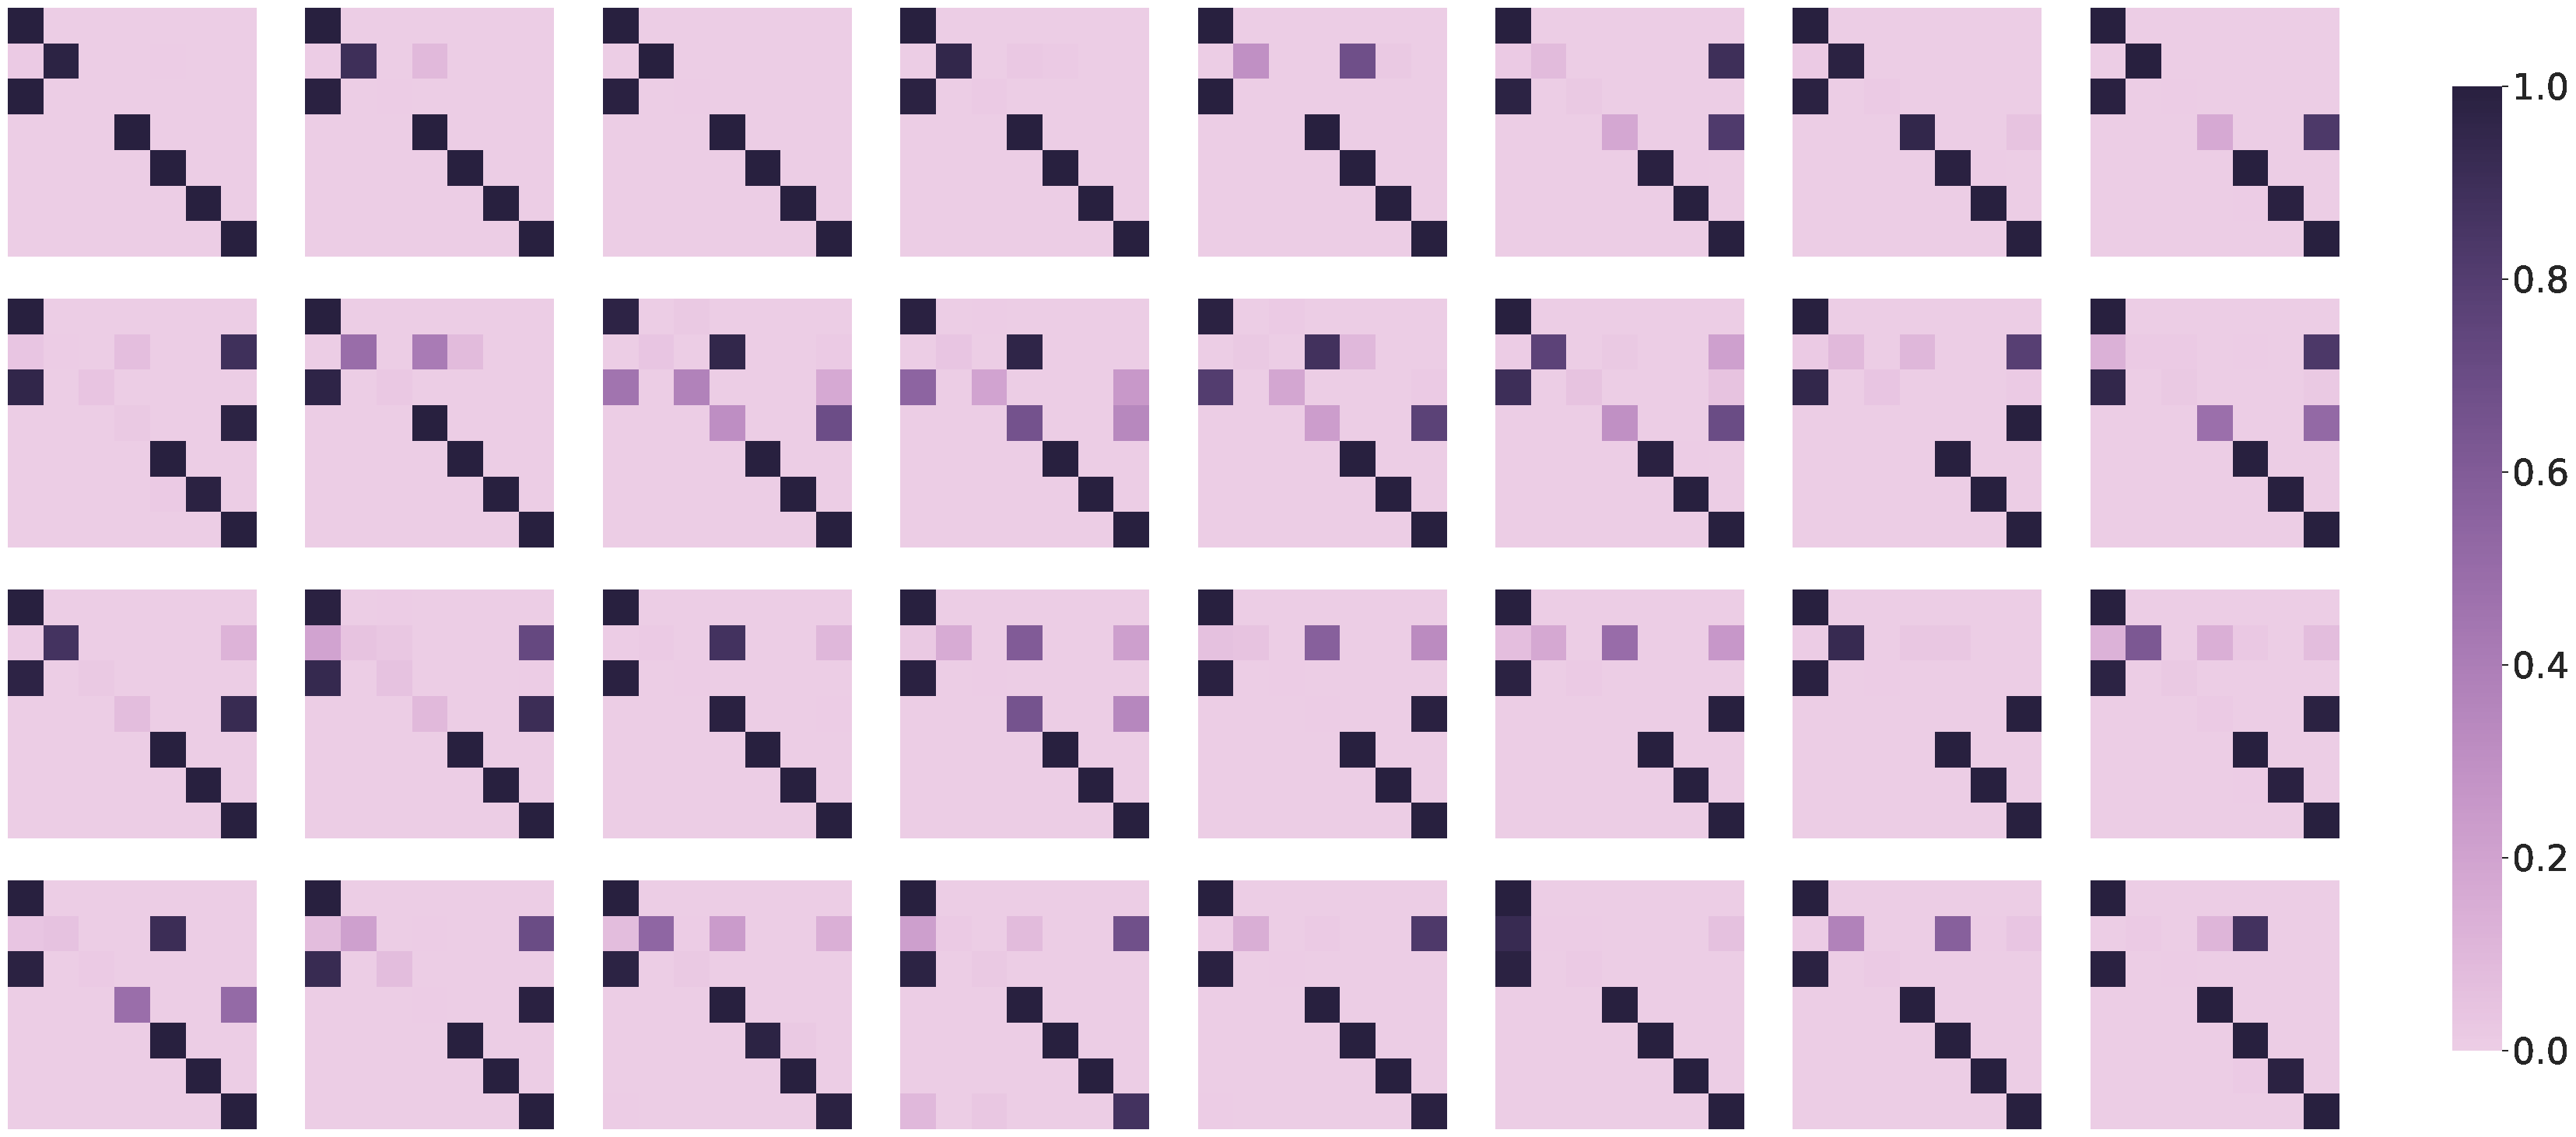

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

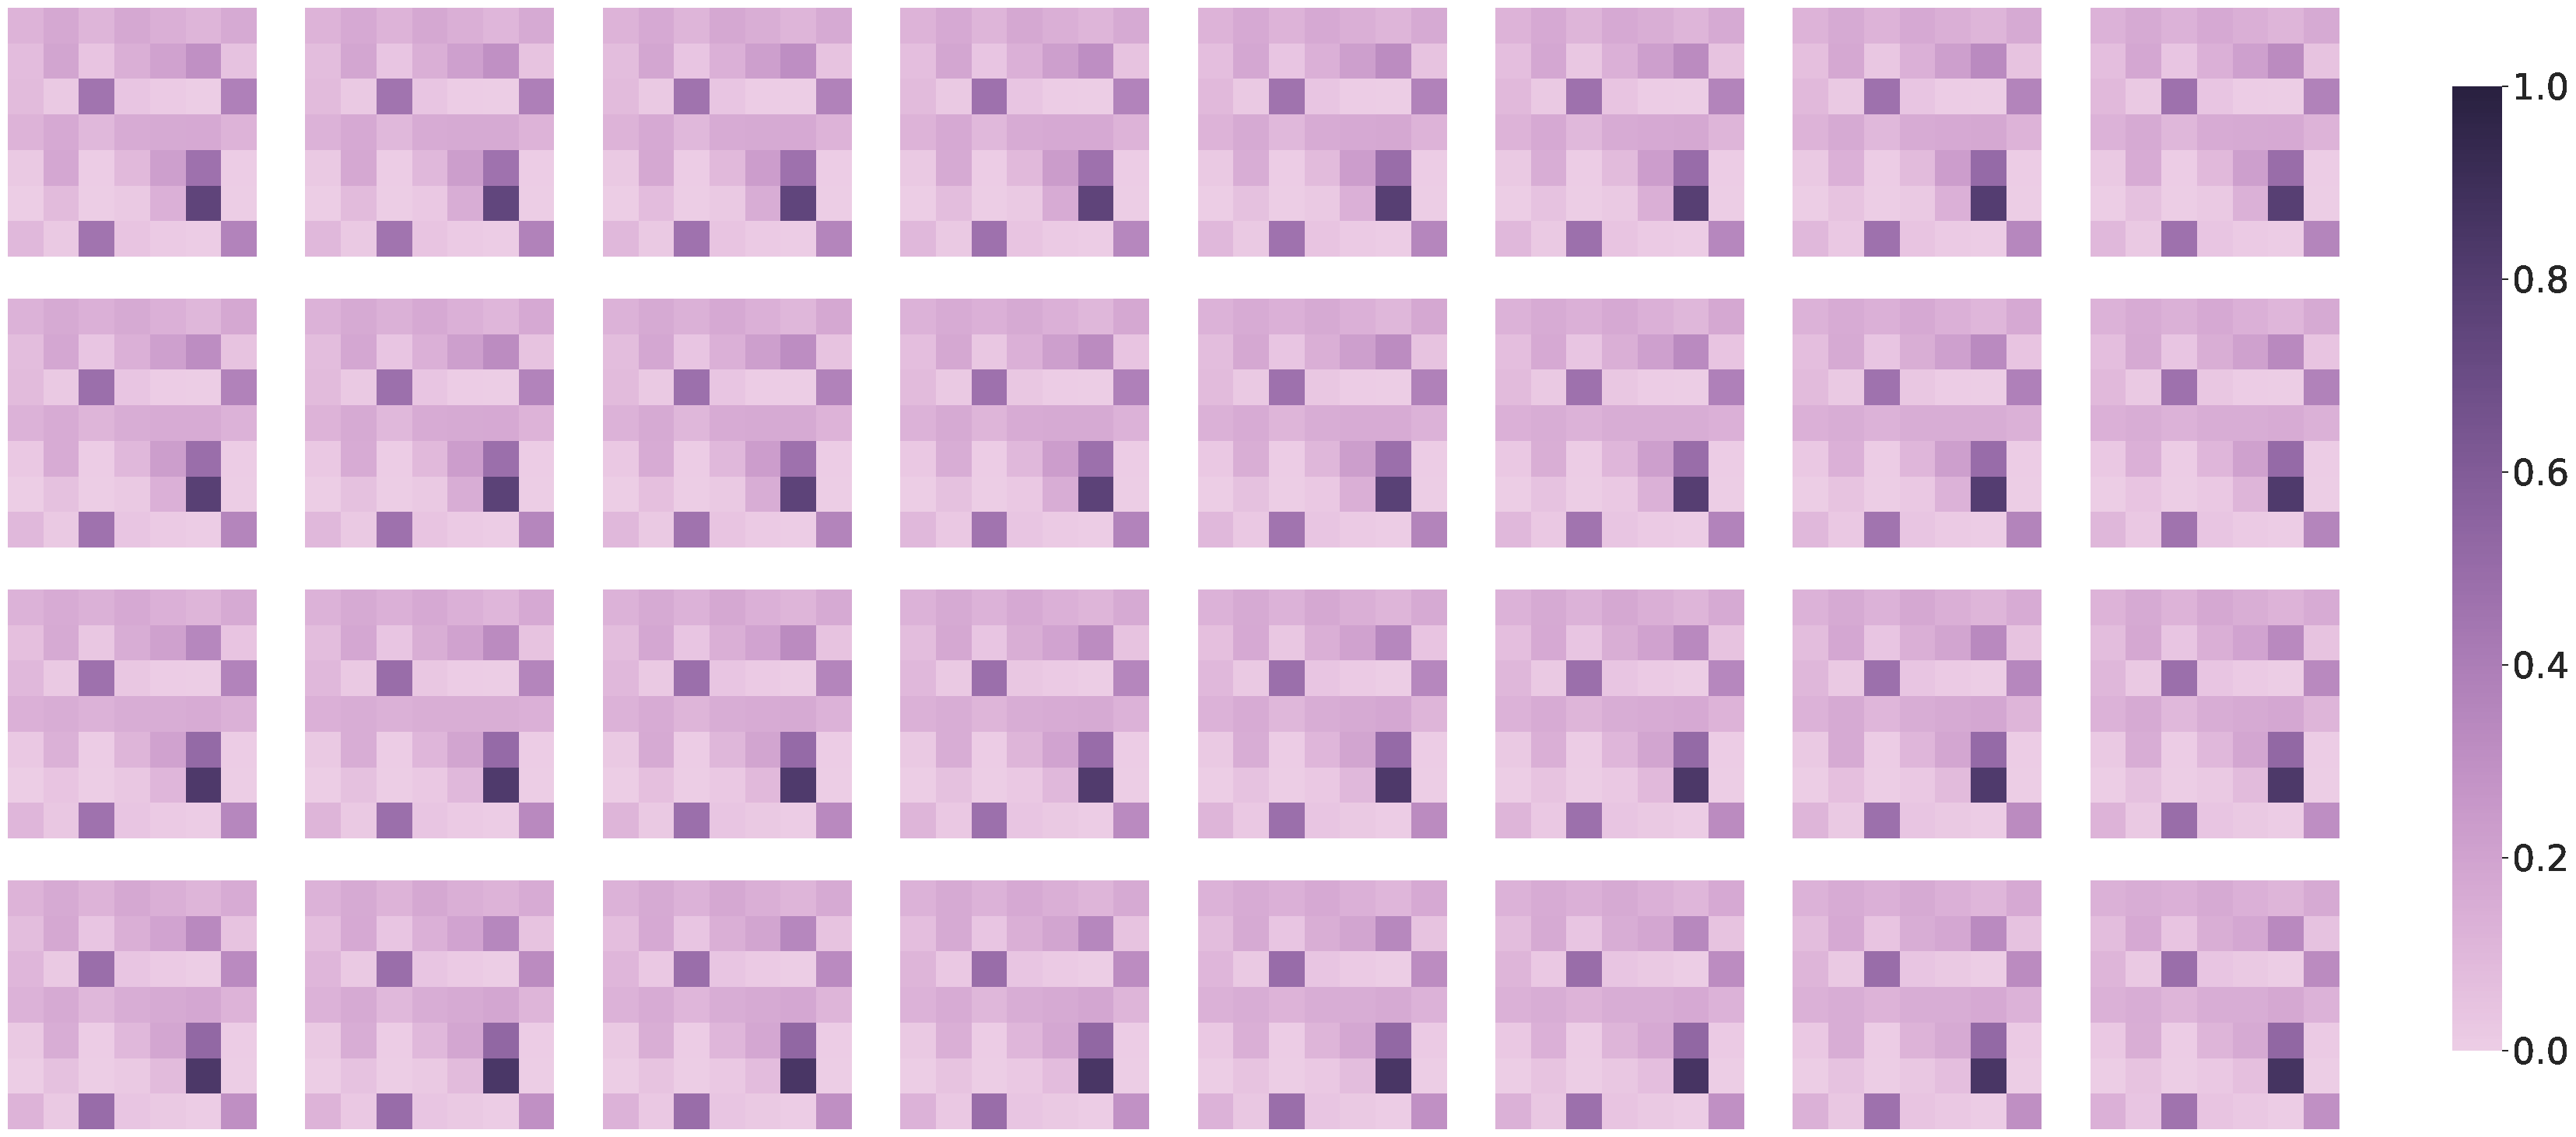

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

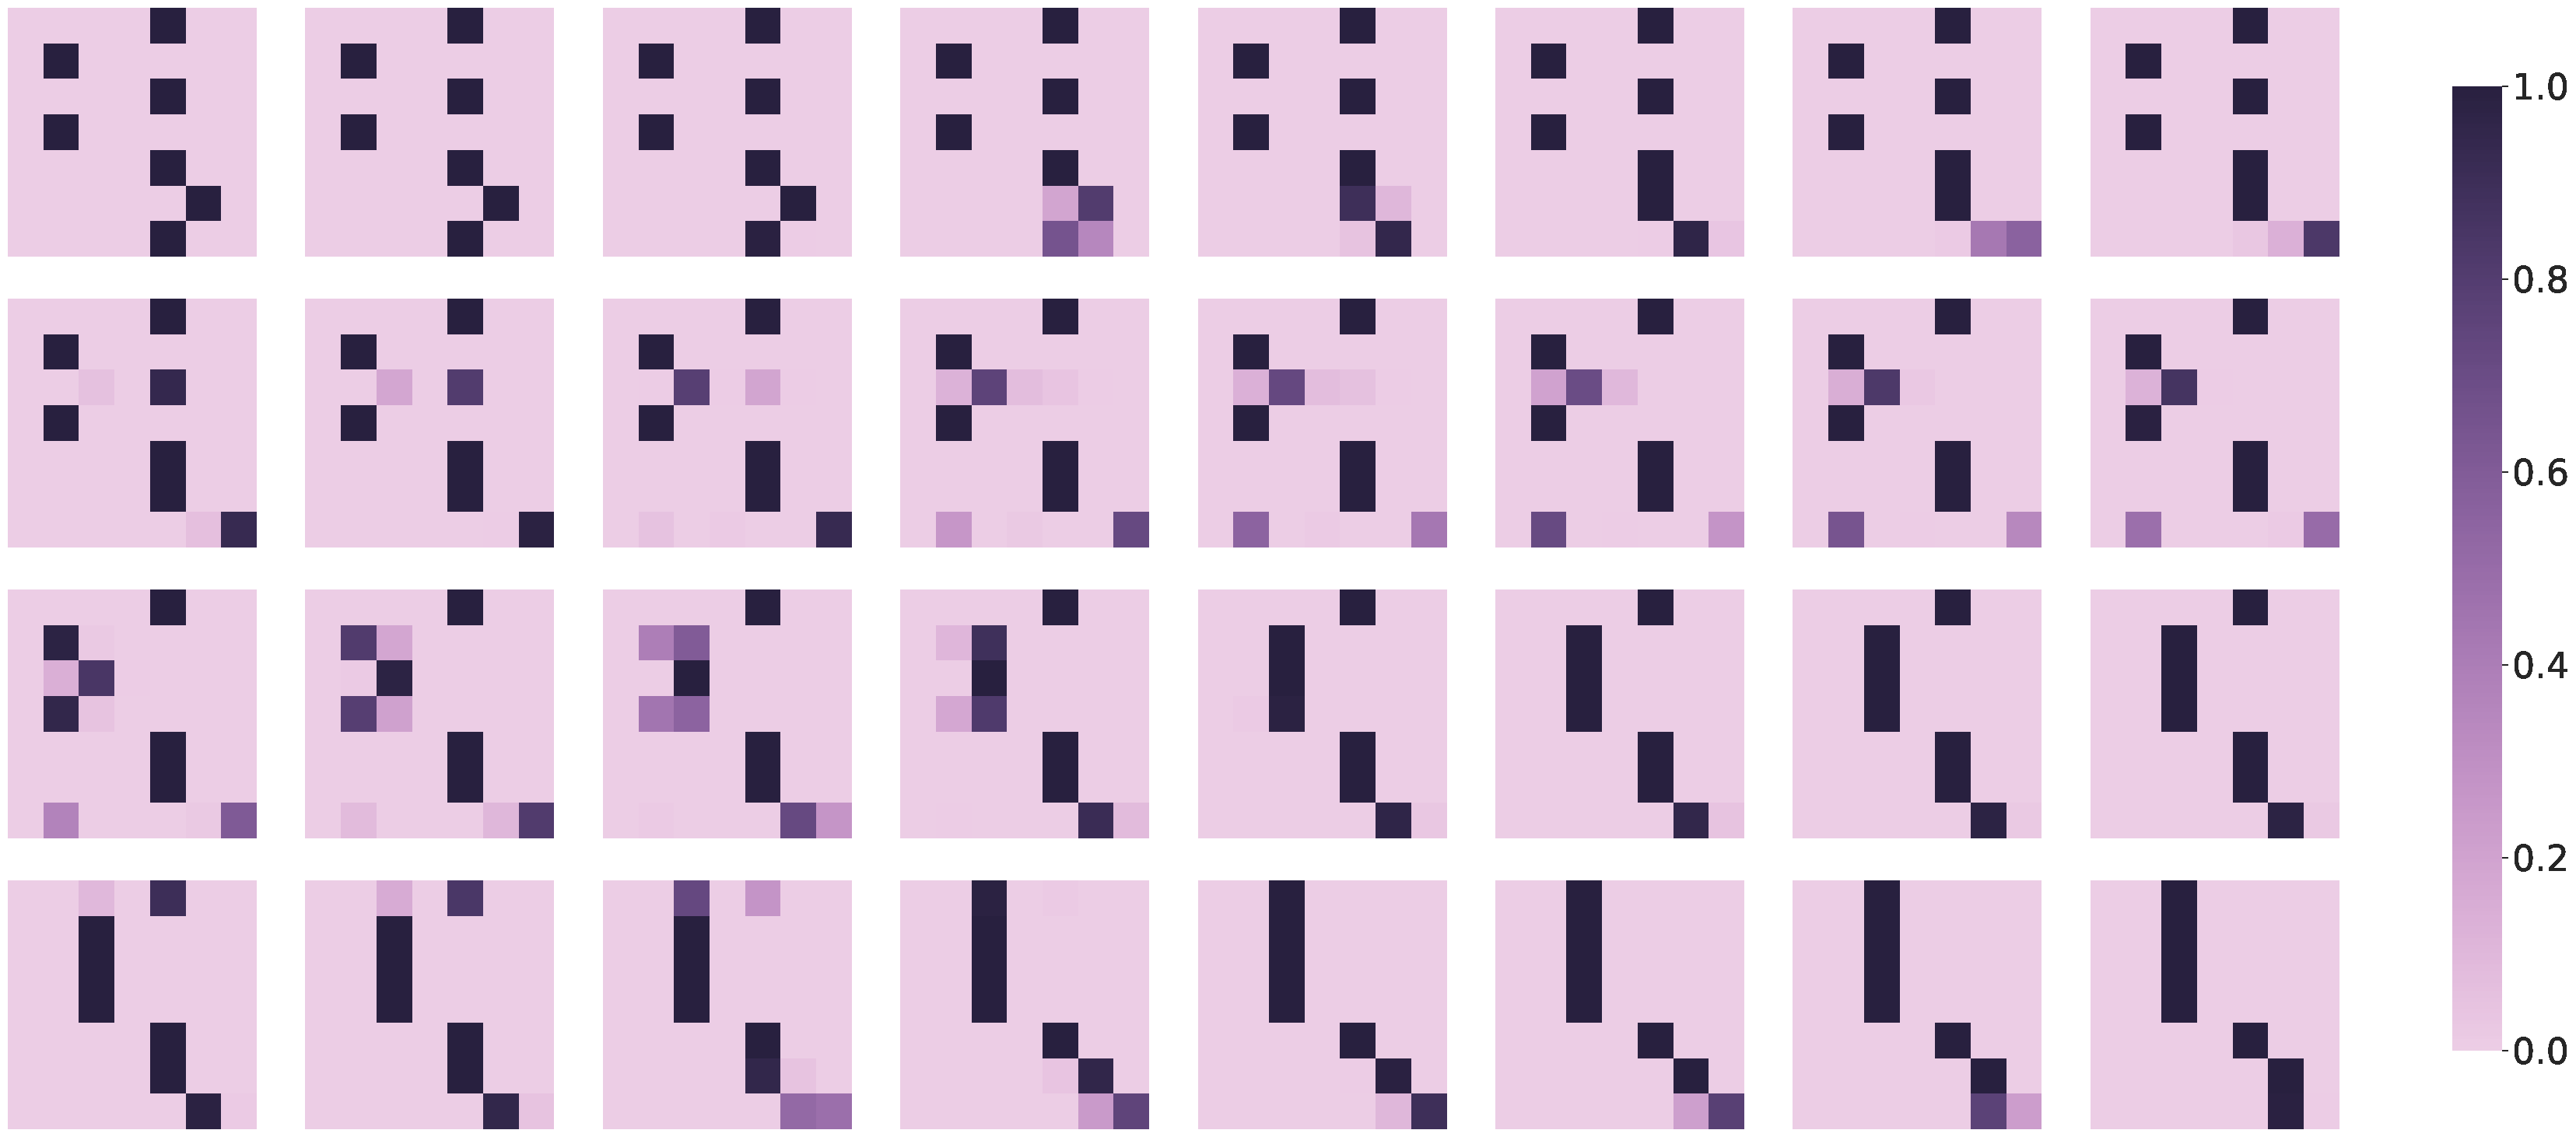

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

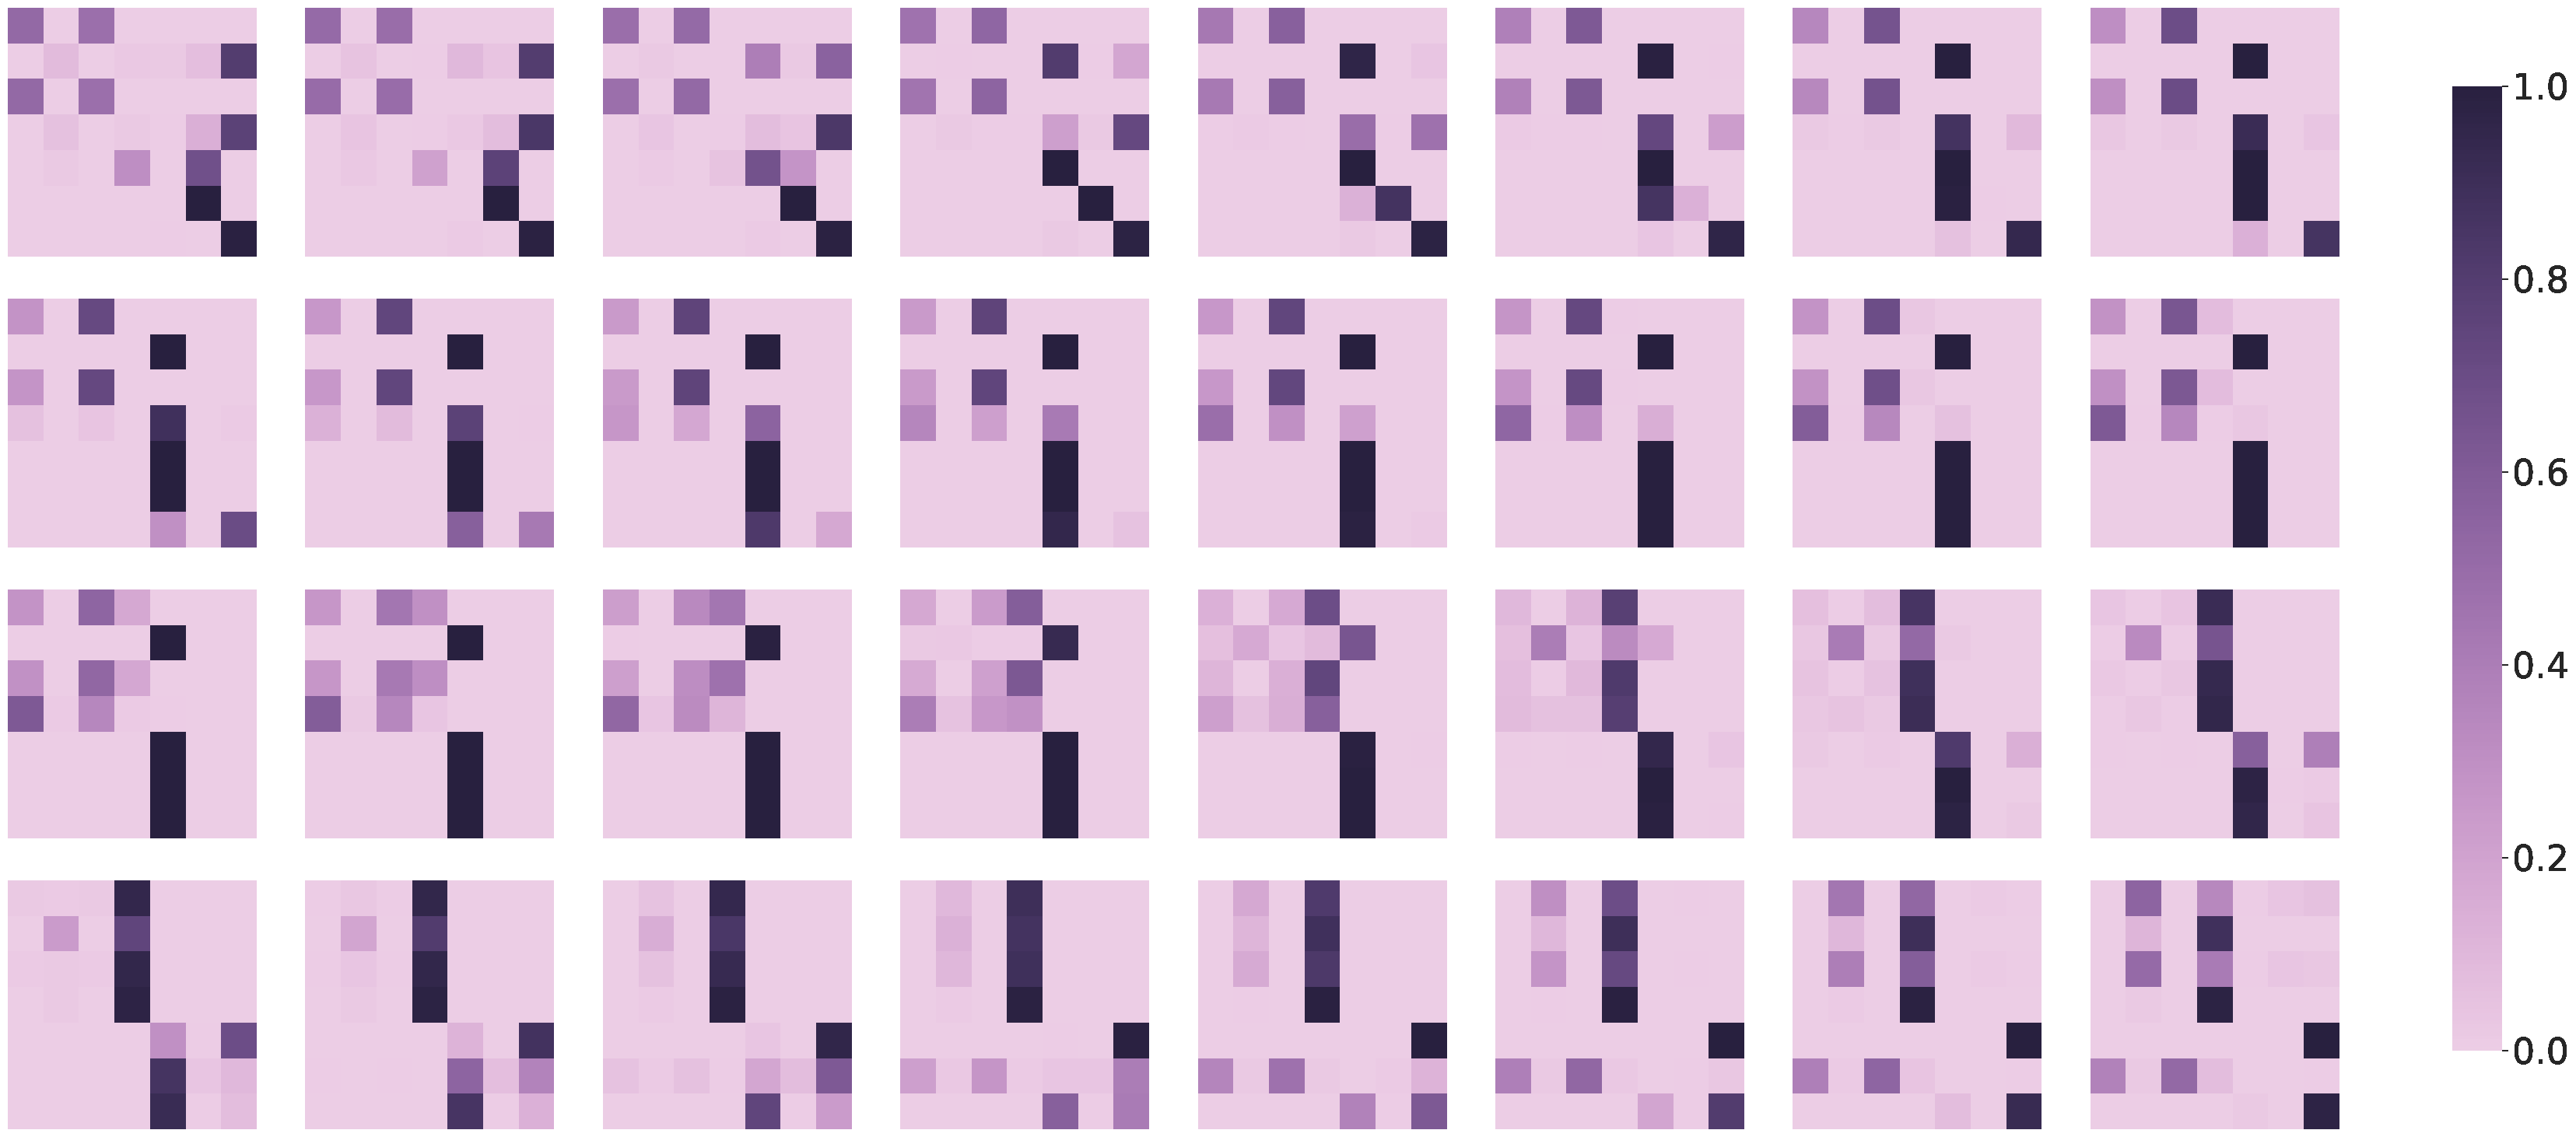

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

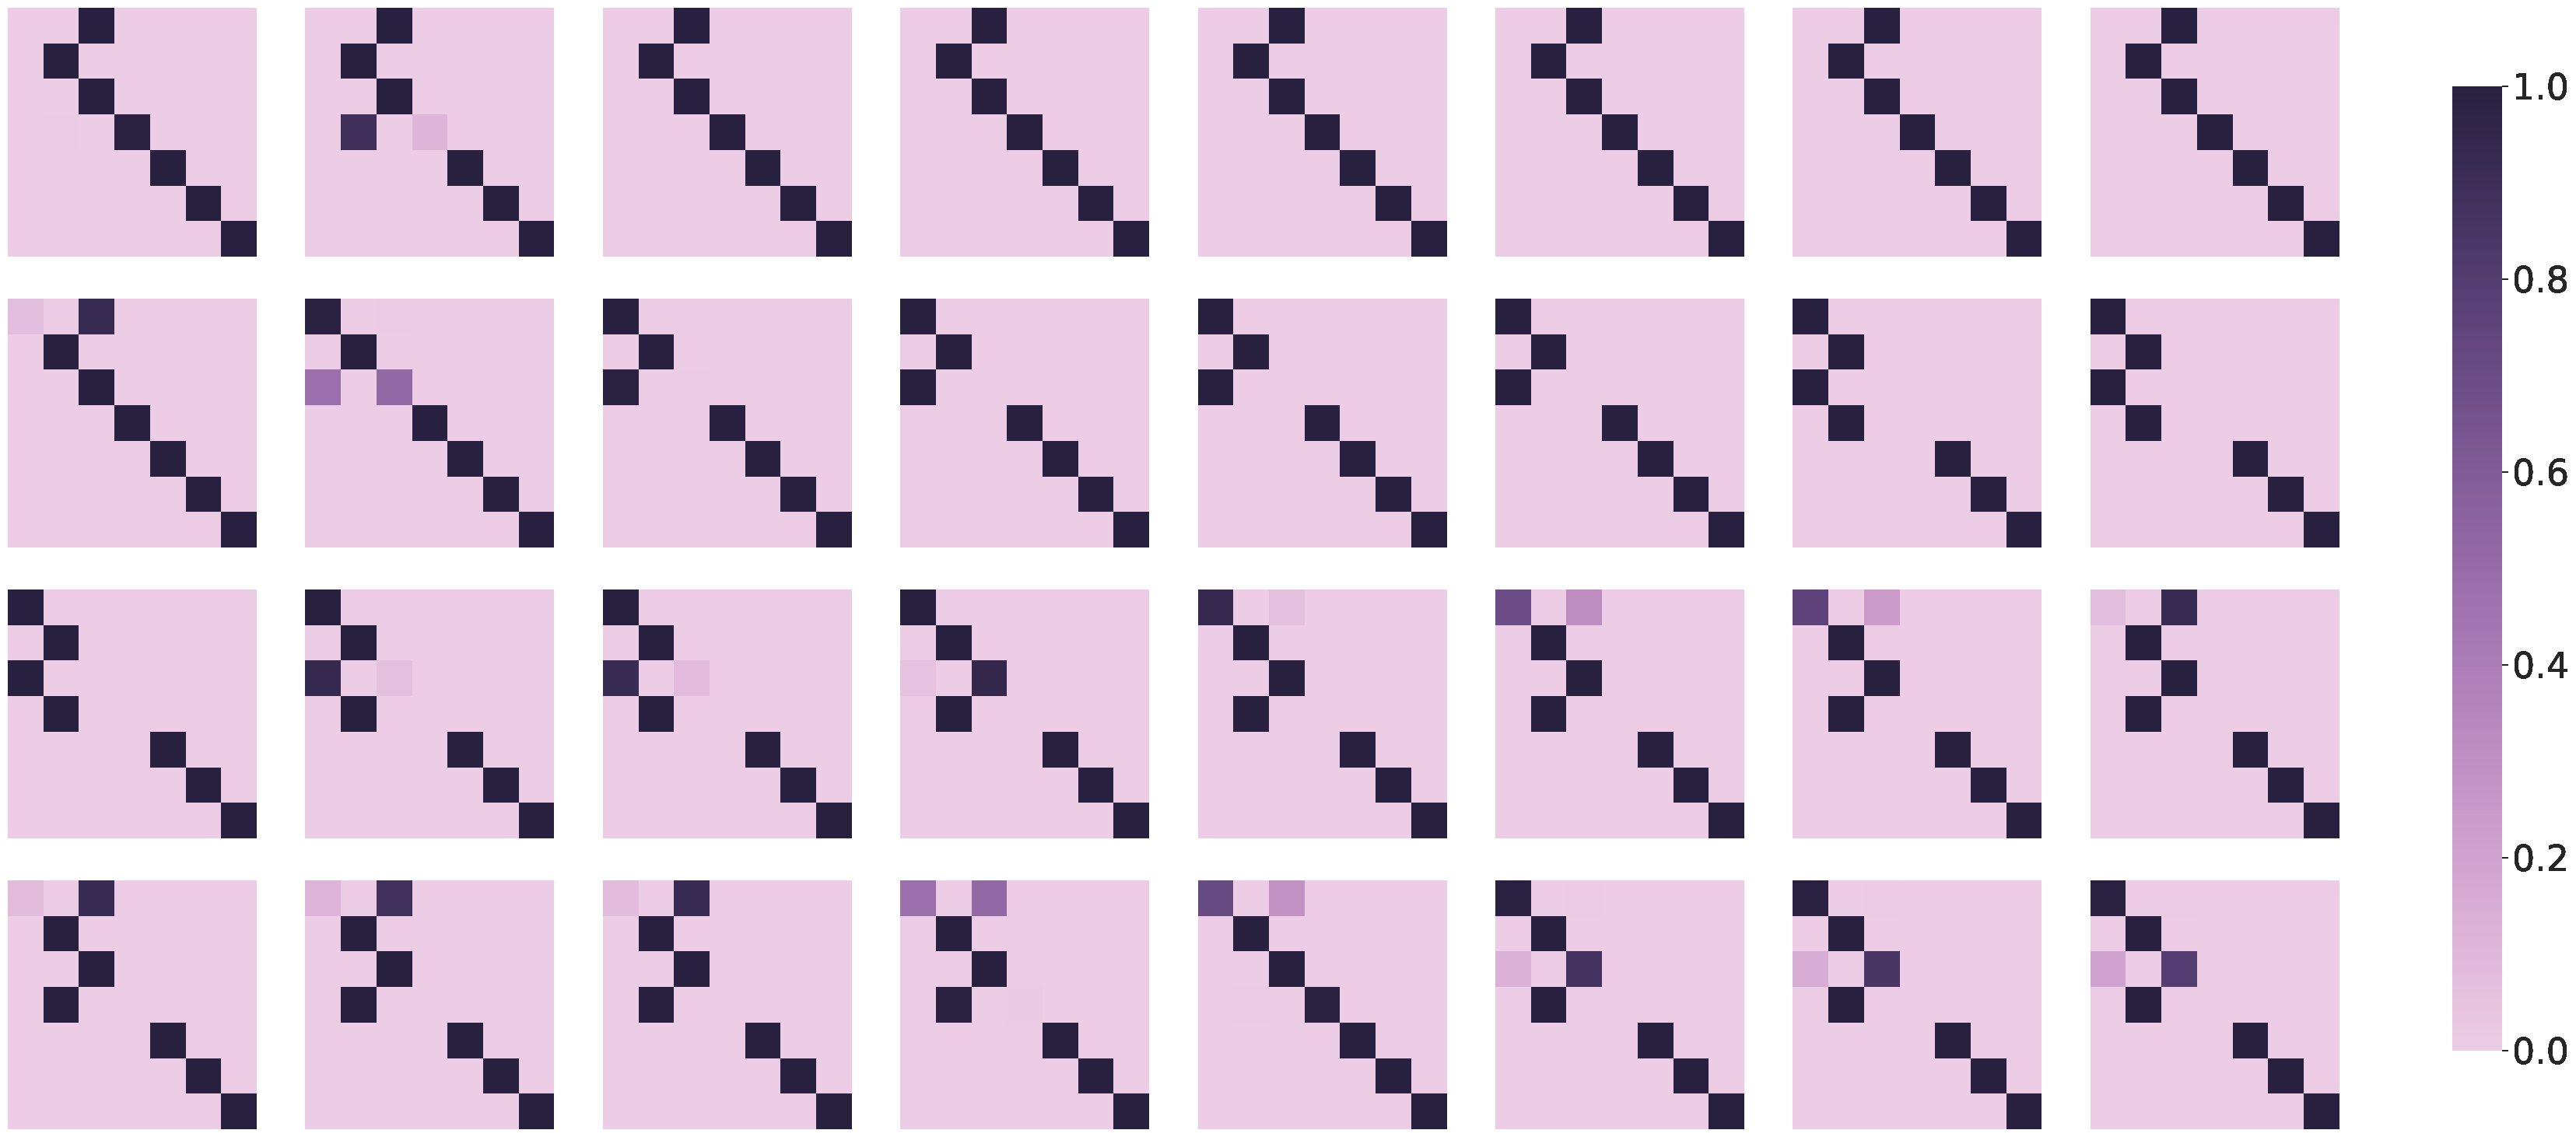

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

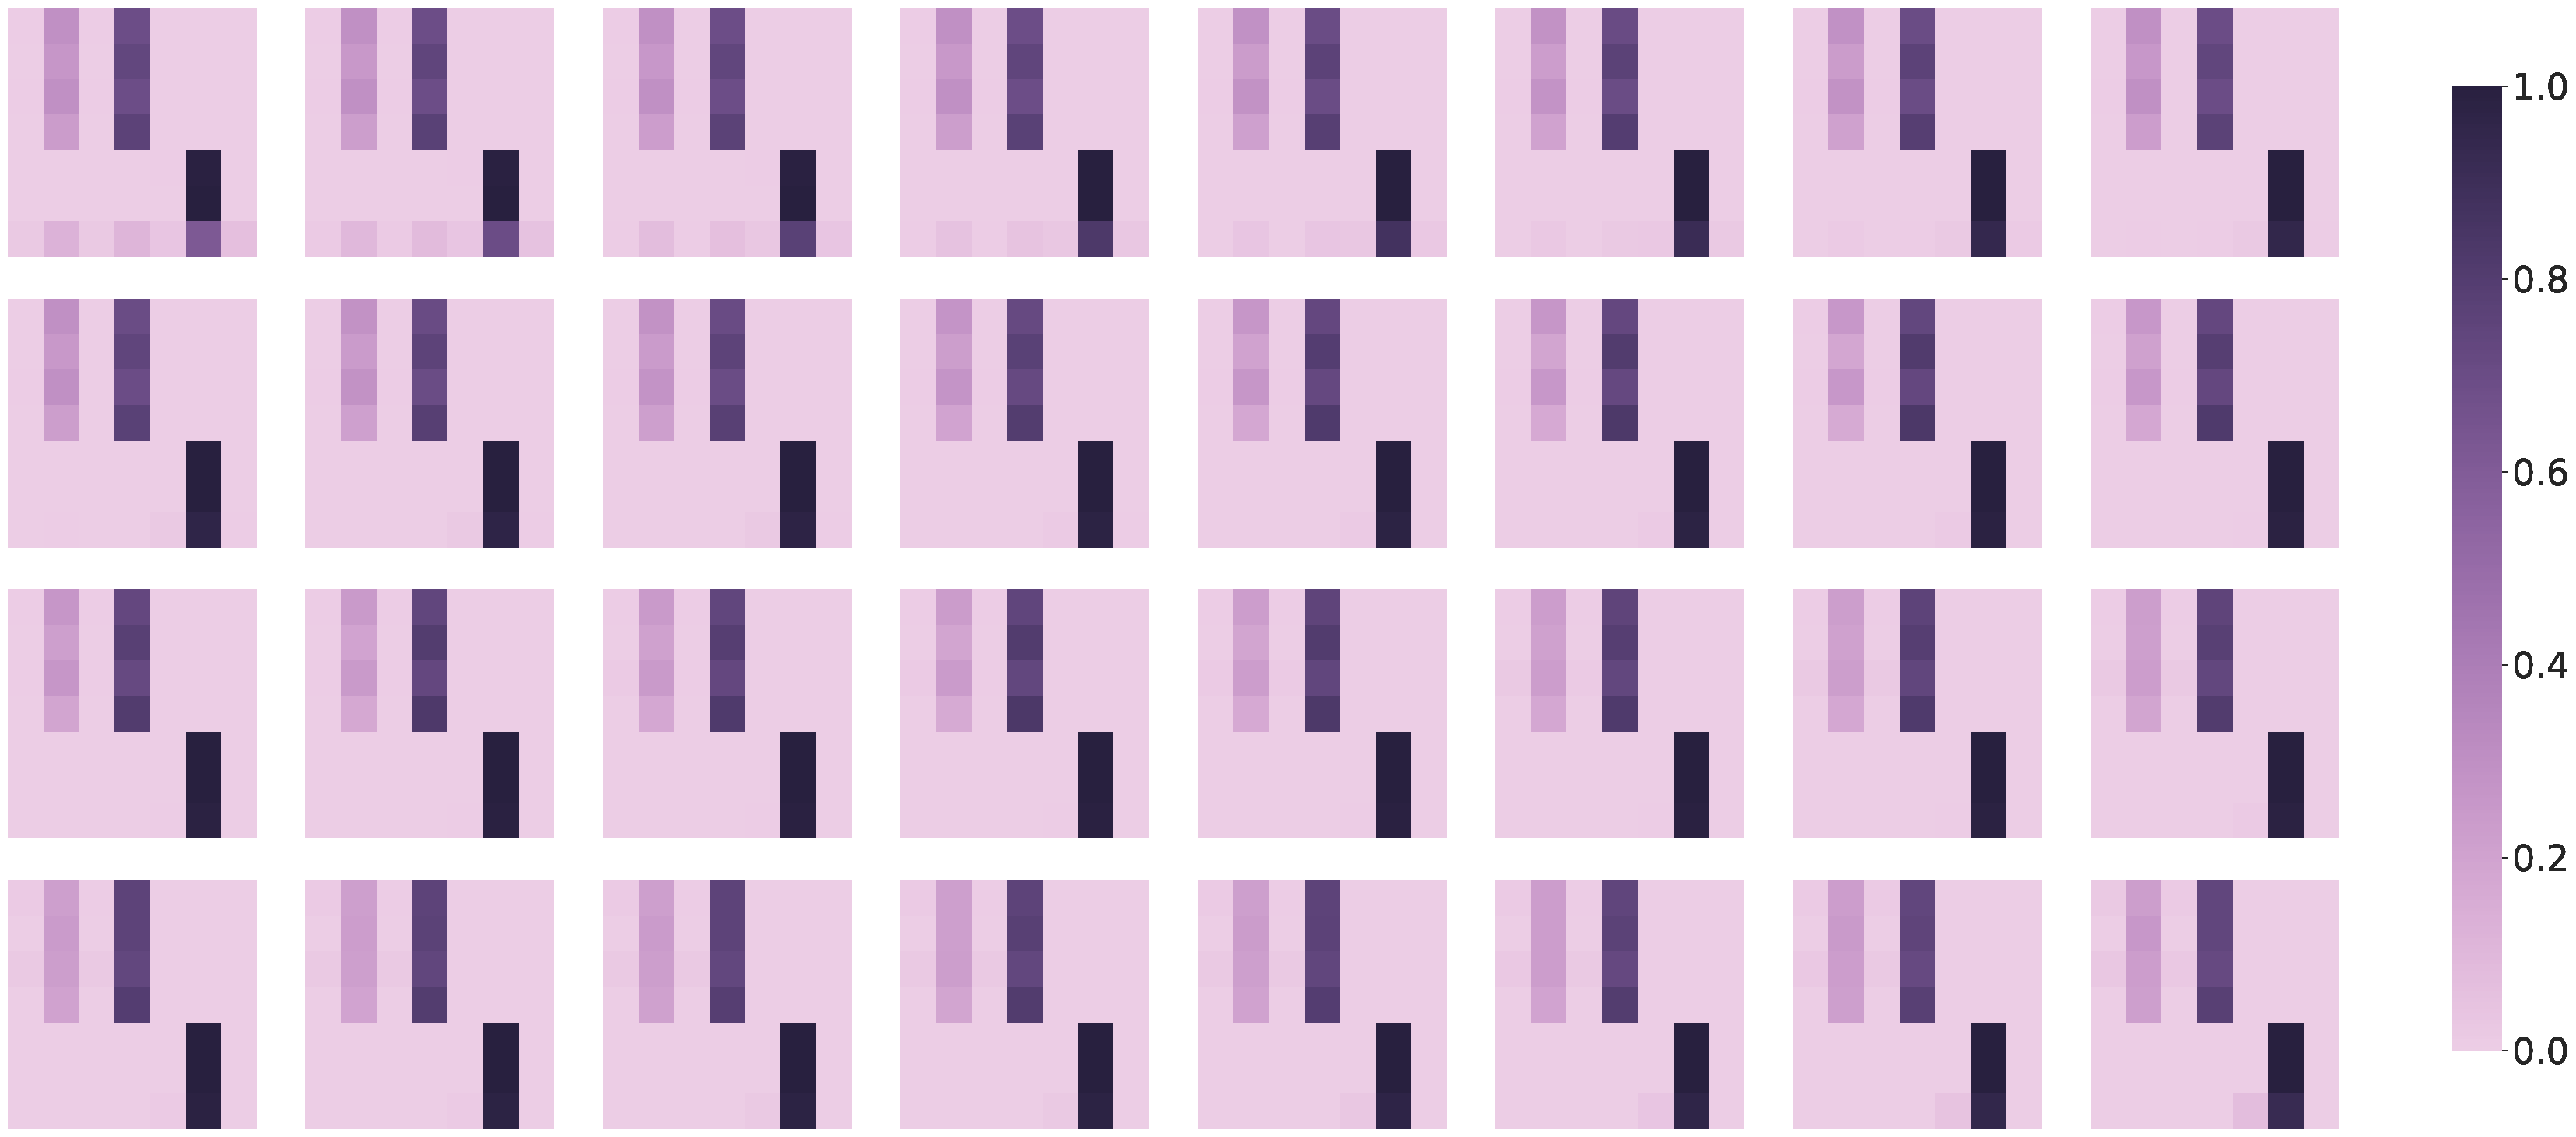

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

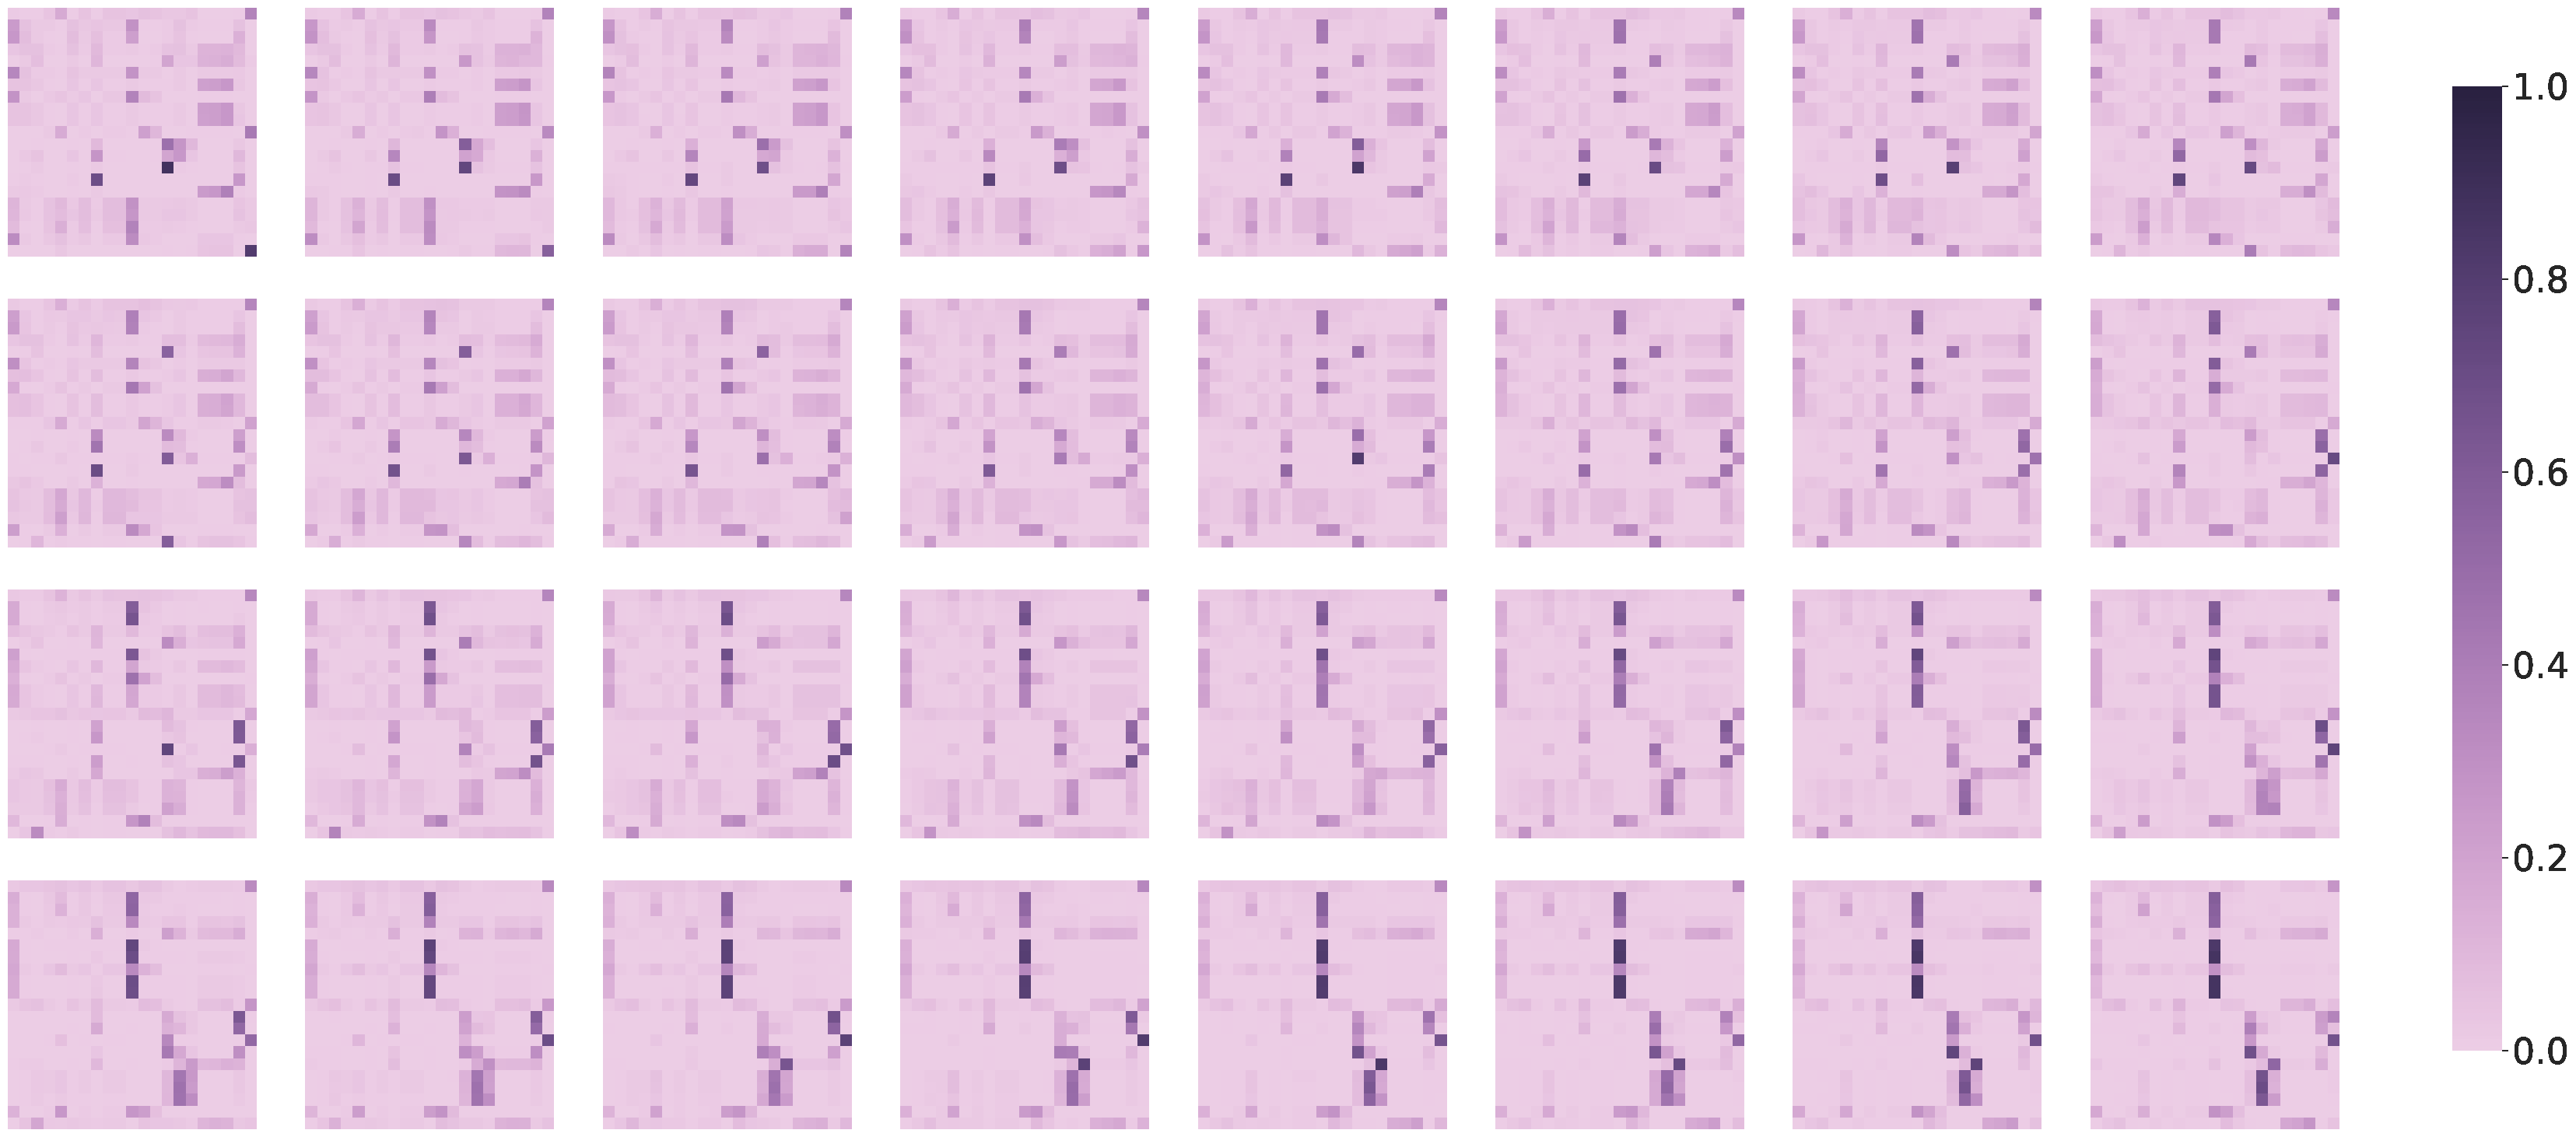

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

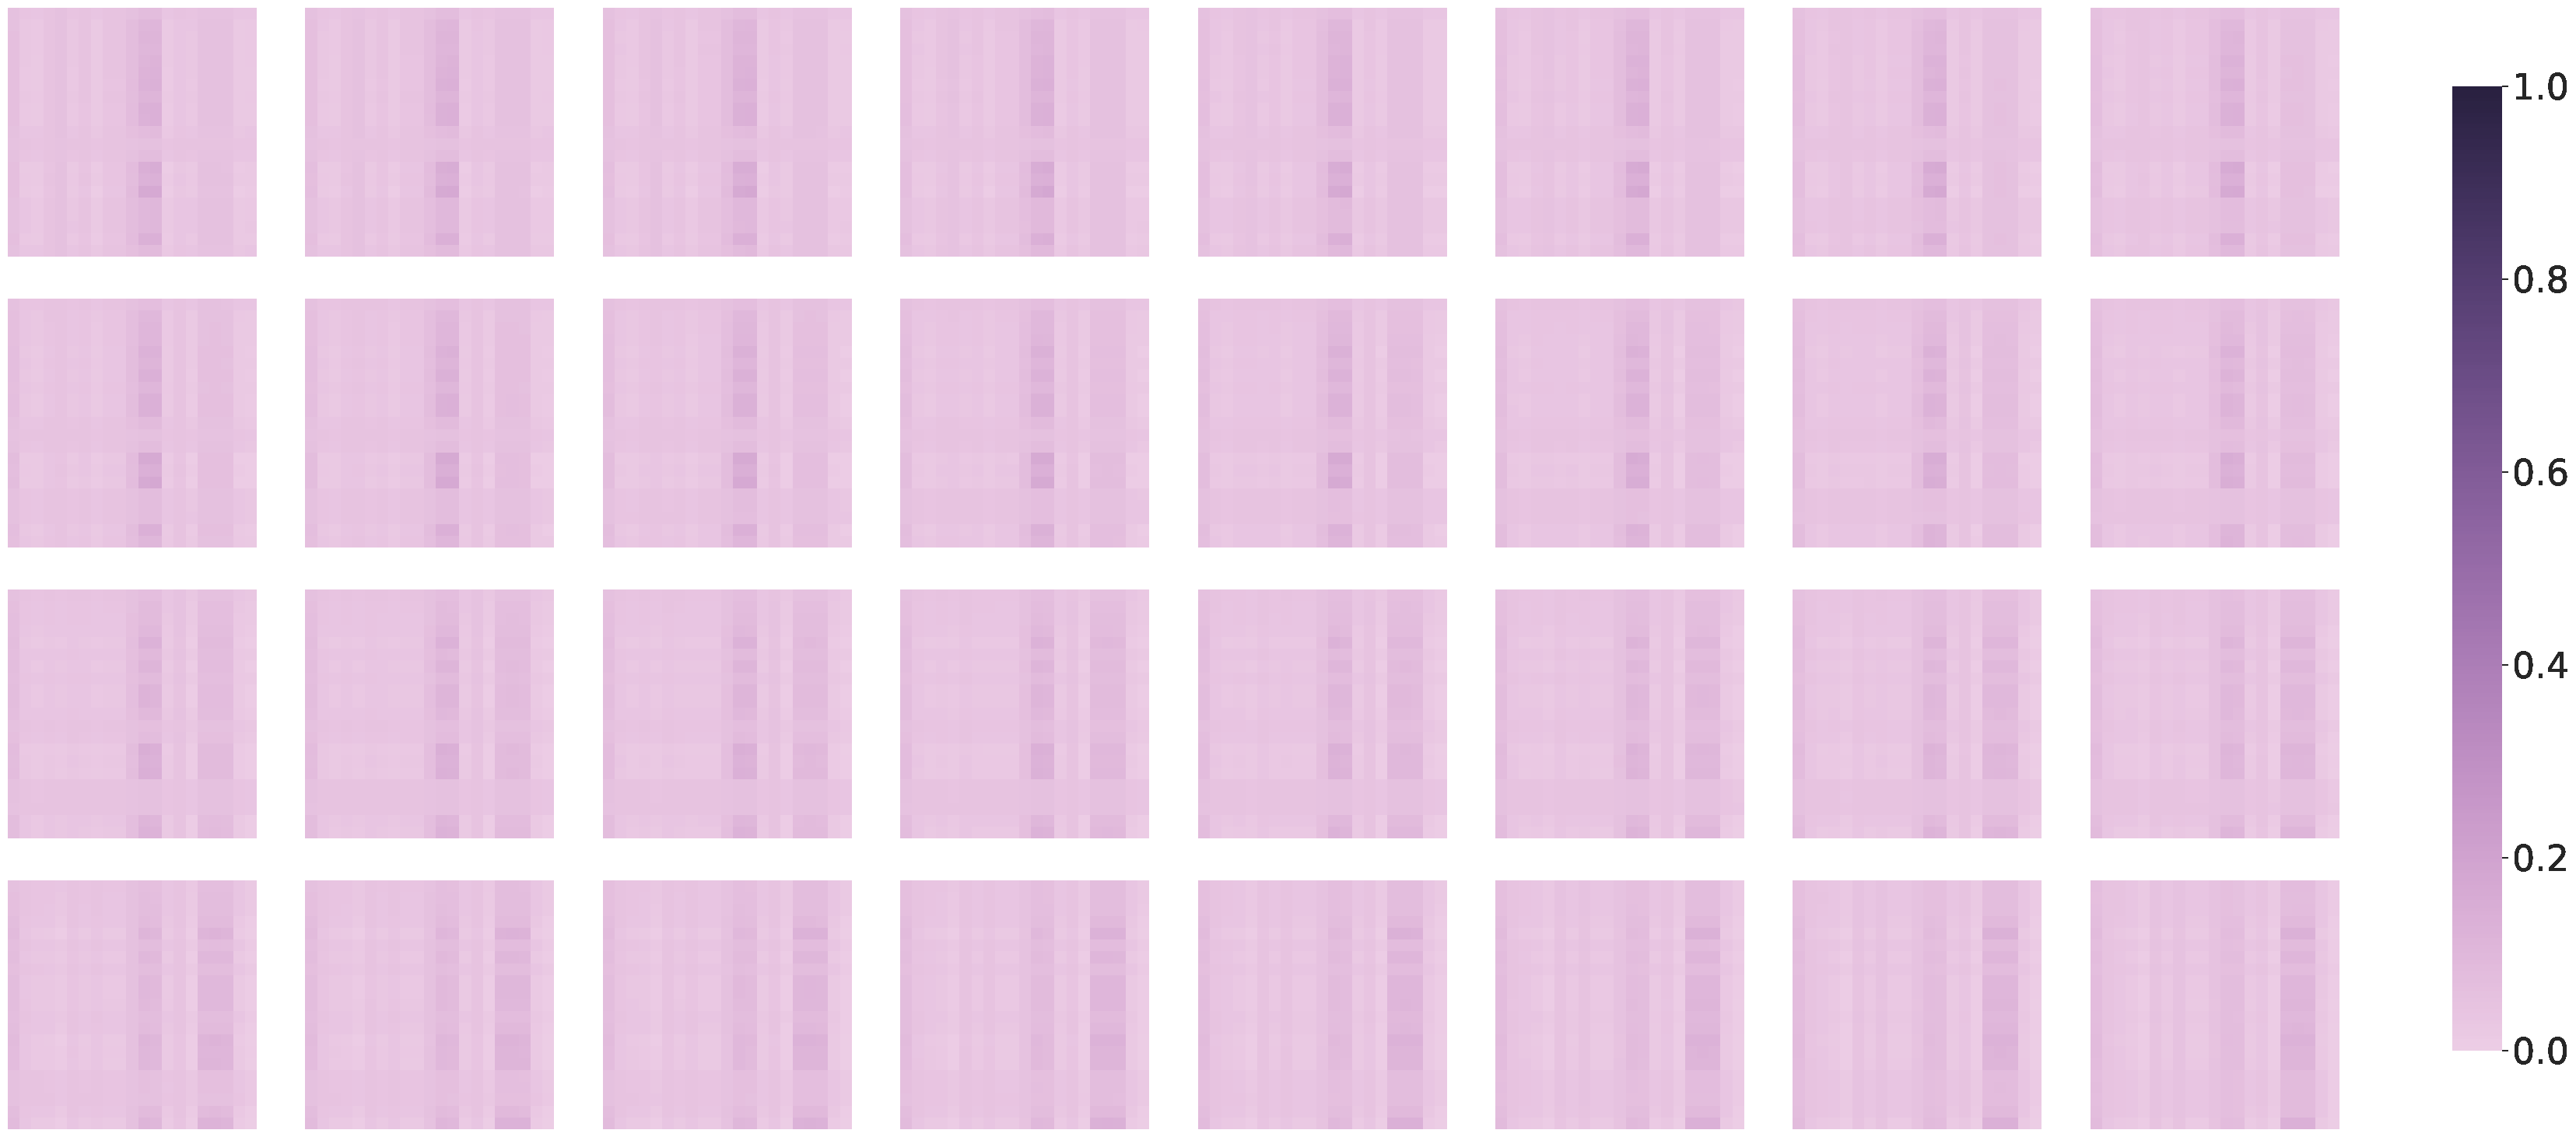

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

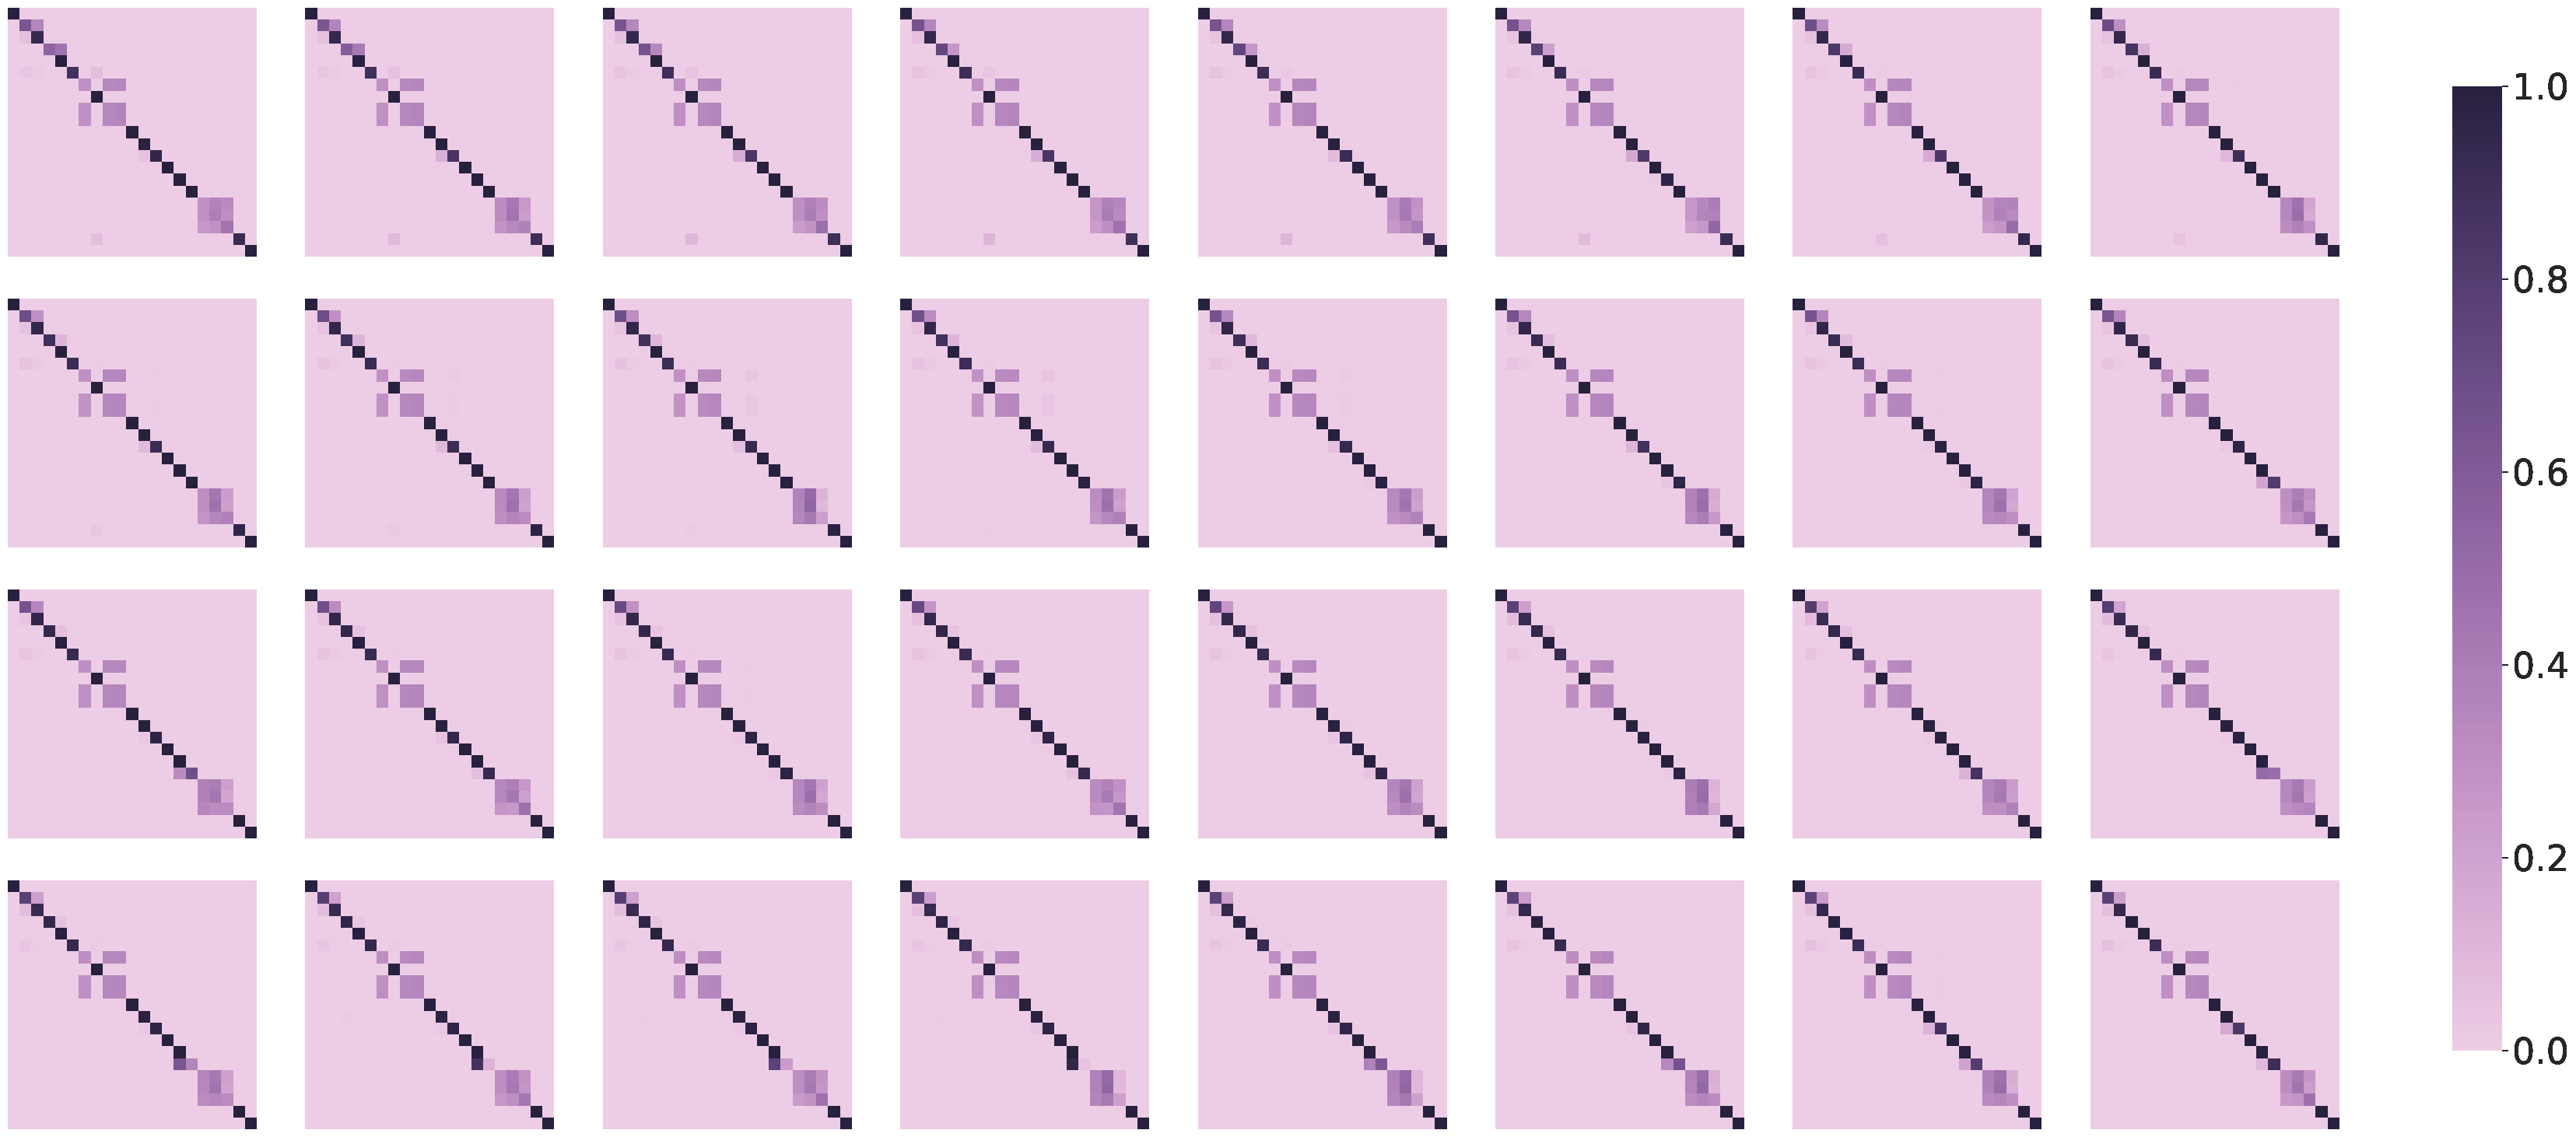

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

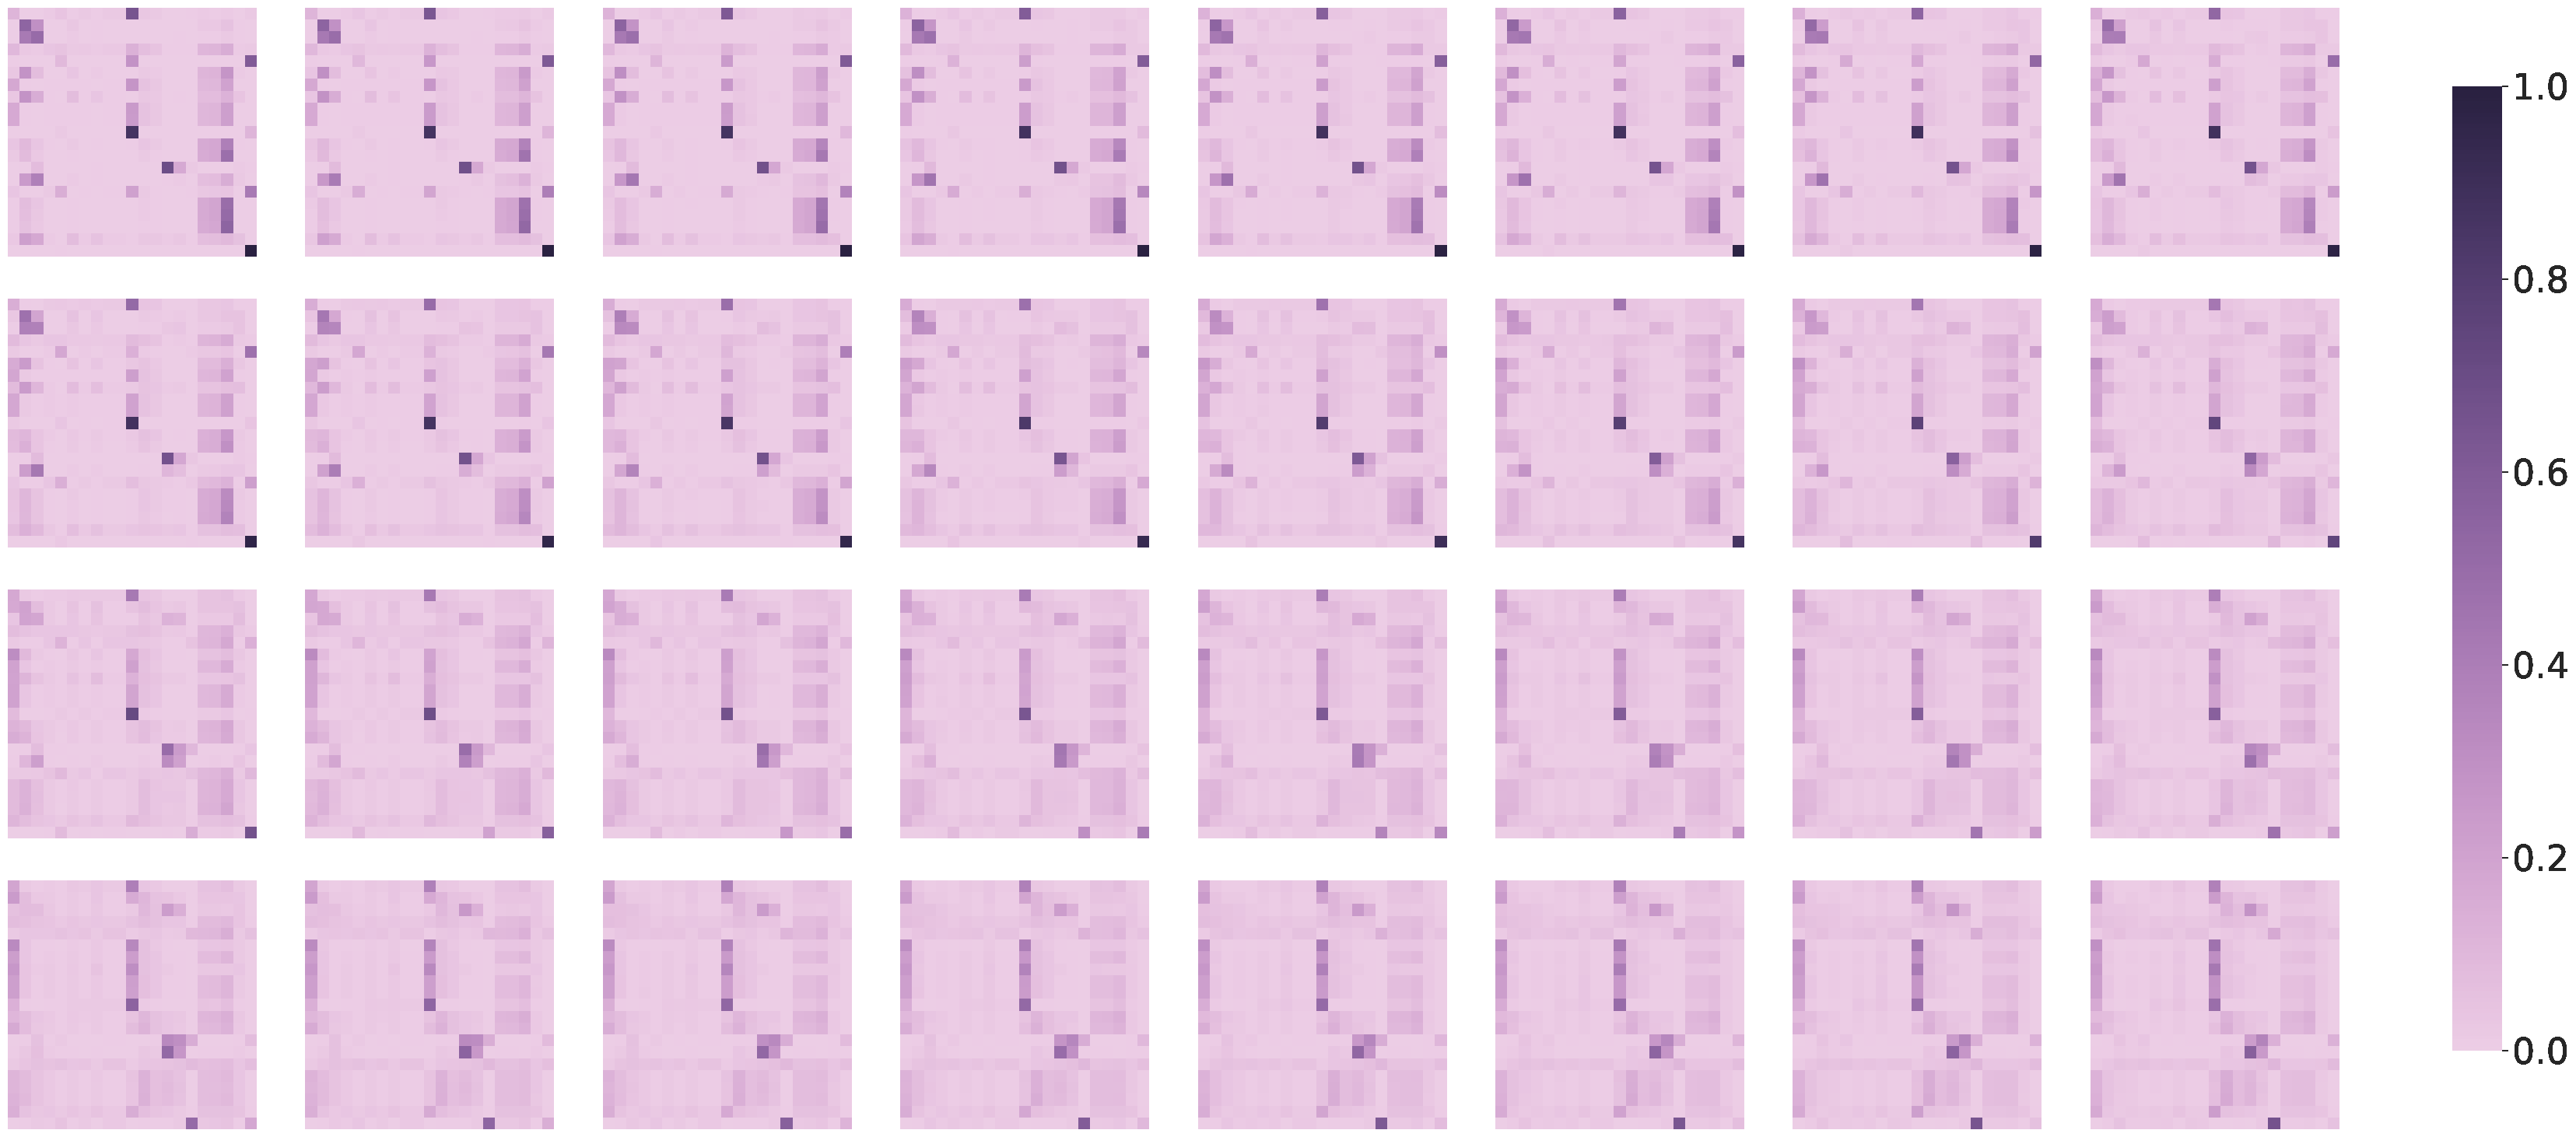

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

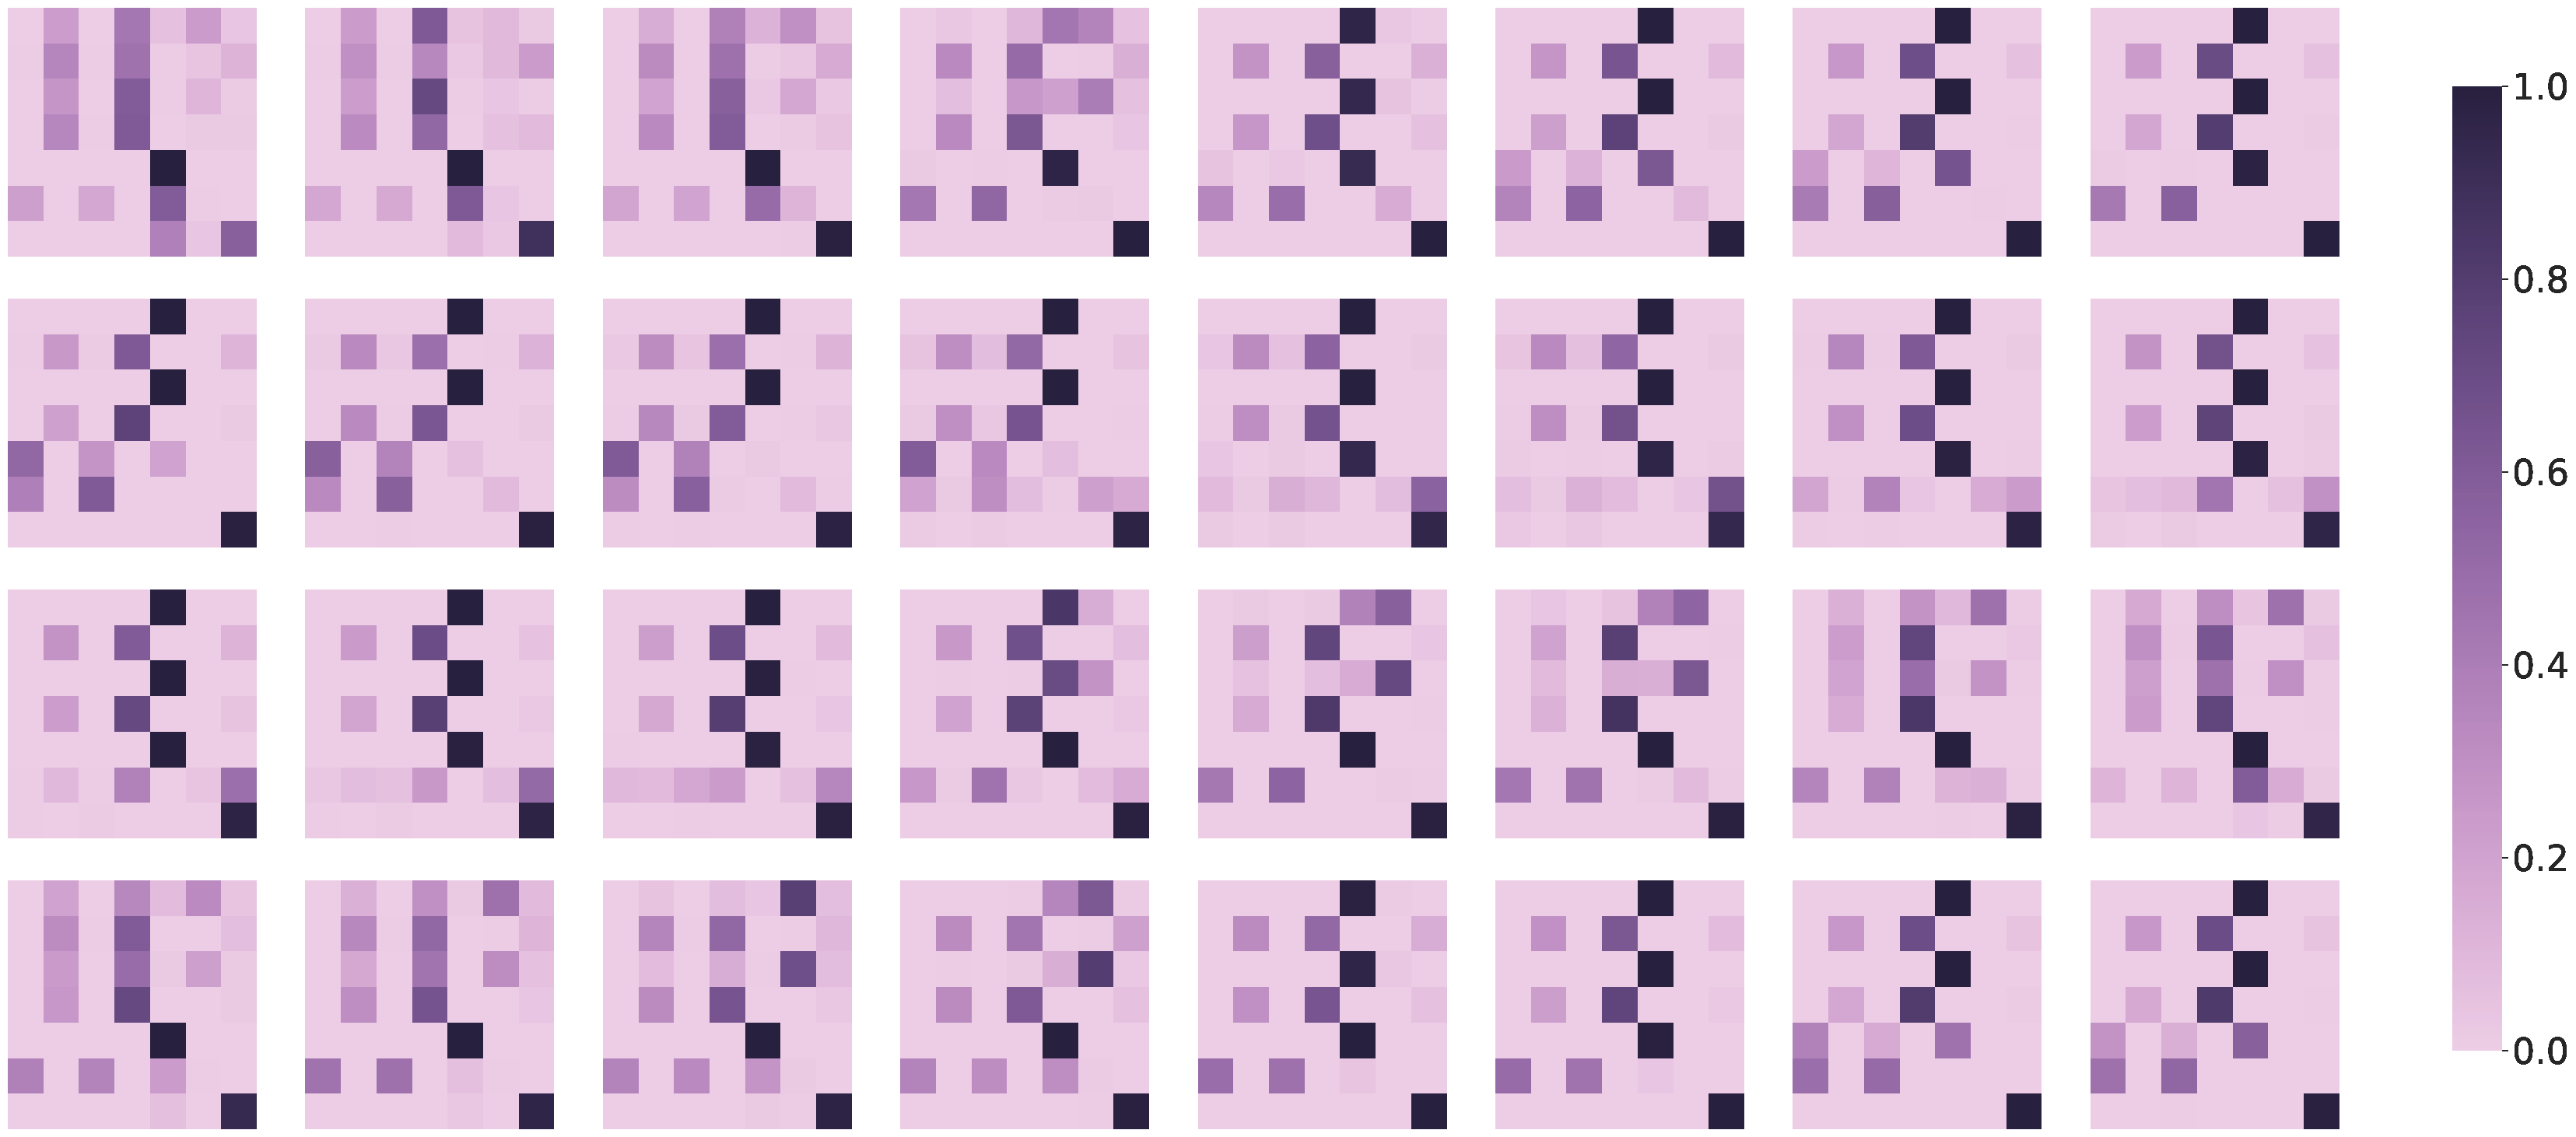

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

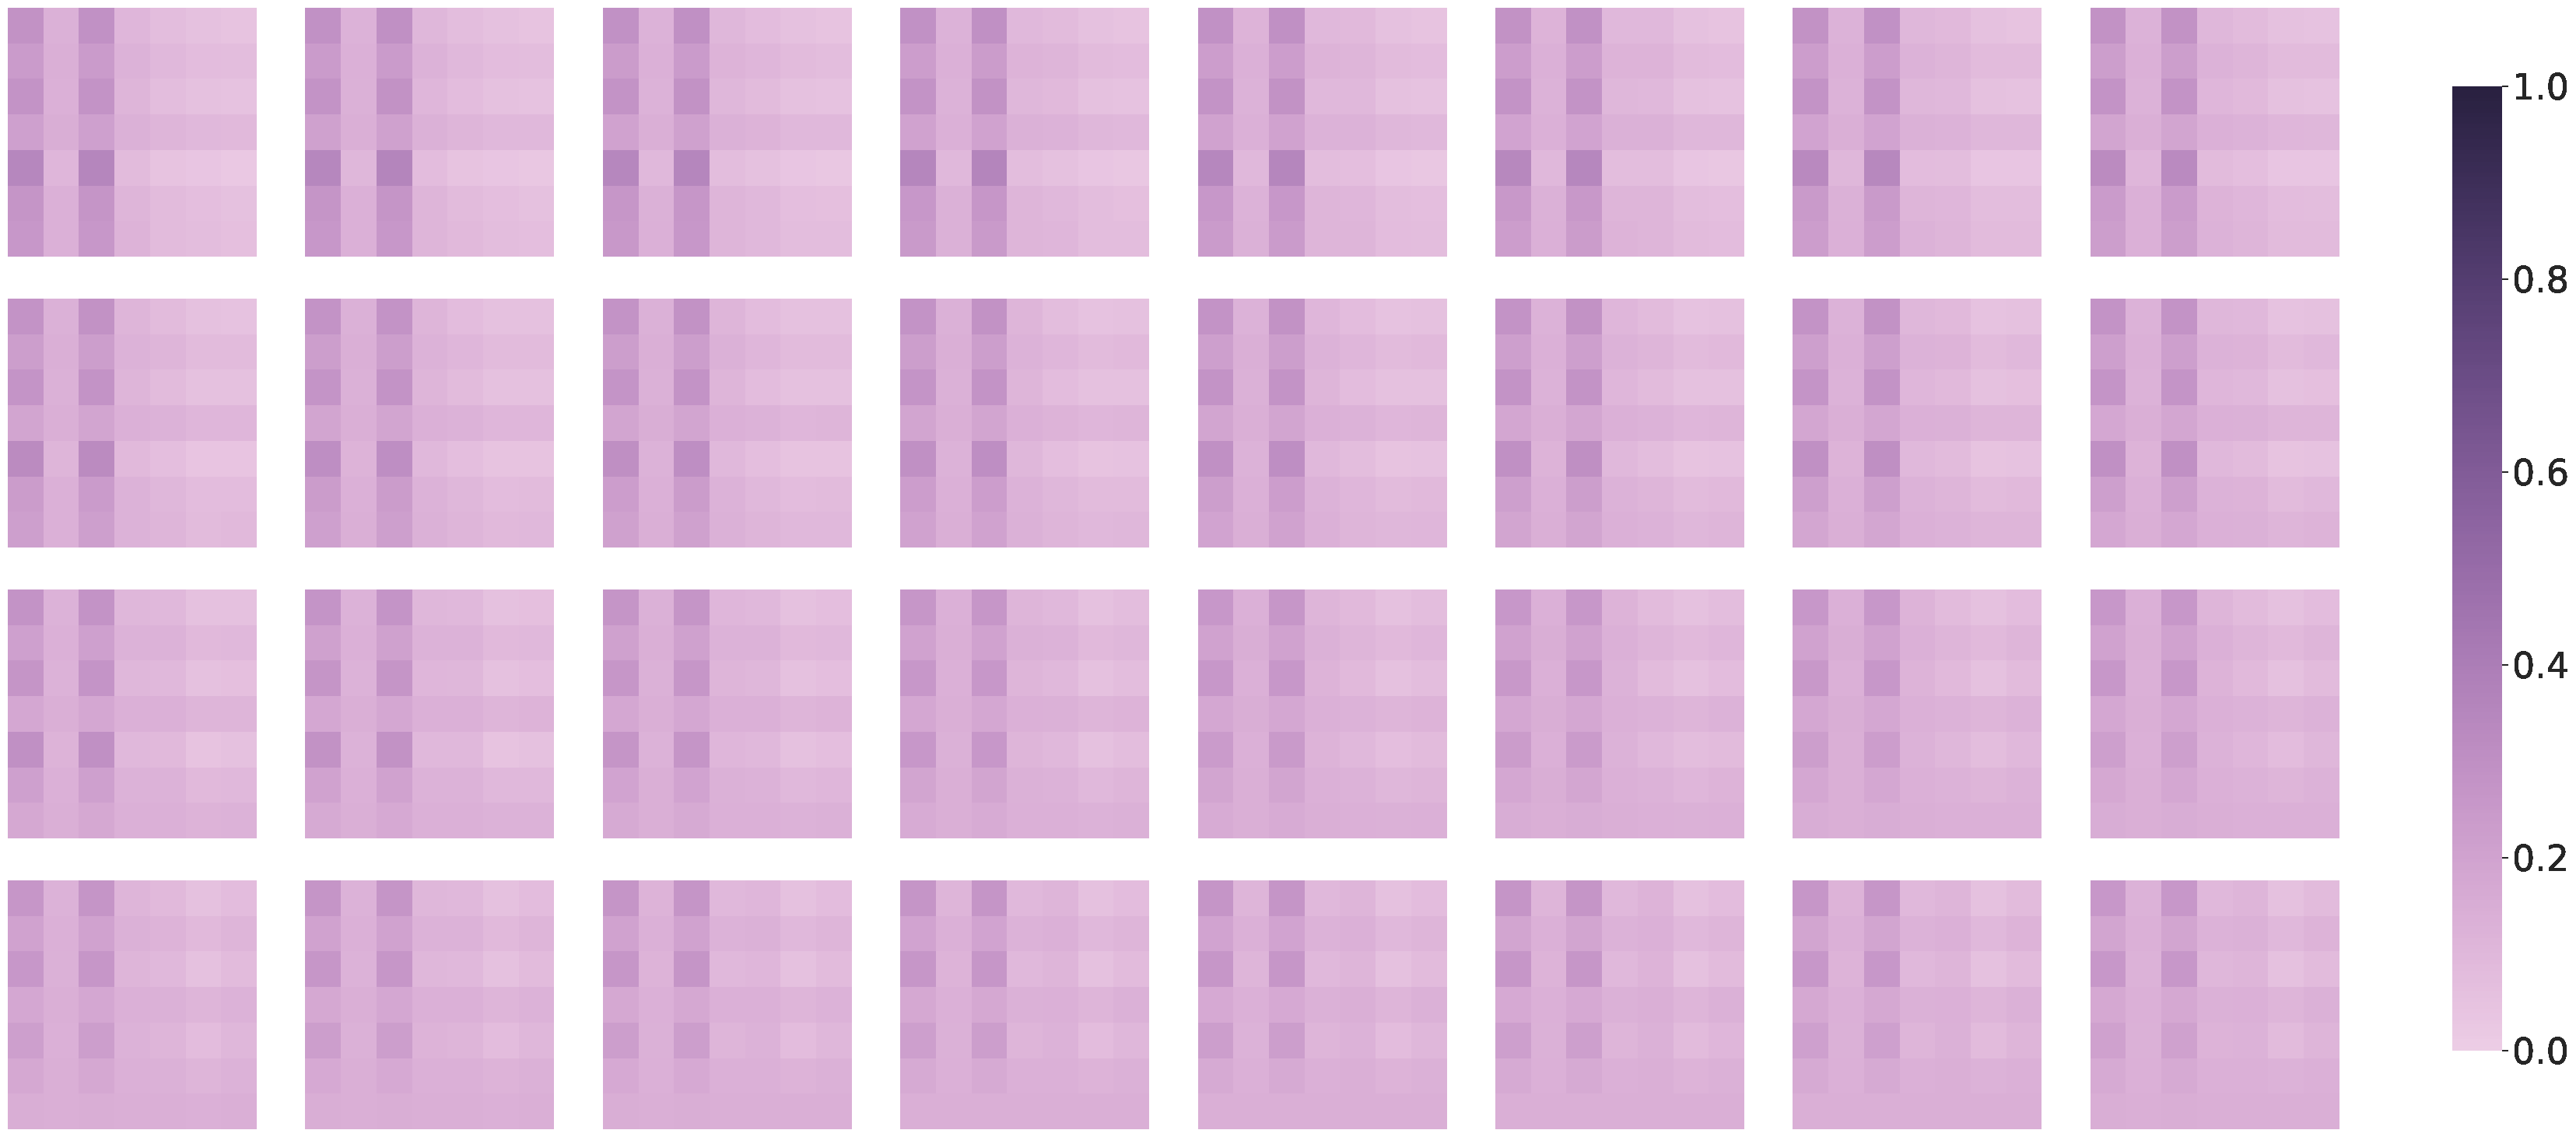

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

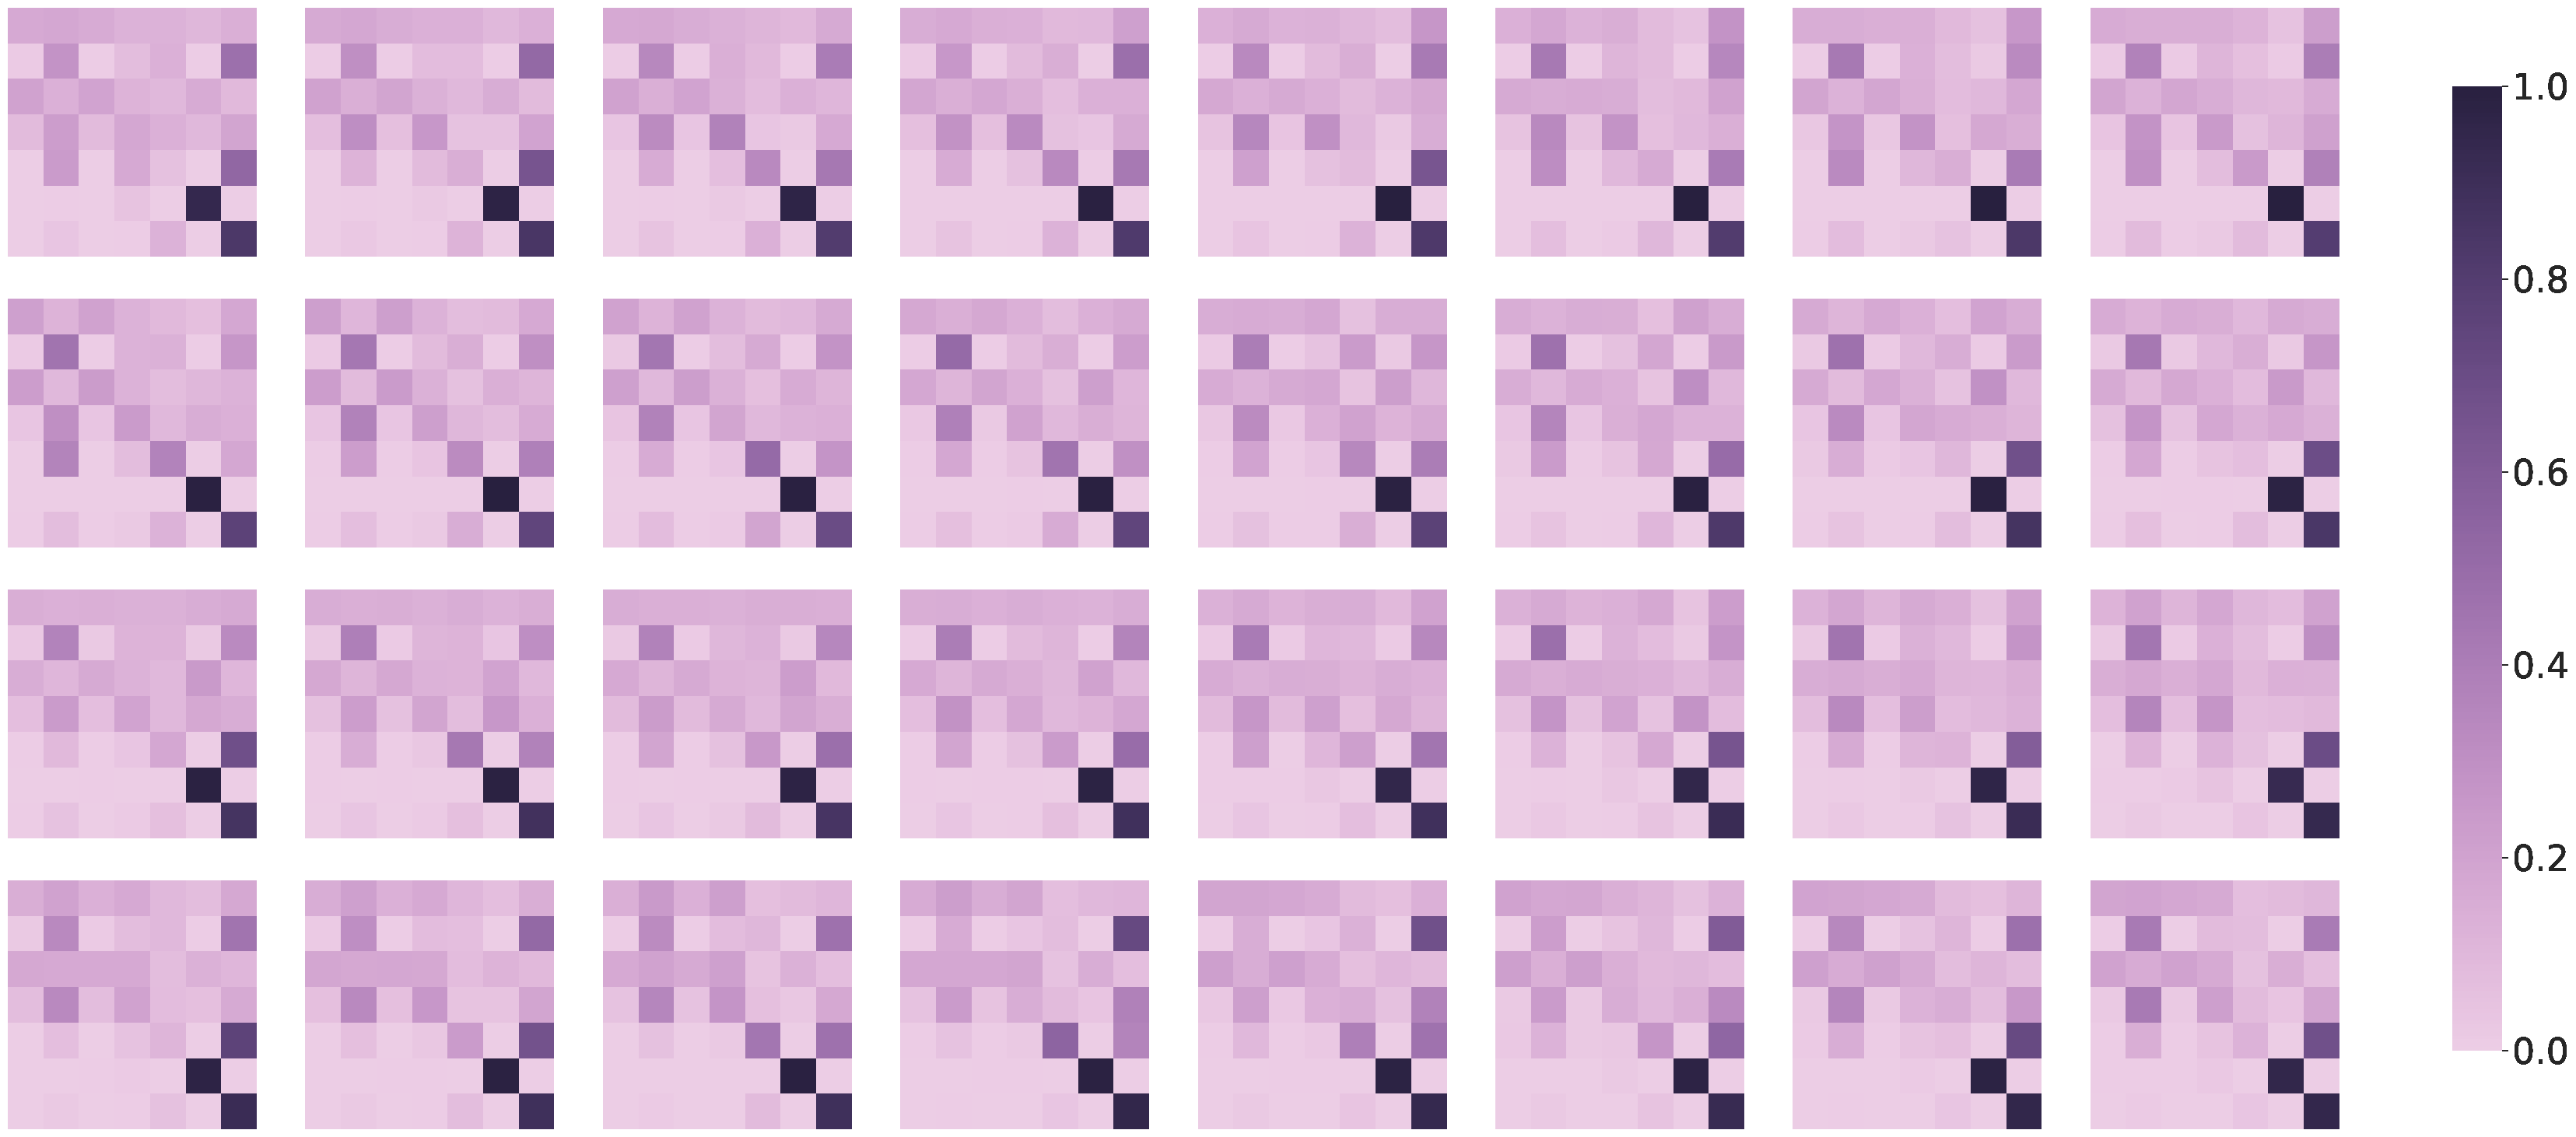

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

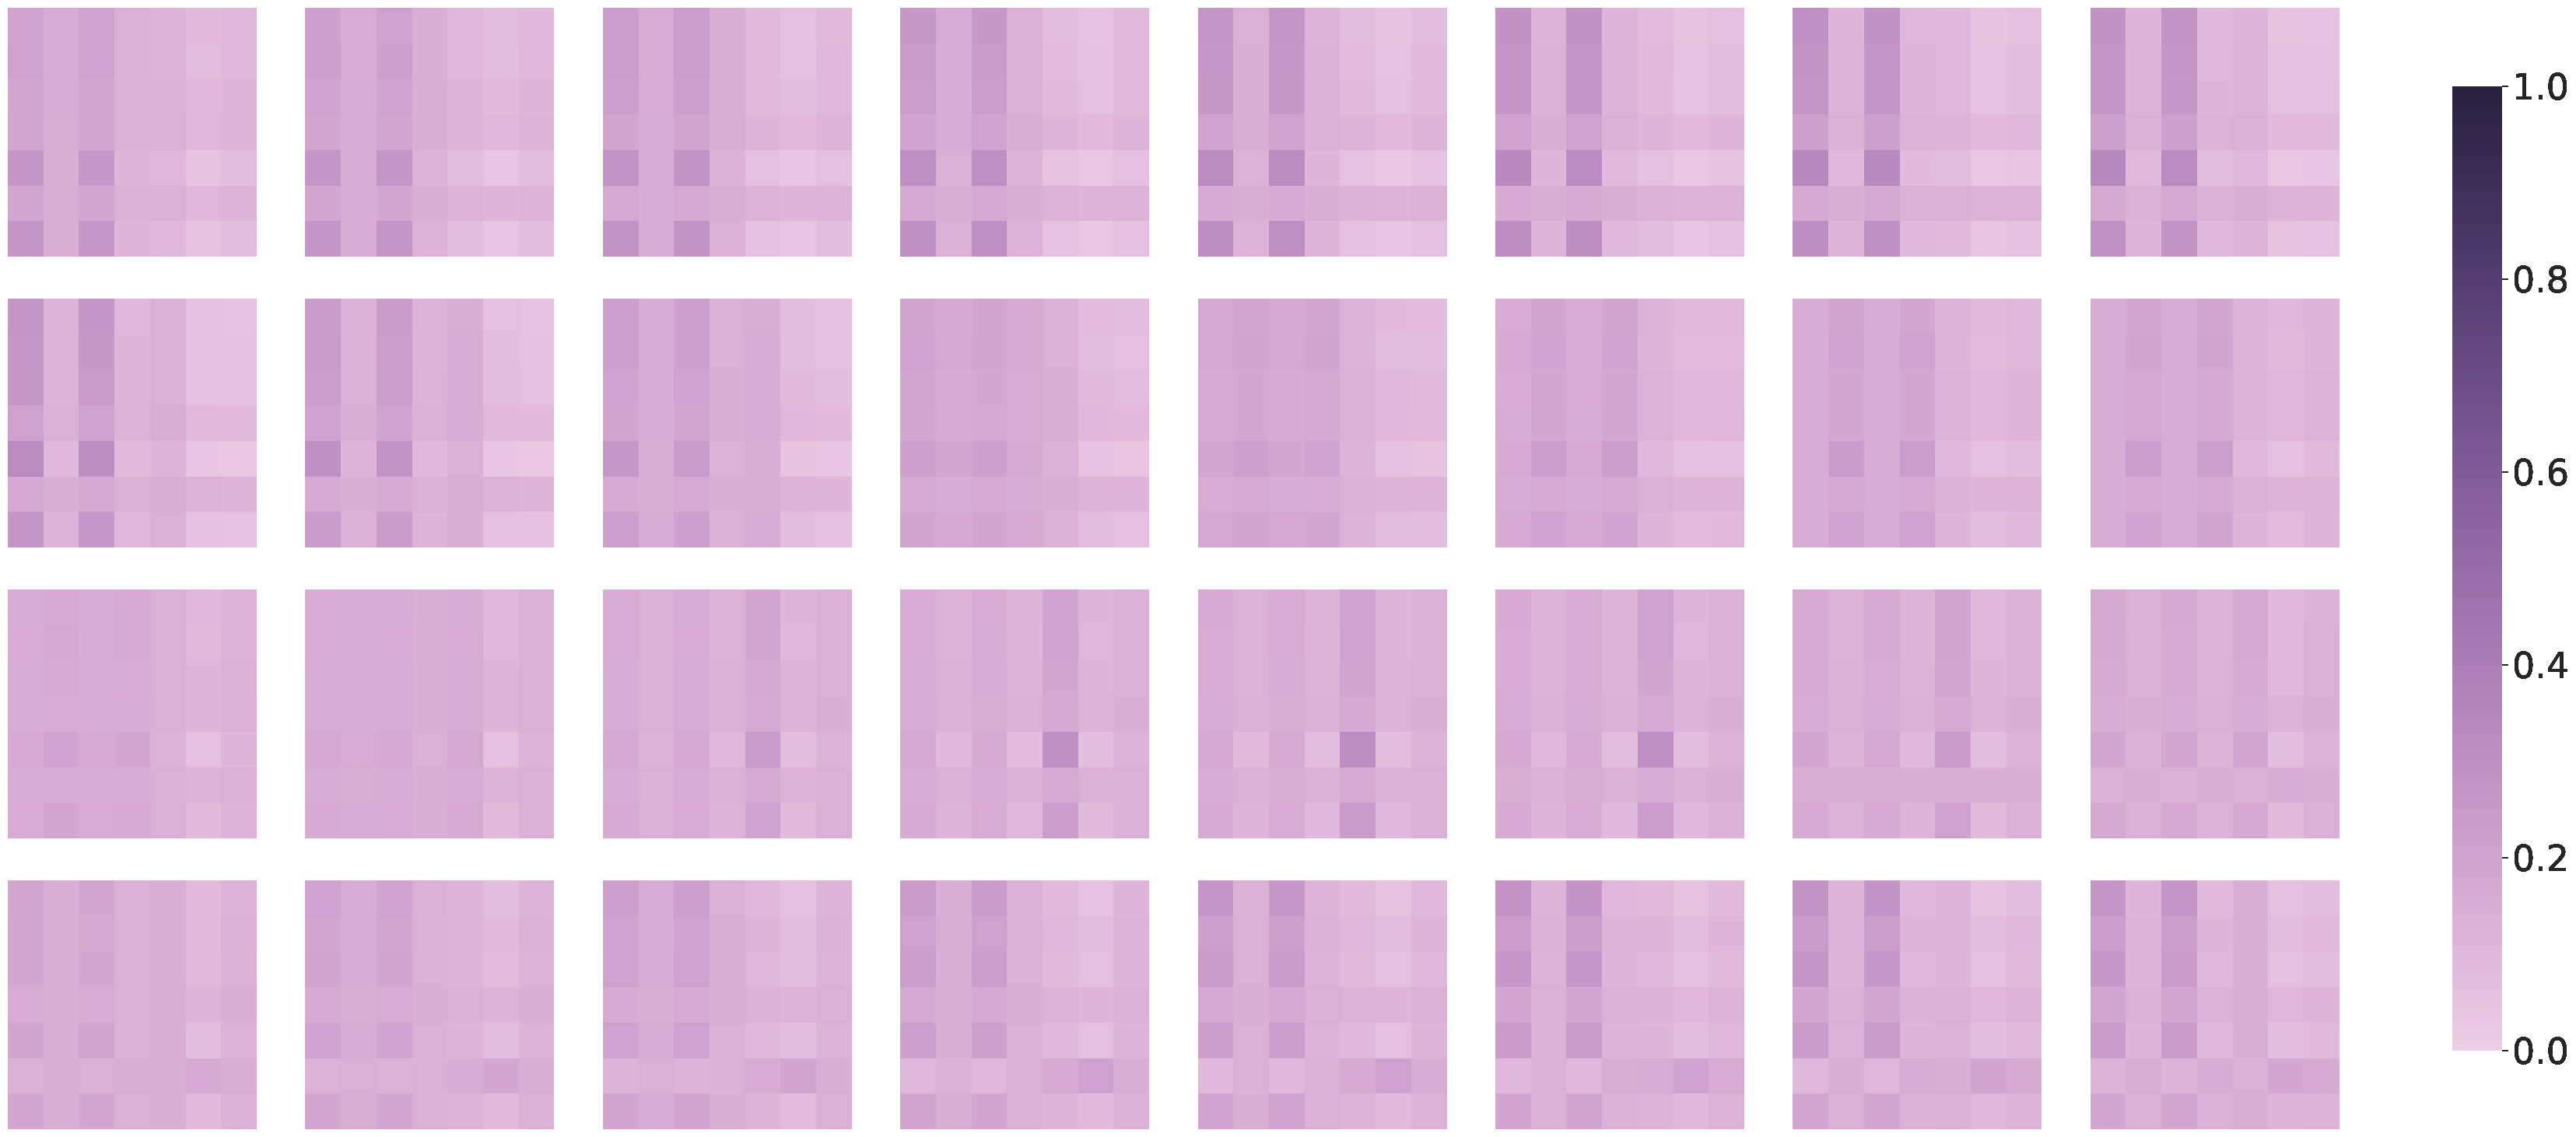

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

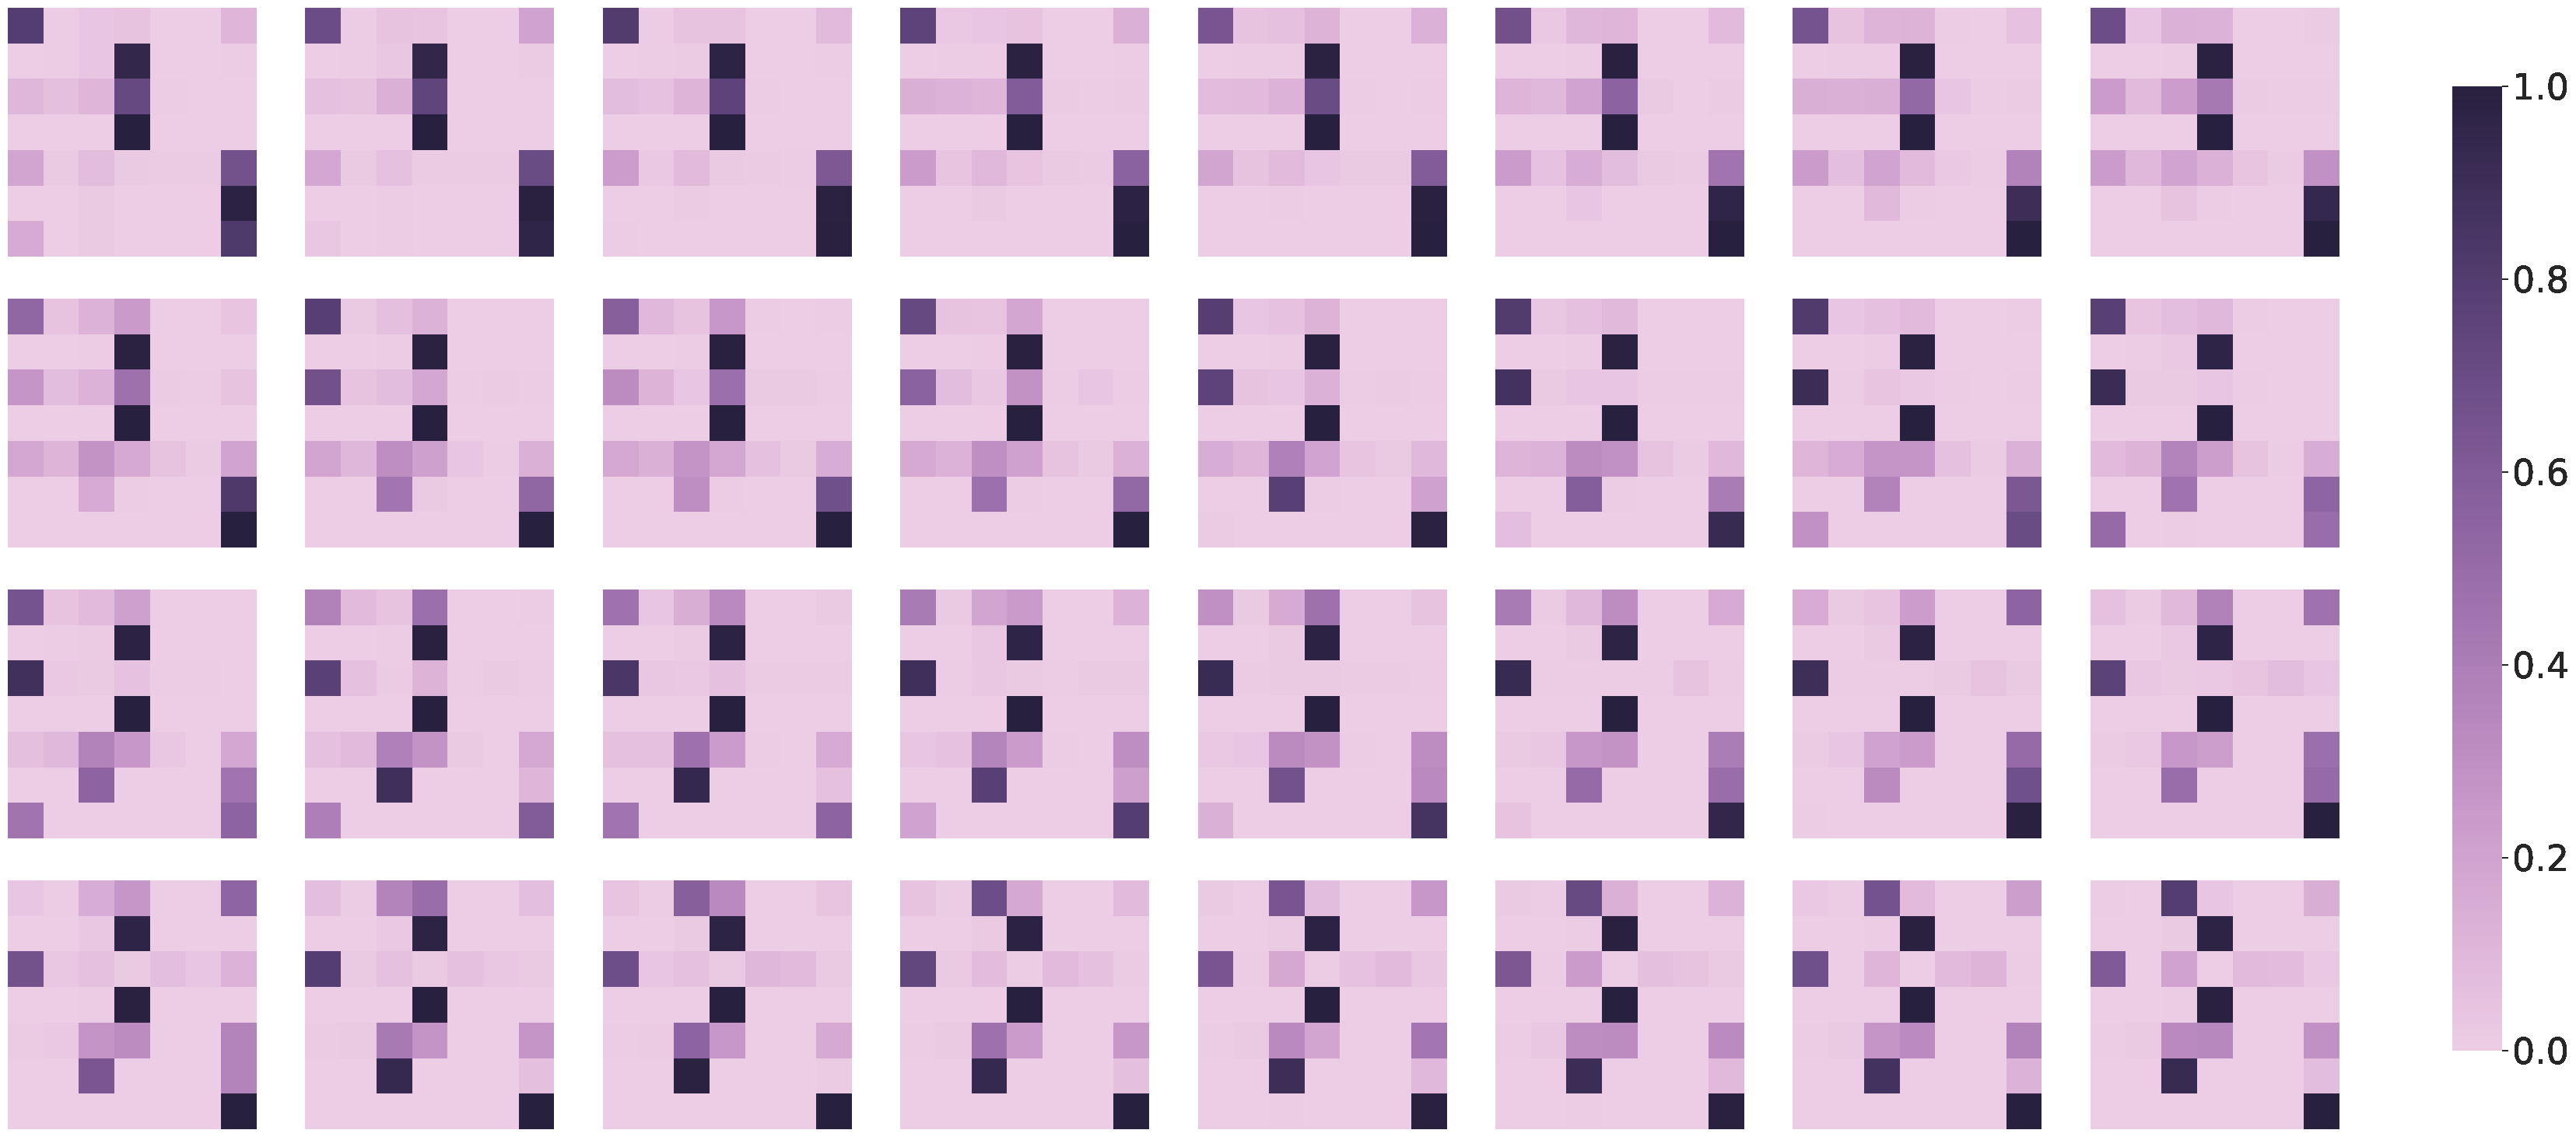

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

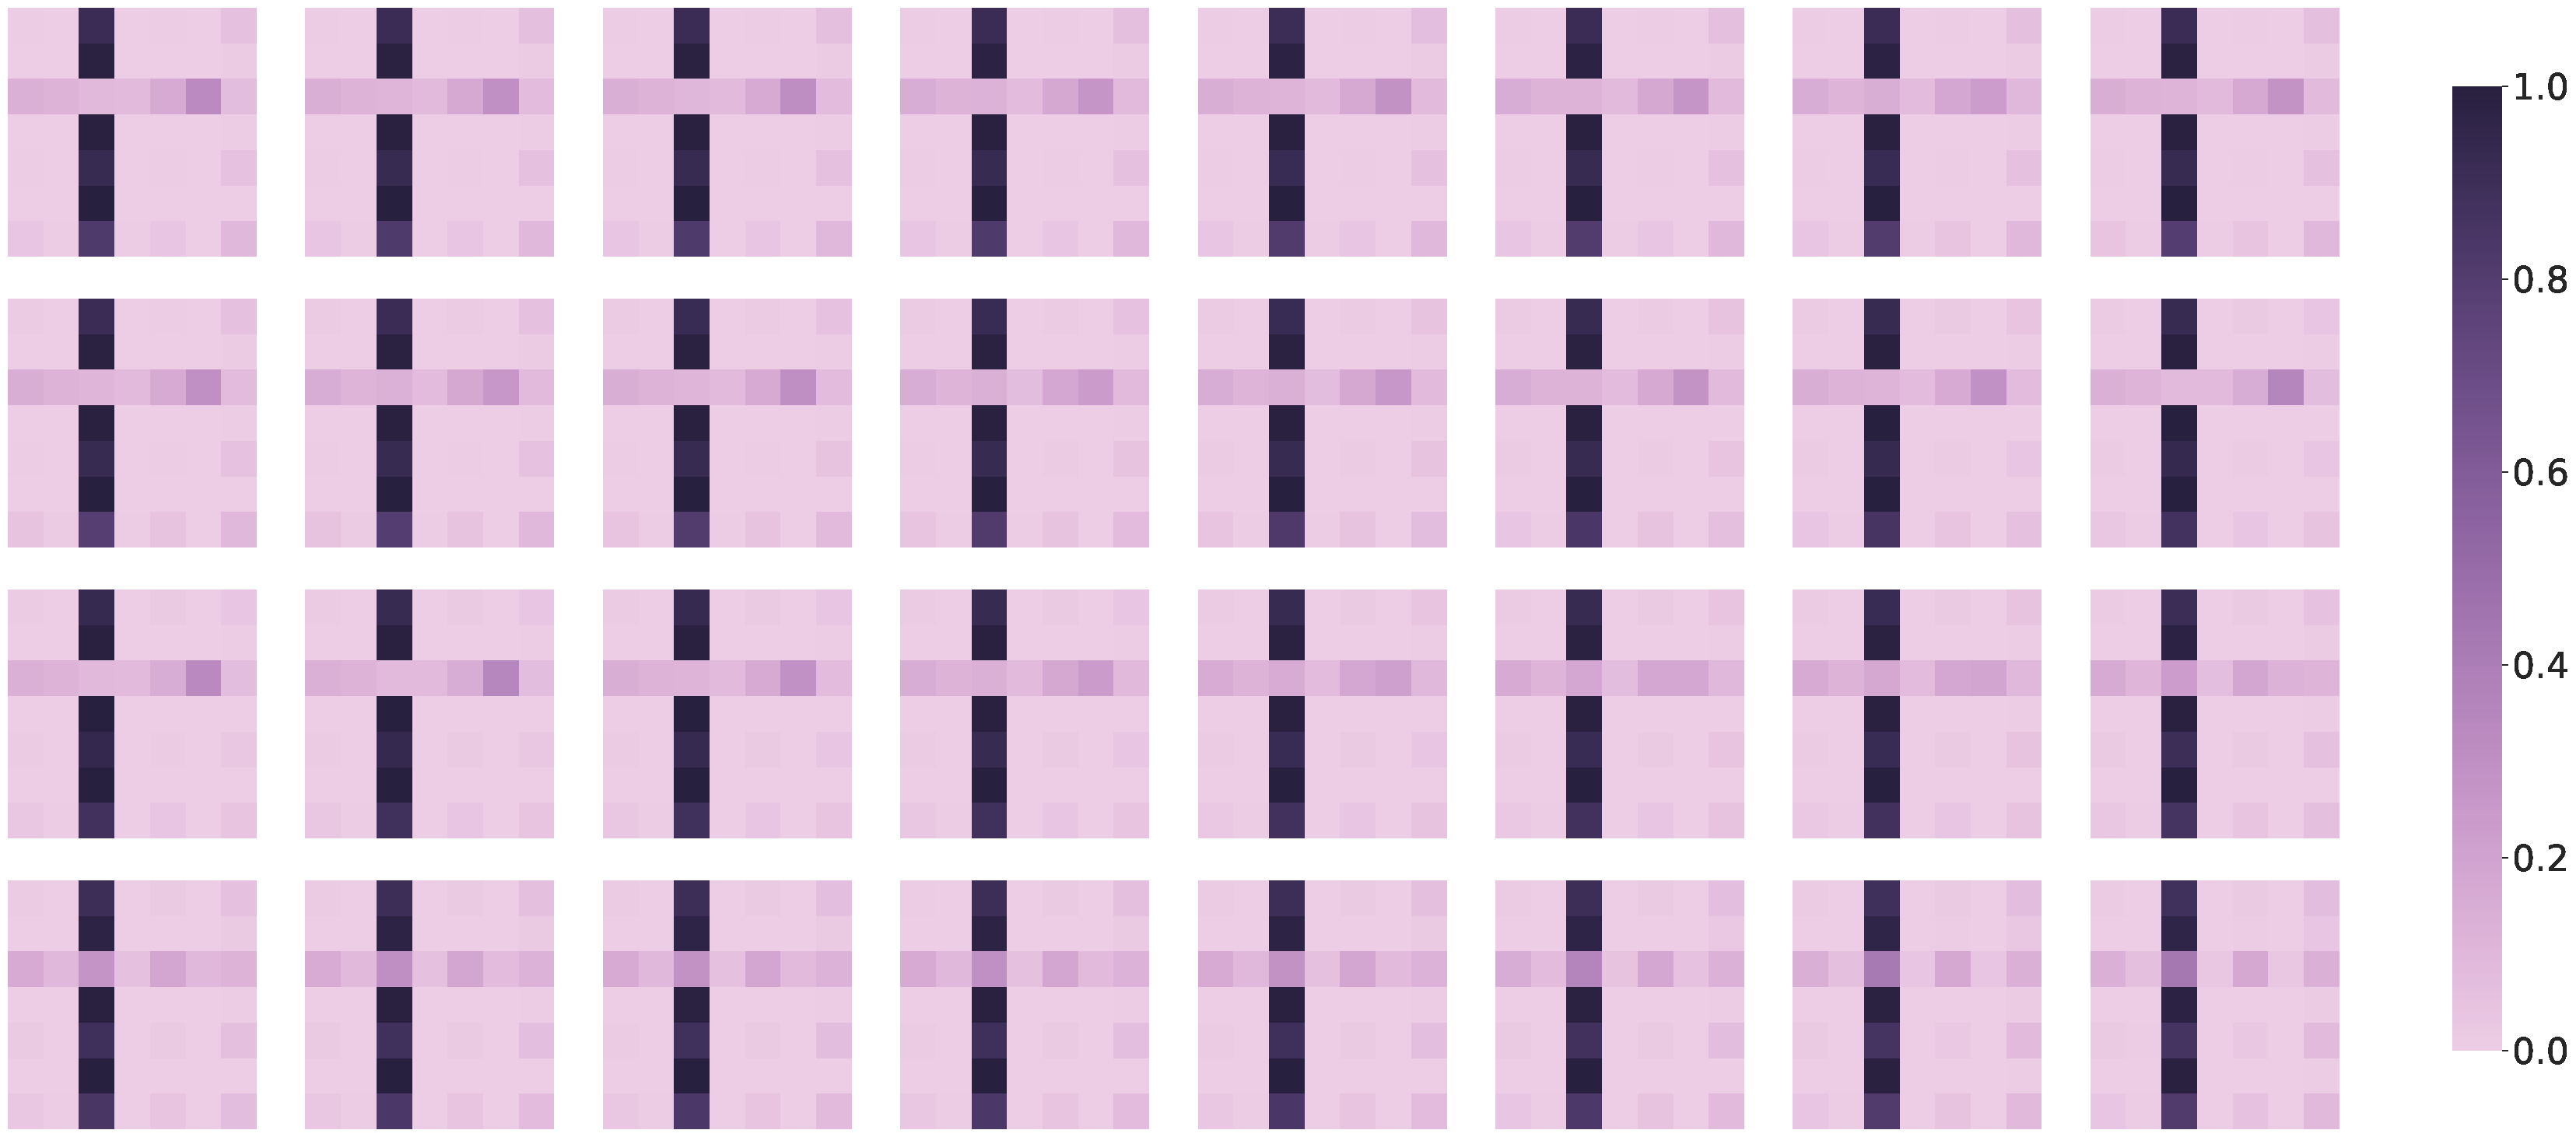

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

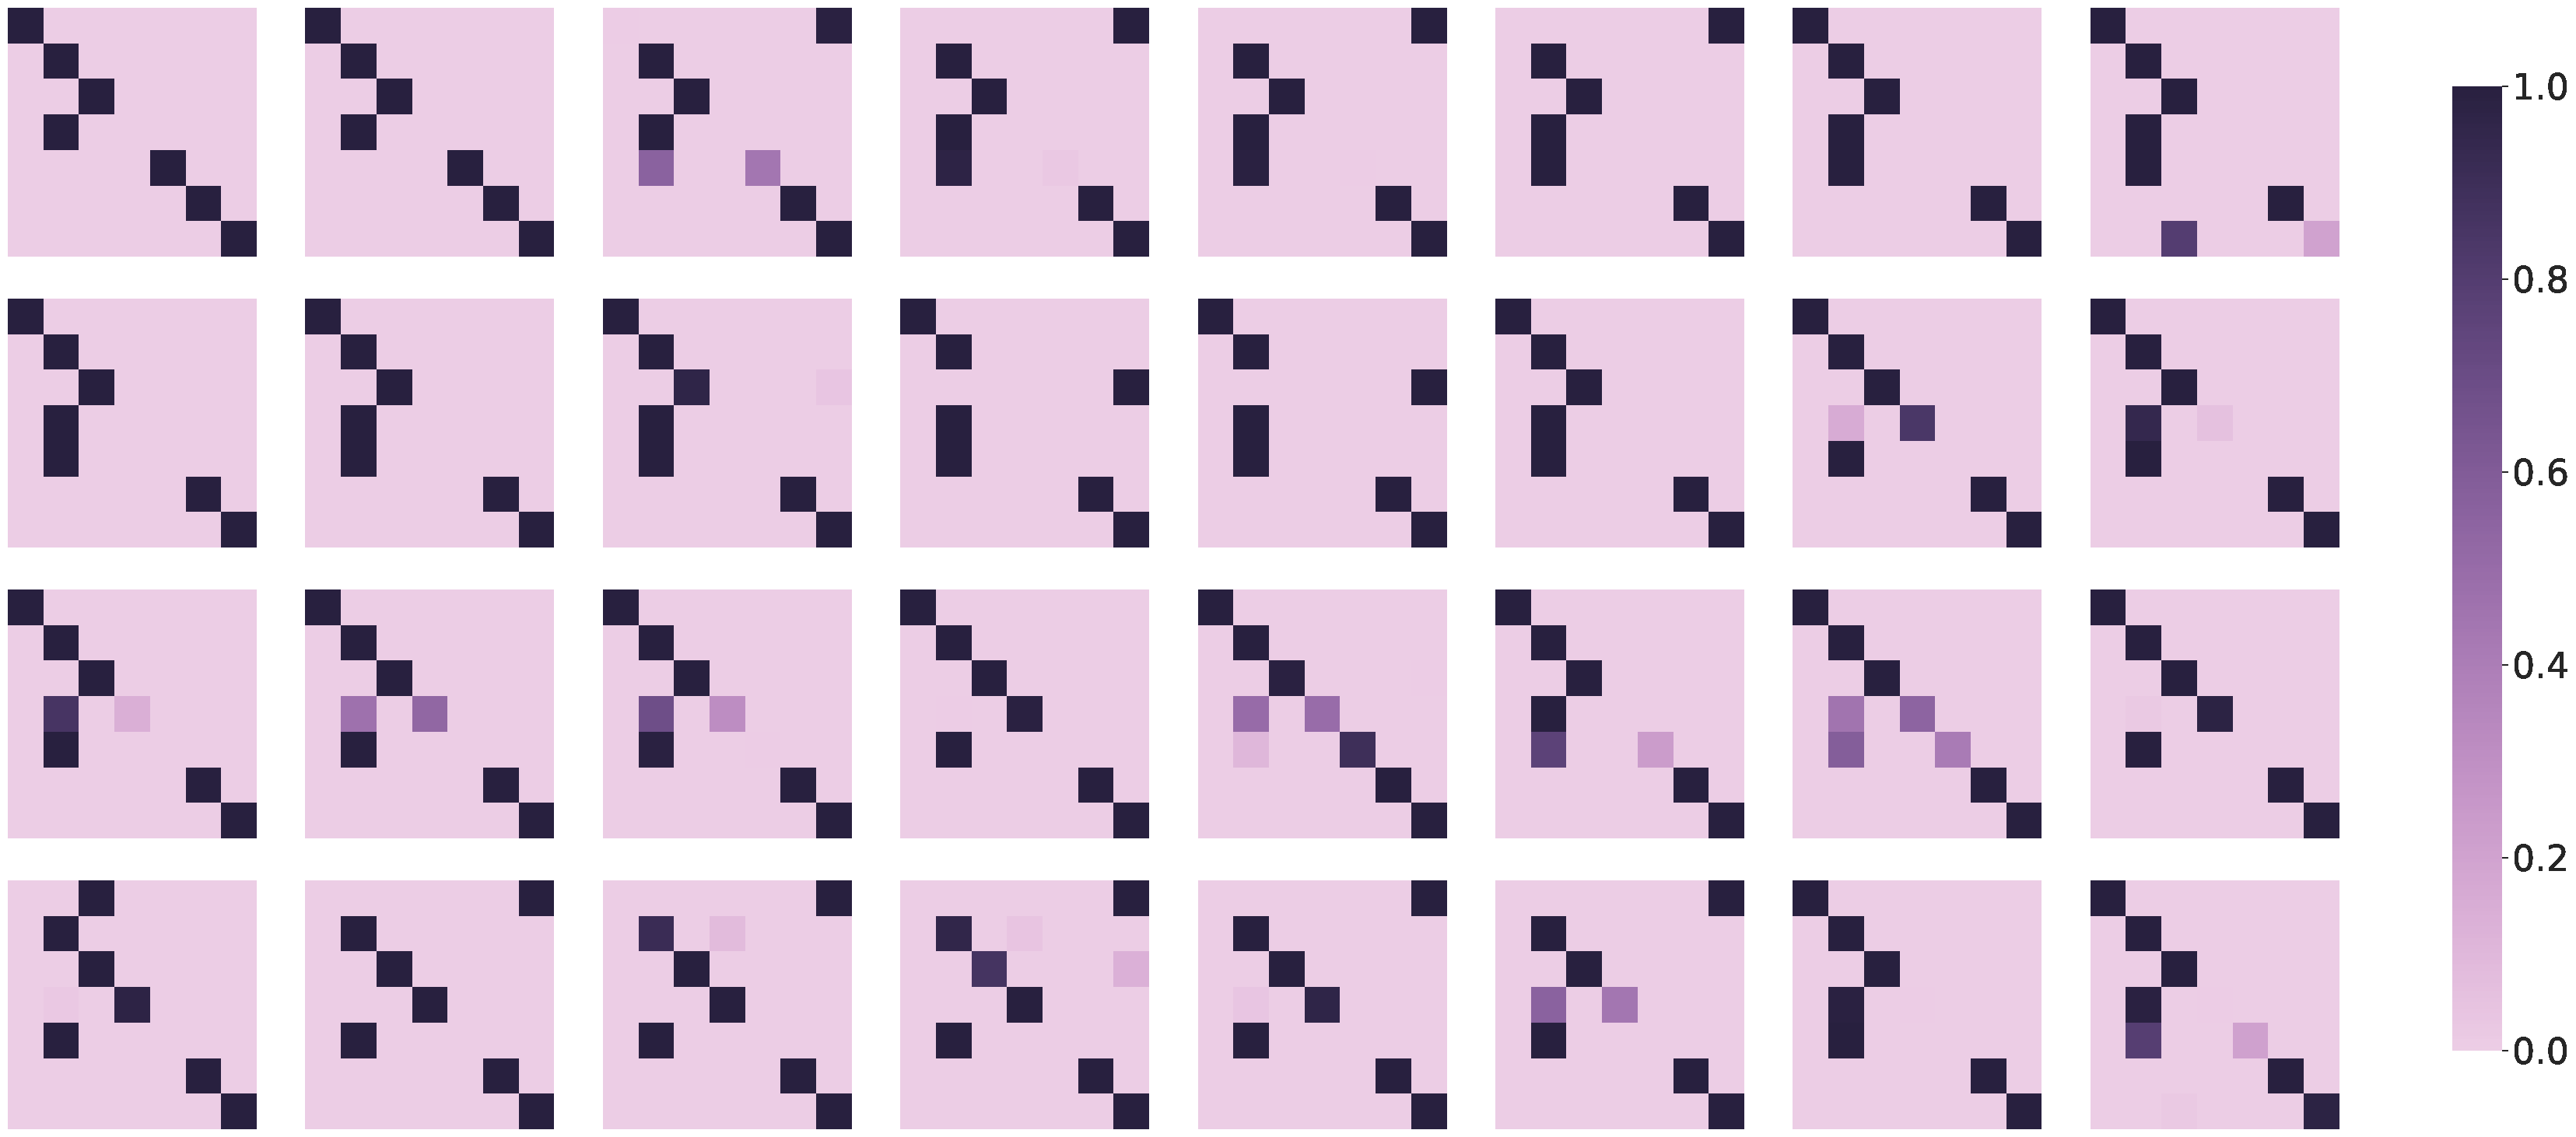

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

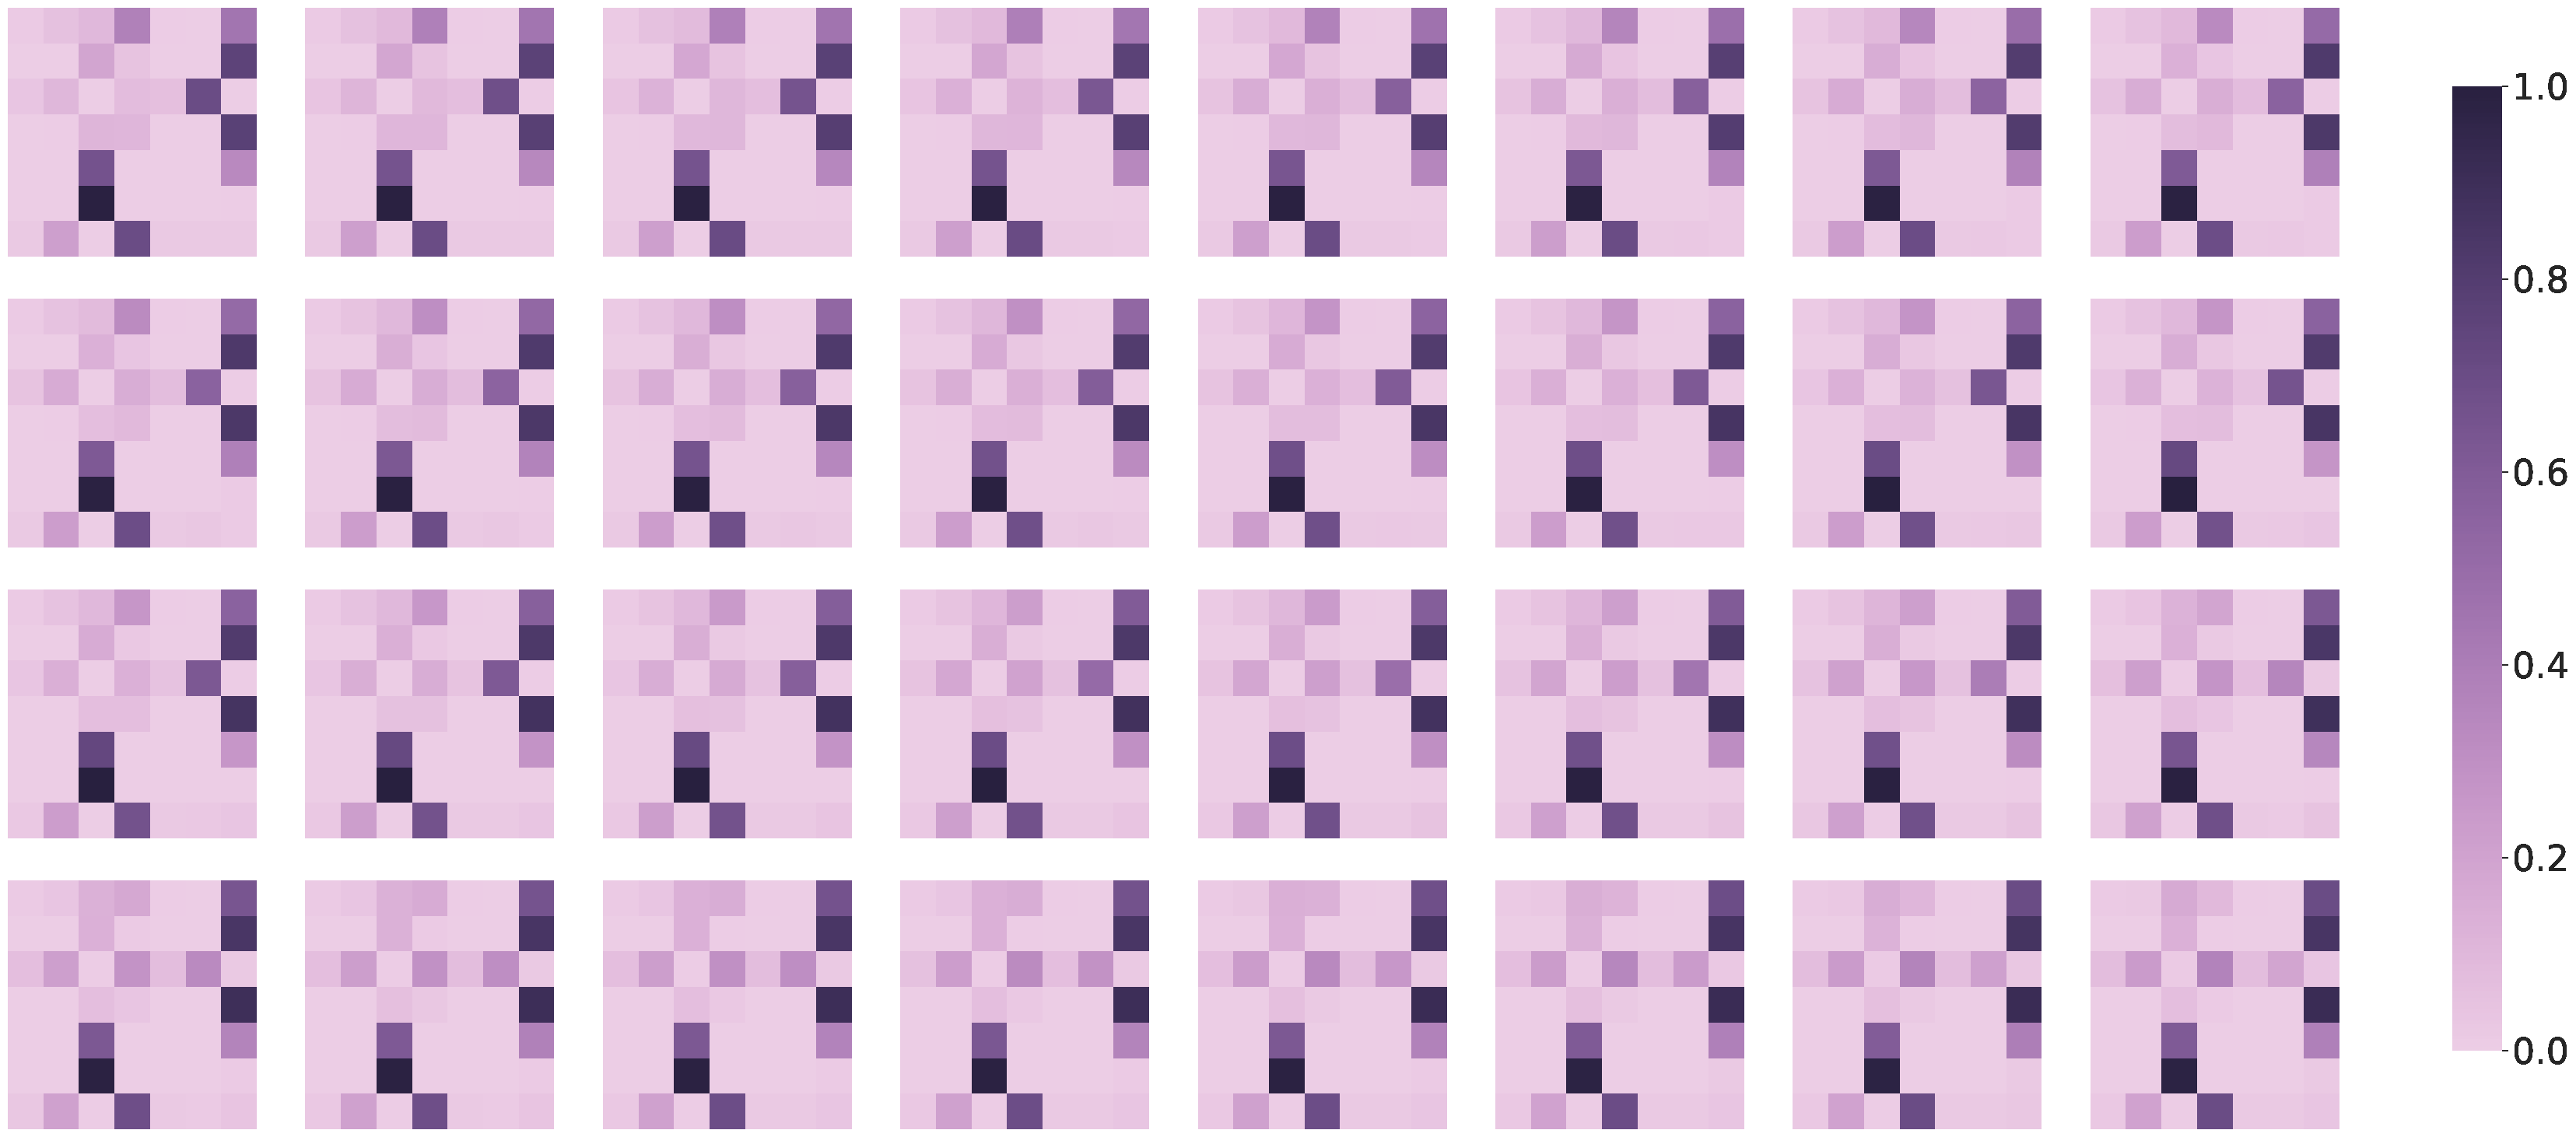

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

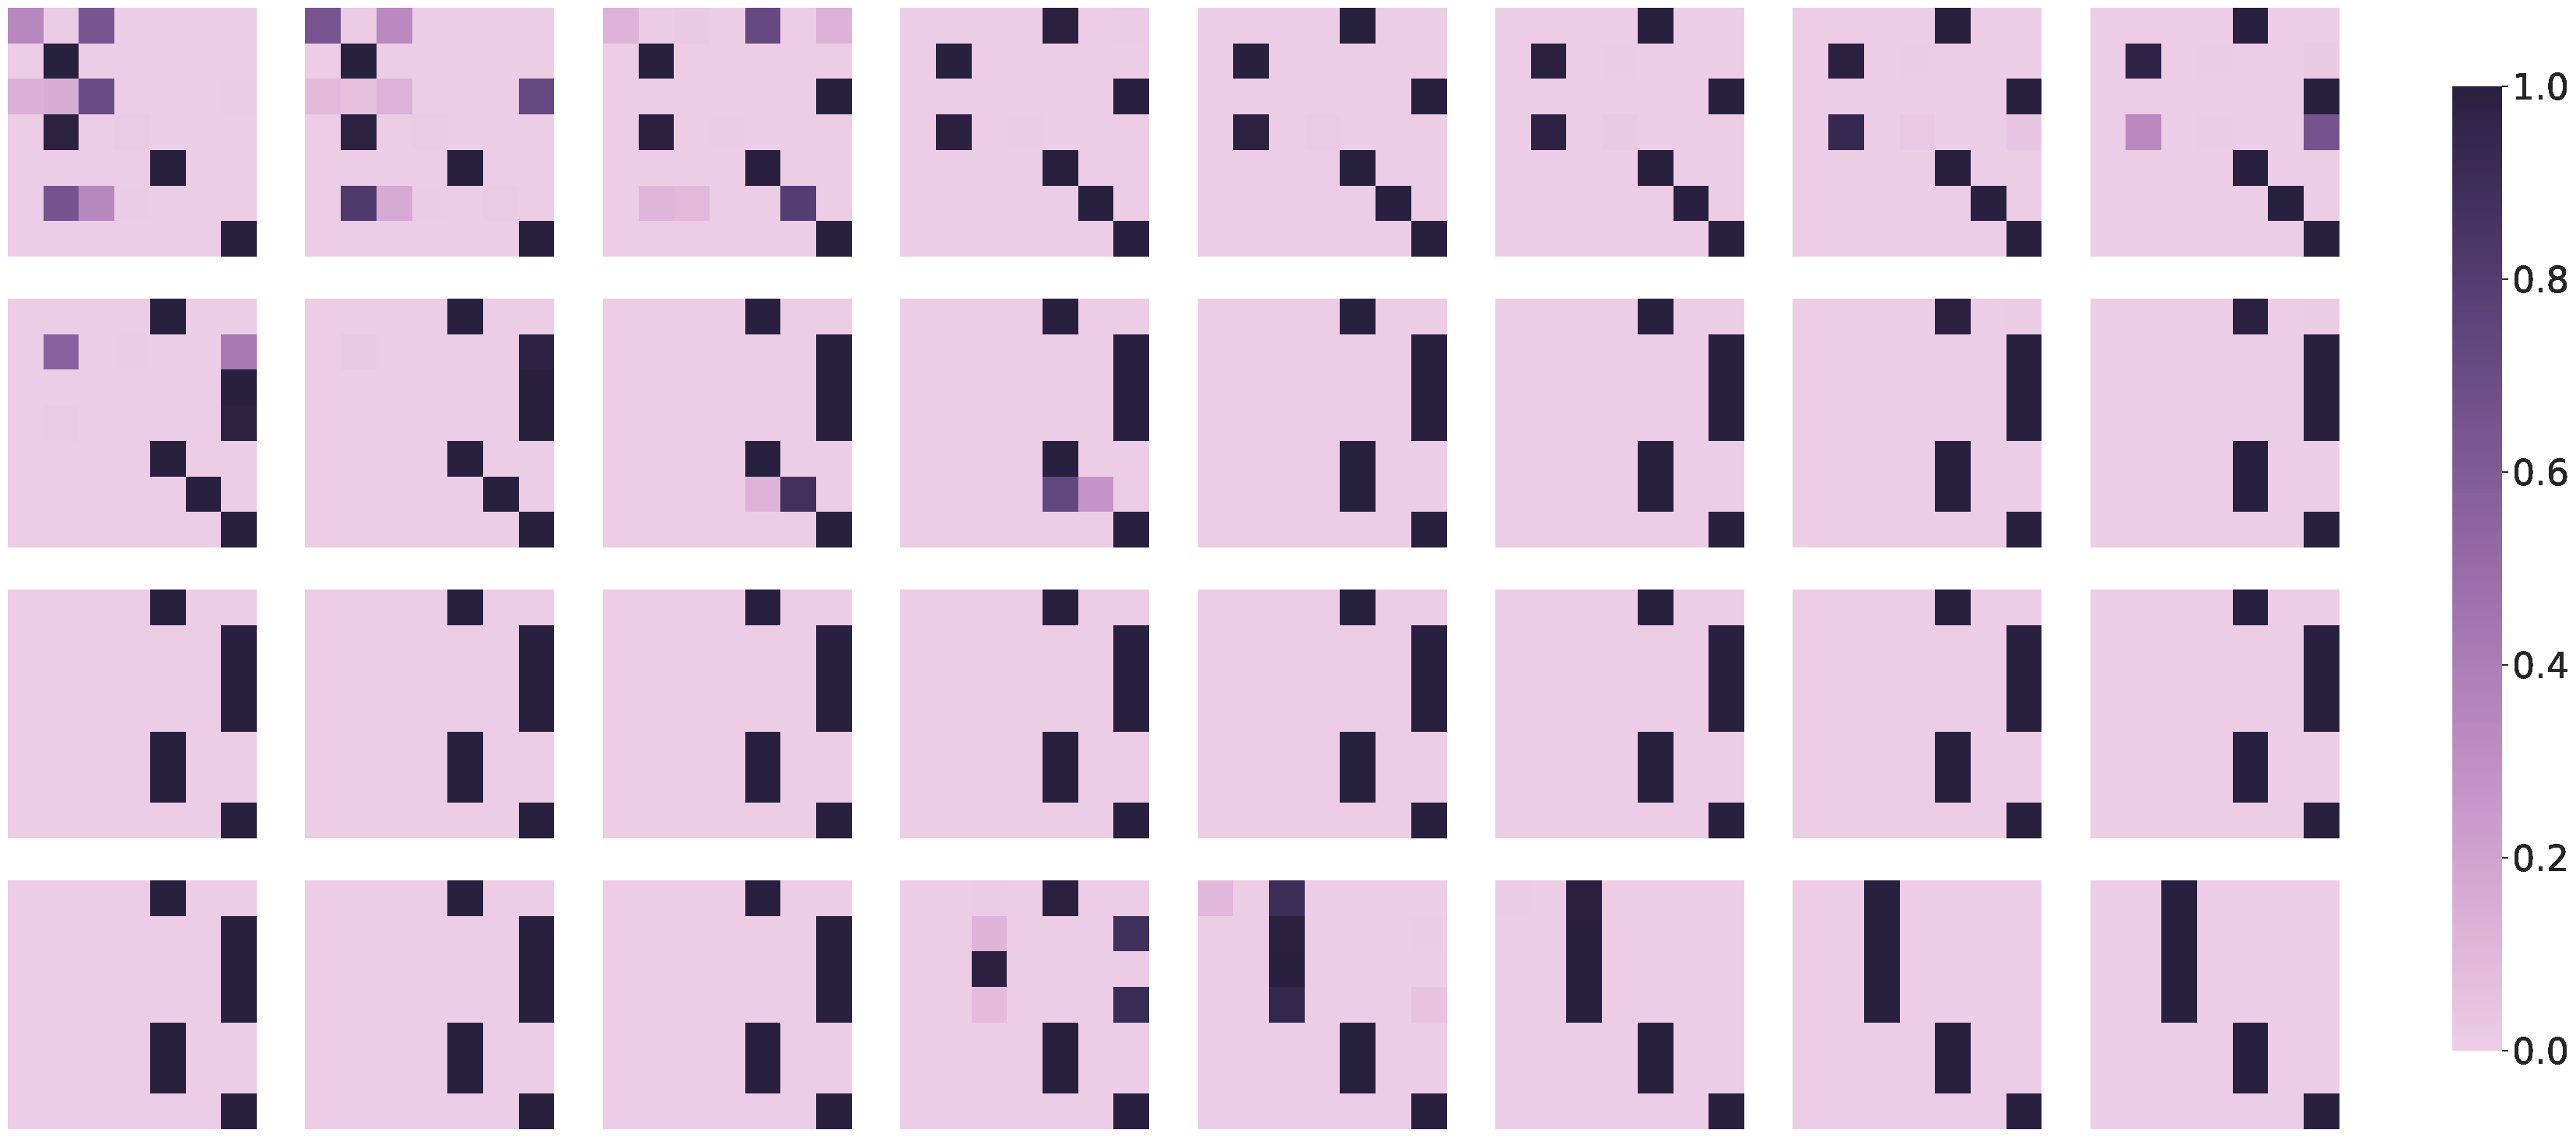

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

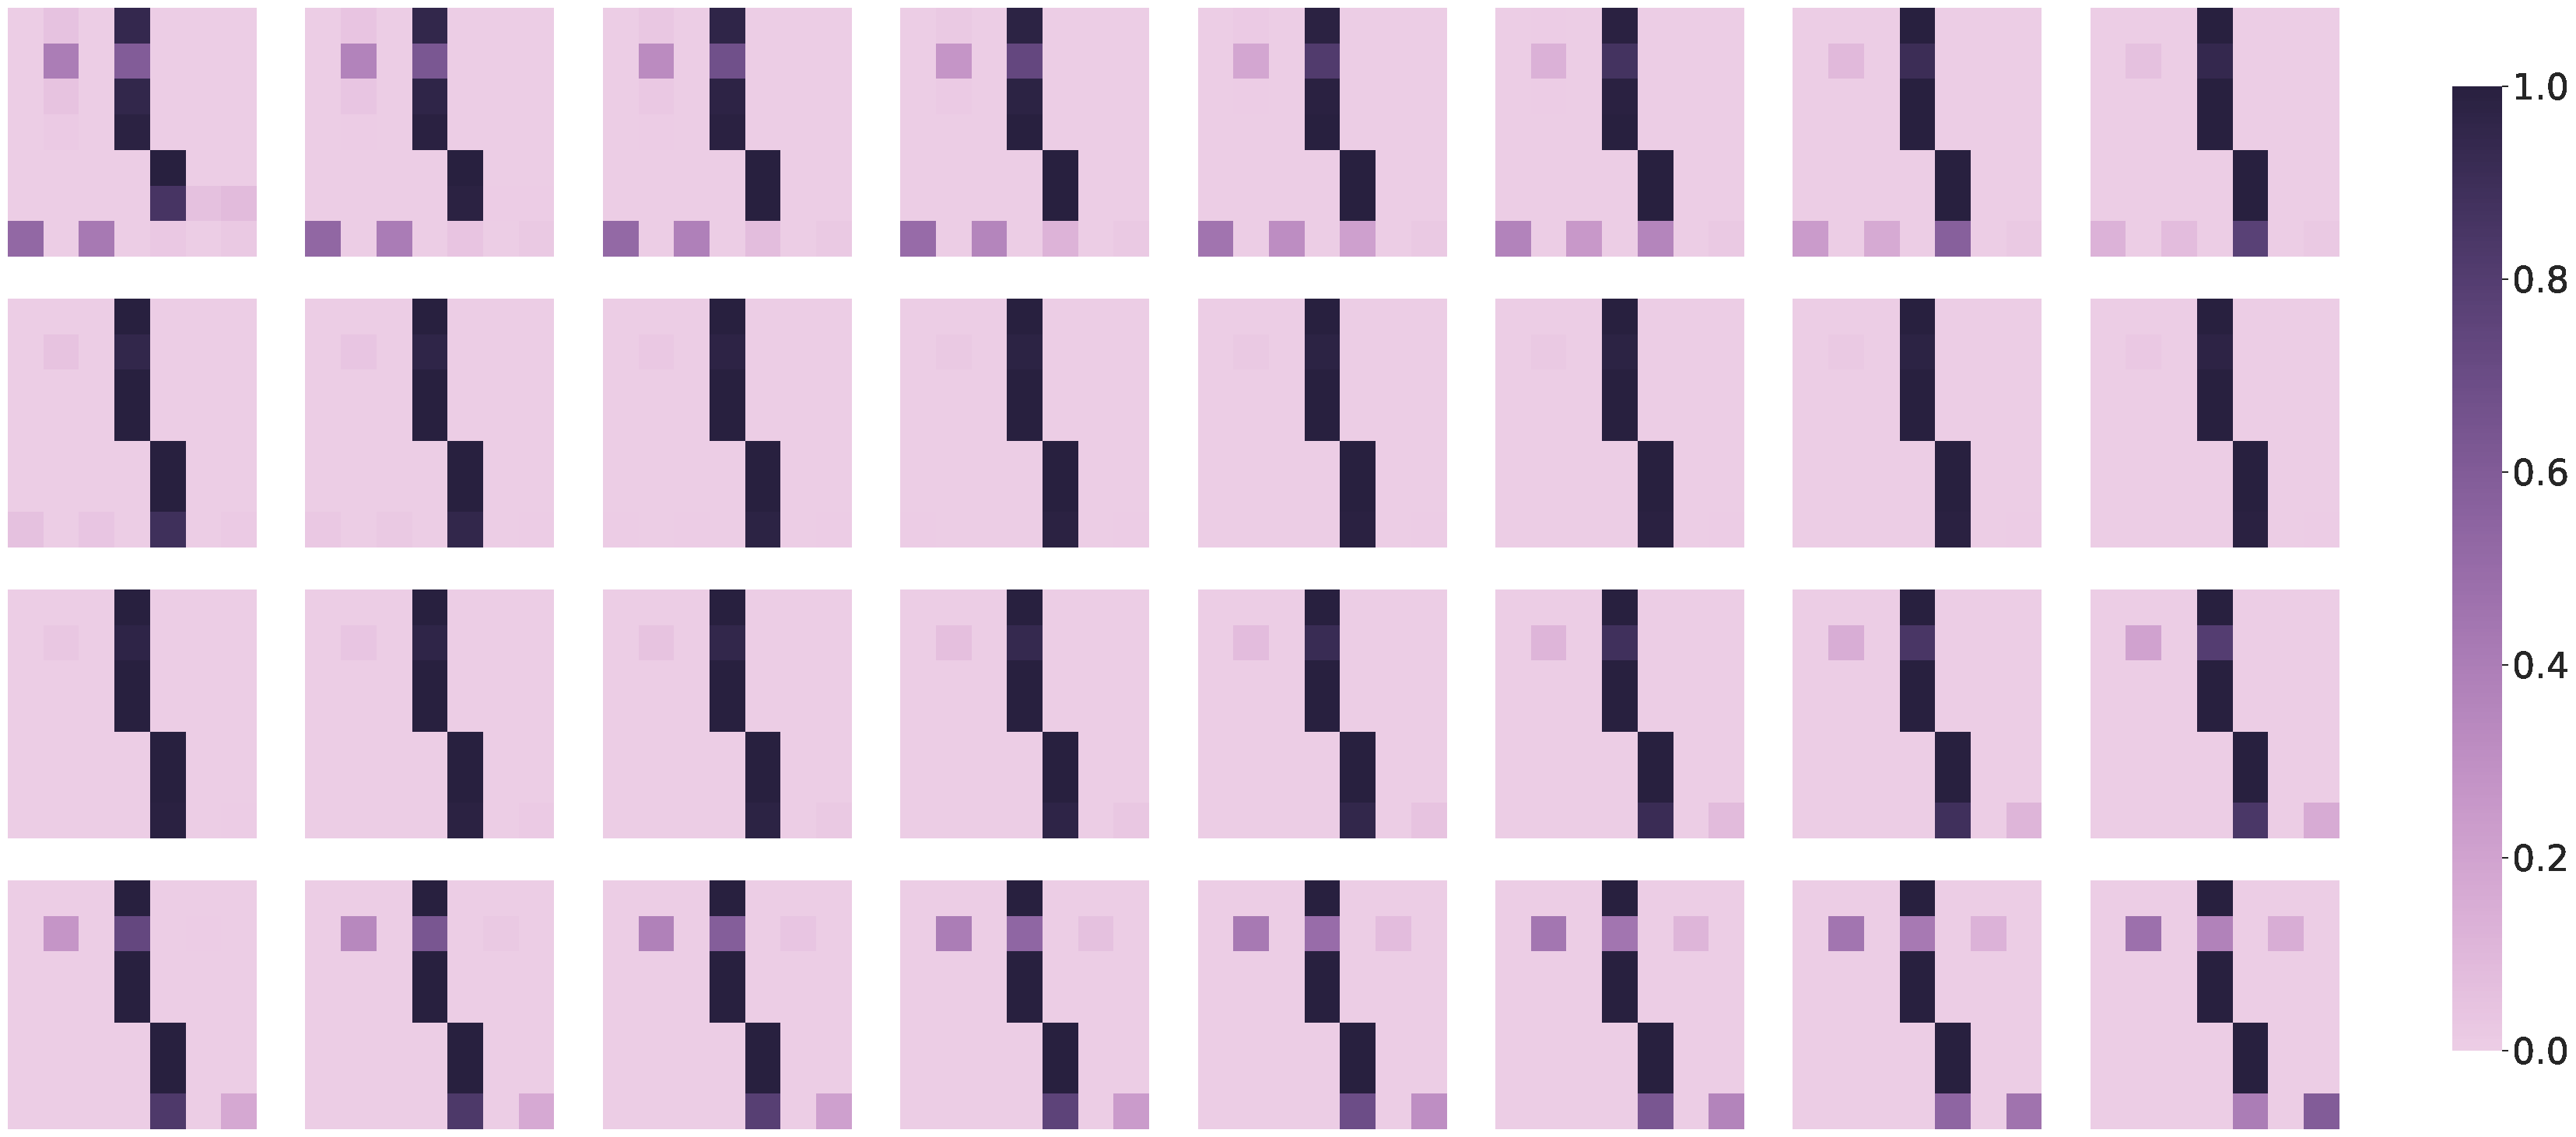

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

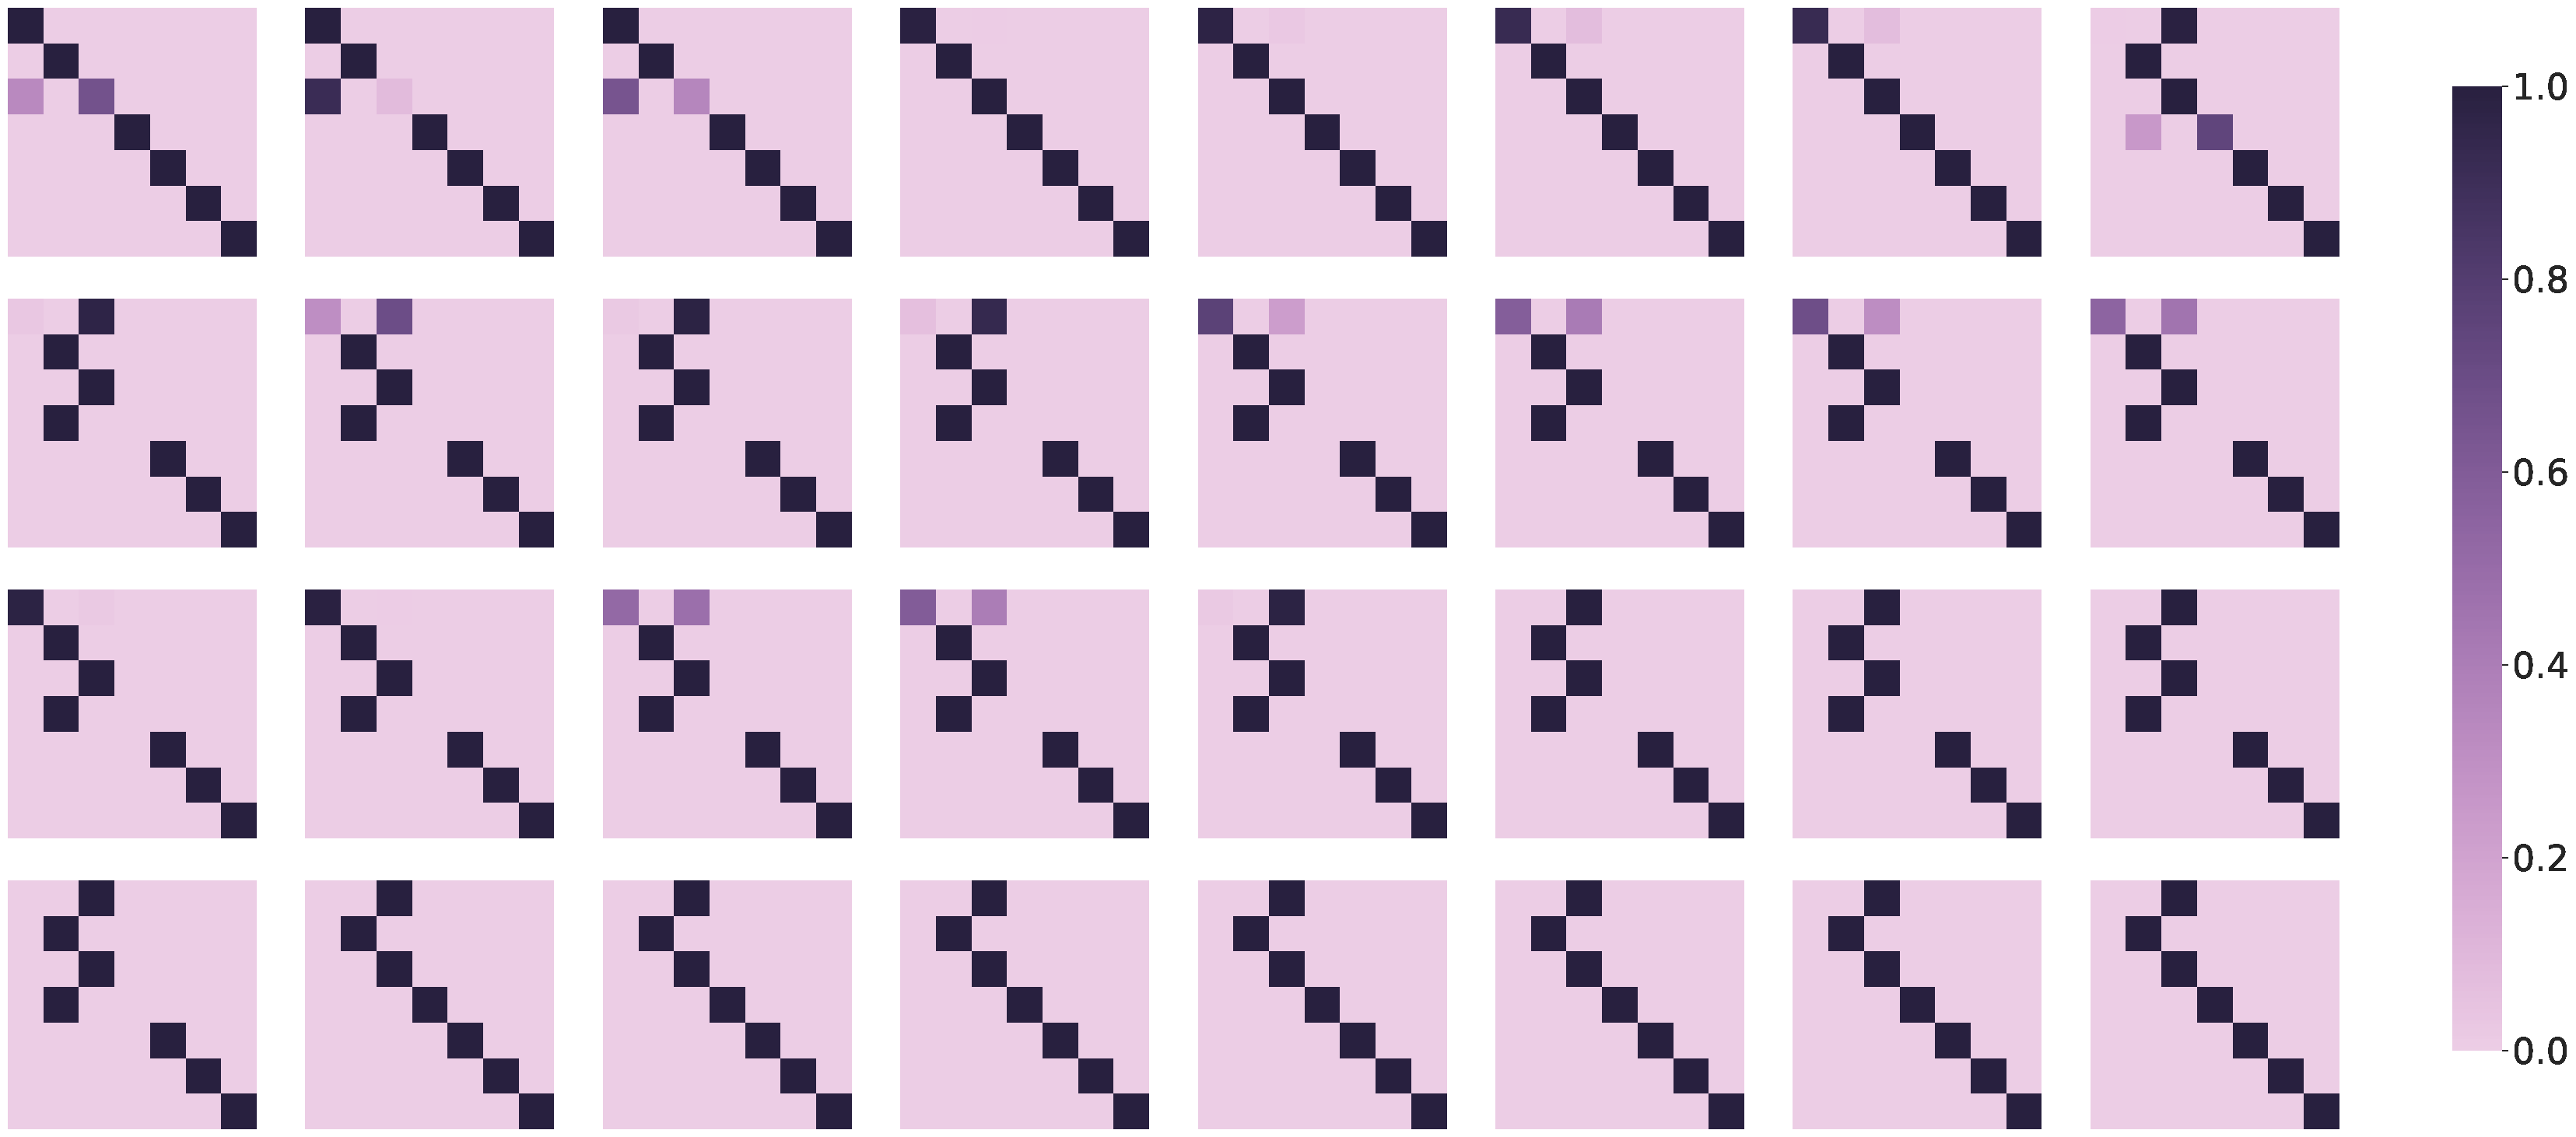

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

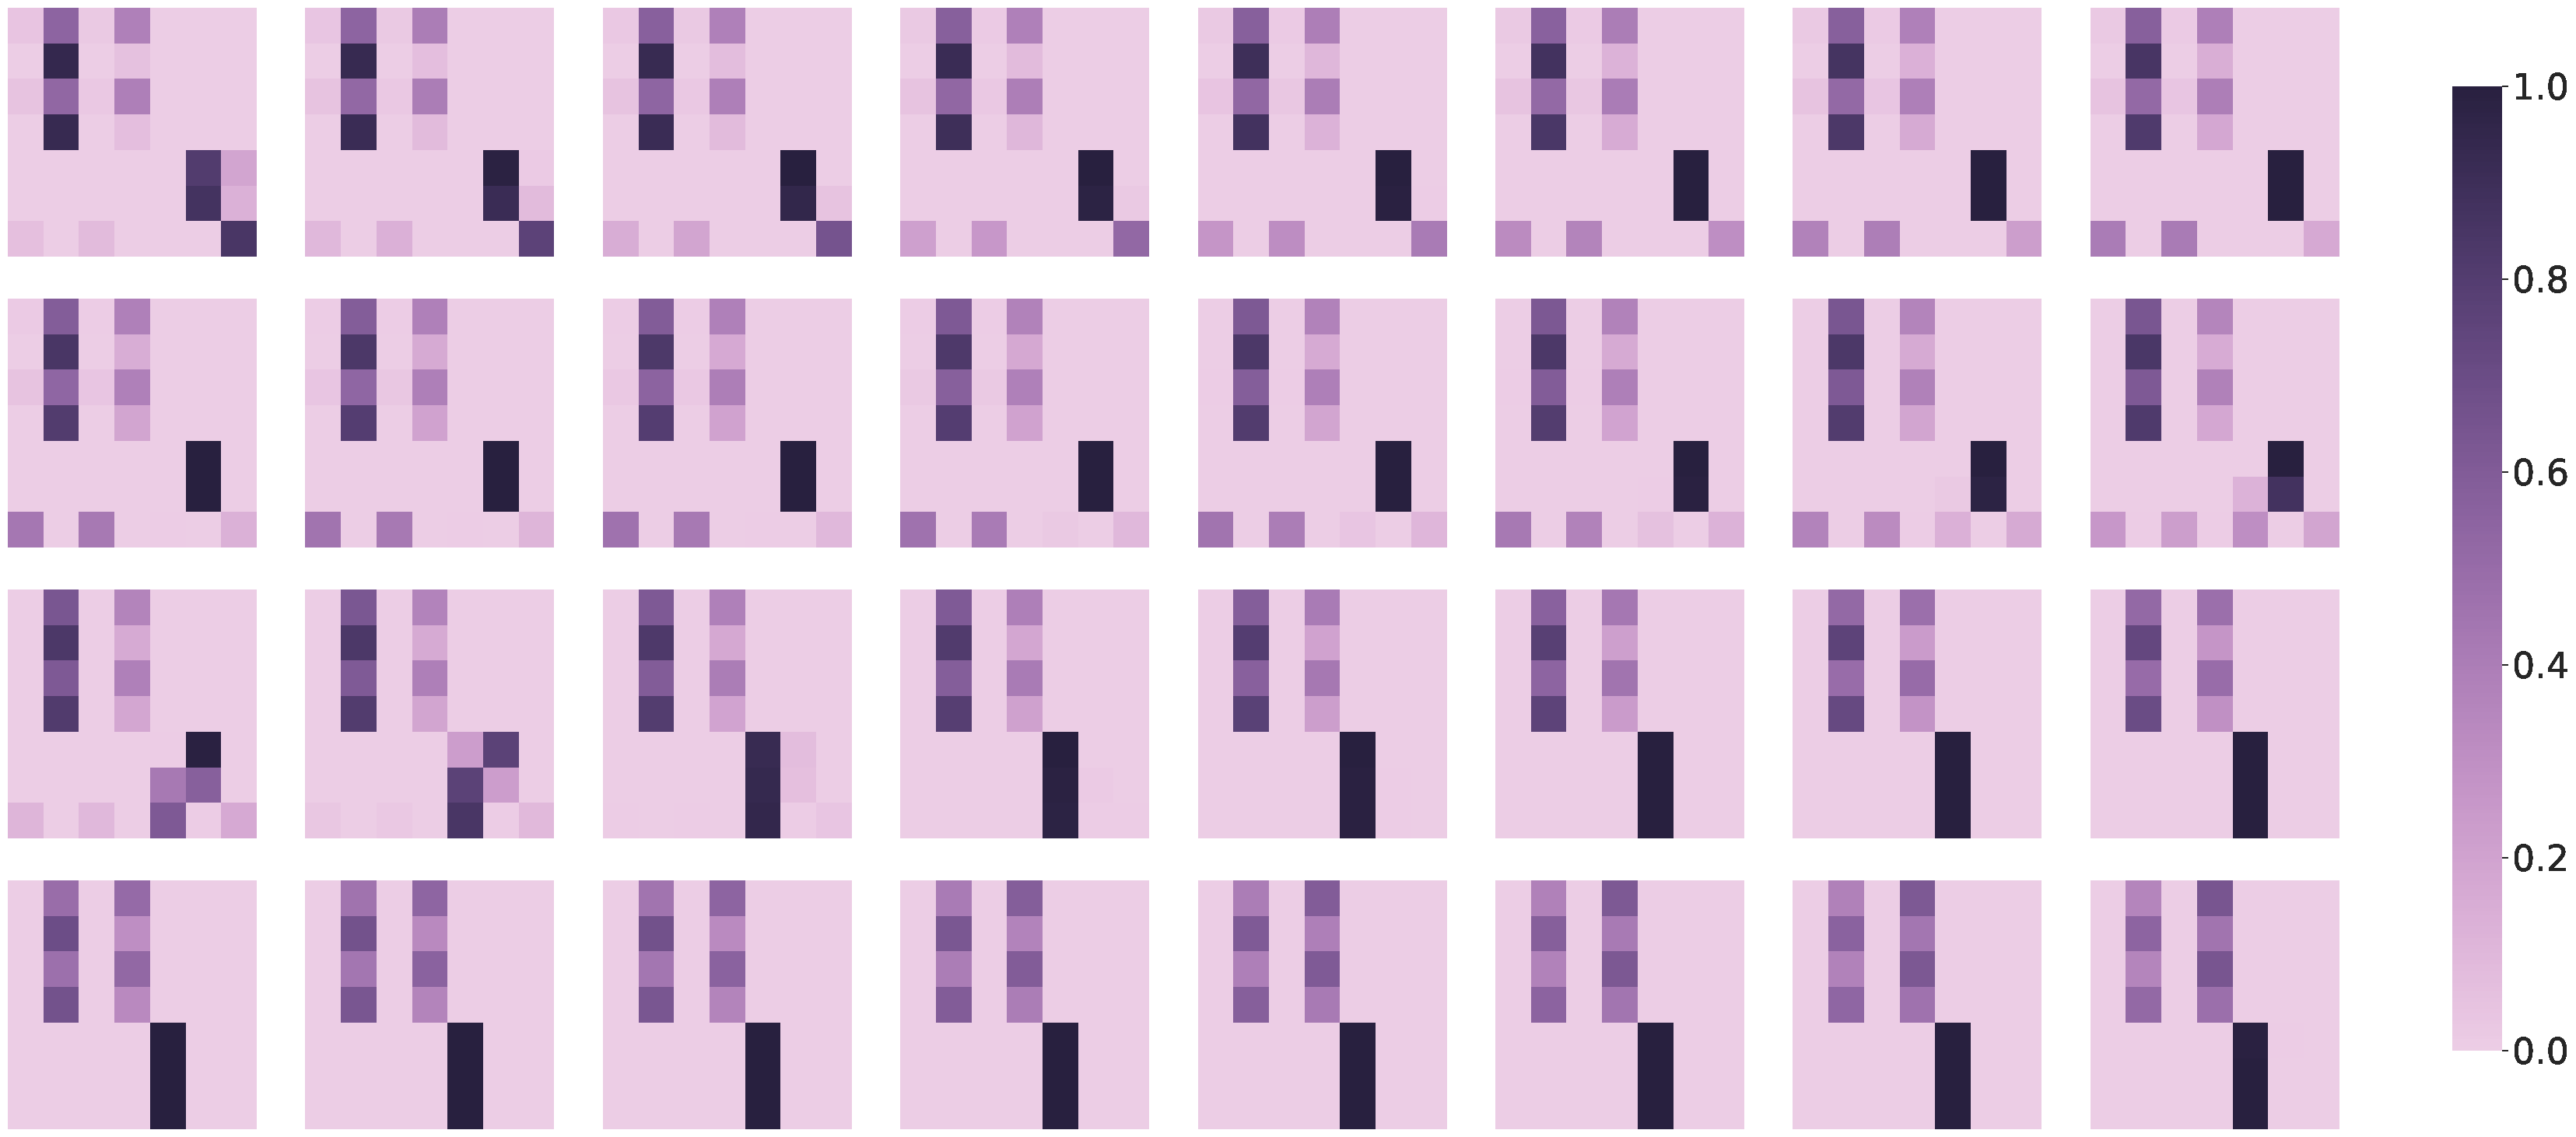

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

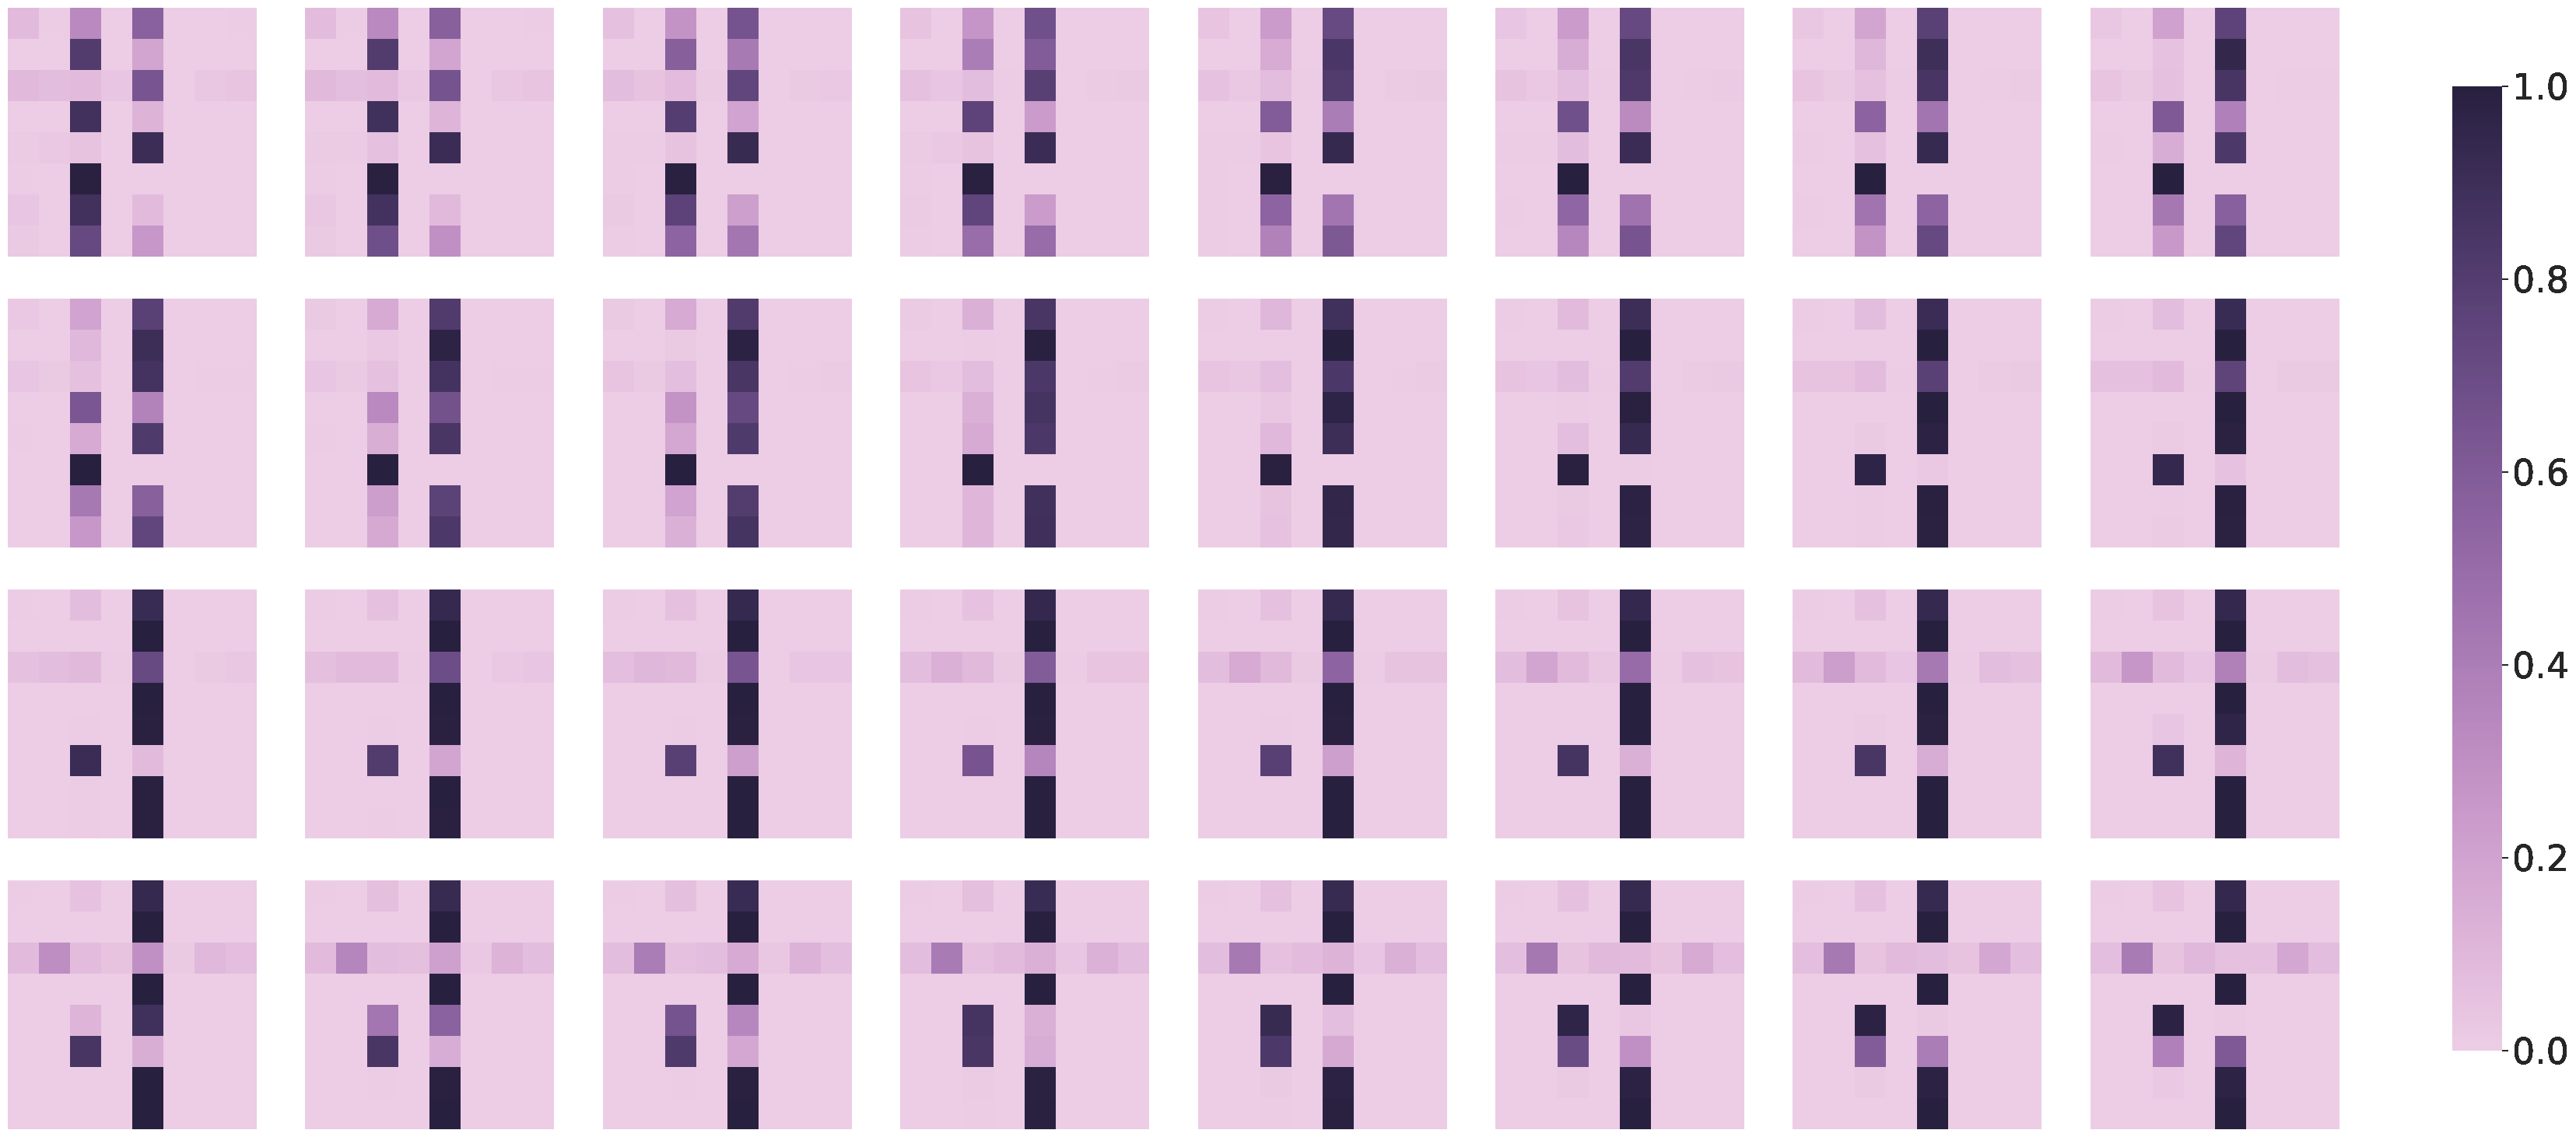

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

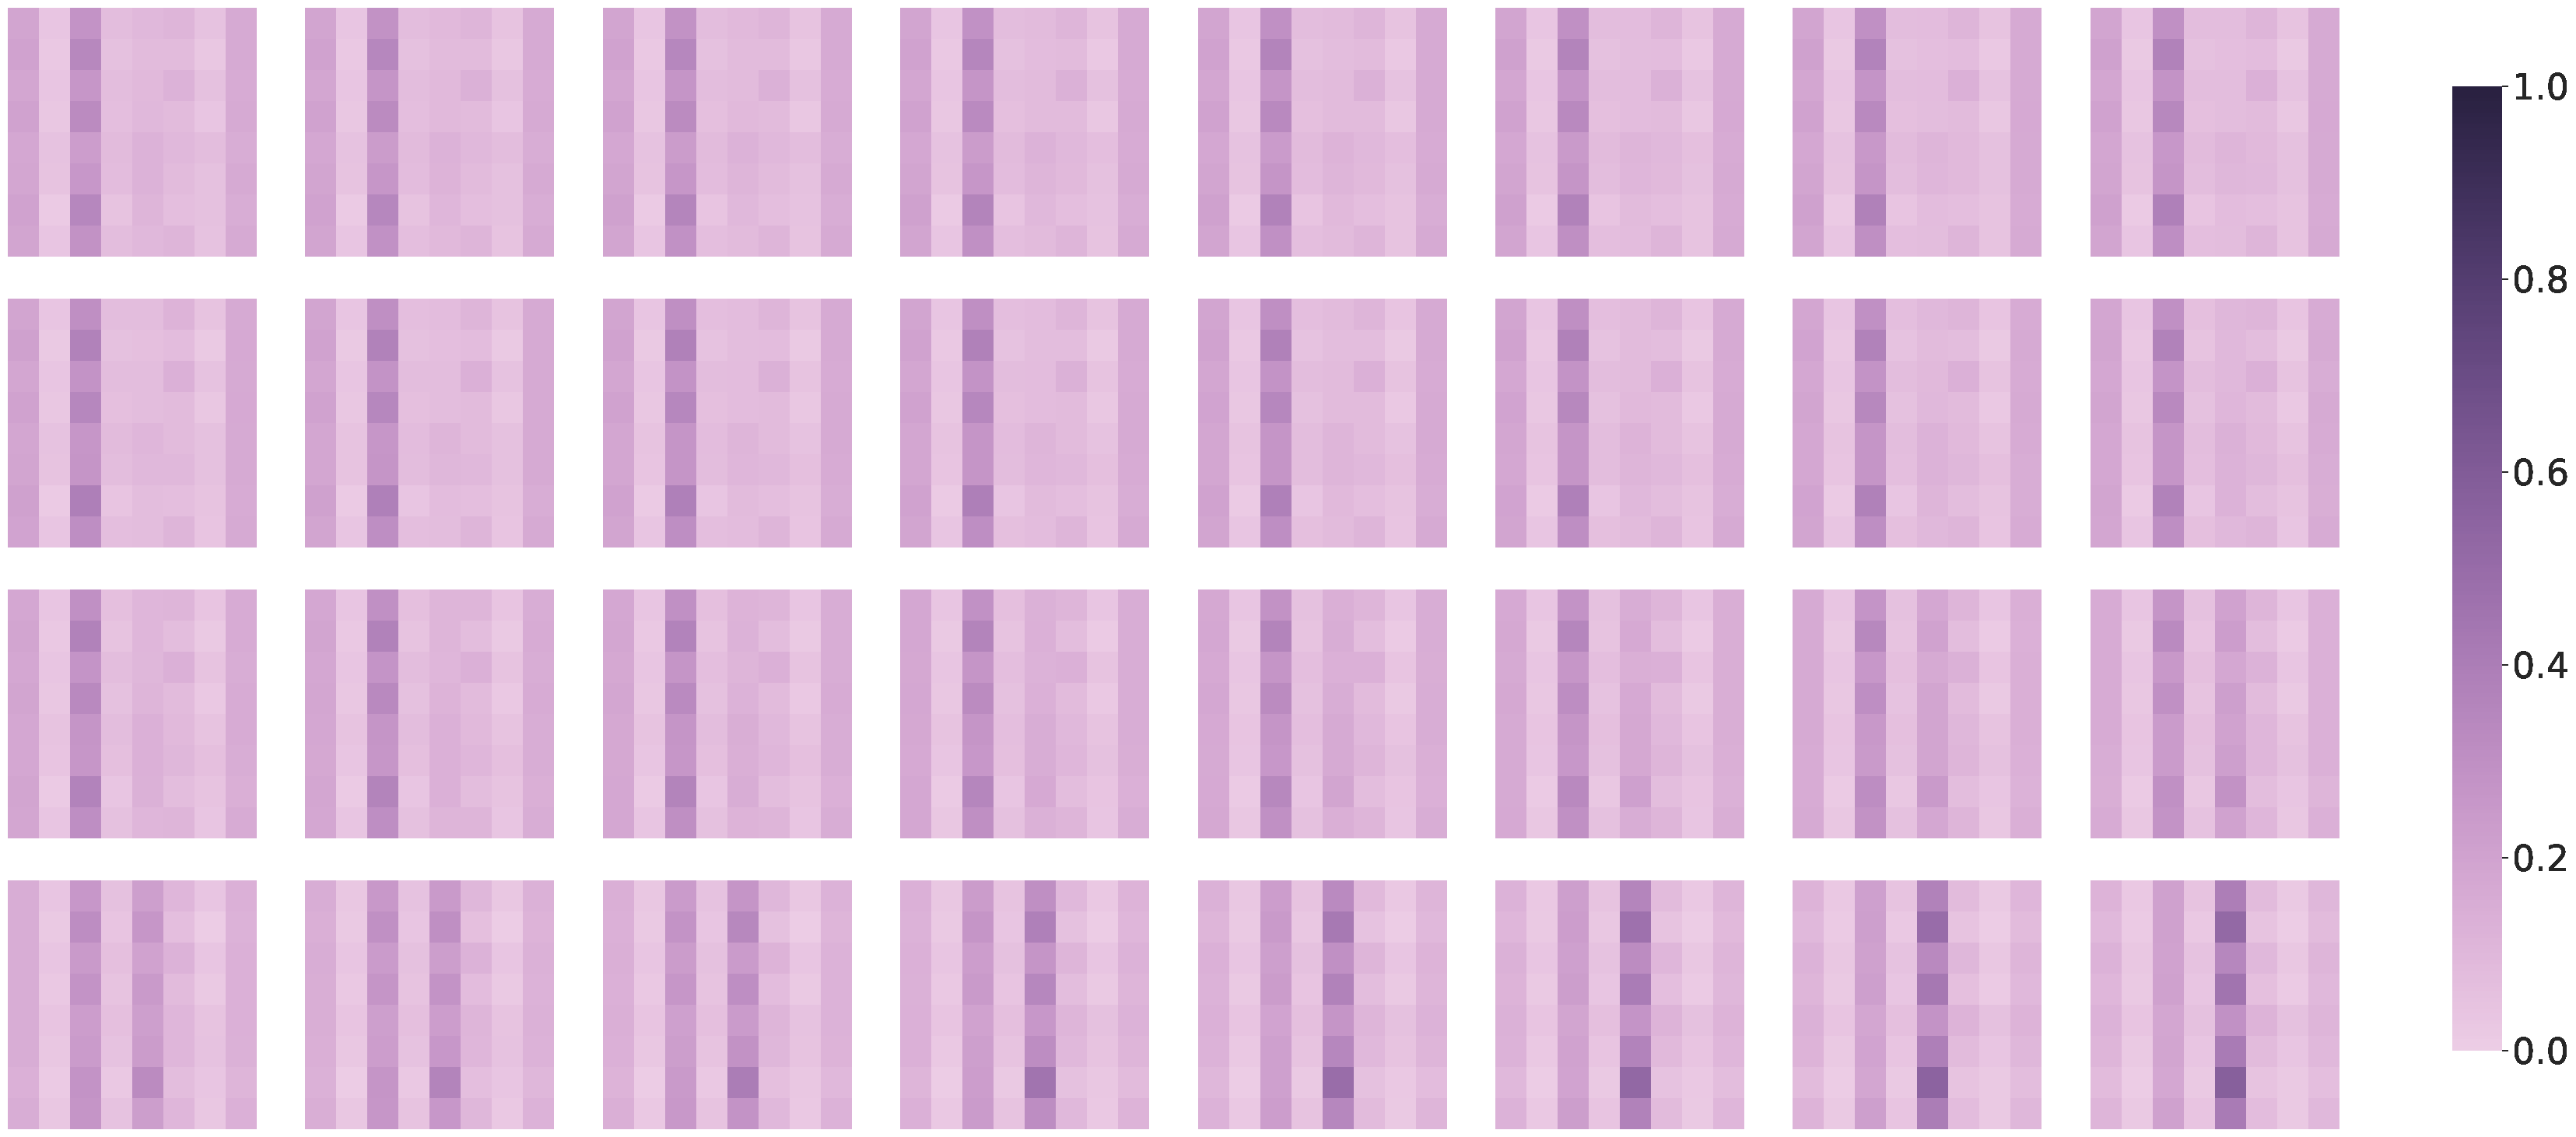

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

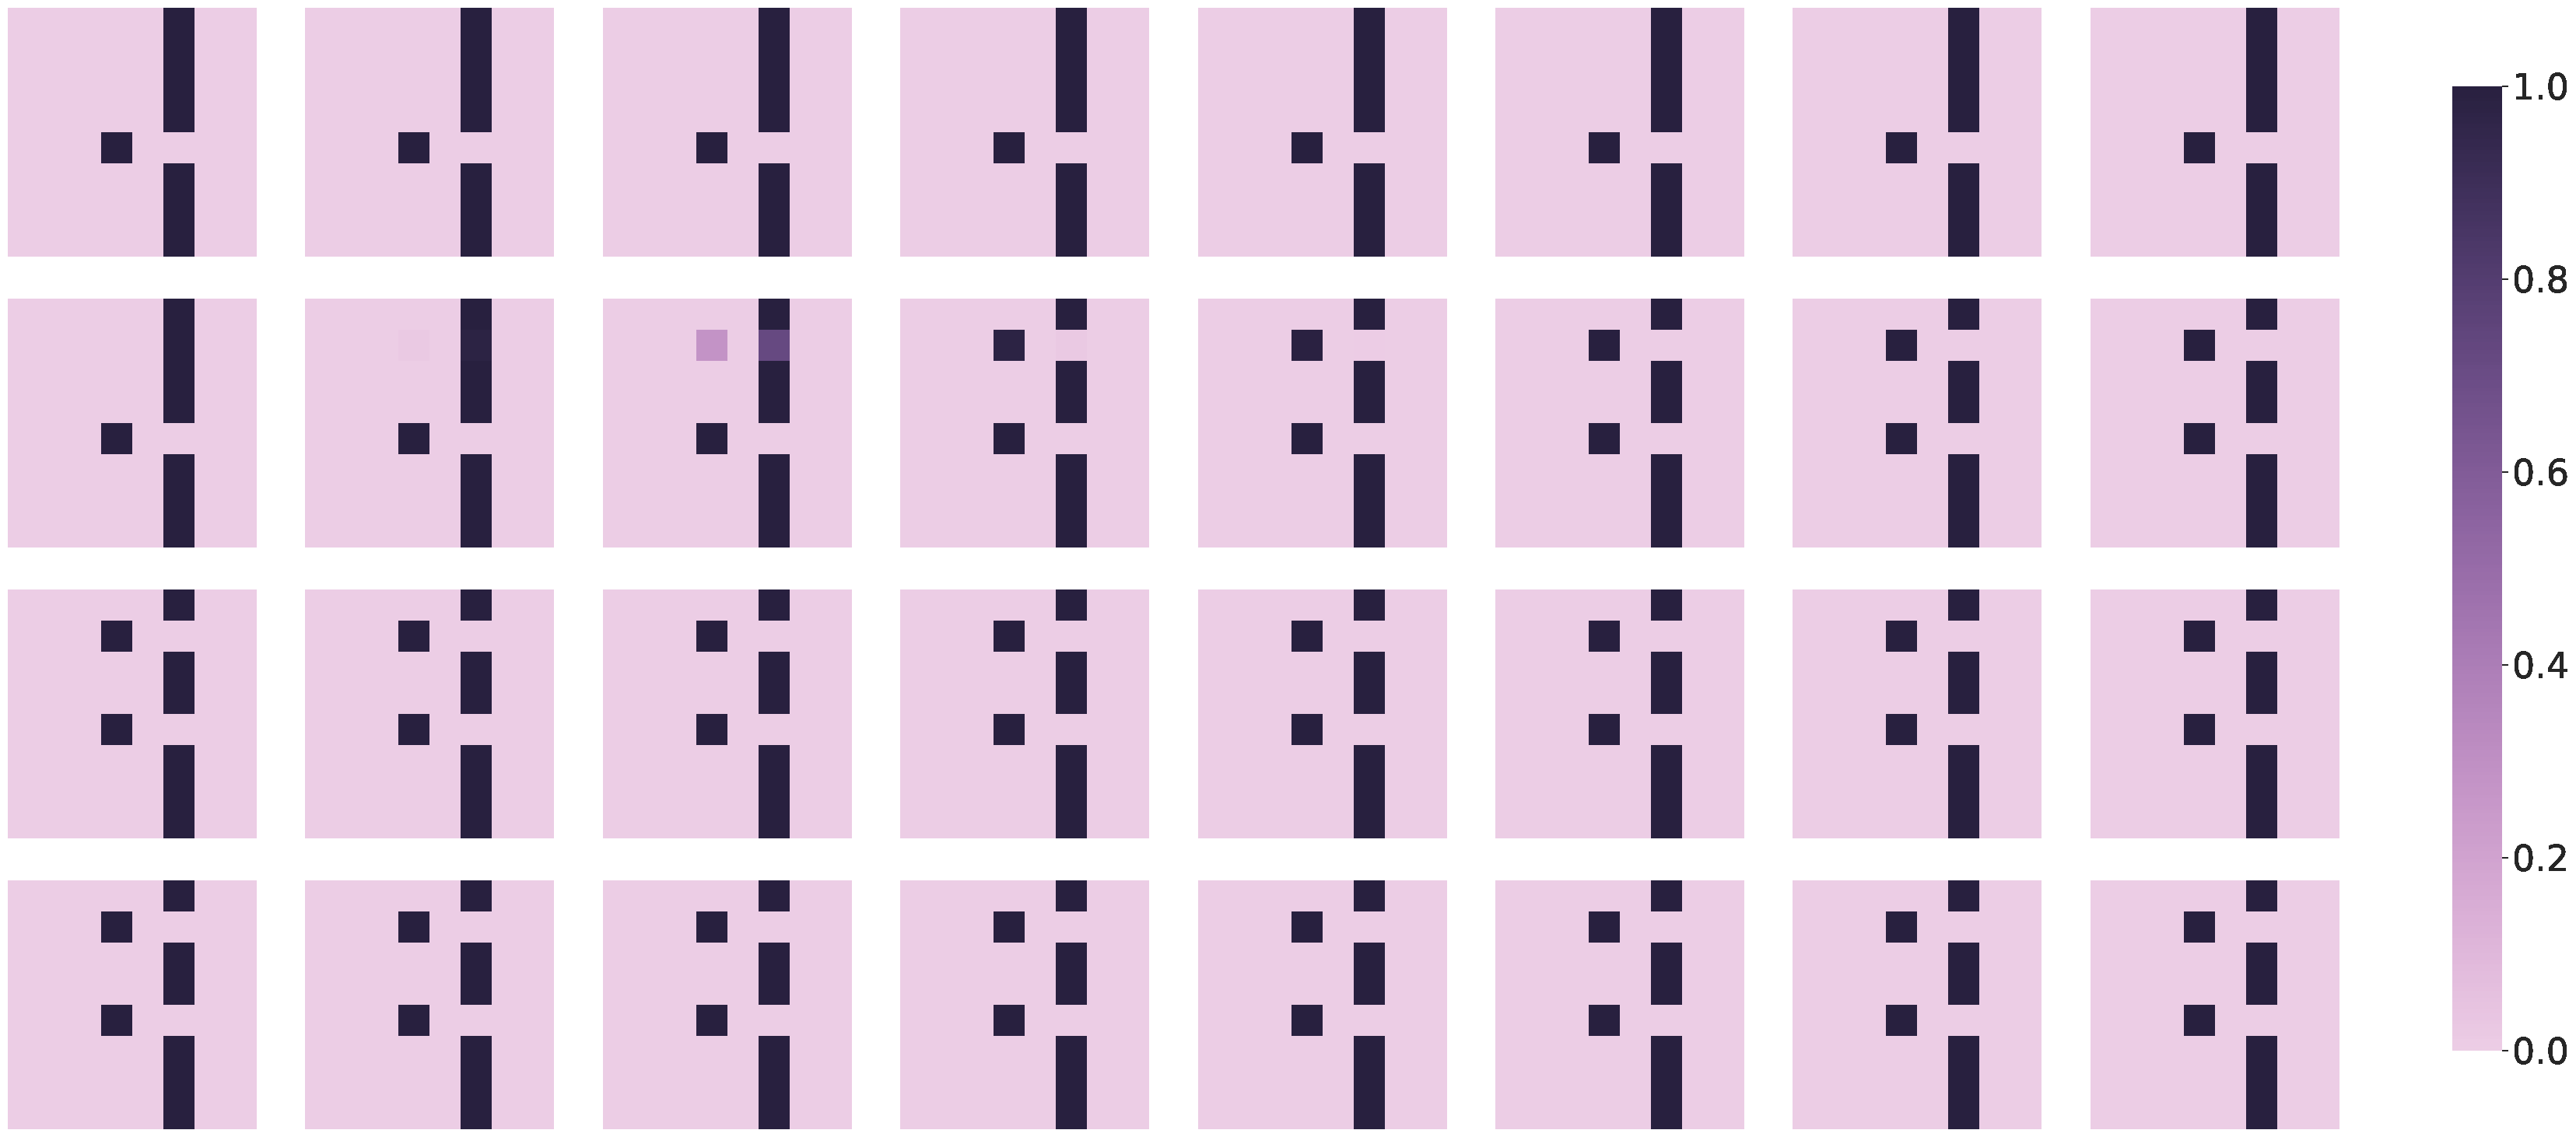

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

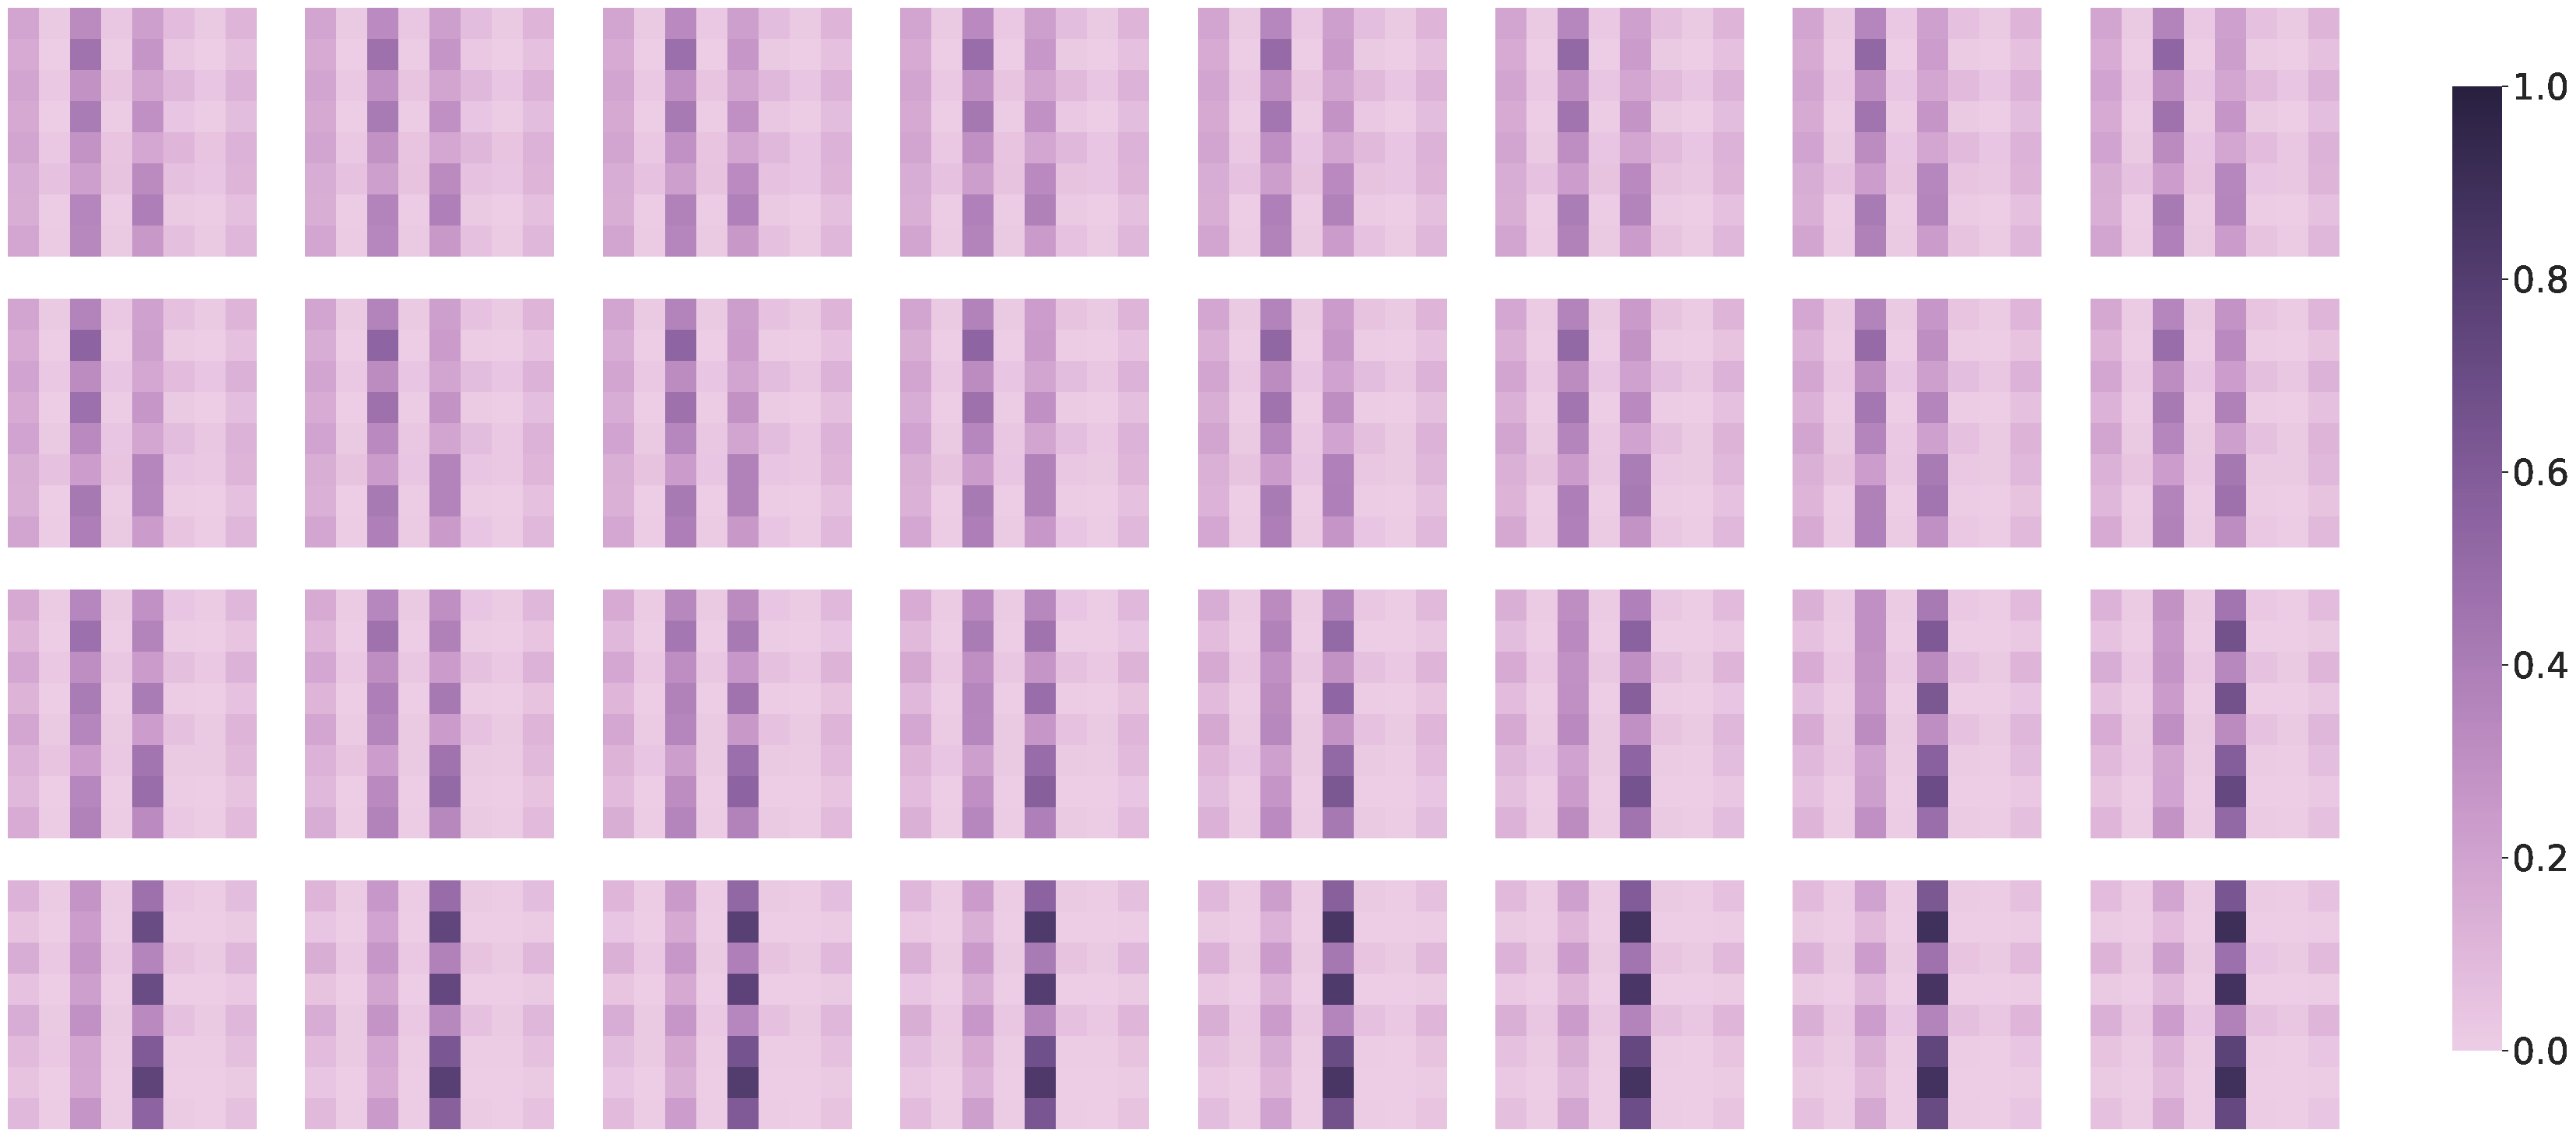

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

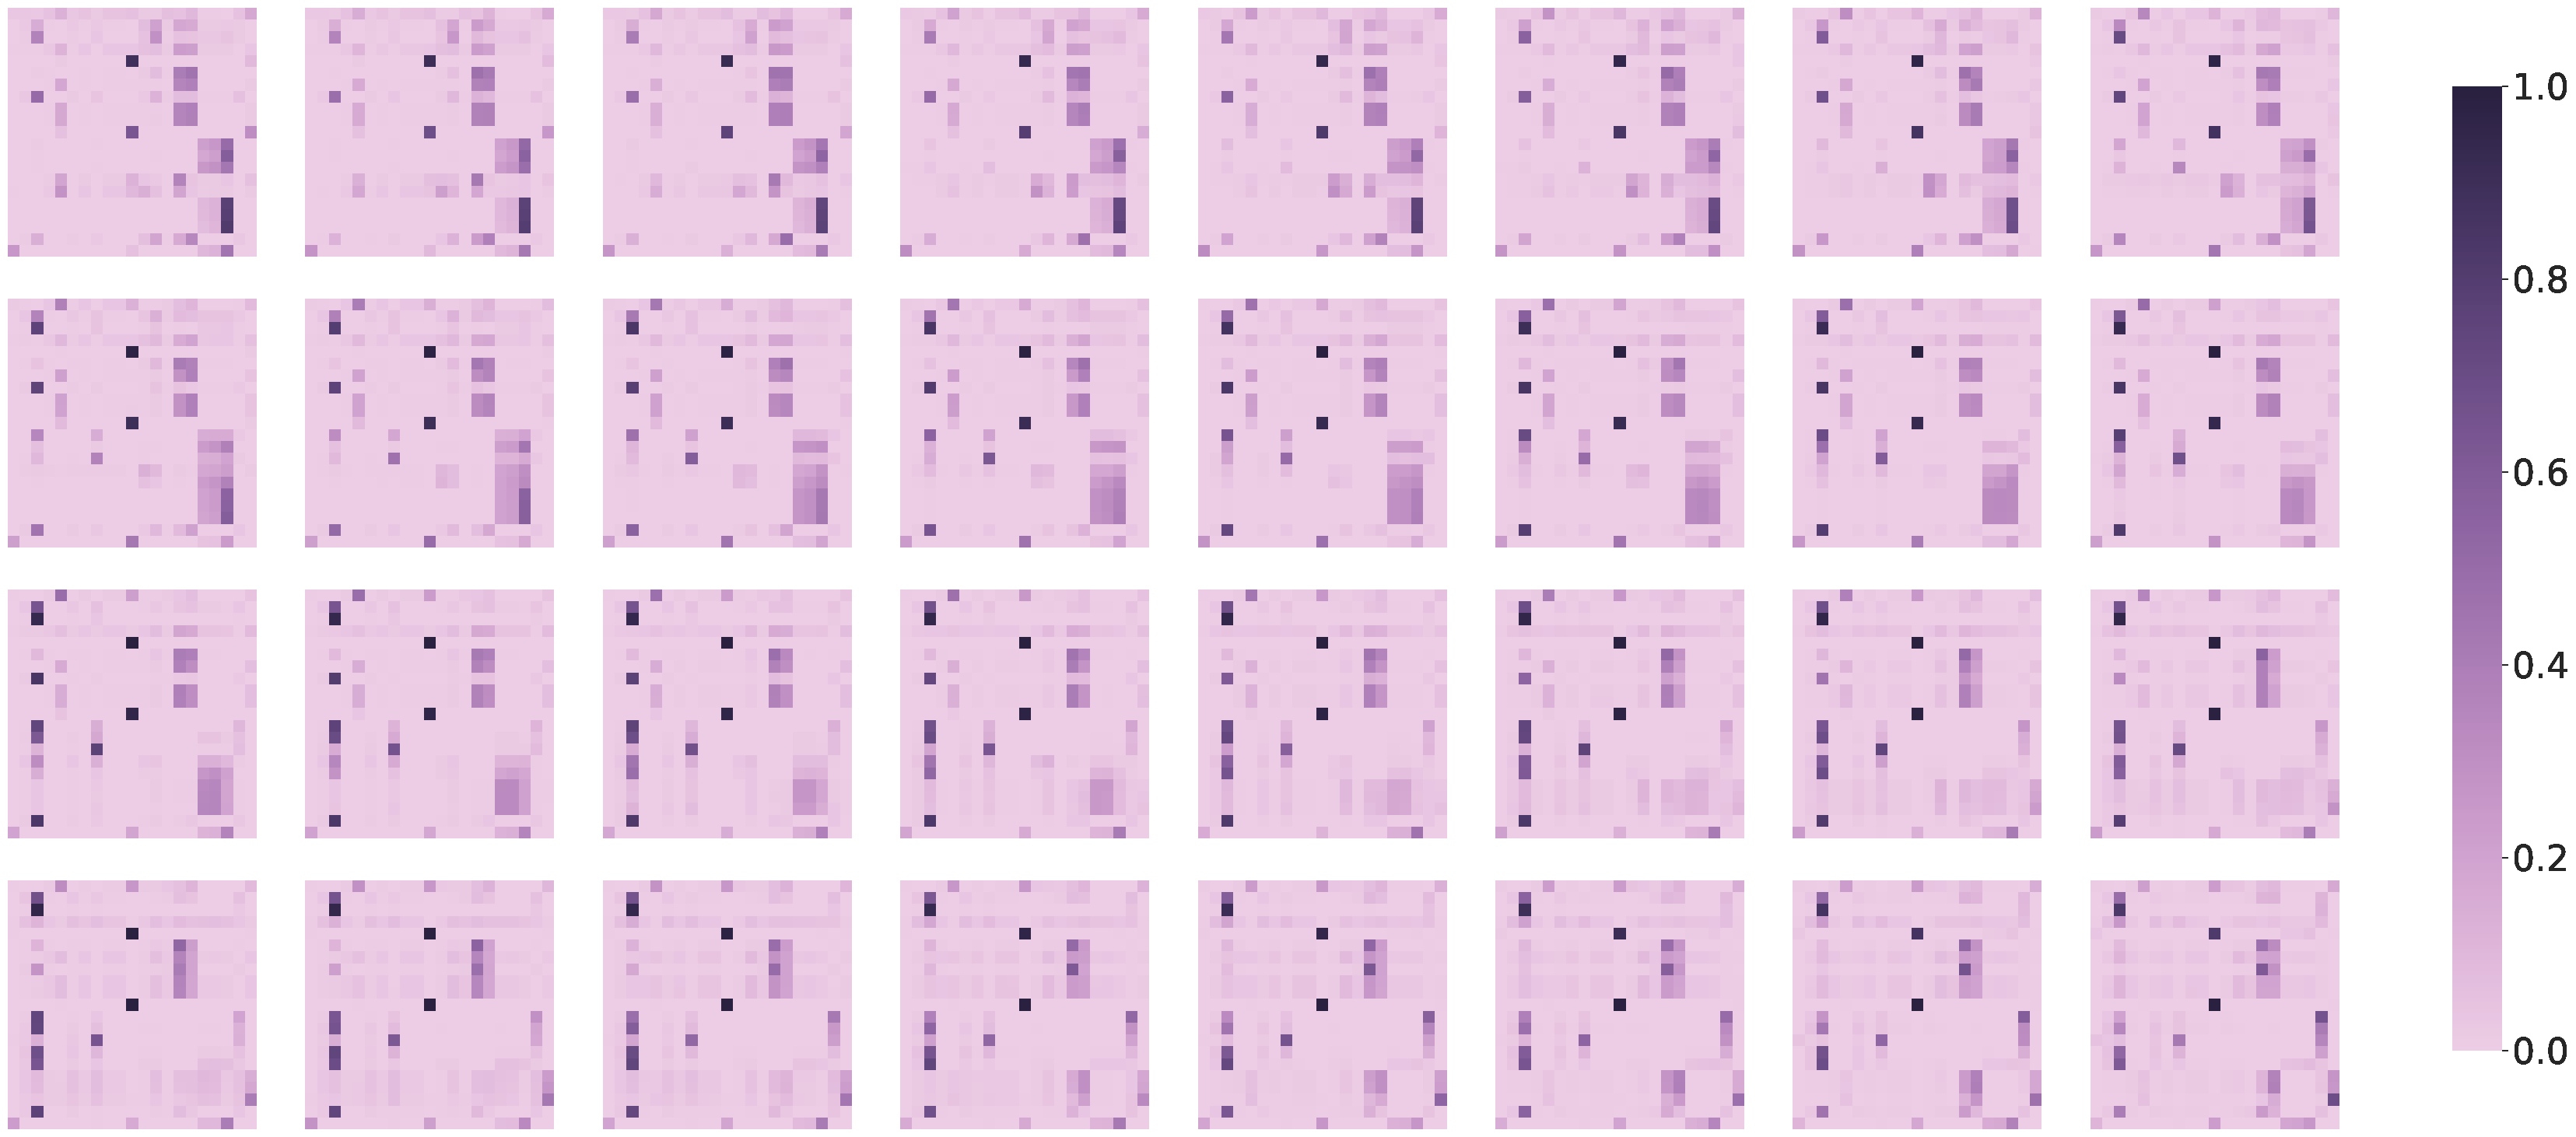

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

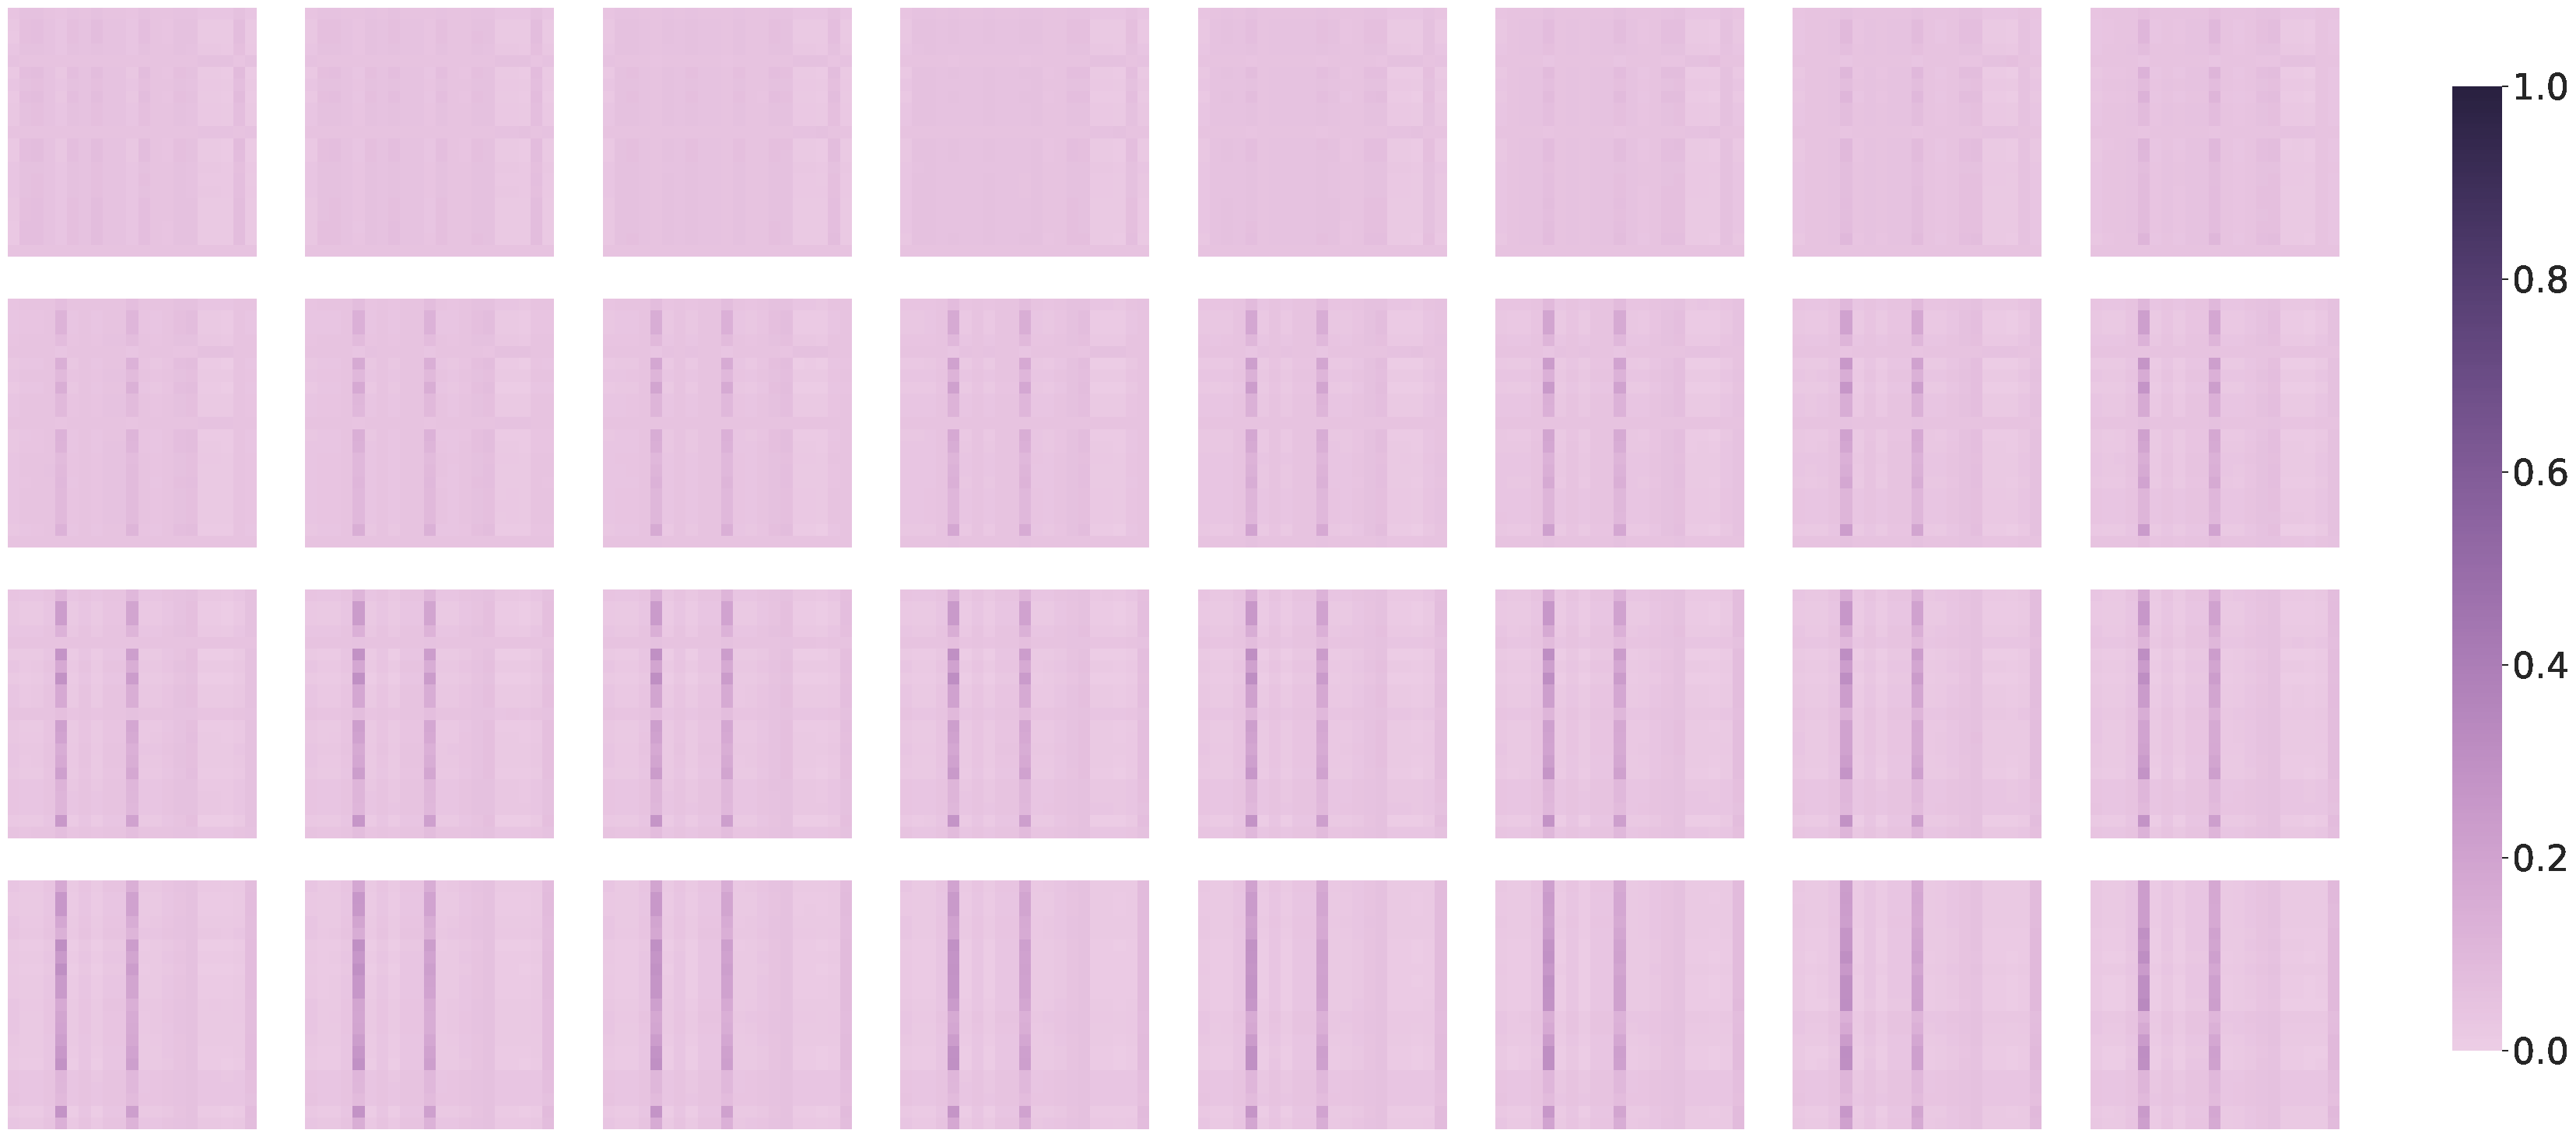

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

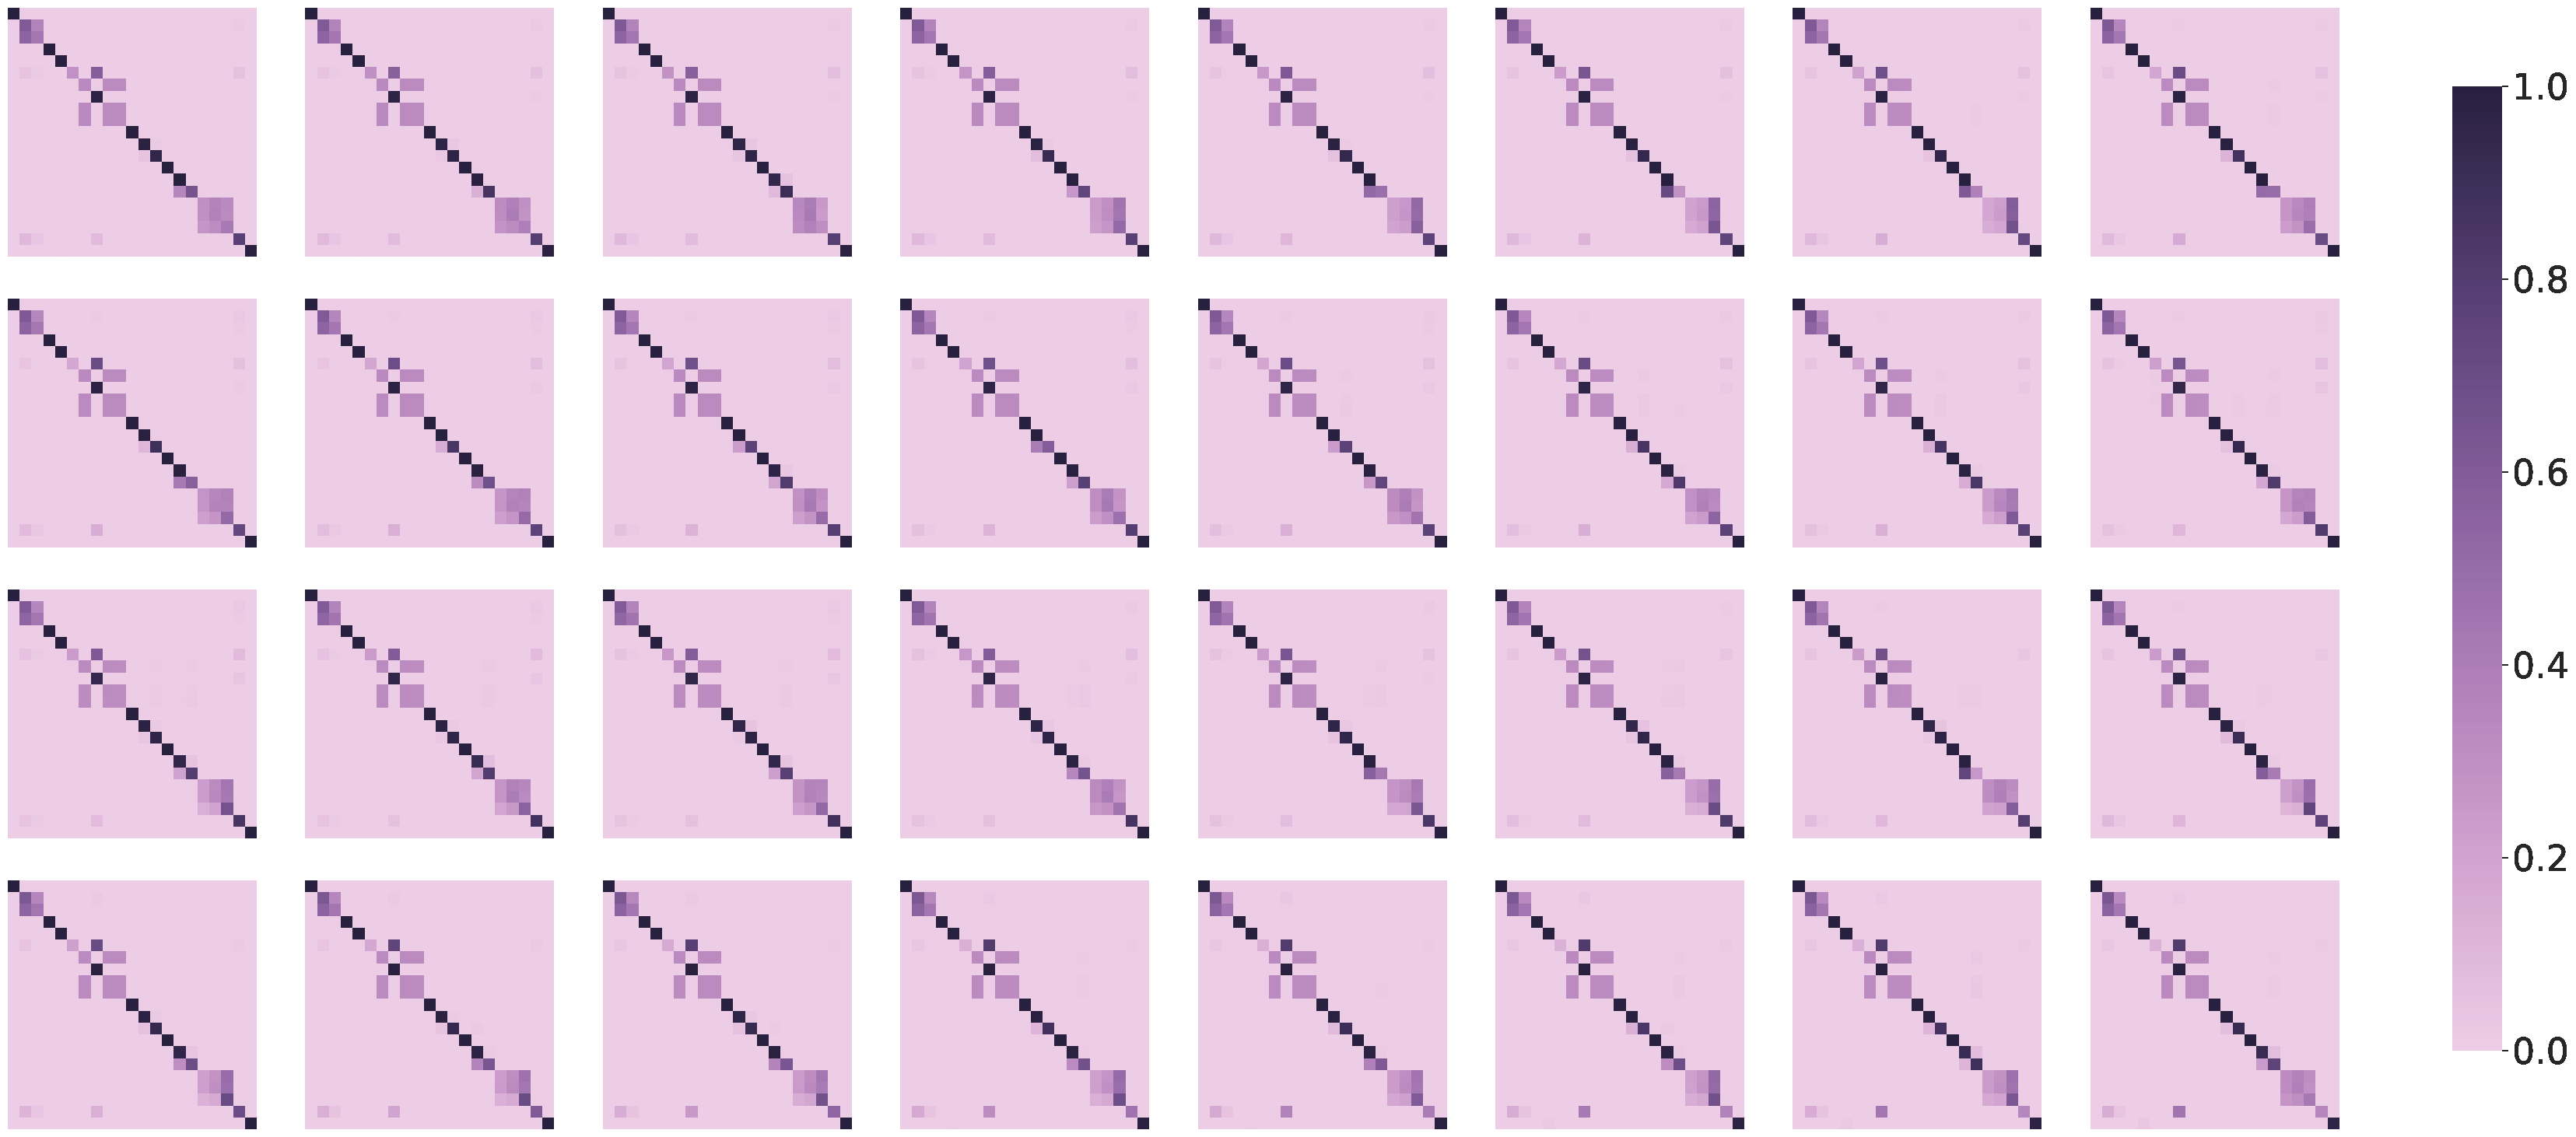

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

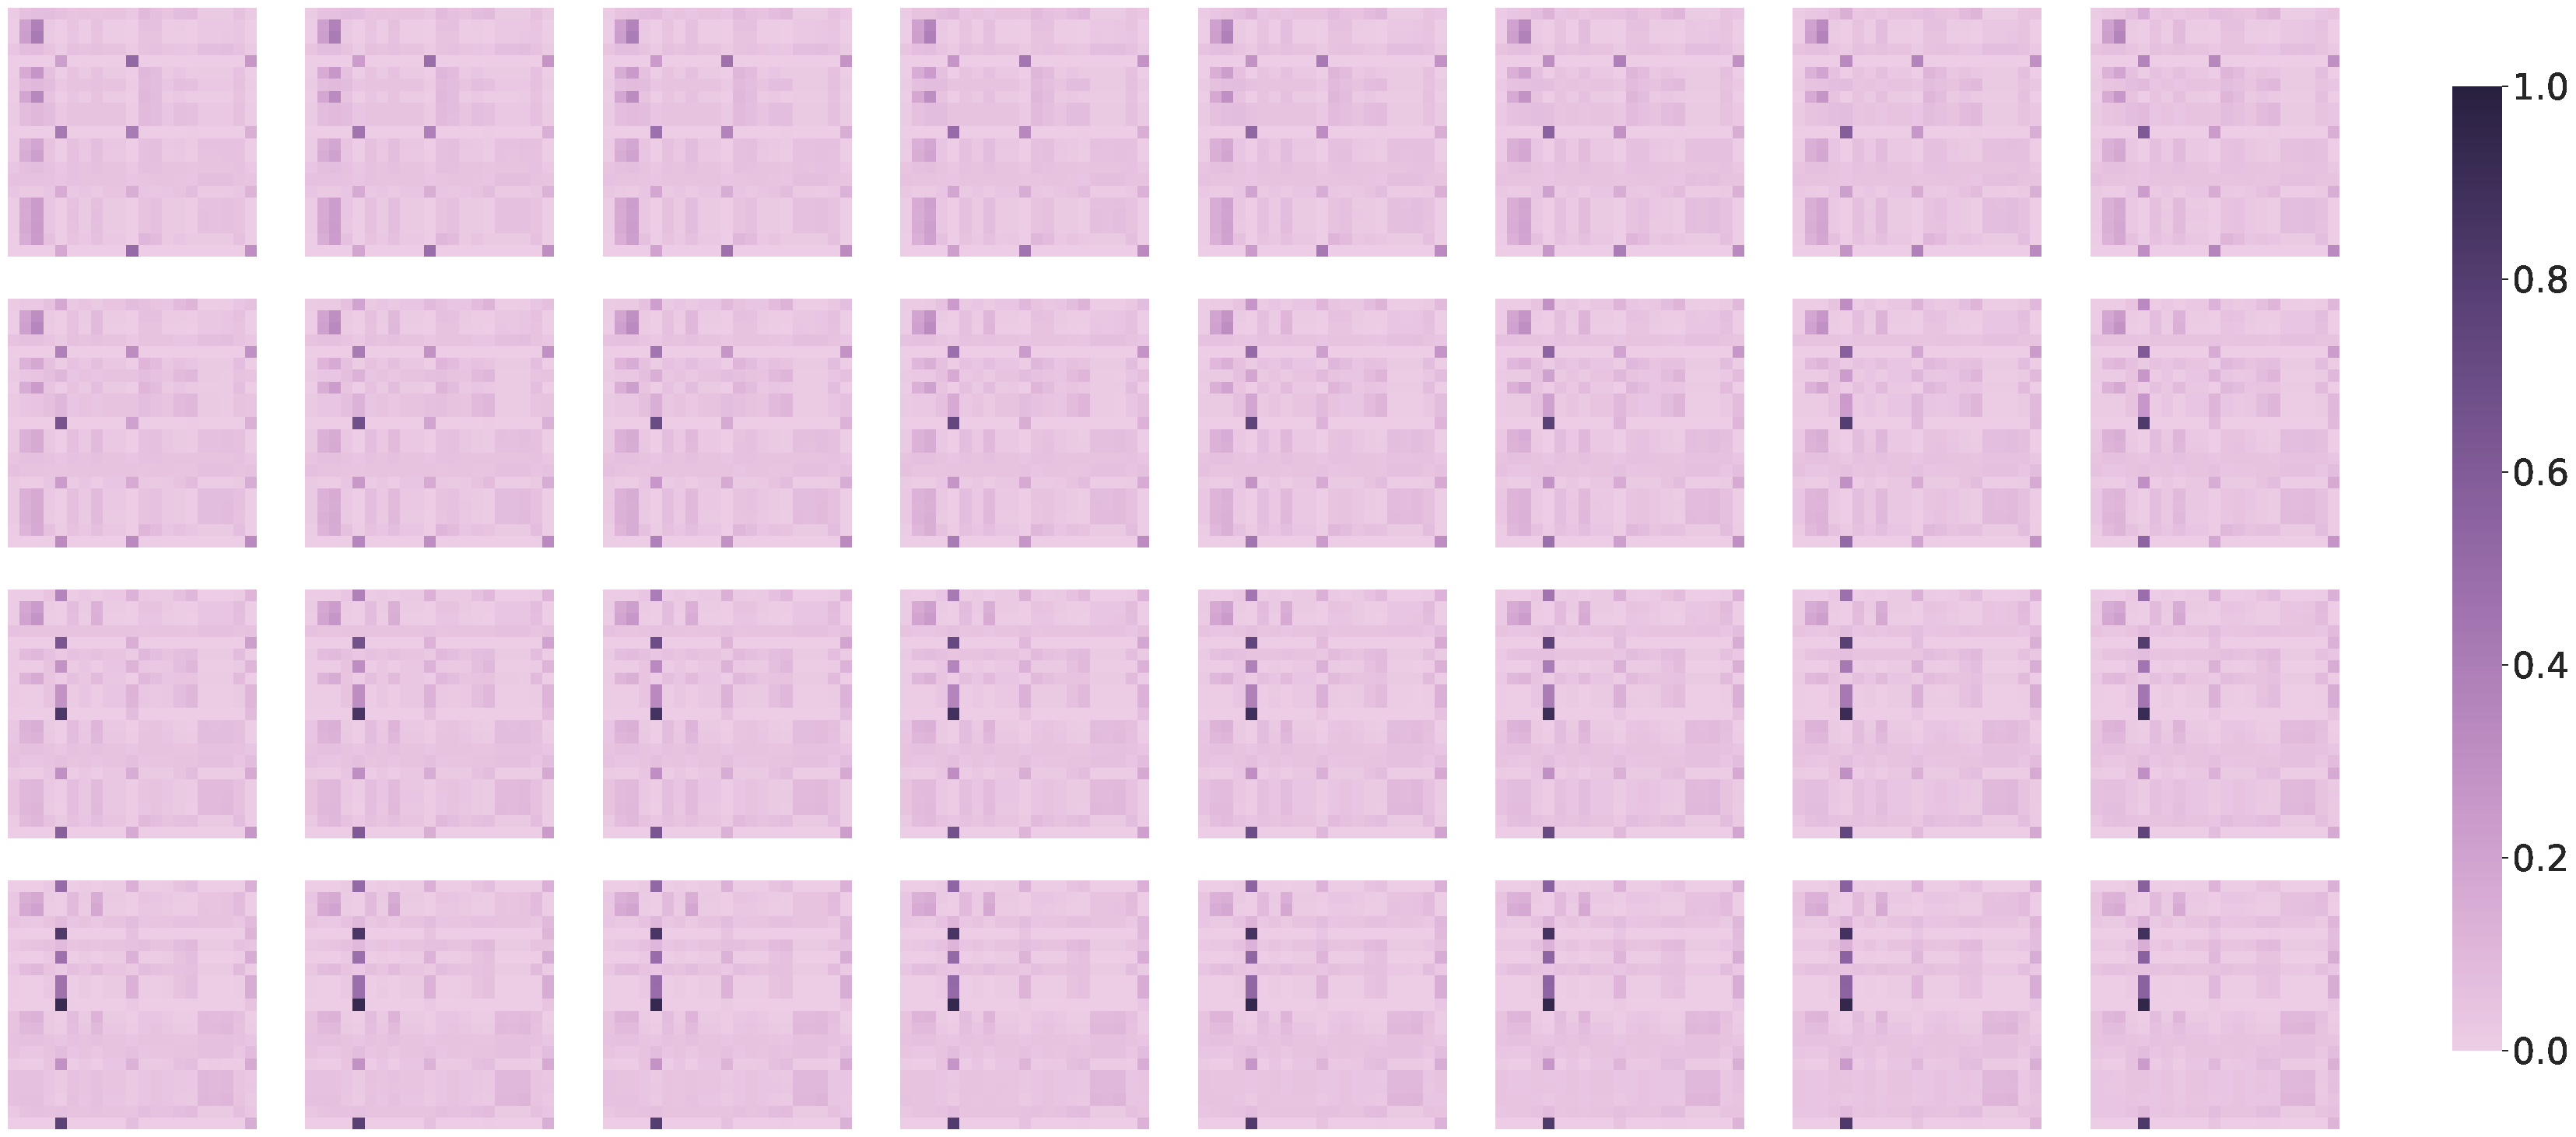

In [14]:
sns.set(font_scale=3)
save = True
horizons = [96, 192, 336, 720]
datasets = ["ETTh1", "ETTh2", "ETTm1", "exchange_rate", "weather"]
types = ["wo_sam", "wo_sam_spectrans", "sam_0.7", "sam_0.7_spectrans"]
real_names_types = {
    "wo_sam": "Transformer",
    "wo_sam_spectrans": "$\sigma$Reparam",
    "sam_0.7": "SAMformer",
    "sam_0.7_spectrans": "SAMformer + $\sigma$Reparam",
}
real_names_datasets = {
    "ETTh1": "ETTh1",
    "ETTh2": "ETTh2",
    "ETTm1": "ETTm1",
    "exchange_rate": "Exchange",
    "weather": "Weather",
}
for horizon in horizons:
    for dataset_name in datasets:
        if (horizon == 336) and (dataset_name == "exchange_rate"):
            pass
        else:
            plot_batch_attention_matrix(
                dataset_name=dataset_name,
                horizon=horizon,
                types=types,
                real_names_types=real_names_types,
                save=save,
            )

#### Subset of batch

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

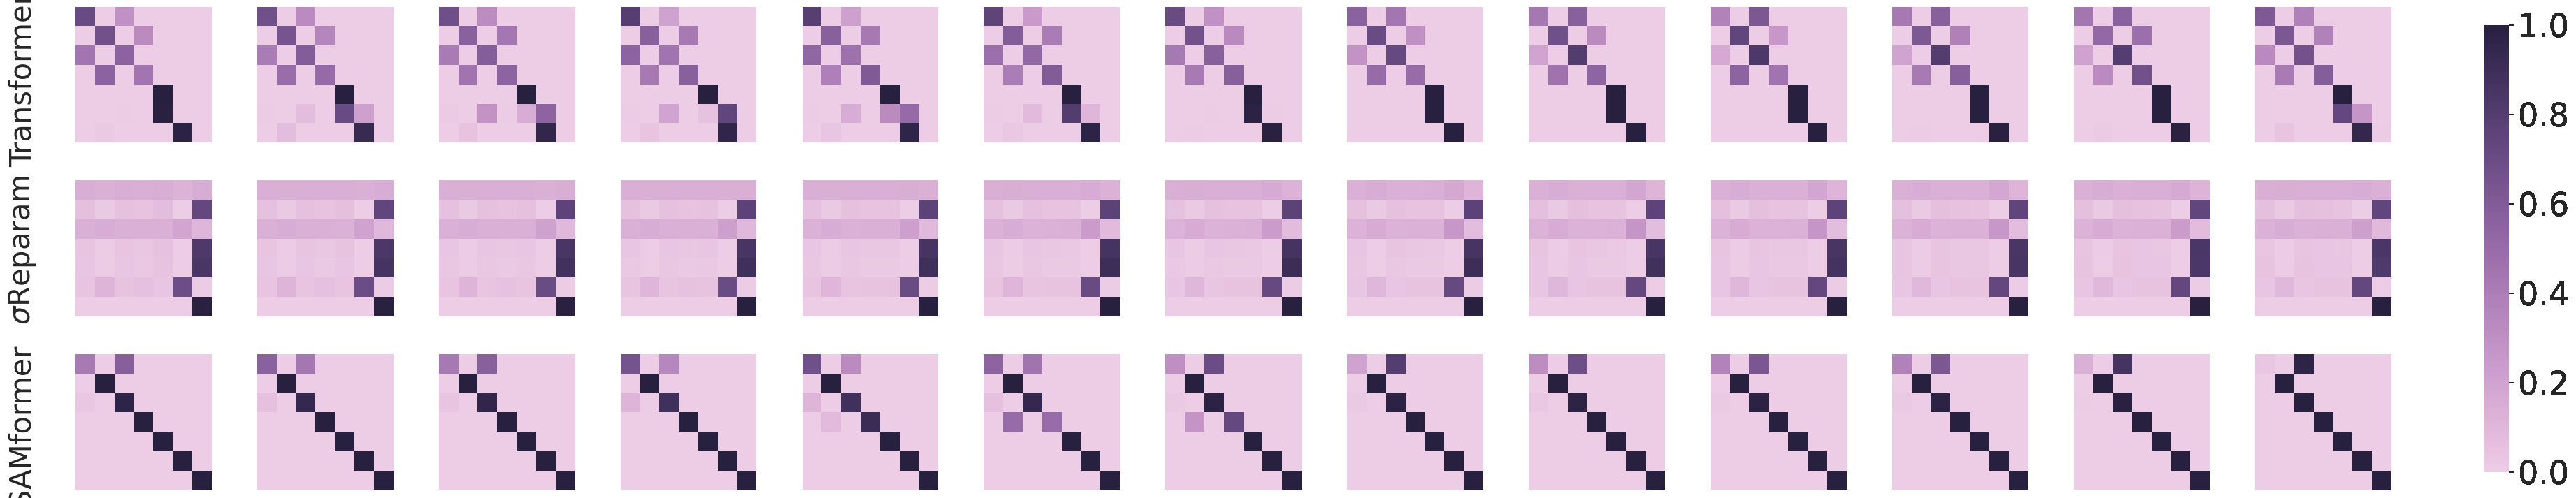

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

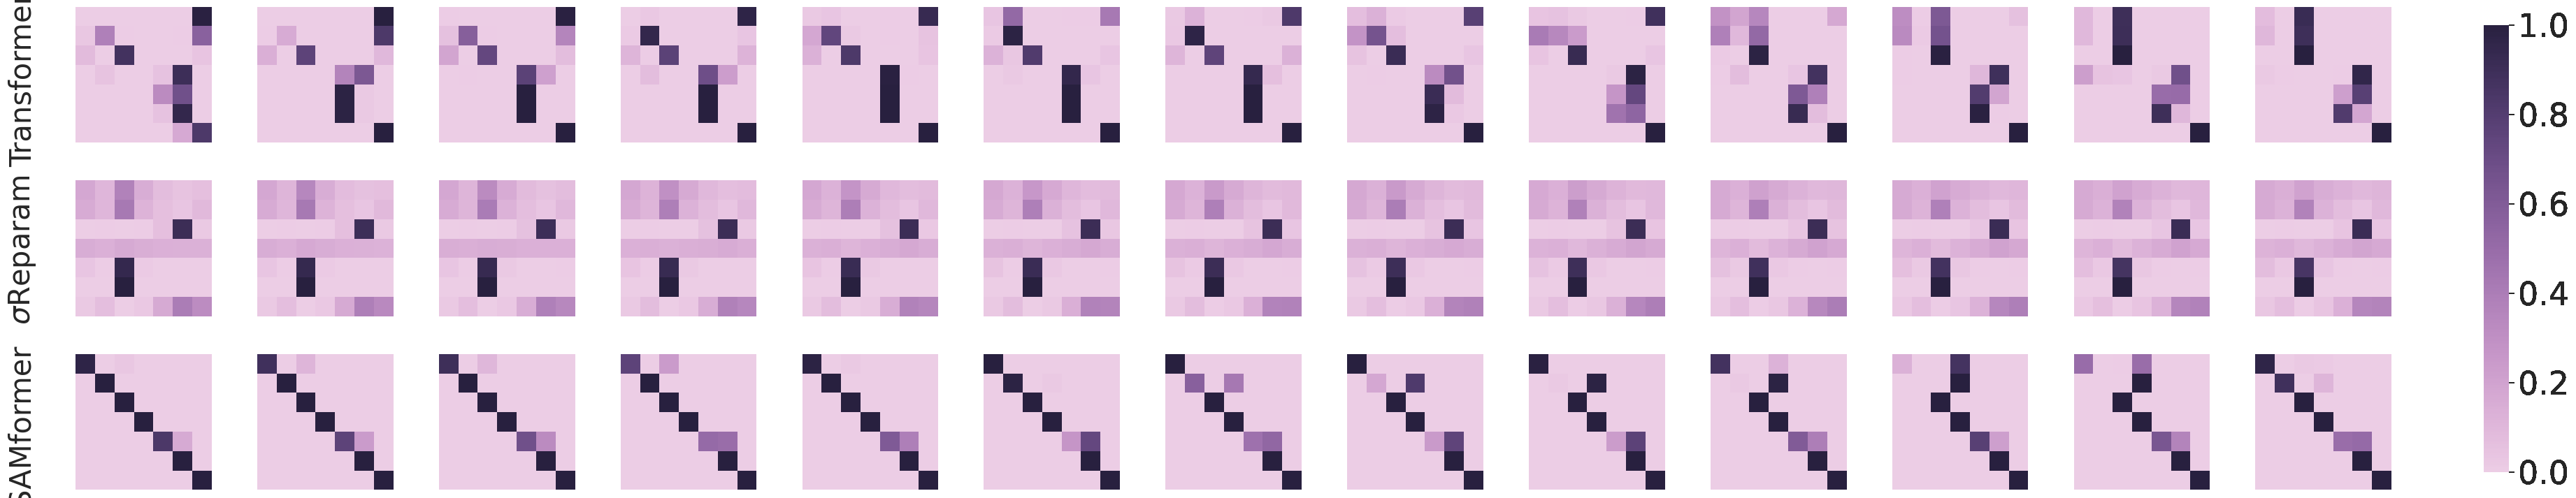

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

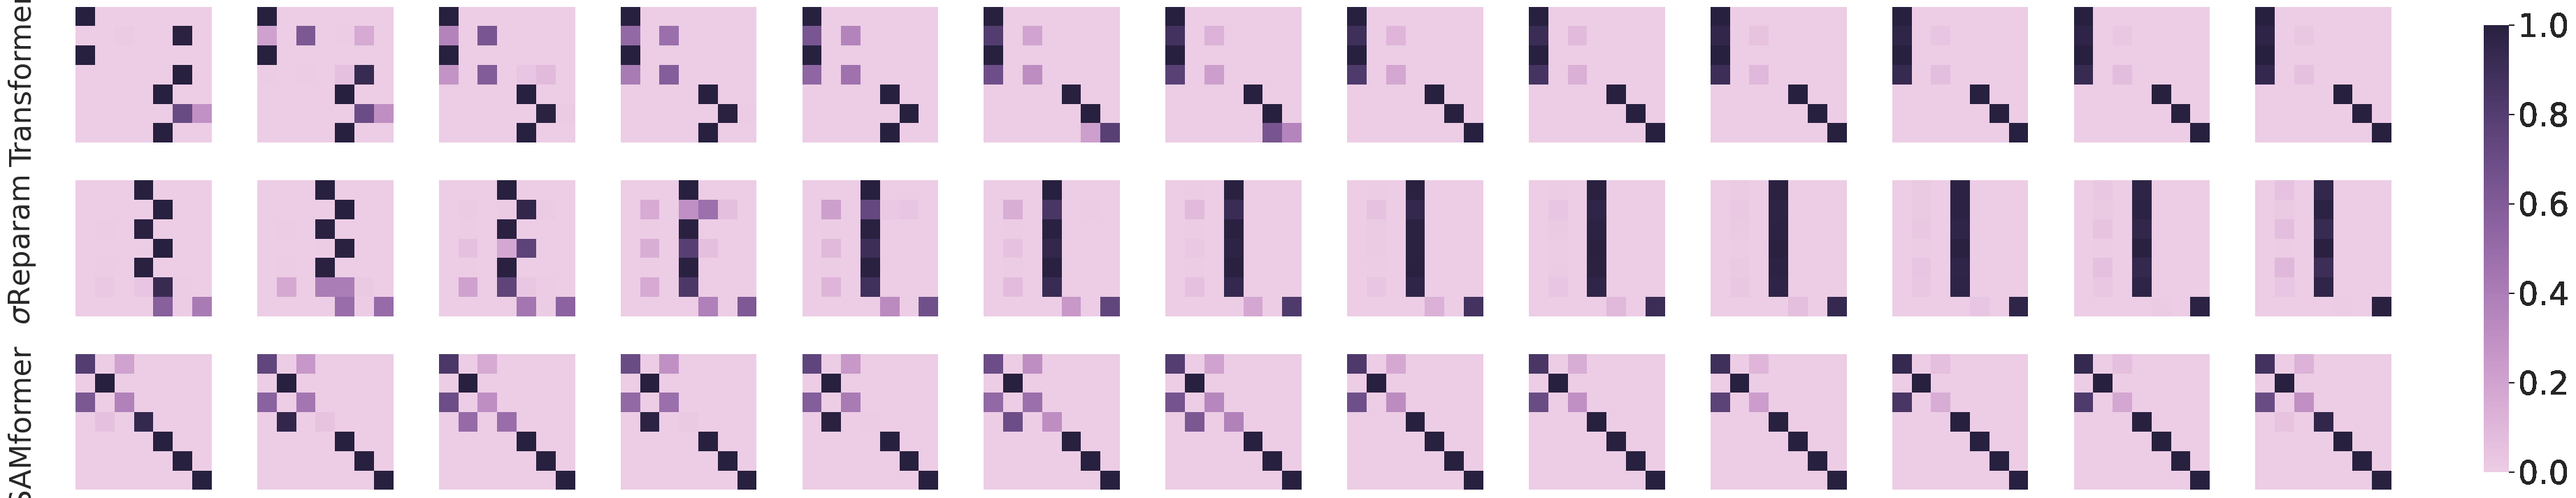

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

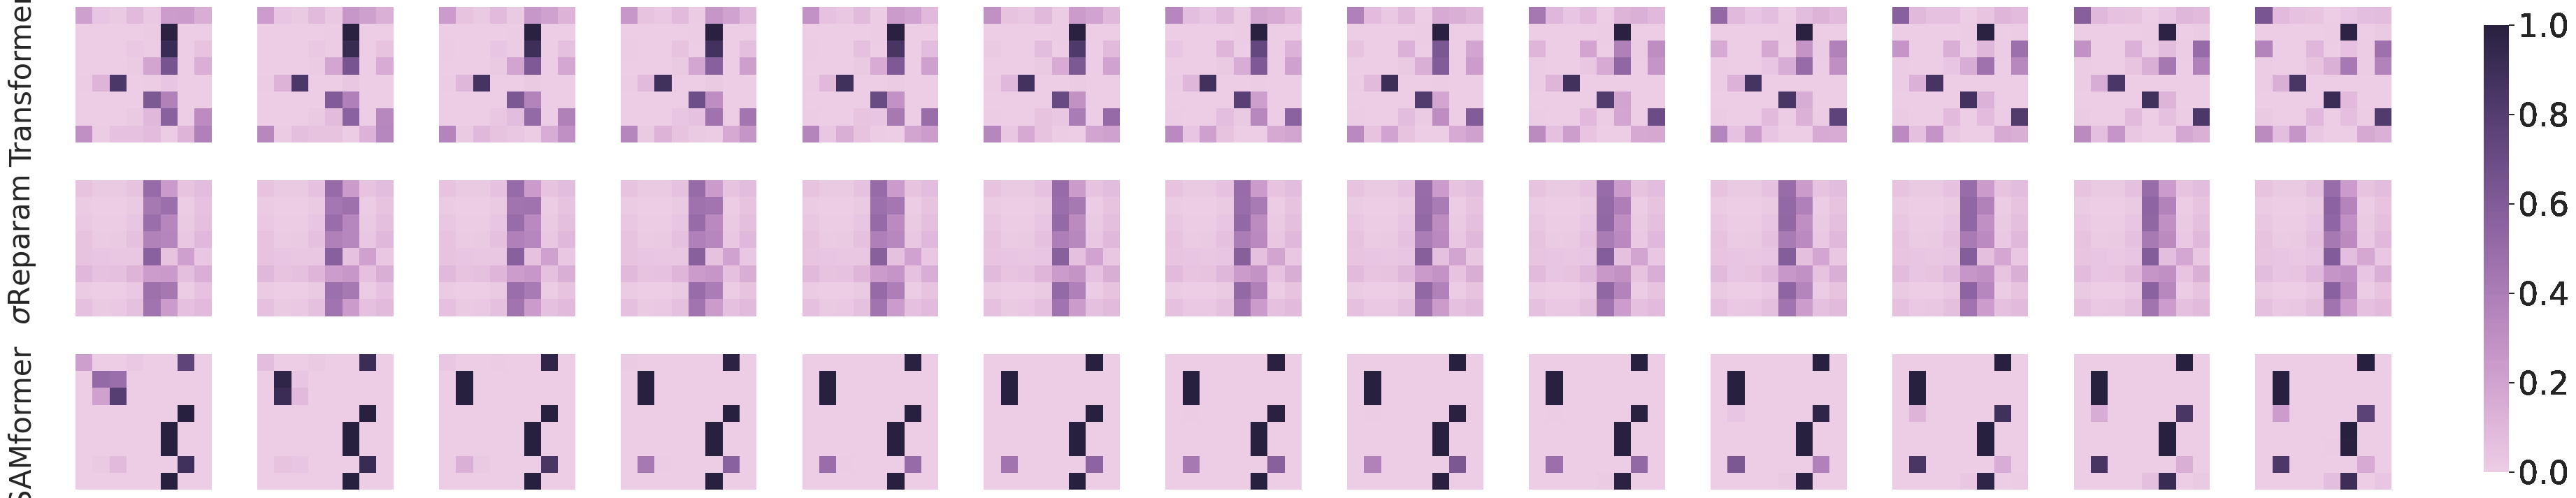

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

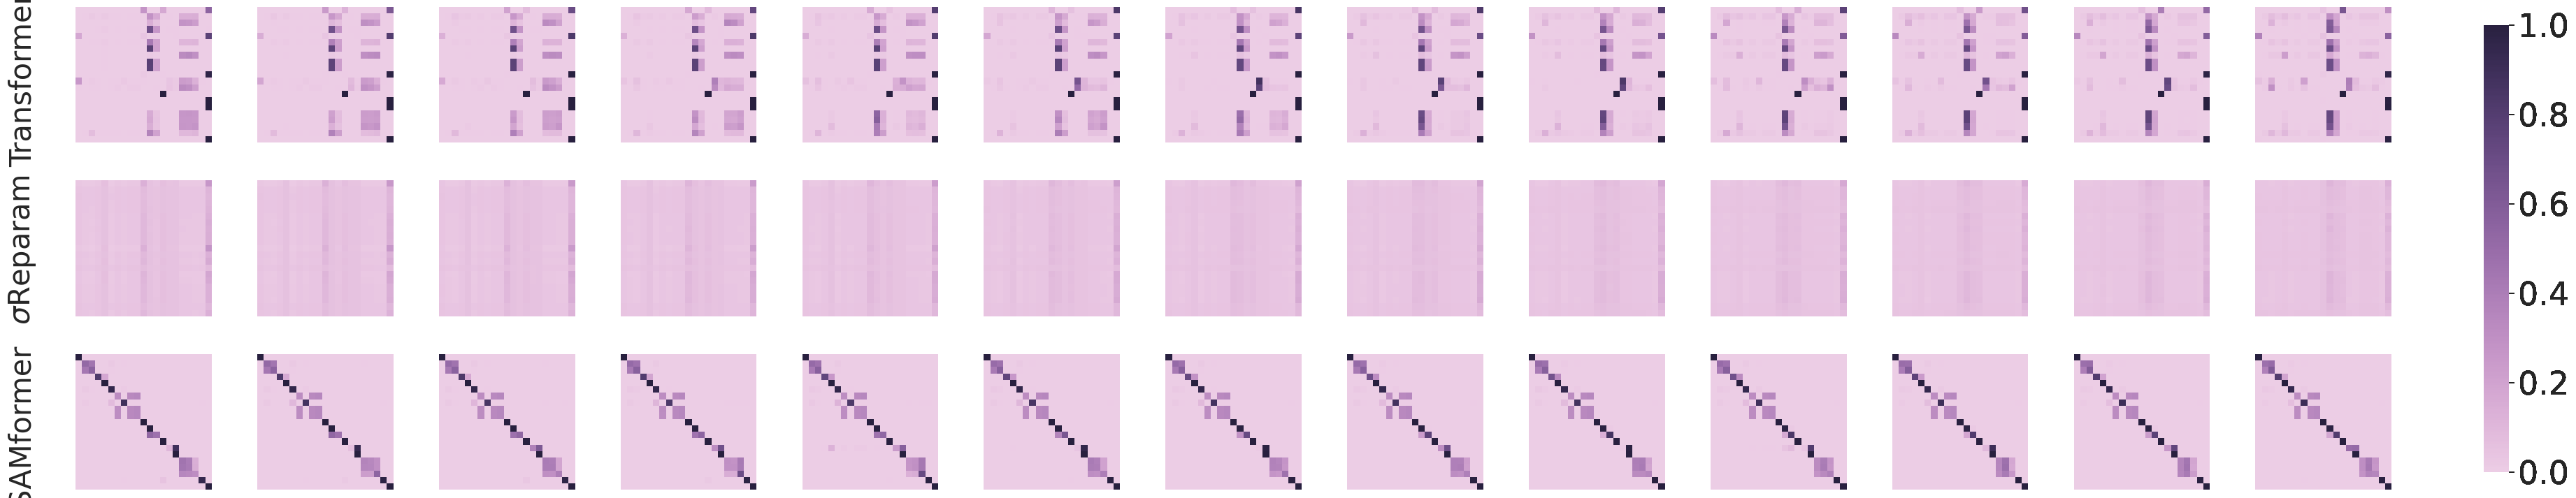

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

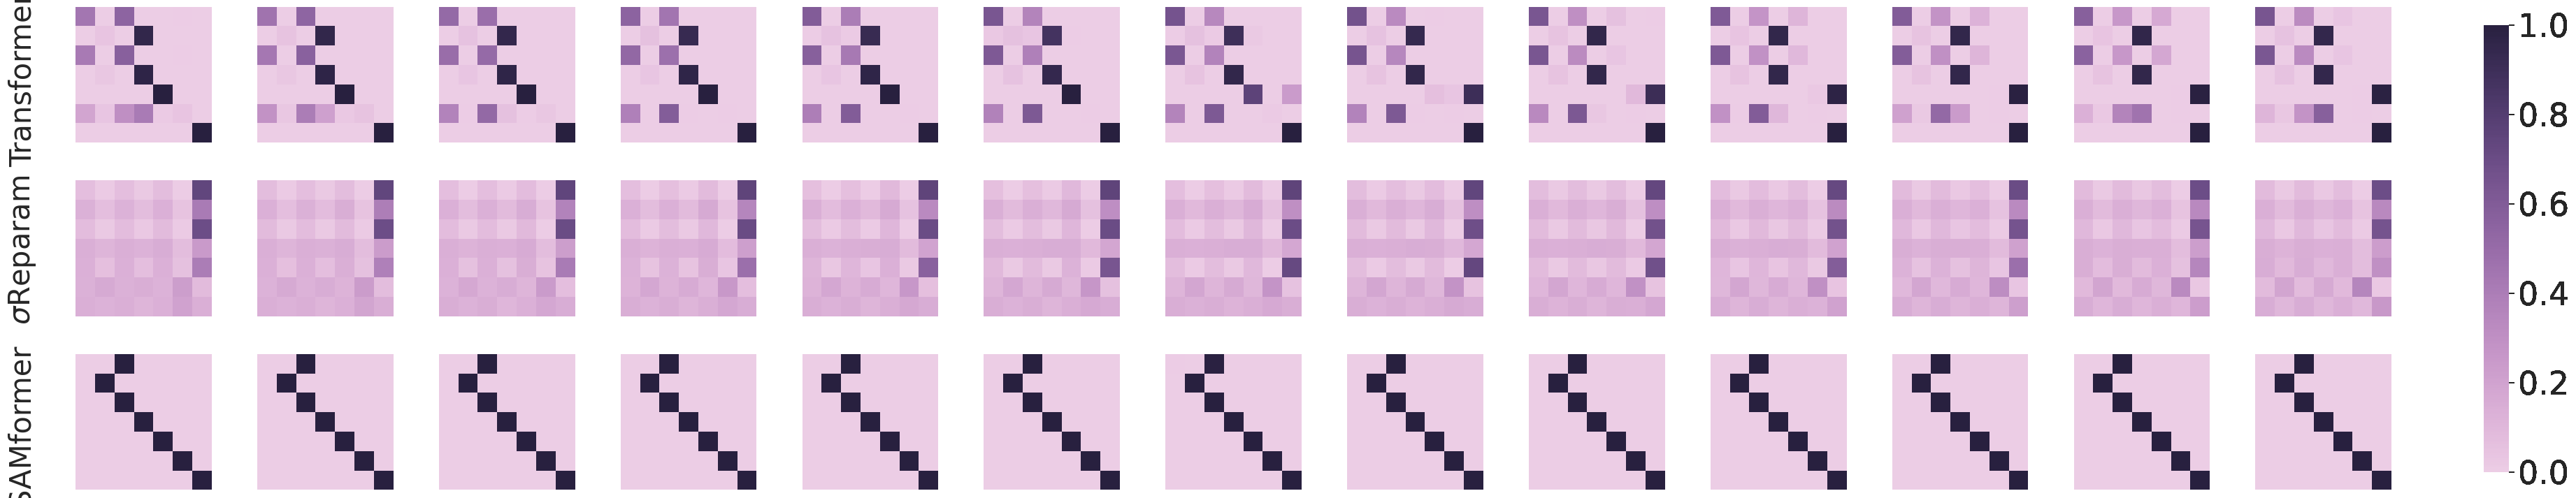

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

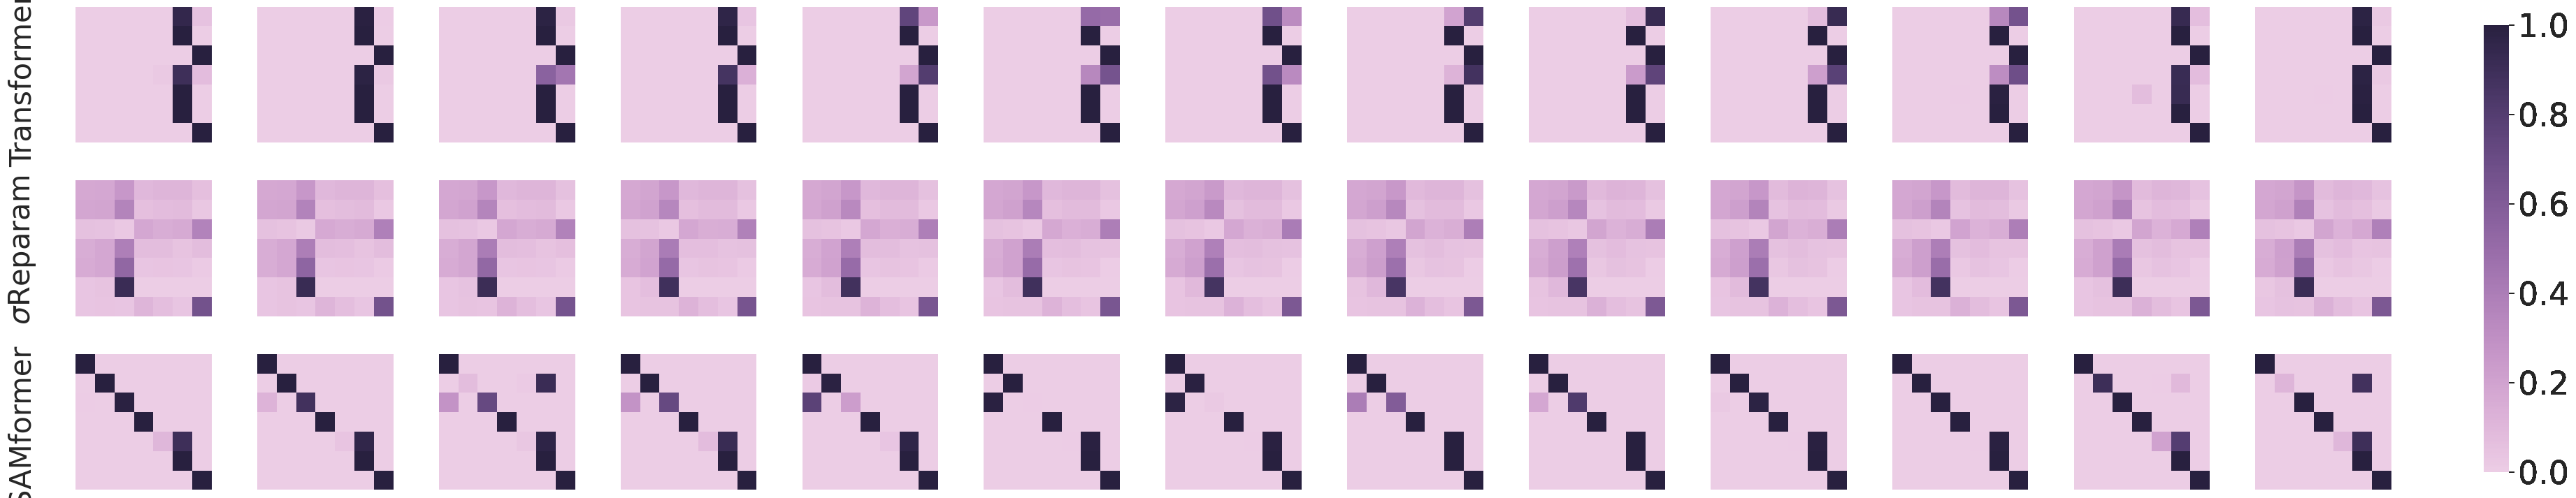

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

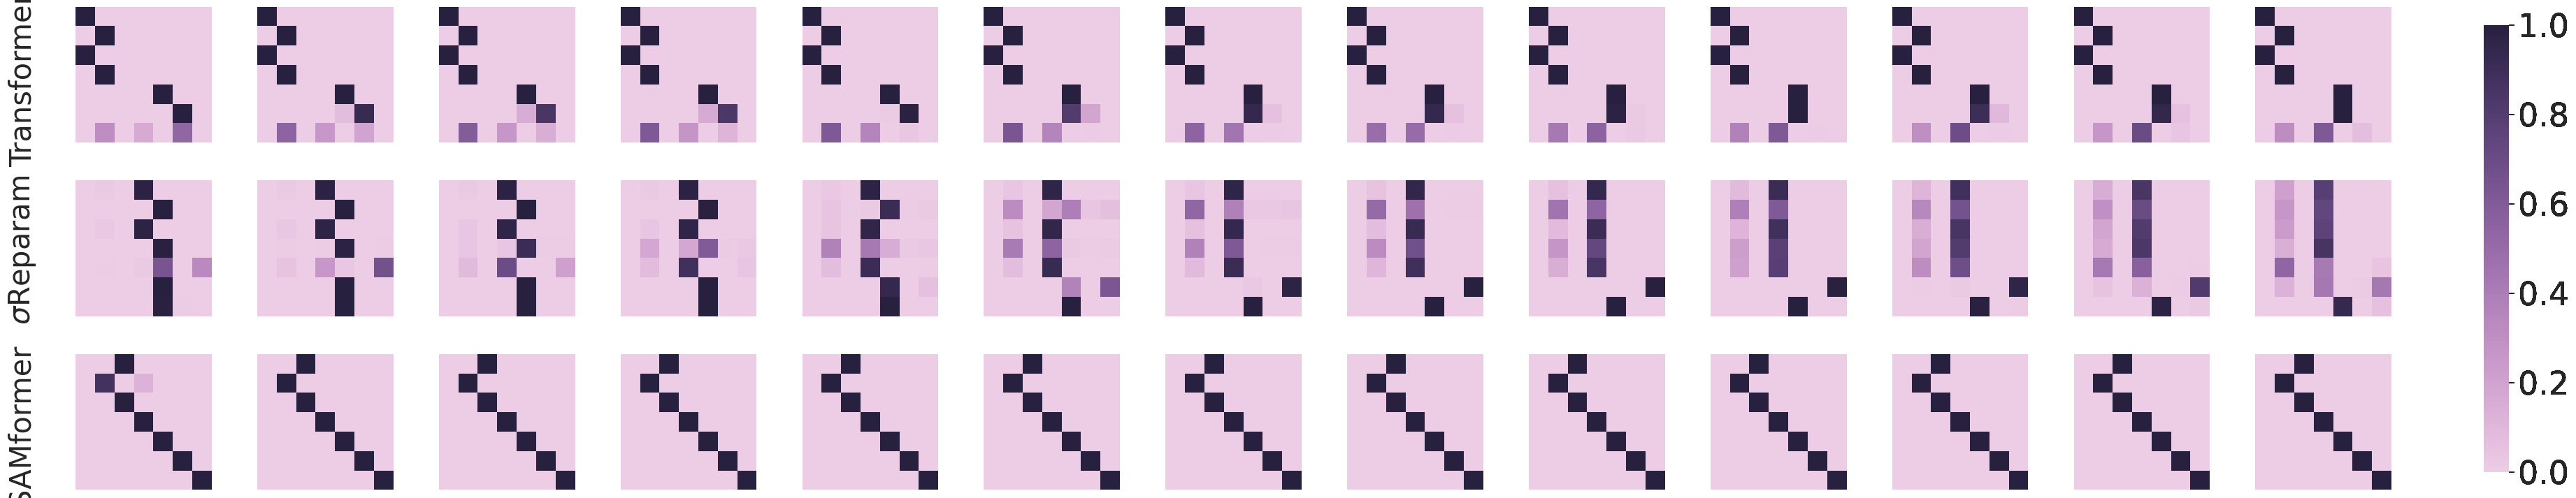

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

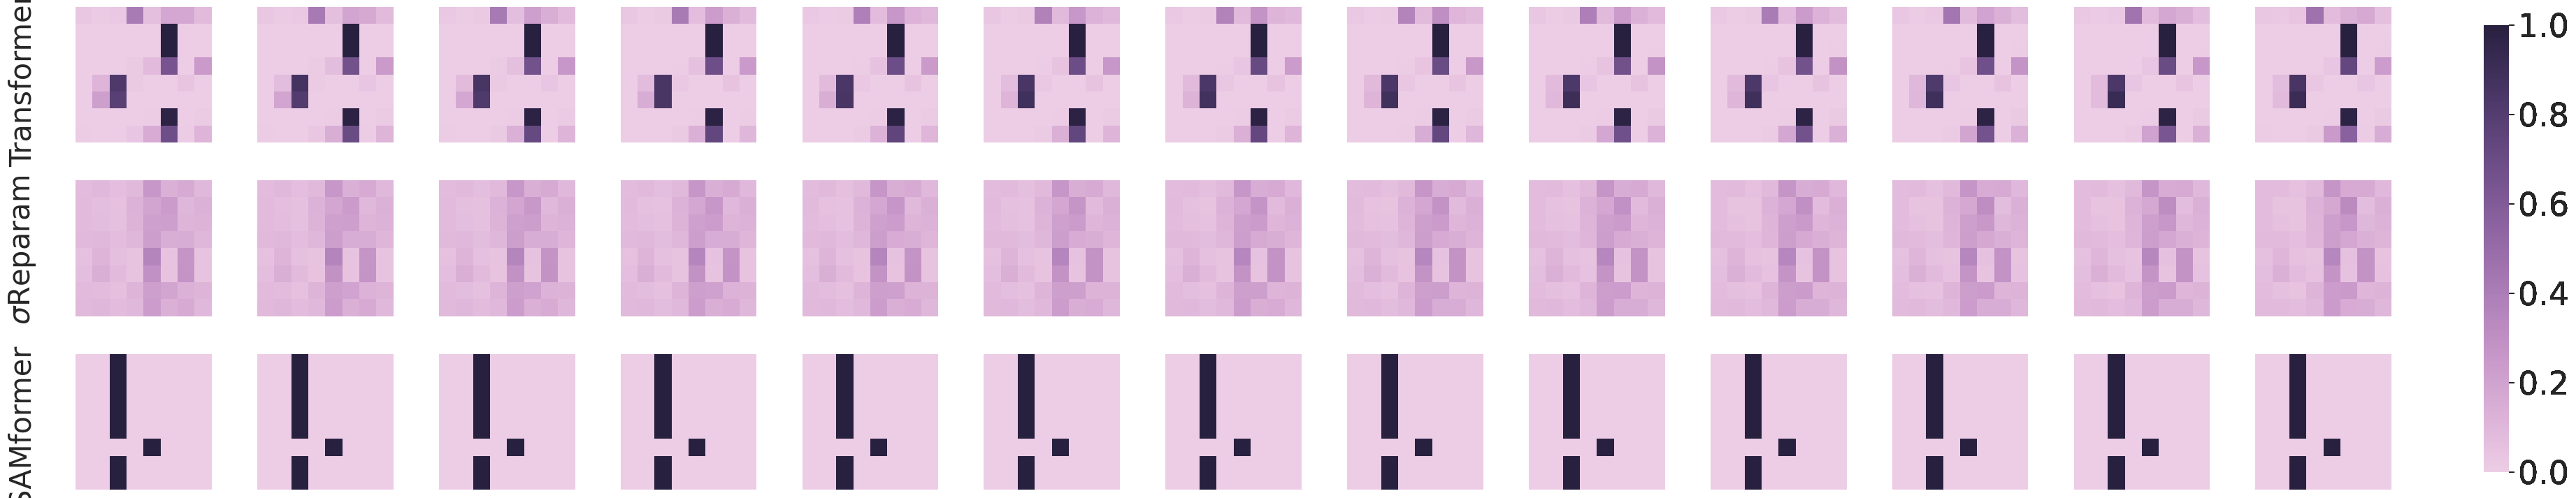

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

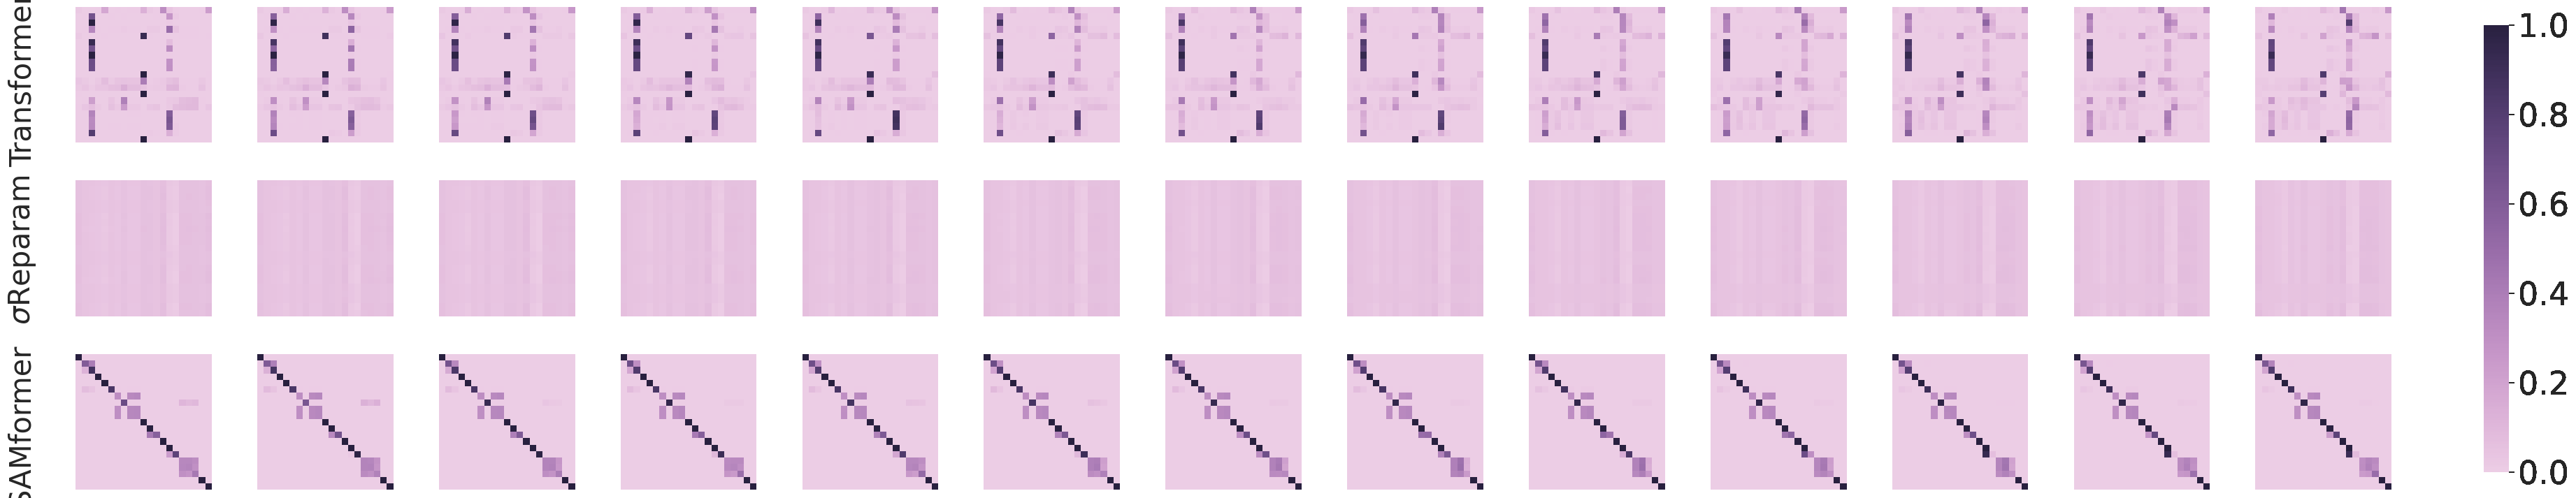

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

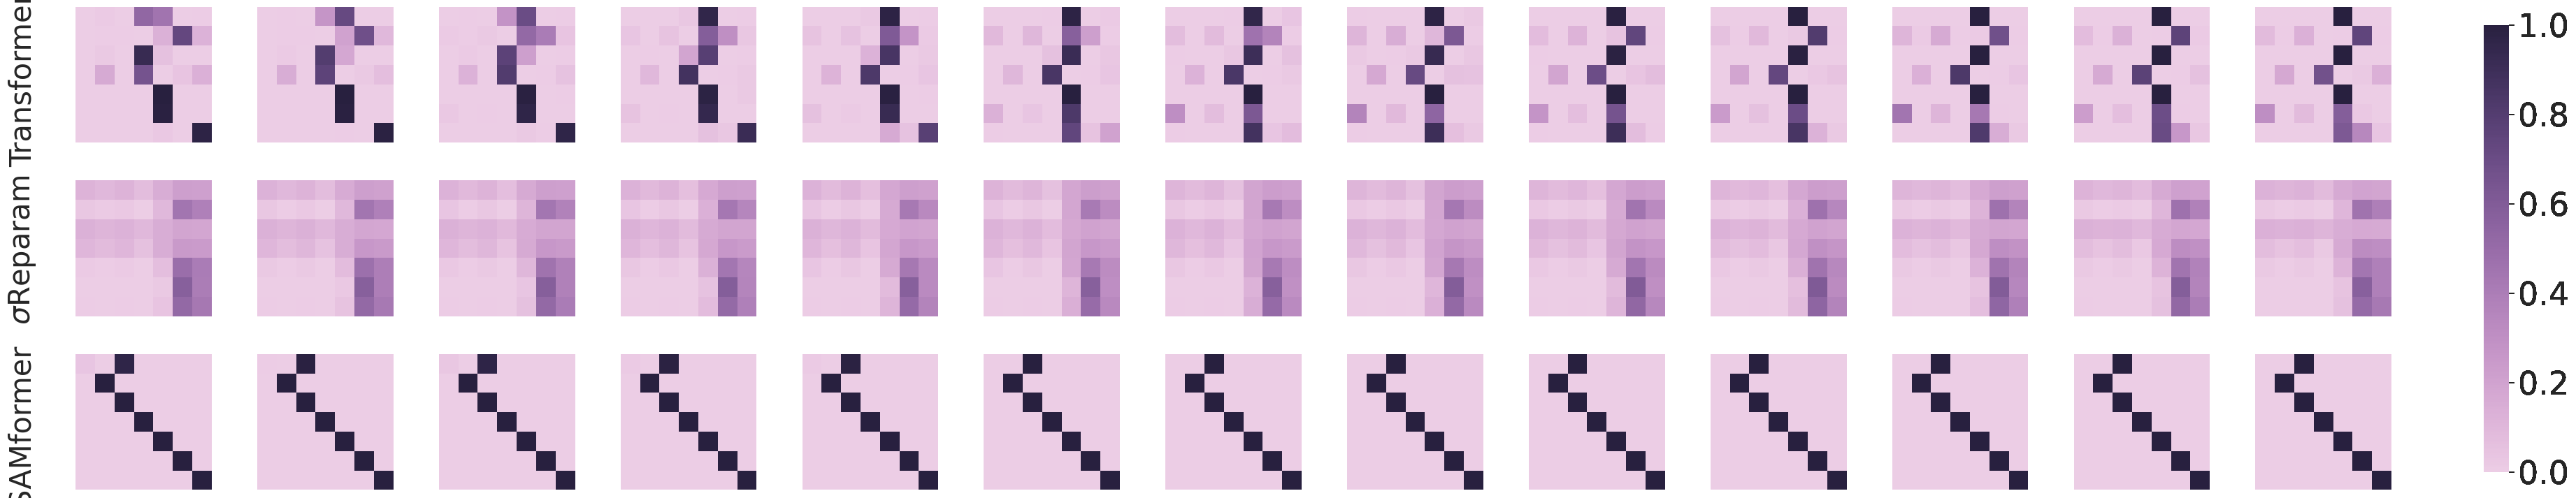

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

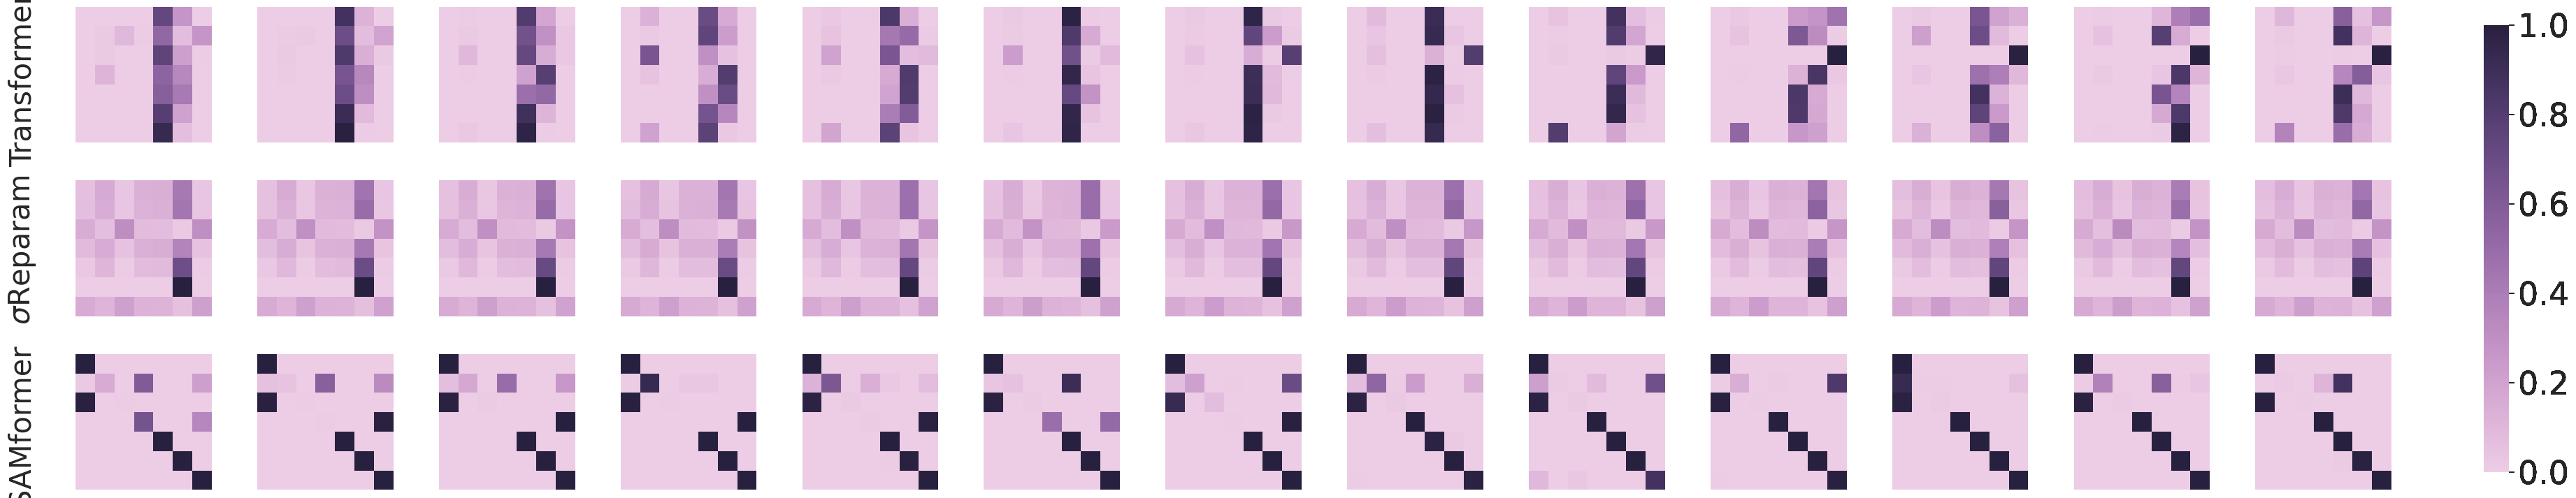

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

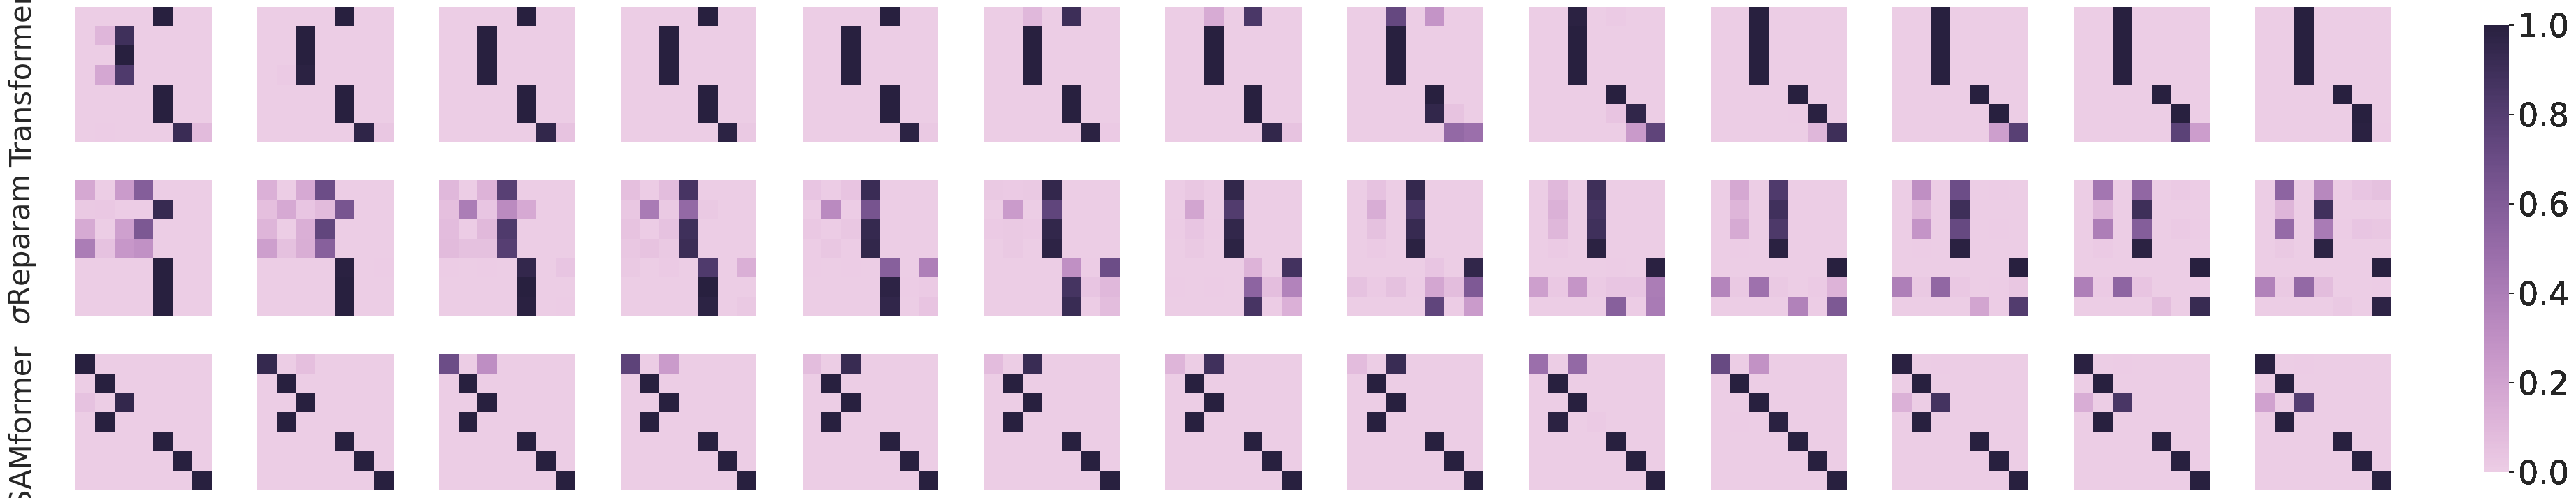

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

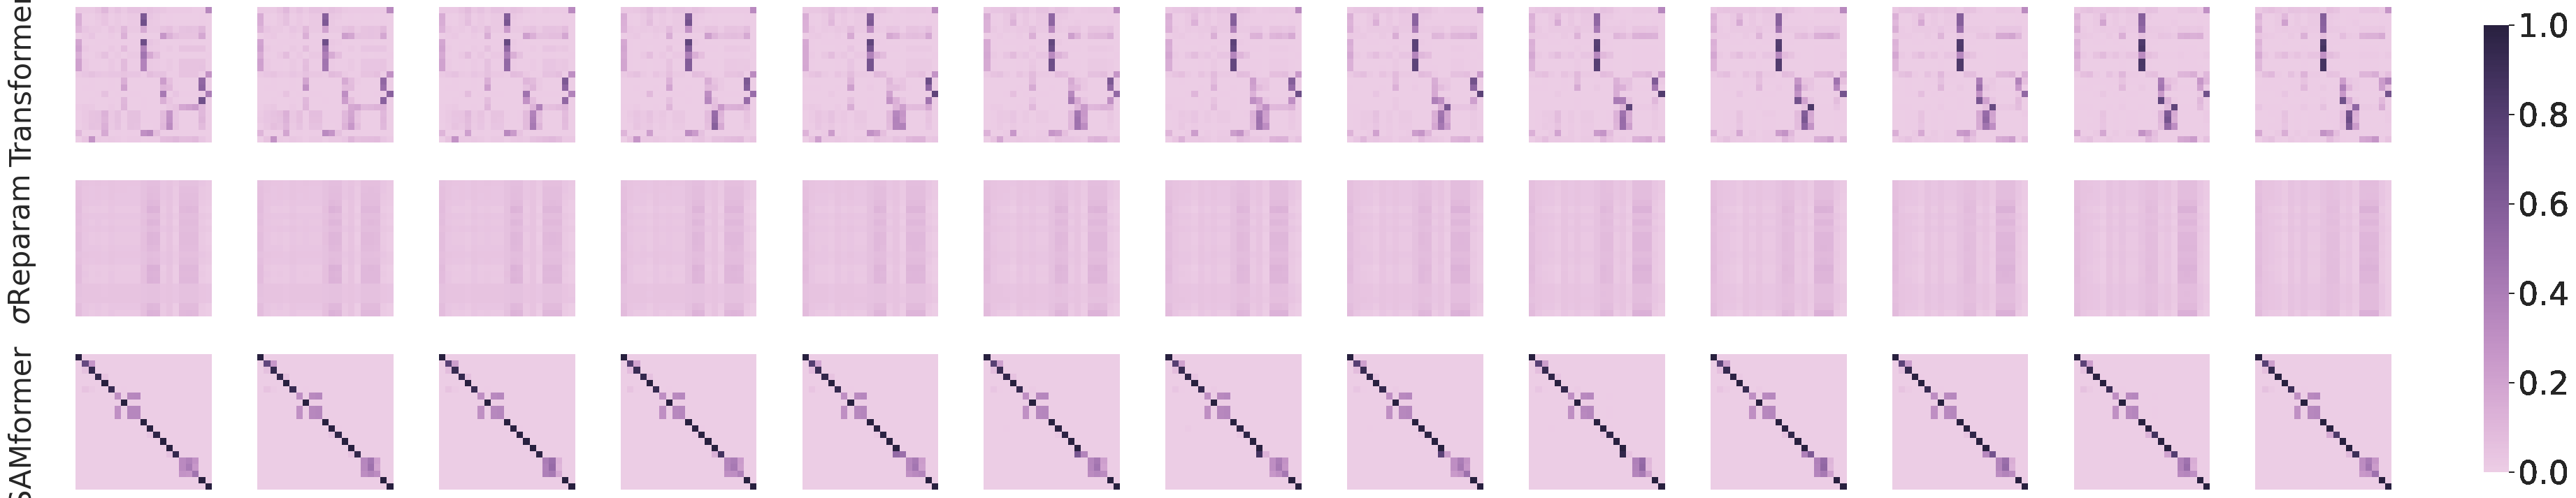

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

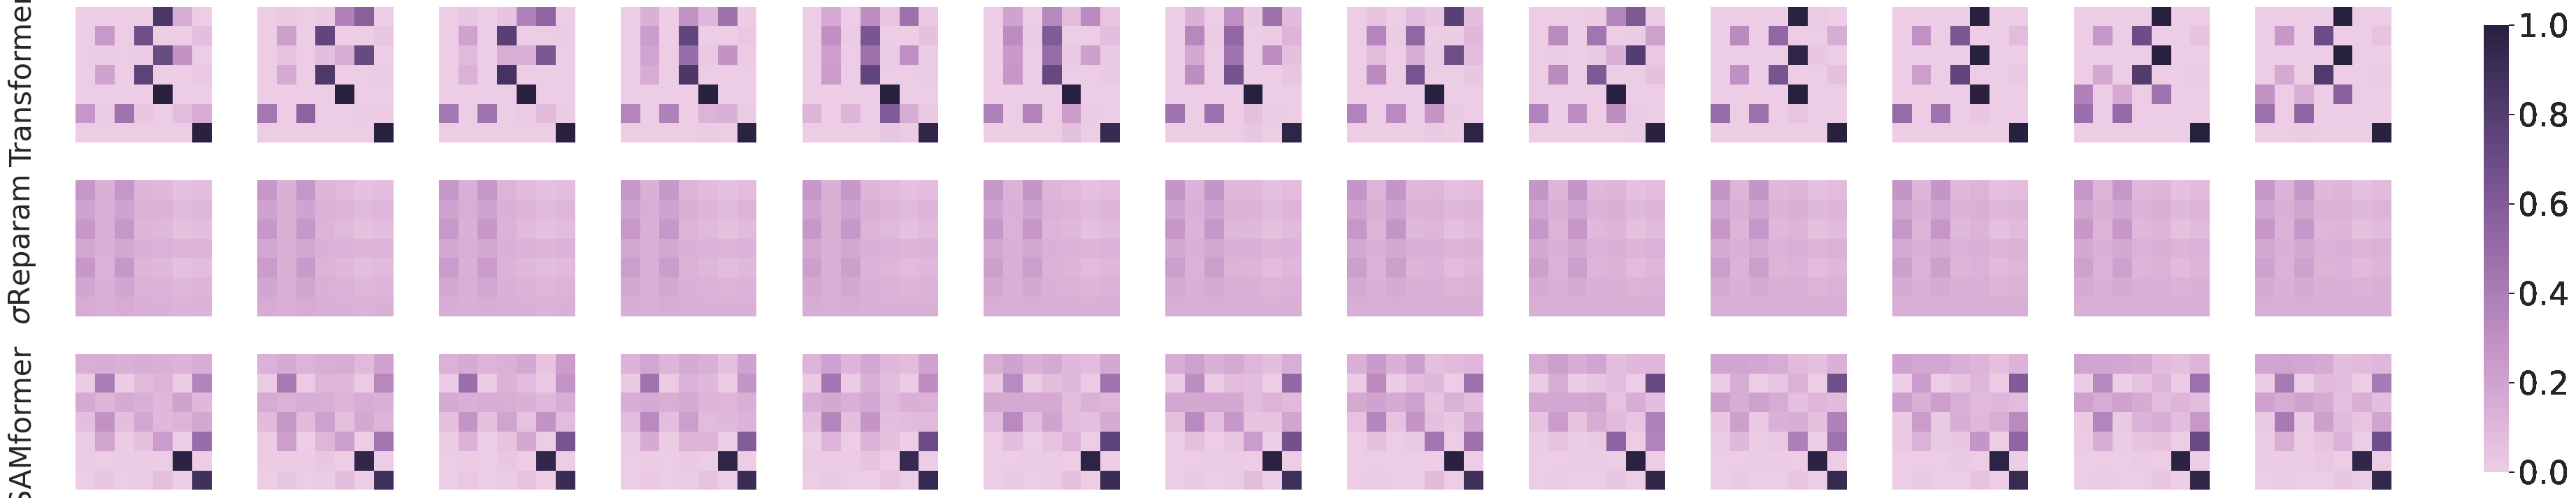

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

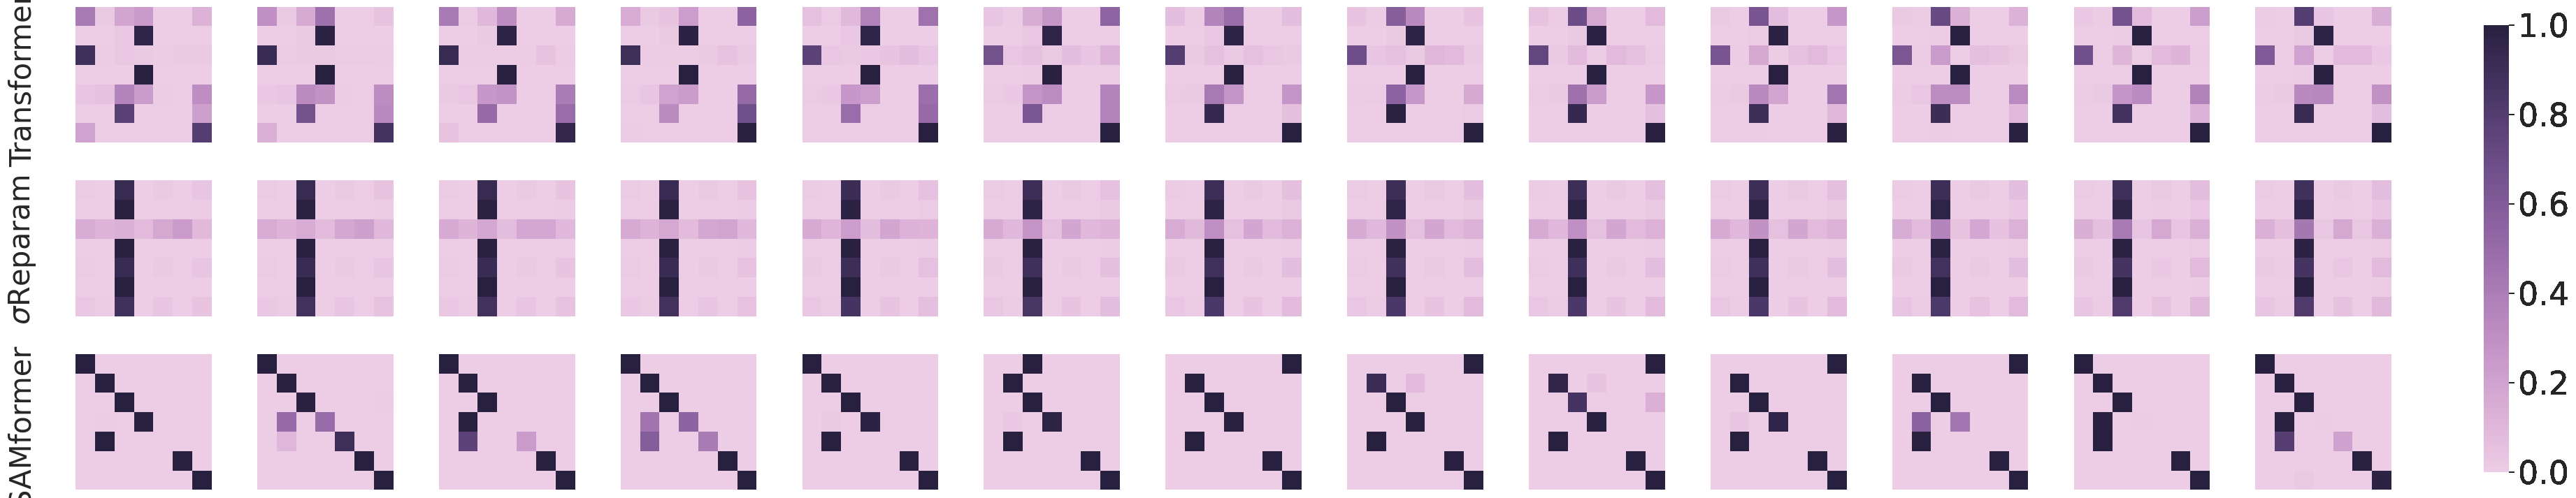

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

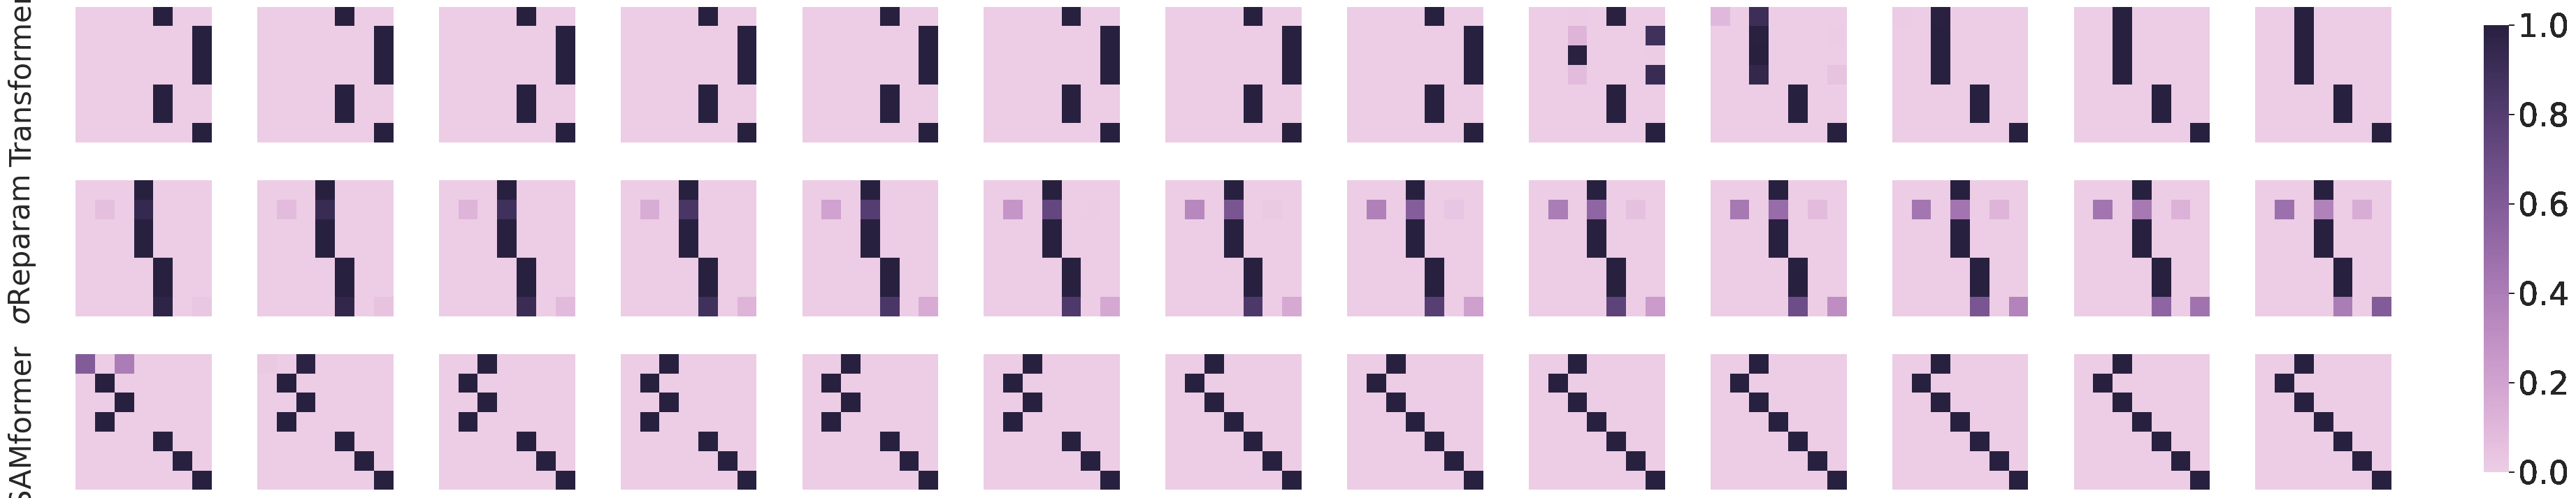

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

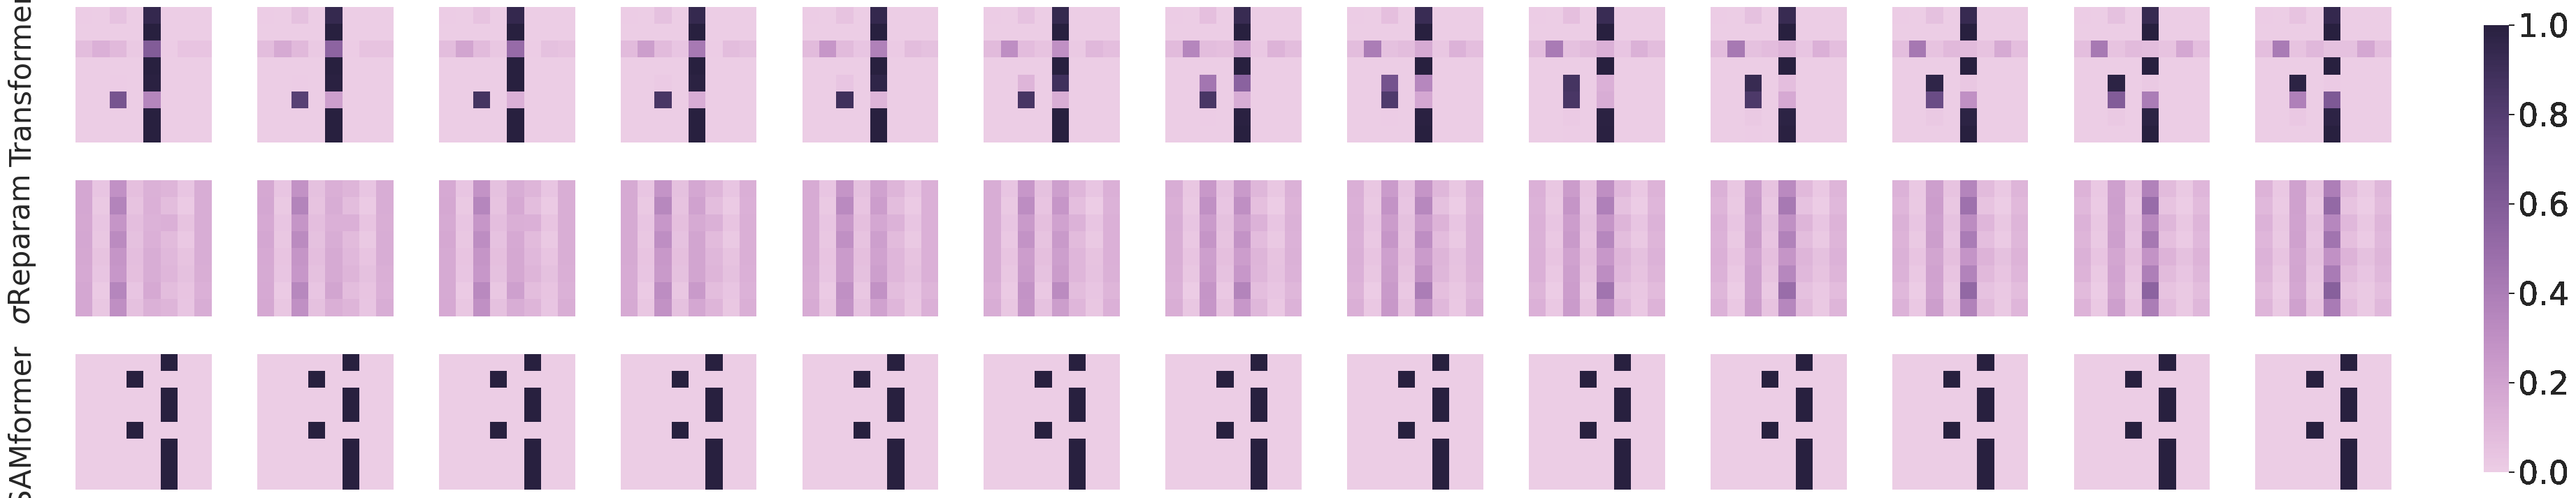

/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/awx1303337/miniforge3/envs/stenv/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: This figure inc

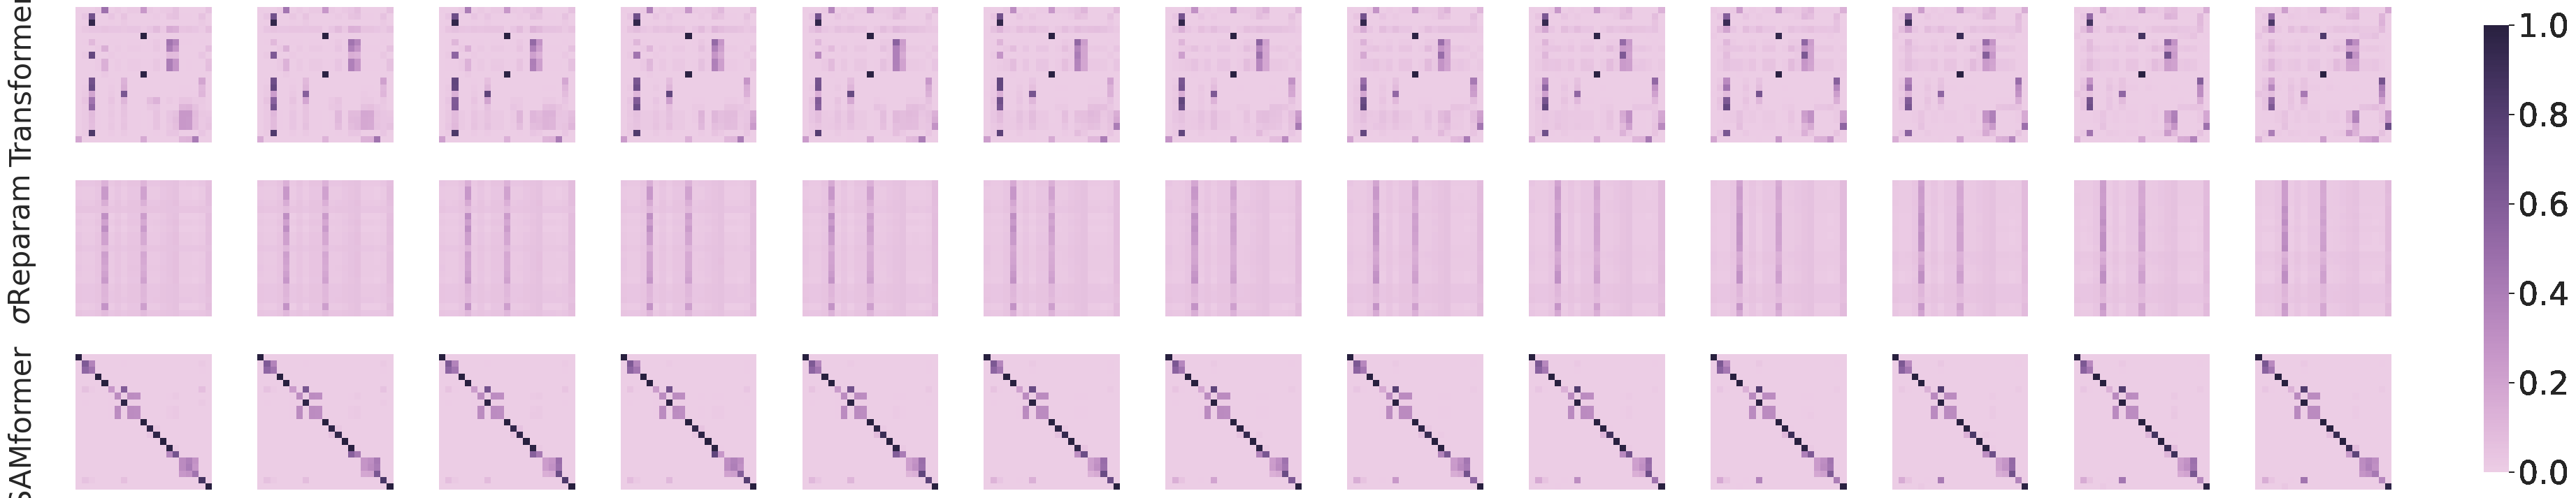

In [15]:
sns.set(font_scale=3)
save = True
horizons = [96, 192, 336, 720]
datasets = ["ETTh1", "ETTh2", "ETTm1", "exchange_rate", "weather"]
types = ["wo_sam", "wo_sam_spectrans", "sam_0.7"]
real_names_types = {
    "wo_sam": "Transformer",
    "wo_sam_spectrans": "$\sigma$Reparam",
    "sam_0.7": "SAMformer",
}
real_names_datasets = {
    "ETTh1": "ETTh1",
    "ETTh2": "ETTh2",
    "ETTm1": "ETTm1",
    "exchange_rate": "Exchange",
    "weather": "Weather",
}
for horizon in horizons:
    for dataset_name in datasets:
        if (horizon == 336) and (dataset_name == "exchange_rate"):
            pass
        else:
            plot_subset_attention_matrix(
                dataset_name=dataset_name,
                horizon=horizon,
                types=types,
                real_names_types=real_names_types,
                save=save,
            )

### Faithful signal propagation

In [ ]:
# Plot of attention matrices inspired from https://openreview.net/pdf?id=HxN8K1esES
# Useful utils for heatmaps https://copyprogramming.com/howto/multiple-heatmap-subplots-same-heatbar
save = True
path = "figures/toy_exp"
dpi = 100
format = "pdf"
path_data = "results/attention_matrix_toy_exp/"
figname = f"attention_matrix_toy_exp_along_4_epochs.{format}"
c = 4
cmap = sns.cubehelix_palette(rot=0.2, as_cmap=True)
vmin = 0
vmax = 1
np.random.seed(seed=42)
index = np.random.choice(np.arange(32))
attention_matrices = []
filenames = [
    "attention_matrix_transformer_random_toy_epoch_0_seed_0.npy",
    "attention_matrix_transformer_toy_epoch_0_seed_0.npy",
    # "attention_matrix_transformer_toy_epoch_5_seed_0.npy",
    # "attention_matrix_transformer_toy_epoch_10_seed_0.npy",
    "attention_matrix_transformer_toy_epoch_15_seed_0.npy",
    # "attention_matrix_transformer_toy_epoch_20_seed_0.npy",
    # "attention_matrix_transformer_toy_epoch_25_seed_0.npy",
    # "attention_matrix_transformer_toy_epoch_30_seed_0.npy",
    "attention_matrix_transformer_toy_epoch_35_seed_0.npy",
]
subset = [0, 1, 15, 35]
N = len(subset)
figsize = (N * c, 1 * c - 0.5)
ratio = 10
ratios = [ratio] * N
ratios.append(1)
fig, axes = plt.subplots(
    nrows=1,
    ncols=N + 1,
    sharex=False,
    sharey=False,
    figsize=figsize,
    gridspec_kw={"width_ratios": ratios},
)
types = ["random_transformer", "transformer"]
for filename in filenames:
    all_attention_matrices = np.load(os.path.join(path_data, filename))
    attention_matrices.append(all_attention_matrices[index])
epochs = [0, 1, 5, 10, 15, 20, 25, 30, 35]
for j, epoch in enumerate(subset):
    ax = axes[j]
    cbar_ax = axes[-1]
    attention_matrix = attention_matrices[j]
    if epoch in subset:
        s = sns.heatmap(
            attention_matrix[0],
            ax=ax,
            linewidths=0,
            square=True,
            cbar_ax=cbar_ax,
            cbar_kws=dict(ticks=[0.2, 0.5, 0.8]),
            cmap=cmap,
            xticklabels=False,
            yticklabels=False,
            robust=False,
            vmin=vmin,
            vmax=vmax,
        )
        ax.set_title(f"Epoch {epoch} \n")

plt.tight_layout()
if save:
    if filename is None:
        filename = f"missing_title.{format}"
    plt.savefig(
        os.path.join(path, figname), format=format, bbox_inches="tight", dpi=dpi
    )
plt.show()